<a href="https://colab.research.google.com/github/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis/blob/main/Zamato_Resturant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**: Zamato Resturant Clustering and Sentiment Analysis


##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/niteesh19mt0250/Zamato-Resturant-Clustering-and-Sentiment-Analysis/blob/main/Copy_of_Sample_ML_Submission_Template.ipynb

# **Problem Statement**


Zamato is an Indian Restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zamato provides information, menus and user-reviews of restaurant, and also has food delivery options from partner restaurants in select cities. India is quite famous for it's multi cuisine available in large number of restaurant and hotel resorts, which is reminiscent of unity in deversity. Restaurant business in India is always evolving. More indians are warming up to the idea of eating restaurant food wheather by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, intersting facts and figures about the Indian food industry in each city. So, this project famous on analysising the zamato restaurant data for each city in India.

This project famous on customer and company, you have to analyze the sentiments of the review given by the customer in the data and make some usefull conclusions in the form of the visualizations. Also, customer the zamato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at restaurant. The analysis also solves some of the business cases that can directly help the customers finding the best restaurant in their locality and for the company to grow up and works on the fields they are currently lagging in. This could help in clustering the restaurants segments, also the data has valuable information around cuisine and costing which can be used in cost v/s benfit analysis data could be used for sentiment analysis. Also, the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1040]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msn
!pip install ipython_Autotime
%load_ext autotime
import datetime as dt



The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 5.15 s (started: 2023-08-03 11:31:37 +00:00)


### Dataset Loading

In [1041]:
# Import google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
time: 3.67 s (started: 2023-08-03 11:31:43 +00:00)


In [1042]:
# Load Dataset
df_restaurant = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant names and Metadata.csv')
df_review = pd.read_csv('/content/drive/MyDrive/Project /Unsupervised Learning/Zomato Restaurant reviews.csv')

time: 88 ms (started: 2023-08-03 11:31:46 +00:00)


### Dataset First View

In [1043]:
# Dataset First Look top 5 of zamato resturant name
df_restaurant.head()

Name  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links   Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...    800   
1  https://www.zomato.com/hyderabad/paradise-gach...    800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1,200   

                                         Collections  \
0  Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                Hyderabad's Hottest   
2                 Great Buffets, Hyderabad's Hottest   
3                             Late Night Restaurants   
4  Best Bars & Pubs, Food Hygiene Rated Restauran...   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                     11 AM to 11 PM  
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                    12 Noon to 2 AM  
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...

time: 11.6 ms (started: 2023-08-03 11:31:46 +00:00)


In [1044]:
# Dataset First Look bottom 5 of zamato resturant name
df_restaurant.tail()

Name  \
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

              Collections                         Cuisines  \
100                   NaN                 Fast Food, Salad   
101                   NaN                   Bakery, Mithai   
102                   NaN   North Indian, Biryani, Chinese   
103                   NaN                        Fast Food   
104  Pan-Asian Delicacies  Thai, Asian, Chinese, Malaysian   

                                               Timings  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight

time: 11.6 ms (started: 2023-08-03 11:31:46 +00:00)


In [1045]:
# Dataset First Look top 5 of zamato resturant review
df_review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

time: 14.4 ms (started: 2023-08-03 11:31:46 +00:00)


In [1046]:
# Dataset First Look bottom 5 of zamato resturant review
df_review.tail()

Restaurant          Reviewer  \
9995  Chinese Pavilion  Abhishek Mahajan   
9996  Chinese Pavilion    Sharad Agrawal   
9997  Chinese Pavilion         Ramandeep   
9998  Chinese Pavilion   Nayana Shanbhag   
9999  Chinese Pavilion  Bhargava Krishna   

                                                 Review Rating  \
9995  Madhumathi Mahajan Well to start with nice cou...      3   
9996  This place has never disappointed us.. The foo...    4.5   
9997  Bad rating is mainly because of "Chicken Bone ...    1.5   
9998  I personally love and prefer Chinese Food. Had...      4   
9999  Checked in here to try some delicious chinese ...    3.5   

                          Metadata             Time  Pictures  
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0  
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0  
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3  
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0  
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6

time: 10.9 ms (started: 2023-08-03 11:31:46 +00:00)


### Dataset Rows & Columns count

In [1047]:
# Dataset Rows & Columns count of zamato resturant name
print(f'Number of rows in the dataset: {df_restaurant.shape[0]} \n Number of columns in the dataset: {df_restaurant.shape[1]}')

Number of rows in the dataset: 105 
 Number of columns in the dataset: 6
time: 681 µs (started: 2023-08-03 11:31:46 +00:00)


In [1048]:
# Dataset Rows & Columns count of zamato resturant review
print(f'Number of rows in the dataset: {df_review.shape[0]} \n Number of columns in the dataset: {df_review.shape[1]}')

Number of rows in the dataset: 10000 
 Number of columns in the dataset: 7
time: 829 µs (started: 2023-08-03 11:31:46 +00:00)


### Dataset Information

In [1049]:
# Dataset Info of zamato restaurant name
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 8.33 ms (started: 2023-08-03 11:31:46 +00:00)


In [1050]:
# Dataset Info of zamato restaurant review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 39.3 ms (started: 2023-08-03 11:31:46 +00:00)


### Duplicate Values

In [1051]:
# Dataset Duplicate Value Count in Zamato restaurant name dataset
print('Total number of duplicted value present in the zamato resturent name dataset:',df_restaurant.duplicated().sum())

Total number of duplicted value present in the zamato resturent name dataset: 0
time: 3.84 ms (started: 2023-08-03 11:31:46 +00:00)


In [1052]:
# Dataset Duplicate Value Count in Zamato restaurant review dataset
print('Total number of duplicted value present in the zamato resturent review dataset:',df_review.duplicated().sum())

Total number of duplicted value present in the zamato resturent review dataset: 36
time: 22.4 ms (started: 2023-08-03 11:31:47 +00:00)


### Missing Values/Null Values

In [1053]:
# Defining the missing function which the missing value description and bar plot of the missing value
def missing_func(df):
  missing_value = df.isnull().sum()
  percentage_of_missing_value = df.isnull().sum()*100/(df.shape[0])
  missing_table = pd.concat([missing_value,percentage_of_missing_value],axis = 1)
  missing_table = missing_table.rename(columns={df.index.name:'col_name',0:'missing_value',1:'% of missing values'})
  missing_table['Data_Type'] = df.dtypes
  msn.bar(df,color = 'skyblue')
  return missing_table

time: 1.3 ms (started: 2023-08-03 11:31:47 +00:00)


missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000    object
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

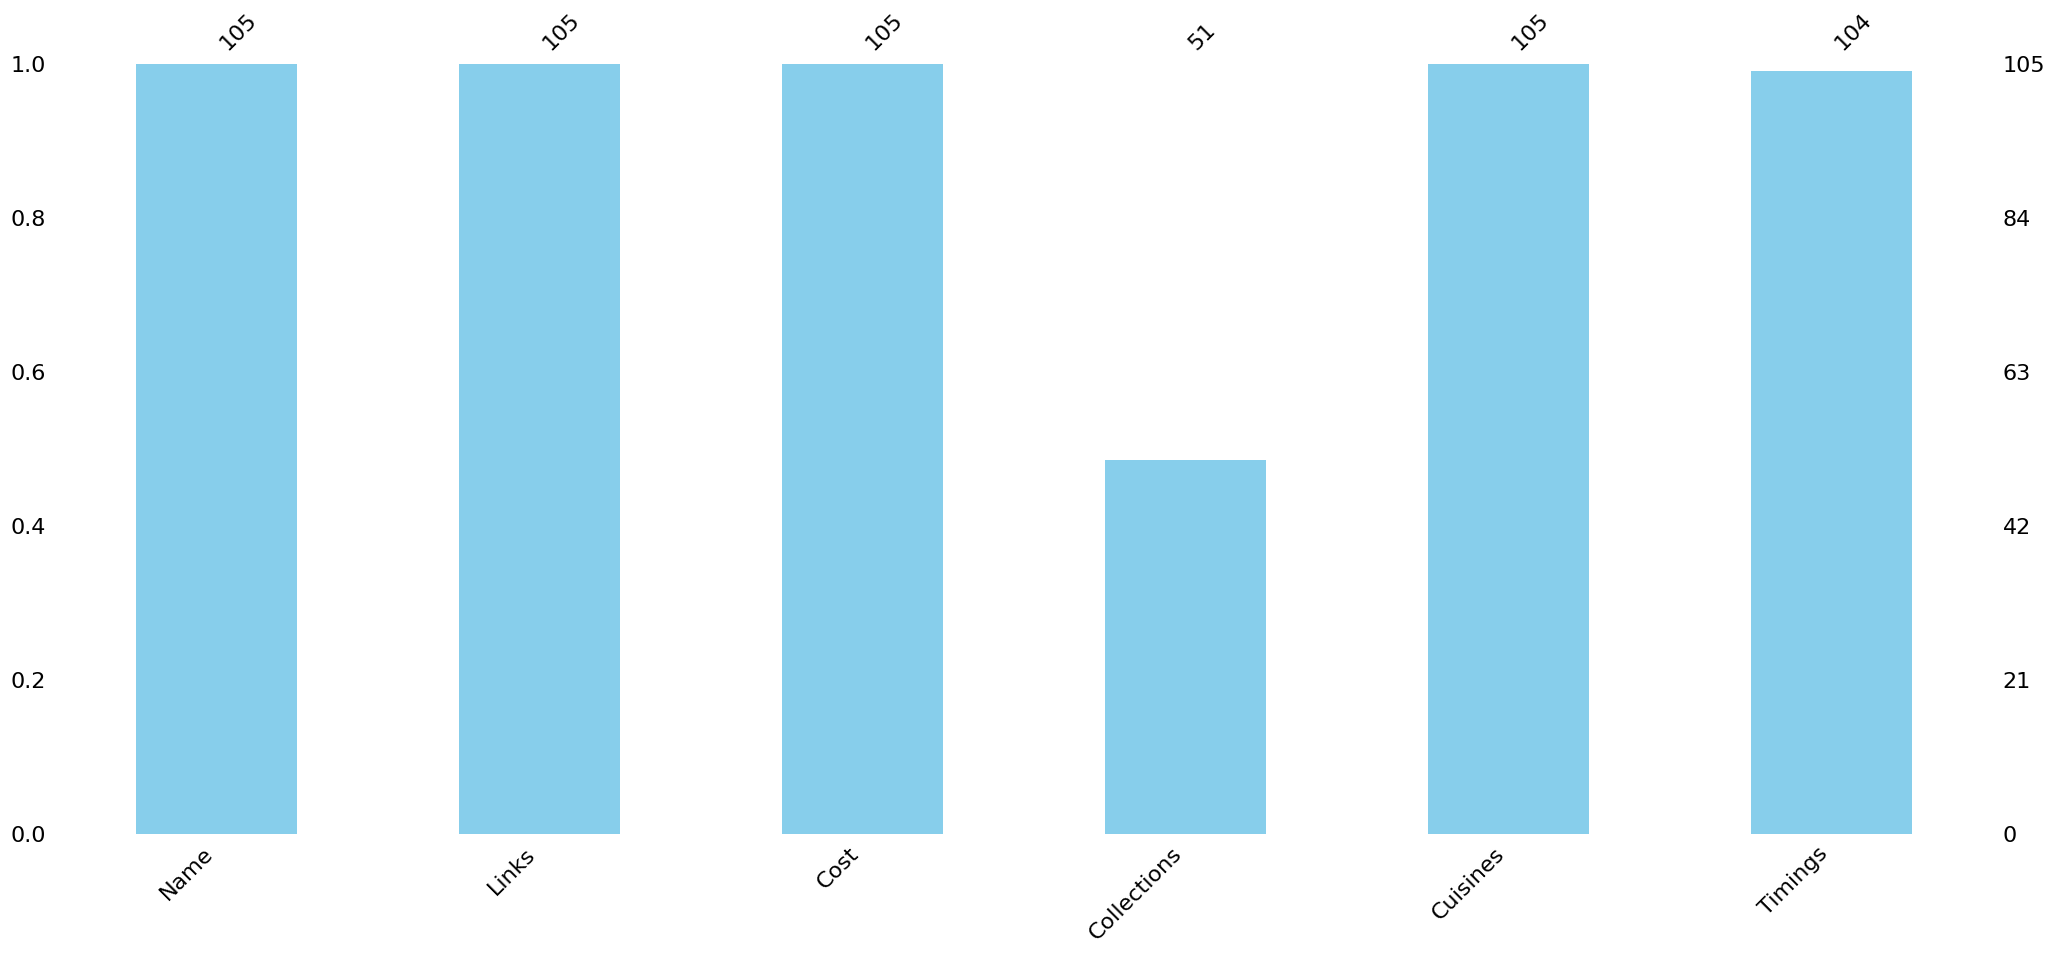

time: 1.05 s (started: 2023-08-03 11:31:47 +00:00)


In [1054]:
# Missing Values/Null Values Count of zamato restaurent name dataset
missing_func(df_restaurant)

missing_value  % of missing values Data_Type
Restaurant              0                 0.00    object
Reviewer               38                 0.38    object
Review                 45                 0.45    object
Rating                 38                 0.38    object
Metadata               38                 0.38    object
Time                   38                 0.38    object
Pictures                0                 0.00     int64

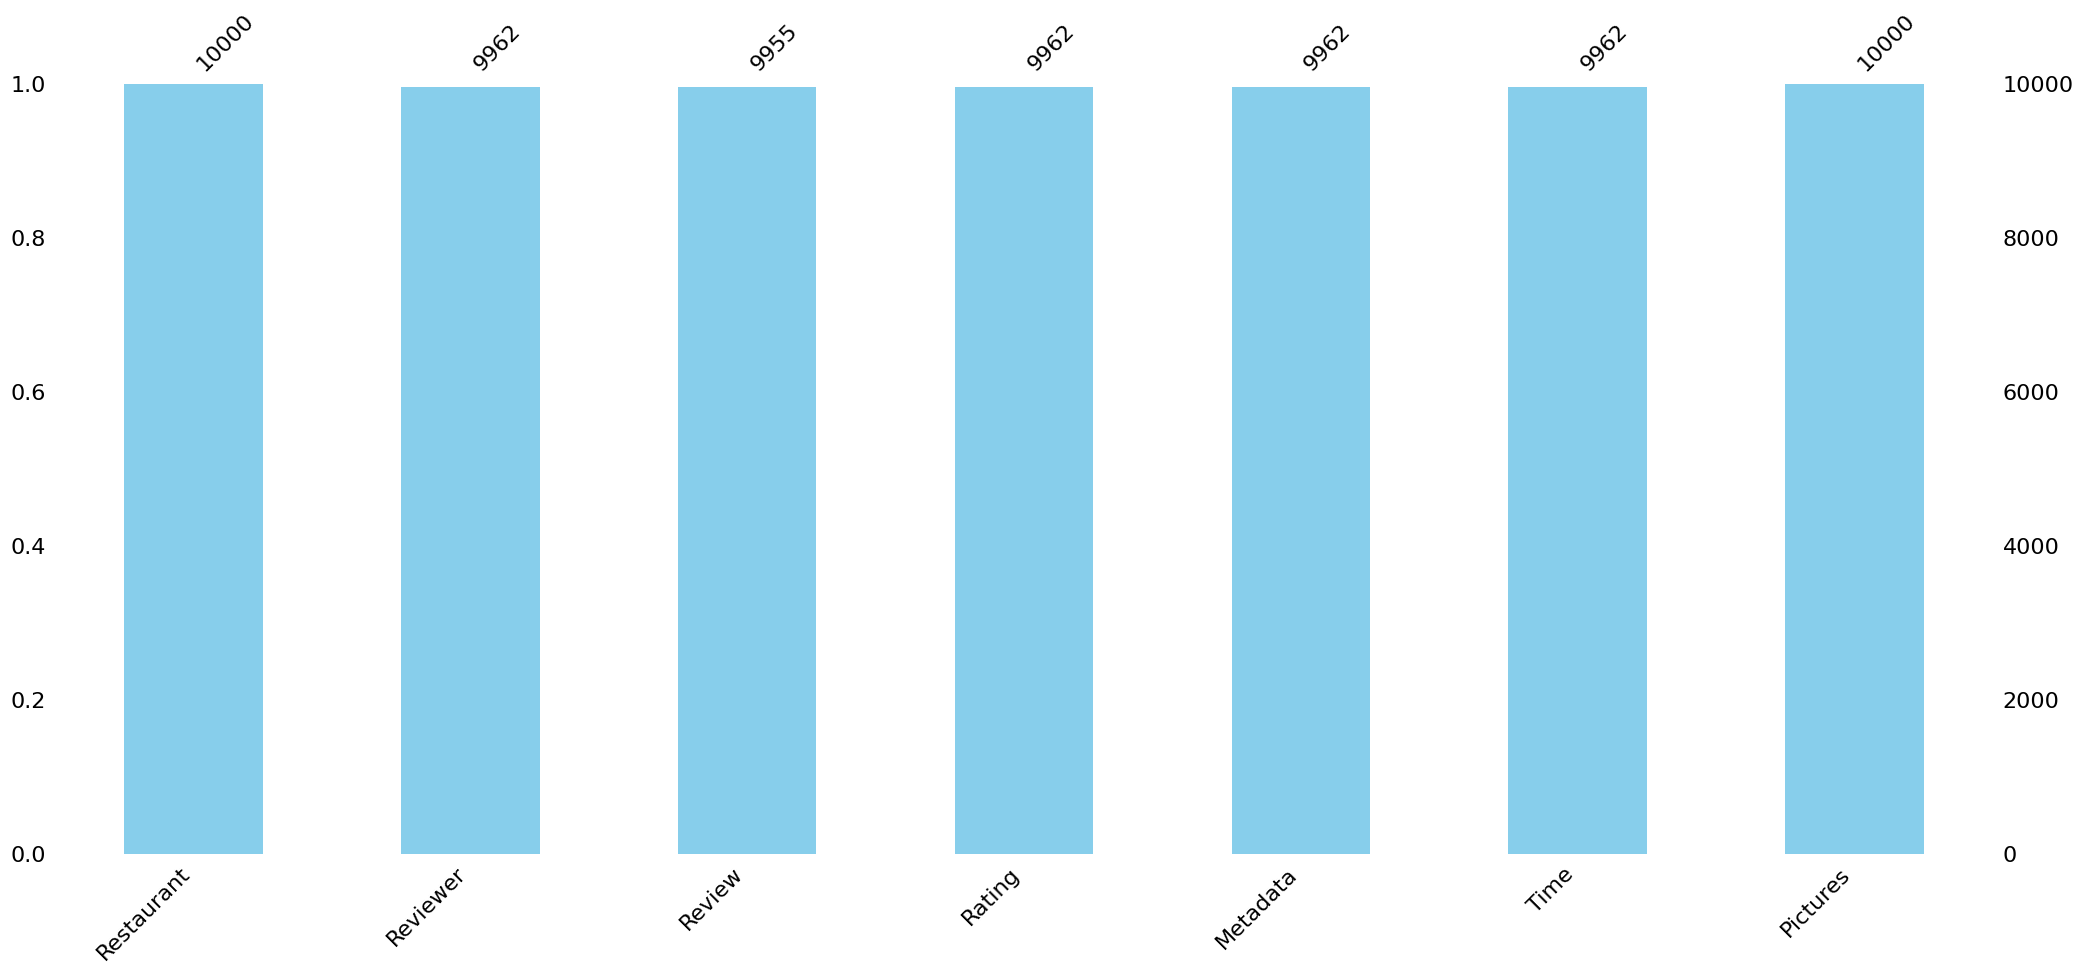

time: 1.94 s (started: 2023-08-03 11:31:48 +00:00)


In [1055]:
# Missing Values/Null Values Count of zamato resturent review dataset
missing_func(df_review)

### What did you know about your dataset?

**Restaurant DataSet**
* There are total 105 observation with 6 different features.
* Feature like collections having 54 and timing has only one null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* There is no duplicated value present in the dataset.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Feature like reviewer having 38, review having 45, Rating having 38, metadata having 38 and Time having 38 null value present in the review dataset.
* There is no duplicated value present in the dataset.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [1056]:
# Dataset Columns of Zamato restaurant name
print(df_restaurant.columns)
print('\n')

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')


time: 2.44 ms (started: 2023-08-03 11:31:50 +00:00)


In [1057]:
# Dataset Columns of Zamato restaurant review
print(df_review.columns)
print('\n')

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')


time: 4.18 ms (started: 2023-08-03 11:31:50 +00:00)


In [1058]:
# Dataset Describe of zamato restaurant name
df_restaurant.describe(include='all')

Name                                              Links  \
count               105                                                105   
unique              105                                                105   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                  1                                                  1   

       Cost                                  Collections  \
count   105                                           51   
unique   29                                           42   
top     500  Food Hygiene Rated Restaurants in Hyderabad   
freq     13                                            4   

                     Cuisines         Timings  
count                     105             104  
unique                     92              77  
top     North Indian, Chinese  11 AM to 11 PM  
freq                        4               6

time: 40.5 ms (started: 2023-08-03 11:31:50 +00:00)


In [1059]:
# Dataset Describe of zamato restaurant review
df_review.describe(include='all')

Restaurant     Reviewer Review Rating  Metadata             Time  \
count             10000         9962   9955   9962      9962             9962   
unique              100         7446   9364     10      2477             9782   
top     Beyond Flavours  Parijat Ray   good      5  1 Review  7/29/2018 20:34   
freq                100           13    237   3832       919                3   
mean                NaN          NaN    NaN    NaN       NaN              NaN   
std                 NaN          NaN    NaN    NaN       NaN              NaN   
min                 NaN          NaN    NaN    NaN       NaN              NaN   
25%                 NaN          NaN    NaN    NaN       NaN              NaN   
50%                 NaN          NaN    NaN    NaN       NaN              NaN   
75%                 NaN          NaN    NaN    NaN       NaN              NaN   
max                 NaN          NaN    NaN    NaN       NaN              NaN   

            Pictures  
count   10000.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean        0.748600  
std         2.570381  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        64.000000

time: 82.9 ms (started: 2023-08-03 11:31:50 +00:00)


### Variables Description

---
**Zomato Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Zomato Restaurant Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : Number of pictures posted with review





### Check Unique Values for each variable.

In [1060]:
# Create a function to find the unique value of each varriable of the dataset
def unique_val(df):
  for i in df.columns.tolist():
    print(f'Total number of unique value in {i} is {df[i].nunique()}.')

time: 933 µs (started: 2023-08-03 11:31:50 +00:00)


In [1061]:
# Check Unique Values of the Zamato Restaurant name dataset for each variable.
unique_val(df_restaurant)

Total number of unique value in Name is 105.
Total number of unique value in Links is 105.
Total number of unique value in Cost is 29.
Total number of unique value in Collections is 42.
Total number of unique value in Cuisines is 92.
Total number of unique value in Timings is 77.
time: 5.82 ms (started: 2023-08-03 11:31:50 +00:00)


In [1062]:
# Check Unique Values of the Zamato Restaurant Review dataset for each variable.
unique_val(df_review)

Total number of unique value in Restaurant is 100.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 10.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9782.
Total number of unique value in Pictures is 36.
time: 27.5 ms (started: 2023-08-03 11:31:50 +00:00)


## 3. ***Data Wrangling***

### Data Wrangling Code

#### **Restaurent**

In [1063]:
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
time: 20 ms (started: 2023-08-03 11:31:50 +00:00)


In [1064]:
df_restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

time: 5.53 ms (started: 2023-08-03 11:31:50 +00:00)


In [1065]:
df_restaurant

Name  \
0                           Beyond Flavours   
1                                  Paradise   
2                                  Flechazo   
3            Shah Ghouse Hotel & Restaurant   
4                Over The Moon Brew Company   
..                                      ...   
100                               IndiBlaze   
101                            Sweet Basket   
102                        Angaara Counts 3   
103                             Wich Please   
104  Republic Of Noodles - Lemon Tree Hotel   

                                                 Links   Cost  \
0    https://www.zomato.com/hyderabad/beyond-flavou...    800   
1    https://www.zomato.com/hyderabad/paradise-gach...    800   
2    https://www.zomato.com/hyderabad/flechazo-gach...  1,300   
3    https://www.zomato.com/hyderabad/shah-ghouse-h...    800   
4    https://www.zomato.com/hyderabad/over-the-moon...  1,200   
..                                                 ...    ...   
100  https://www.zomato.com/hyderabad/indiblaze-gac...    600   
101  https://www.zomato.com/hyderabad/sweet-basket-...    200   
102  https://www.zomato.com/hyderabad/angaara-count...    500   
103  https://www.zomato.com/hyderabad/wich-please-1...    250   
104  https://www.zomato.com/hyderabad/republic-of-n...  1,700   

                                           Collections  \
0    Food Hygiene Rated Restaurants in Hyderabad, C...   
1                                  Hyderabad's Hottest   
2                   Great Buffets, Hyderabad's Hottest   
3                               Late Night Restaurants   
4    Best Bars & Pubs, Food Hygiene Rated Restauran...   
..                                                 ...   
100                                                NaN   
101                                                NaN   
102                                                NaN   
103                                                NaN   
104                               Pan-Asian Delicacies   

                                              Cuisines  \
0    Chinese, Continental, Kebab, European, South I...   
1                       Biryani, North Indian, Chinese   
2         Asian, Mediterranean, North Indian, Desserts   
3    Biryani, North Indian, Chinese, Seafood, Bever...   
4    Asian, Continental, North Indian, Chinese, Med...   
..                                                 ...   
100                                   Fast Food, Salad   
101                                     Bakery, Mithai   
102                     North Indian, Biryani, Chinese   
103                                          Fast Food   
104                    Thai, Asian, Chinese, Malaysian   

                                               Timings  
0        12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  
1                                       11 AM to 11 PM  
2                11:30 AM to 4:30 PM, 6:30 PM to 11 PM  
3                                      12 Noon to 2 AM  
4    12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...  
..                                                 ...  
100                                     11 AM to 11 PM  
101  10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr...  
102                                   12 Noon to 11 PM  
103                           8am to 12:30AM (Mon-Sun)  
104              11:30 AM to 3 PM, 7 PM to 12 Midnight  

[105 rows x 6 columns]

time: 23.1 ms (started: 2023-08-03 11:31:50 +00:00)


missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000    object
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

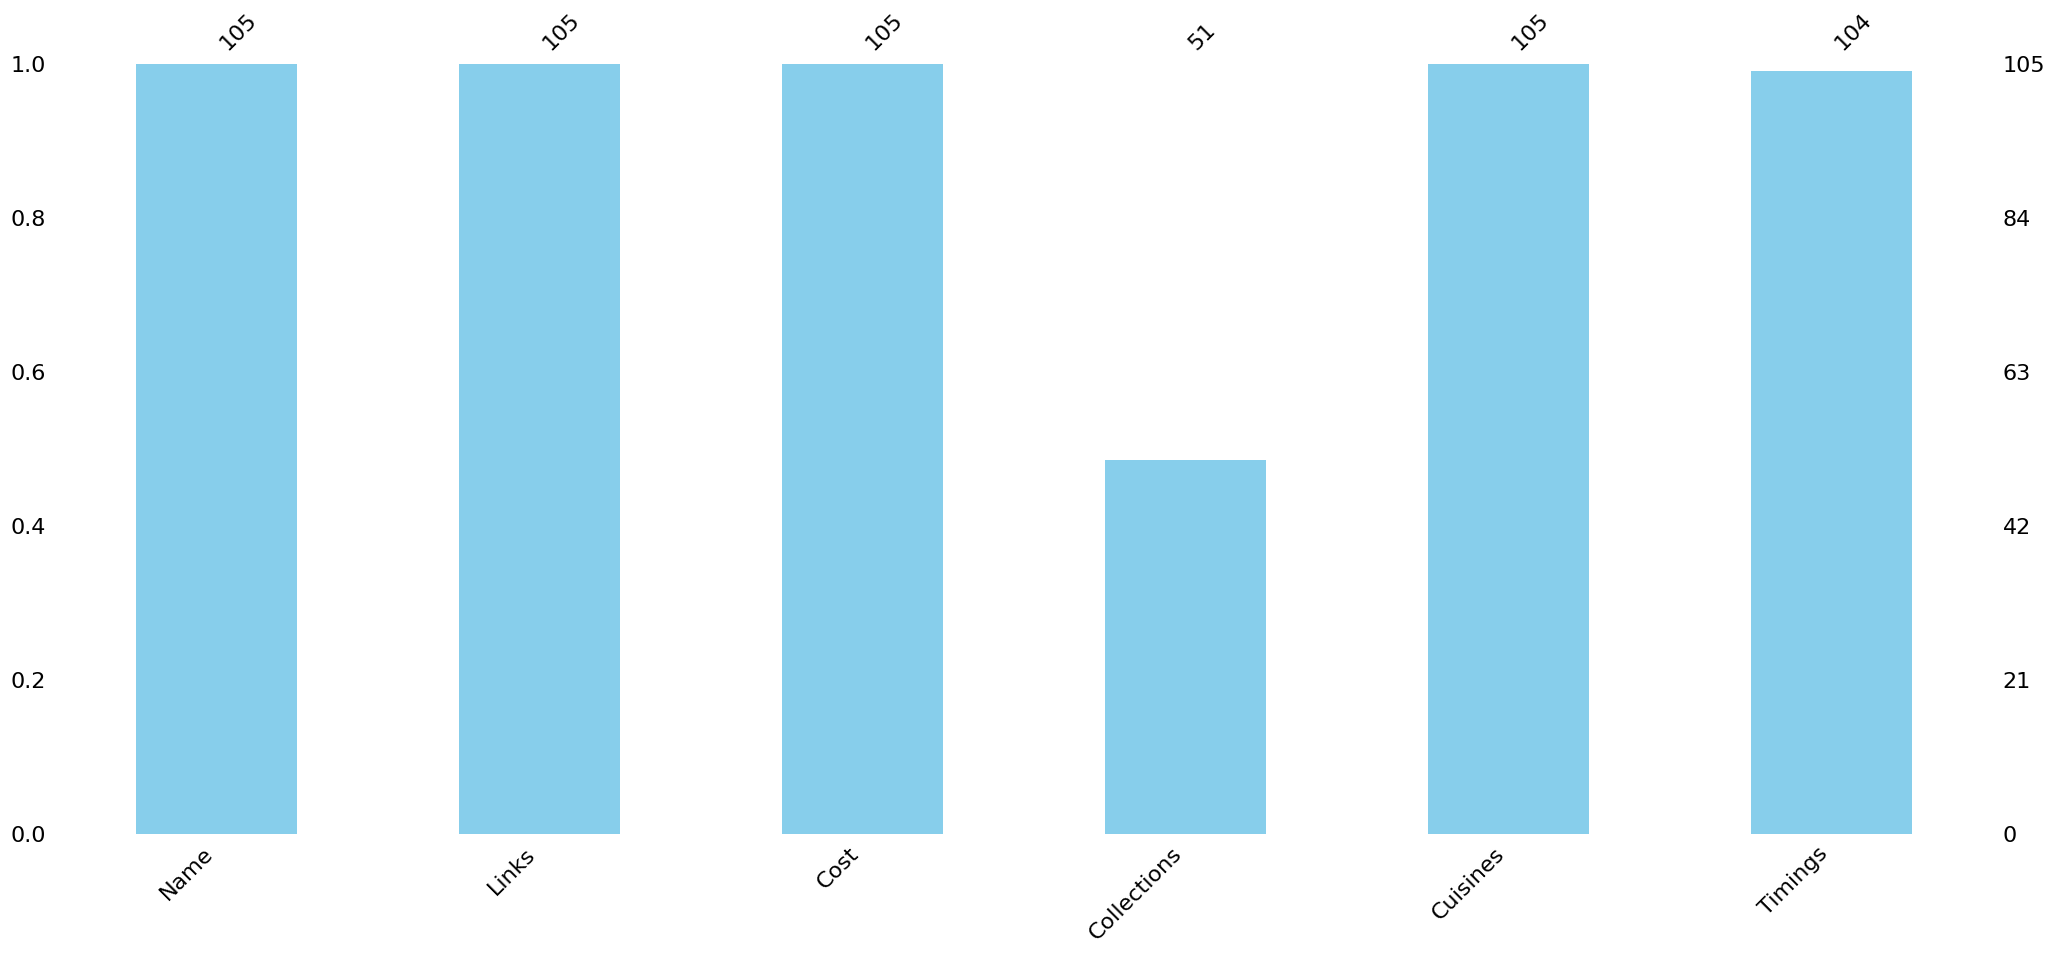

time: 1.69 s (started: 2023-08-03 11:31:50 +00:00)


In [1066]:
# missing value of zamato resturant name dataset
missing_func(df_restaurant)

In [1067]:
# Check the total number of unique value of the resturent dataframe
df_restaurant['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '300', '1,000', '350',
       '400', '1,600', '750', '550', '1,900', '450', '150', '1,400',
       '1,100', '600', '200', '900', '700', '1,700', '2,500', '850',
       '650', '1,800', '2,800', '1,750', '250'], dtype=object)

time: 6.88 ms (started: 2023-08-03 11:31:52 +00:00)


In [1068]:
# Change the datatype of the Cost features from object to int
df_restaurant['Cost'] = df_restaurant['Cost'].str.replace(',','').astype(int)

time: 3.65 ms (started: 2023-08-03 11:31:52 +00:00)


In [1069]:
# Check the Restaurant information
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB
time: 18.2 ms (started: 2023-08-03 11:31:52 +00:00)


In [1070]:
# Top 5 economy restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].head()[::-1]

Name  Cost
59             KS Bakers   200
101         Sweet Basket   200
54        Asian Meal Box   200
23                  Amul   150
89   Mohammedia Shawarma   150

time: 18.7 ms (started: 2023-08-03 11:31:52 +00:00)


In [1071]:
# Top 5 costly restaurent
df_restaurant.sort_values('Cost')[['Name','Cost']].tail()[::-1]

Name  Cost
92               Collage - Hyatt Hyderabad Gachibowli  2800
56                   Feast - Sheraton Hyderabad Hotel  2500
21  Jonathan's Kitchen - Holiday Inn Express & Suites  1900
18                                  10 Downing Street  1900
91            Cascade - Radisson Hyderabad Hitec City  1800

time: 11.2 ms (started: 2023-08-03 11:31:52 +00:00)


In [1072]:
# Create dataframe Restaurant name based on the price
df = df_restaurant.groupby('Cost')['Name'].apply(lambda x: x.tolist()).reset_index()
#getting Restaurant count with another dataframe
df1 = df_restaurant.groupby('Cost')['Name'].count()
#merging together
df2 = df.merge(df1,how = 'inner',on = 'Cost')
# Rename of the columns
df2 = df2.rename(columns = {'Name_x': 'Name of Restaurent','Name_y':'Total restaurent'})

time: 13.8 ms (started: 2023-08-03 11:31:52 +00:00)


In [1073]:
# Maximum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).head()

Cost                                 Name of Restaurent  Total restaurent
7    500  [eat.fit, KFC, Kritunga Restaurant, Karachi Ba...                13
9    600  [Behrouz Biryani, Karachi Cafe, Hyderabad Chef...                10
11   700  [Marsala Food Company, Green Bawarchi Restaura...                 8
18  1200  [Over The Moon Brew Company, The Glass Onion, ...                 7
16  1000  [Hyper Local, Tiki Shack, Pista House, La La L...                 6

time: 13.9 ms (started: 2023-08-03 11:31:52 +00:00)


In [1074]:
# minimum 5 hotel share same price
df2.sort_values('Total restaurent', ascending = False).tail()

Cost                      Name of Restaurent  Total restaurent
14   850                          [Dine O China]                 1
10   650                    [Squeeze @ The Lime]                 1
3    300              [Shah Ghouse Spl Shawarma]                 1
2    250                           [Wich Please]                 1
28  2800  [Collage - Hyatt Hyderabad Gachibowli]                 1

time: 14.7 ms (started: 2023-08-03 11:31:52 +00:00)


In [1075]:
# spliting the cusines and storing in list
cuisine_value_list = df_restaurant.Cuisines.str.split(', ')
# storing all the cusines in a dict
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1
# Converting Dictionary to DataFrame
df_cuisine = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurant'})
# top 5 cuisine
df_cuisine.sort_values('Number of Restaurant',ascending = False).head()

Cuisine  Number of Restaurant
5   North Indian                    61
0        Chinese                    43
1    Continental                    21
6        Biryani                    16
18     Fast Food                    15

time: 25.5 ms (started: 2023-08-03 11:31:52 +00:00)


In [1076]:
# spliting the cusines and storing in list
collection_value_list = df_restaurant.Collections.str.split(', ').dropna()
# storing all the cusines in a dict
collection_dict = {}
for collection_names in collection_value_list:
    for collection in collection_names:
        if (collection in collection_dict):
            collection_dict[collection]+=1
        else:
            collection_dict[collection]=1
# Converting Dictionary to DataFrame
df_collection = pd.DataFrame.from_dict([collection_dict]).transpose().reset_index().rename(columns={'index': 'Tags',0:'Number of Restaurant'})
# top 5 cuisine
df_collection.sort_values('Number of Restaurant',ascending = False).head()

Tags  Number of Restaurant
2                                Great Buffets                    11
0  Food Hygiene Rated Restaurants in Hyderabad                     8
5                       Live Sports Screenings                     7
6                          Hyderabad's Hottest                     7
1                          Corporate Favorites                     6

time: 20 ms (started: 2023-08-03 11:31:52 +00:00)


#### **Review**

In [1077]:
# Information of Review
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB
time: 34.5 ms (started: 2023-08-03 11:31:52 +00:00)


In [1078]:
# Columns of the Review
df_review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

time: 21 ms (started: 2023-08-03 11:31:52 +00:00)


In [1079]:
# Top 5 review dataframe
df_review.head()

Restaurant              Reviewer  \
0  Beyond Flavours     Rusha Chakraborty   
1  Beyond Flavours  Anusha Tirumalaneedi   
2  Beyond Flavours       Ashok Shekhawat   
3  Beyond Flavours        Swapnil Sarkar   
4  Beyond Flavours                Dileep   

                                              Review Rating  \
0  The ambience was good, food was quite good . h...      5   
1  Ambience is too good for a pleasant evening. S...      5   
2  A must try.. great food great ambience. Thnx f...      5   
3  Soumen das and Arun was a great guy. Only beca...      5   
4  Food is good.we ordered Kodi drumsticks and ba...      5   

                  Metadata             Time  Pictures  
0   1 Review , 2 Followers  5/25/2019 15:54         0  
1  3 Reviews , 2 Followers  5/25/2019 14:20         0  
2  2 Reviews , 3 Followers  5/24/2019 22:54         0  
3    1 Review , 1 Follower  5/24/2019 22:11         0  
4  3 Reviews , 2 Followers  5/24/2019 21:37         0

time: 54.9 ms (started: 2023-08-03 11:31:52 +00:00)


In [1080]:
# Extract the Year, Month and Date from time
df_review['Review_Year'] = pd.DatetimeIndex(df_review['Time']).year
df_review['Review_Month'] = pd.DatetimeIndex(df_review['Time']).month
df_review['Review_Day'] = pd.DatetimeIndex(df_review['Time']).day

time: 6.58 s (started: 2023-08-03 11:31:52 +00:00)


In [1081]:
# Extract Total Review and Reviewer follower from Metadata
df_review['Reviewer_total_review'],df_review['Reviewer_followers']=df_review['Metadata'].str.split(',').str
# Extract Riviewer & Followers gave the total review in numeric value in the dataframe
df_review['Reviewer_total_review'] = pd.to_numeric(df_review['Reviewer_total_review'].str.split(' ').str[0])
df_review['Reviewer_followers'] = pd.to_numeric(df_review['Reviewer_followers'].str.split(' ').str[1])

time: 192 ms (started: 2023-08-03 11:31:59 +00:00)


In [1082]:
# Unique value of rating
df_review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

time: 9.14 ms (started: 2023-08-03 11:31:59 +00:00)


In [1083]:
# In order for rating checking values
df_review['Rating'].value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

time: 18.9 ms (started: 2023-08-03 11:31:59 +00:00)


In [1084]:
#since there is one rating as like converting it to 0 since no rating is 0 then to median
df_review.loc[df_review['Rating'] == 'Like'] = 0

time: 10.8 ms (started: 2023-08-03 11:31:59 +00:00)


In [1085]:
#changing data type for rating in review data
df_review['Rating'] = df_review['Rating'].astype('float')

time: 11.5 ms (started: 2023-08-03 11:31:59 +00:00)


In [1086]:
# Count the value of rating in review dataframe
df_review['Rating'].value_counts()

5.0    3832
4.0    2373
1.0    1735
3.0    1193
2.0     684
4.5      69
3.5      47
2.5      19
1.5       9
0.0       1
Name: Rating, dtype: int64

time: 15 ms (started: 2023-08-03 11:31:59 +00:00)


In [1087]:
df_review

Restaurant              Reviewer  \
0      Beyond Flavours     Rusha Chakraborty   
1      Beyond Flavours  Anusha Tirumalaneedi   
2      Beyond Flavours       Ashok Shekhawat   
3      Beyond Flavours        Swapnil Sarkar   
4      Beyond Flavours                Dileep   
...                ...                   ...   
9995  Chinese Pavilion      Abhishek Mahajan   
9996  Chinese Pavilion        Sharad Agrawal   
9997  Chinese Pavilion             Ramandeep   
9998  Chinese Pavilion       Nayana Shanbhag   
9999  Chinese Pavilion      Bhargava Krishna   

                                                 Review  Rating  \
0     The ambience was good, food was quite good . h...     5.0   
1     Ambience is too good for a pleasant evening. S...     5.0   
2     A must try.. great food great ambience. Thnx f...     5.0   
3     Soumen das and Arun was a great guy. Only beca...     5.0   
4     Food is good.we ordered Kodi drumsticks and ba...     5.0   
...                                                 ...     ...   
9995  Madhumathi Mahajan Well to start with nice cou...     3.0   
9996  This place has never disappointed us.. The foo...     4.5   
9997  Bad rating is mainly because of "Chicken Bone ...     1.5   
9998  I personally love and prefer Chinese Food. Had...     4.0   
9999  Checked in here to try some delicious chinese ...     3.5   

                          Metadata             Time  Pictures  Review_Year  \
0           1 Review , 2 Followers  5/25/2019 15:54         0       2019.0   
1          3 Reviews , 2 Followers  5/25/2019 14:20         0       2019.0   
2          2 Reviews , 3 Followers  5/24/2019 22:54         0       2019.0   
3            1 Review , 1 Follower  5/24/2019 22:11         0       2019.0   
4          3 Reviews , 2 Followers  5/24/2019 21:37         0       2019.0   
...                            ...              ...       ...          ...   
9995     53 Reviews , 54 Followers    6/5/2016 0:08         0       2016.0   
9996      2 Reviews , 53 Followers   6/4/2016 22:01         0       2016.0   
9997    65 Reviews , 423 Followers   6/3/2016 10:37         3       2016.0   
9998    13 Reviews , 144 Followers  5/31/2016 17:22         0       2016.0   
9999  472 Reviews , 1302 Followers  5/31/2016 16:41         6       2016.0   

      Review_Month  Review_Day  Reviewer_total_review  Reviewer_followers  
0              5.0        25.0                    1.0                 2.0  
1              5.0        25.0                    3.0                 2.0  
2              5.0        24.0                    2.0                 3.0  
3              5.0        24.0                    1.0                 1.0  
4              5.0        24.0                    3.0                 2.0  
...            ...         ...                    ...                 ...  
9995           6.0         5.0                   53.0                54.0  
9996           6.0         4.0                    2.0                53.0  
9997           6.0         3.0                   65.0               423.0  
9998           5.0        31.0                   13.0               144.0  
9999           5.0        31.0                  472.0              1302.0  

[10000 rows x 12 columns]

time: 64.4 ms (started: 2023-08-03 11:31:59 +00:00)


In [1088]:
# Average rating and total reviewer of the restaurant
avg_restaurant_rating = df_review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).rename(columns={'Reviewer' : 'Total_review'})
avg_restaurant_rating

Rating  Total_review
Restaurant                                                 
0                                        0.00             1
10 Downing Street                        3.80           100
13 Dhaba                                 3.48           100
3B's - Buddies, Bar & Barbecue           4.76           100
AB's - Absolute Barbecues                4.88           100
...                                       ...           ...
Urban Asia - Kitchen & Bar               3.65           100
Yum Yum Tree - The Arabian Food Court    3.56           100
Zega - Sheraton Hyderabad Hotel          4.45           100
Zing's Northeast Kitchen                 3.65           100
eat.fit                                  3.20           100

[101 rows x 2 columns]

time: 52.1 ms (started: 2023-08-03 11:31:59 +00:00)


In [1089]:
# Check the total restaurant in review dataframe
print(df_review['Restaurant'].nunique())
print('\n')

101


time: 6.73 ms (started: 2023-08-03 11:31:59 +00:00)


In [1090]:
# without review restaurant
restaurant_without_review = [i for i in df_restaurant['Name'].unique() if i not in df_review['Restaurant'].unique()]
restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

time: 98.8 ms (started: 2023-08-03 11:31:59 +00:00)


In [1091]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).head()

Rating  Total_review
Restaurant                                          
AB's - Absolute Barbecues         4.88           100
B-Dubs                            4.81           100
3B's - Buddies, Bar & Barbecue    4.76           100
Paradise                          4.70           100
Flechazo                          4.66           100

time: 29.7 ms (started: 2023-08-03 11:31:59 +00:00)


In [1092]:
# Top 5 restaurent on the basis of the rating
avg_restaurant_rating.sort_values('Rating',ascending = False).tail()

Rating  Total_review
Restaurant                            
Mathura Vilas       2.82           100
Pakwaan Grand       2.71           100
Asian Meal Box      2.58           100
Hotel Zara Hi-Fi    2.40           100
0                   0.00             1

time: 25.9 ms (started: 2023-08-03 11:31:59 +00:00)


In [1093]:
#Finding the most followed critic
most_followed_reviewer = df_review.groupby('Reviewer').agg({'Reviewer_total_review':'max',
      'Reviewer_followers':'max', 'Rating':'mean'[:5]}).reset_index().rename(columns = {'Rating':'Average Rating'}).sort_values('Reviewer_followers',ascending = False)

time: 39.6 ms (started: 2023-08-03 11:31:59 +00:00)


In [1094]:
#Finding the top 5 most followed critic
most_followed_reviewer.head()

Reviewer  Reviewer_total_review  Reviewer_followers  \
5464    Satwinder Singh                  186.0             13410.0   
1702         Eat_vth_me                   60.0             13320.0   
5236       Samar Sardar                    8.0             11329.0   
1788  Foodies Hyderabad                   31.0              9494.0   
6230           Srinivas                   34.0              7628.0   

      Average Rating  
5464        3.666667  
1702        5.000000  
5236        3.500000  
1788        4.500000  
6230        3.714286

time: 16 ms (started: 2023-08-03 11:32:00 +00:00)


#### **Null Value**

##### **Treatment of Null Value of Restaurant Dataset**

missing_value  % of missing values Data_Type
Name                     0             0.000000    object
Links                    0             0.000000    object
Cost                     0             0.000000     int64
Collections             54            51.428571    object
Cuisines                 0             0.000000    object
Timings                  1             0.952381    object

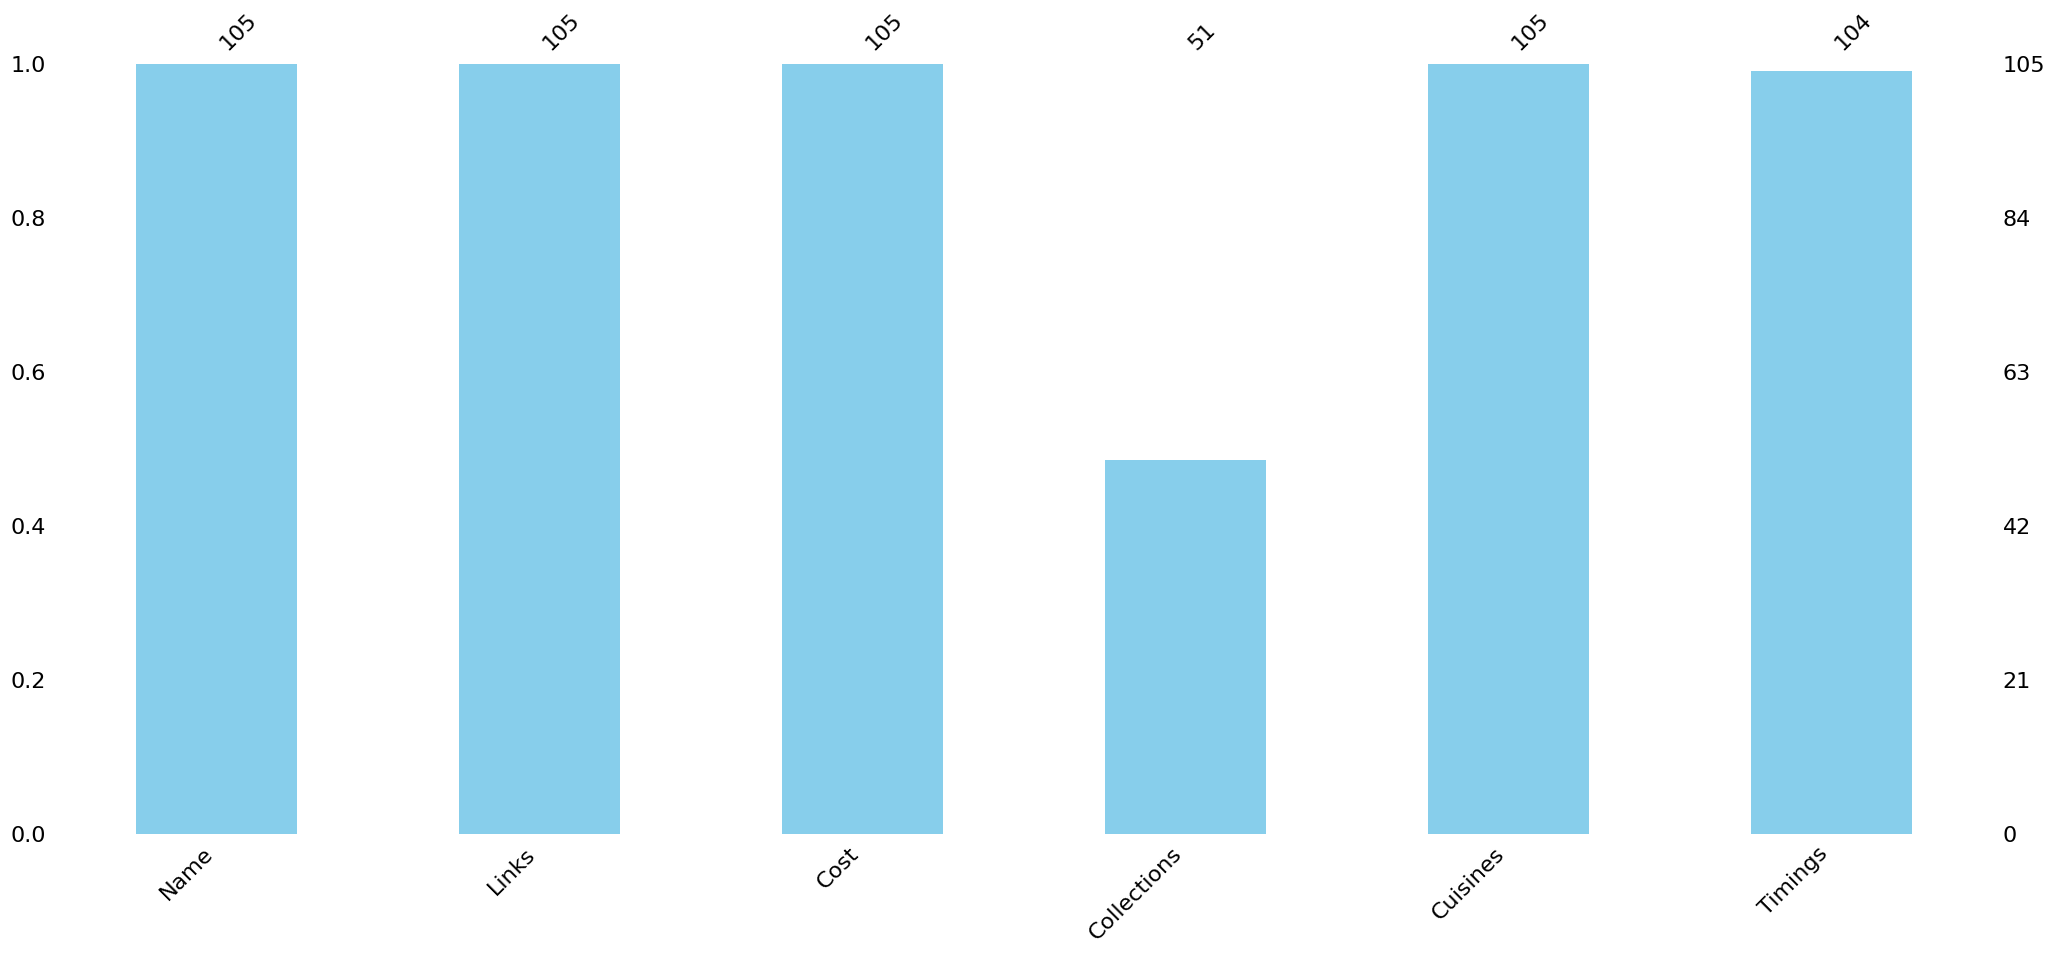

time: 2.15 s (started: 2023-08-03 11:32:00 +00:00)


In [1095]:
# Check the missing Value in Restaurant
missing_func(df_restaurant)

Here we can see that in collection feature having 51.42% of missing value, then it is best for drop the null value in the restaurant dataset.

In [1096]:
# Drop null value in the resturant dataset
df_restaurant.drop('Collections',axis = 1,inplace= True)

time: 2.37 ms (started: 2023-08-03 11:32:02 +00:00)


In [1097]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

time: 6.83 ms (started: 2023-08-03 11:32:02 +00:00)


Here we wiil say that Timing feature having only one null value so it will fill it null value with mode value.

In [1098]:
#filling null value in timings column
df_restaurant['Timings'].fillna(df_restaurant['Timings'].mode()[0], inplace = True)

time: 8.24 ms (started: 2023-08-03 11:32:02 +00:00)


In [1099]:
# Again Check the Null Value
df_restaurant.isna().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

time: 13.4 ms (started: 2023-08-03 11:32:02 +00:00)


So it is claear that there is no null value in the restaurant dataset.

In [1100]:
# Check the duplicate value of the restaurant dataset
print(df_restaurant.duplicated().sum())
print('\n')

0


time: 7.79 ms (started: 2023-08-03 11:32:02 +00:00)


So it is claear that there is no duplicate value in the restaurant dataset.

##### **Treatment of Null Value of Review Dataset**

In [1101]:
# Information of Review Dataset
df_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             10000 non-null  object 
 1   Reviewer               9962 non-null   object 
 2   Review                 9955 non-null   object 
 3   Rating                 9962 non-null   float64
 4   Metadata               9962 non-null   object 
 5   Time                   9962 non-null   object 
 6   Pictures               10000 non-null  int64  
 7   Review_Year            9962 non-null   float64
 8   Review_Month           9962 non-null   float64
 9   Review_Day             9962 non-null   float64
 10  Reviewer_total_review  9962 non-null   float64
 11  Reviewer_followers     8384 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 937.6+ KB
time: 44.6 ms (started: 2023-08-03 11:32:02 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                 0.00    object
Reviewer                          38                 0.38    object
Review                            45                 0.45    object
Rating                            38                 0.38   float64
Metadata                          38                 0.38    object
Time                              38                 0.38    object
Pictures                           0                 0.00     int64
Review_Year                       38                 0.38   float64
Review_Month                      38                 0.38   float64
Review_Day                        38                 0.38   float64
Reviewer_total_review             38                 0.38   float64
Reviewer_followers              1616                16.16   float64

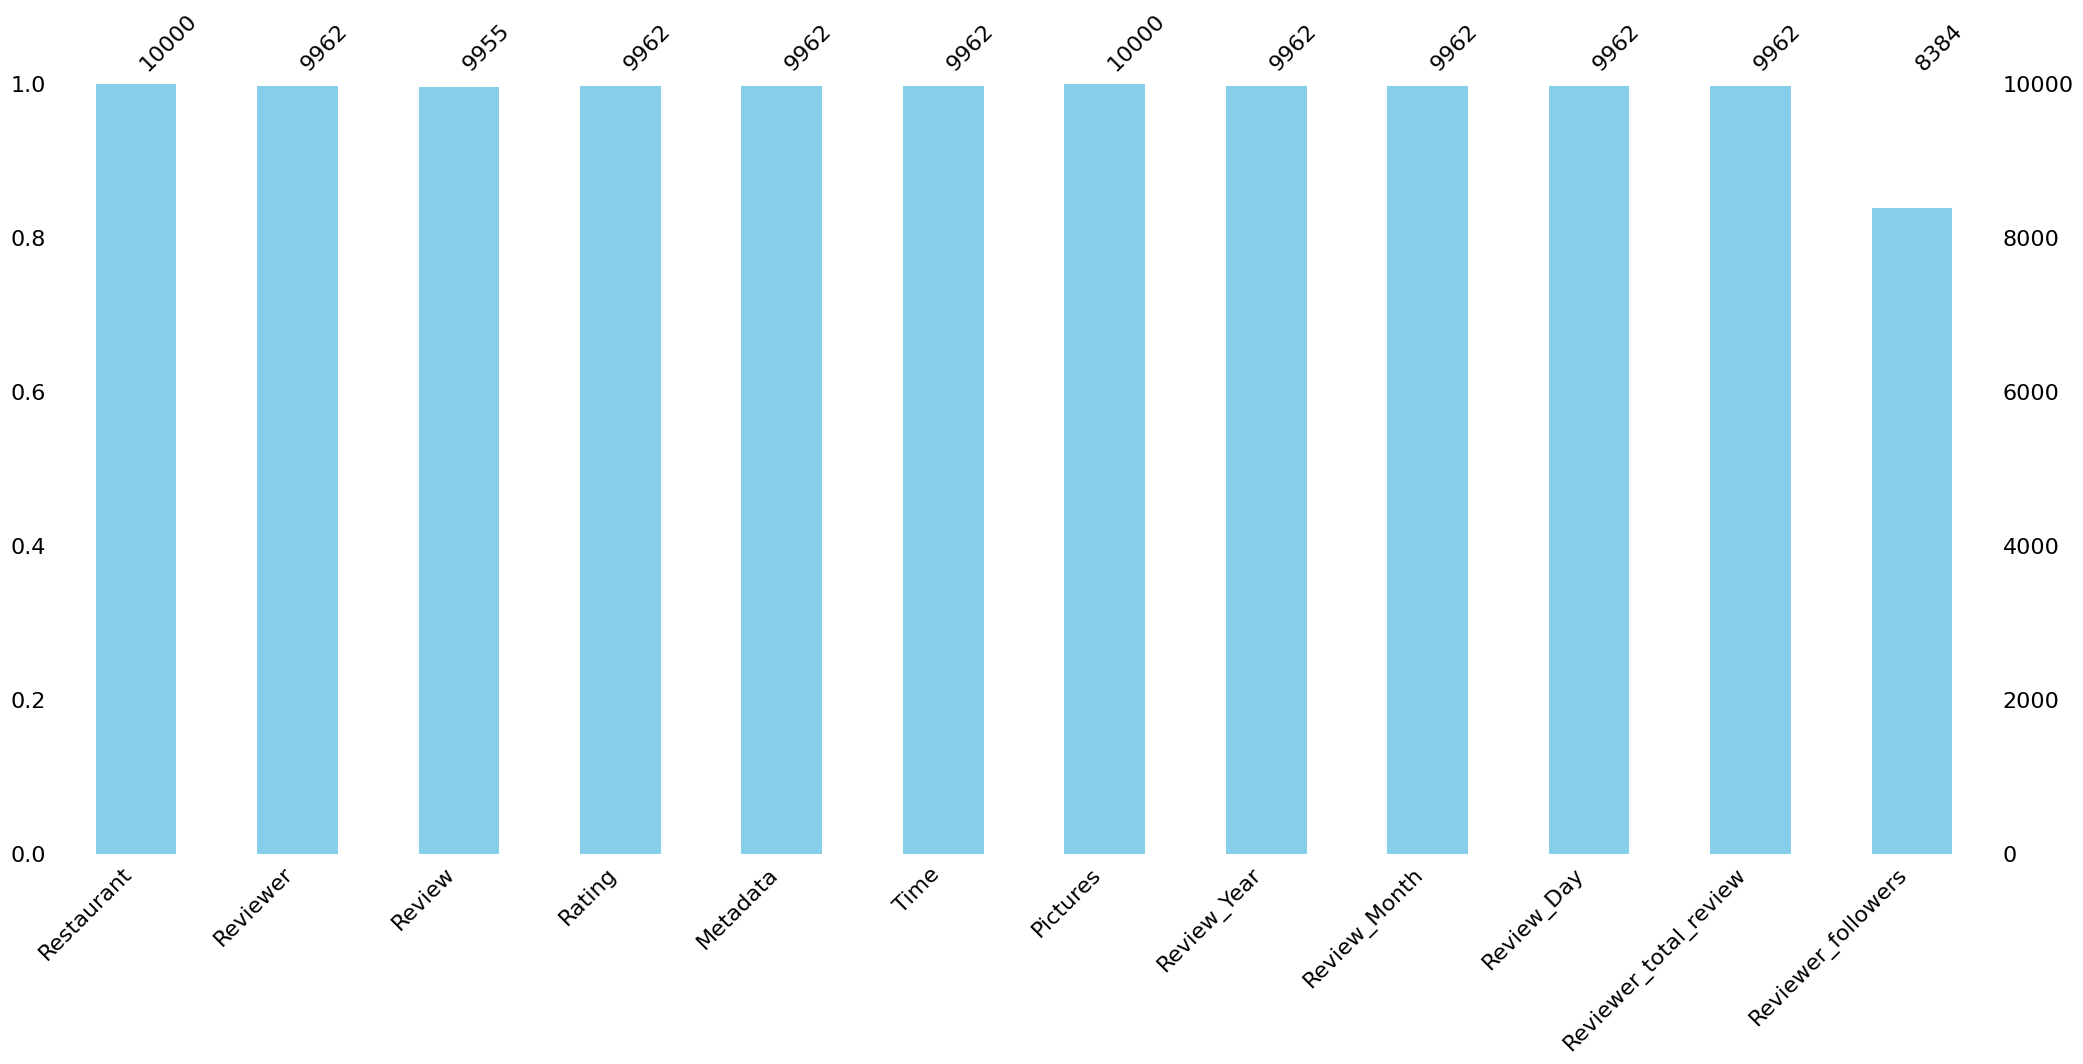

time: 2.92 s (started: 2023-08-03 11:32:02 +00:00)


In [1102]:
# Check the missing value of the review dataset
missing_func(df_review)

Here we can see that there are some missing value in the following feature:
1. Reviewer
2.  Review
3. Rating
4. Metadata
5. Time
6. Review_Year
7. Review_Month
8. Review_Day
9. Review_total_review
10. Reviewer_followers



We have to fill the null values of CompetitionDistance, there are **four** options:
1. **Zero(0) :** Not effective as the corresponding values for CompetitionSinceMonth and CompetitionSinceYear are not zero.
2. **Mean :** Replacing null values with mean will create blunders as it contains outliers and mean is influenced with outliers.
3. **Median :** To get good results replacing with median can be a better choice.
4. **Mode :** Mode can also help to fill the null values in our case.

Since, we have two options(Mode and Median) we are going with the mode for float type of the feature.

In [1103]:
# Treatment of missing value of the float type data with mode value
null_list = [ i for i in df_review.columns if df_review[i].dtypes == 'float64']
n = null_list.index('Reviewer_followers')
null_list.pop(n)
null_list
for i in null_list:
  df_review[i].fillna(df_review[i].mode()[0],inplace = True)

time: 30 ms (started: 2023-08-03 11:32:05 +00:00)


In [1104]:
# dropping null values in reviewer and Reviewer_Total_Review column as all values are null for those column
df_review = df_review.dropna(subset=['Reviewer','Reviewer_total_review'])

time: 10.4 ms (started: 2023-08-03 11:32:05 +00:00)


In [1105]:
#filling null values in review and reviewer follower column
df_review = df_review.fillna({"Review": "No Review", "Reviewer_followers": 0})

time: 20.9 ms (started: 2023-08-03 11:32:05 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

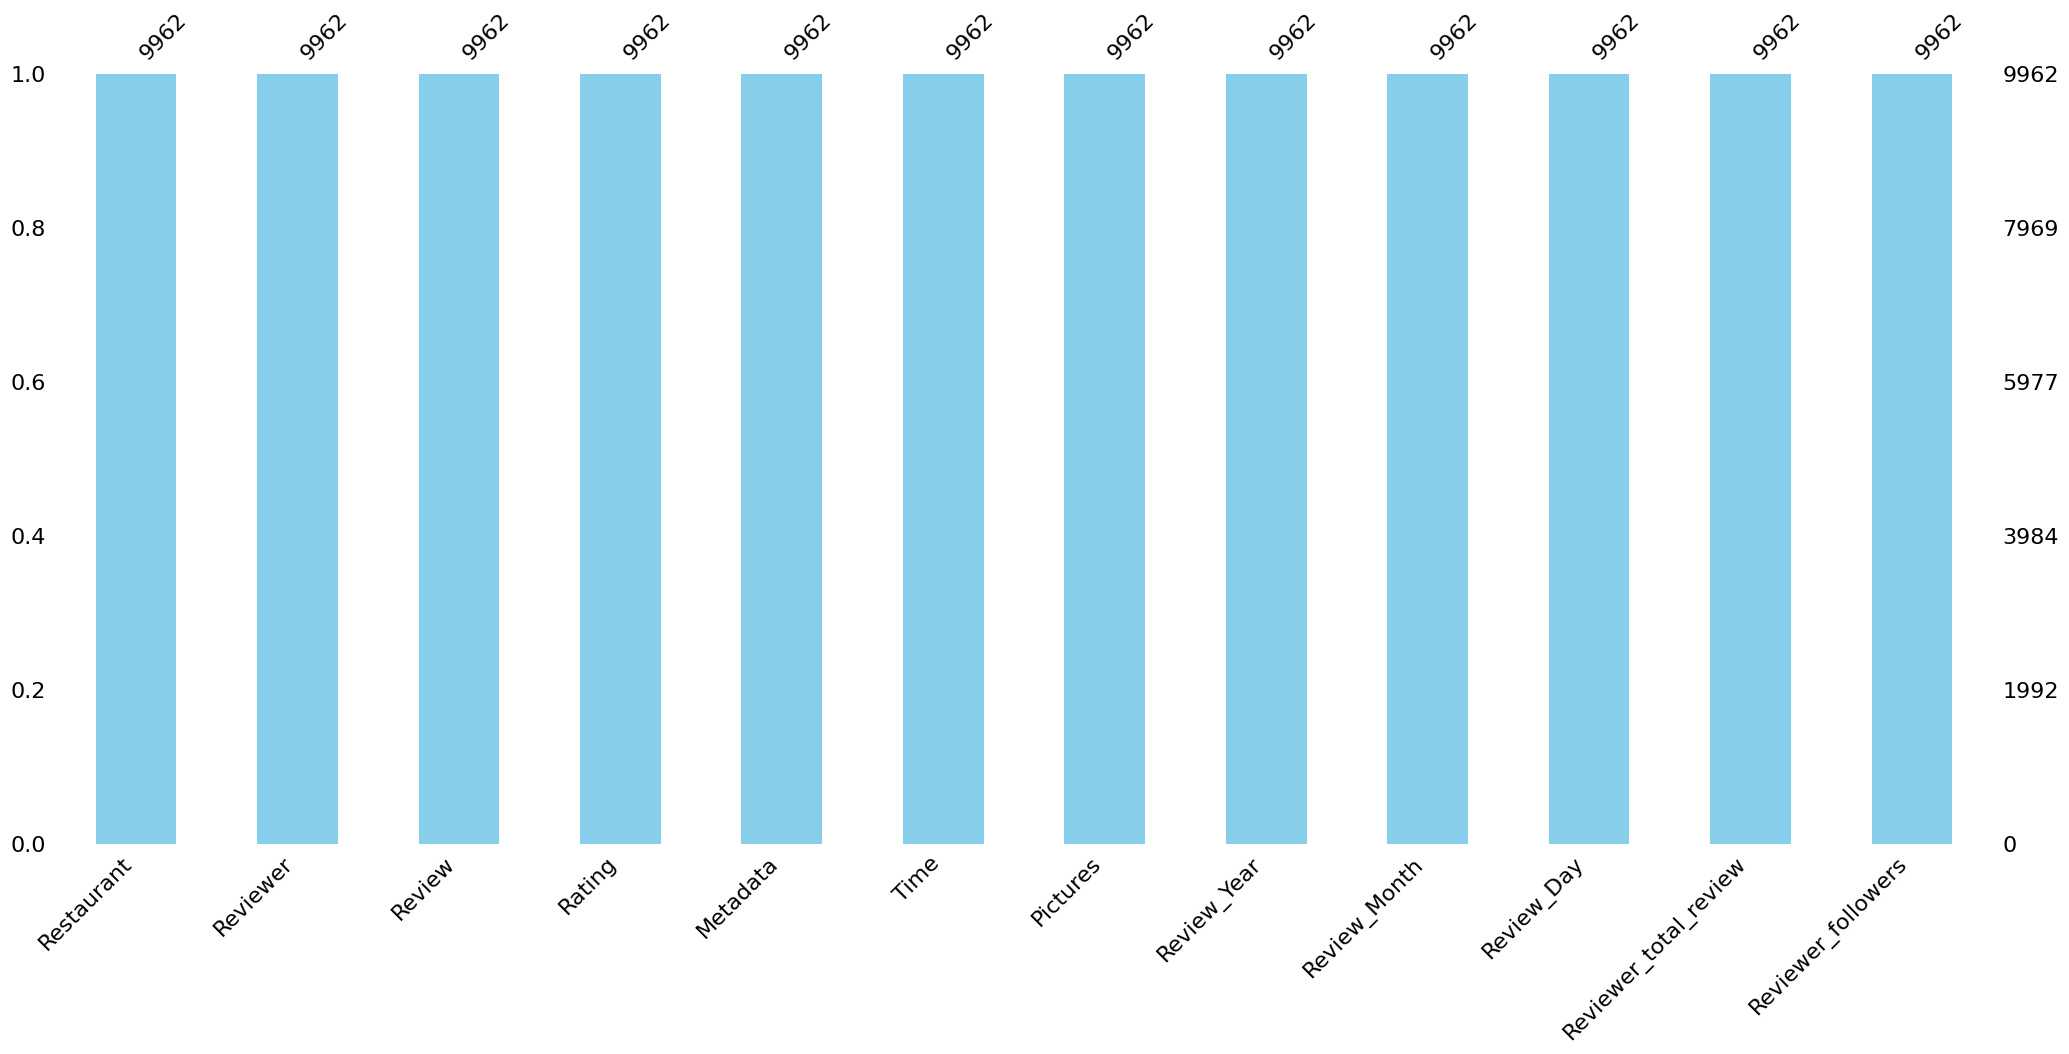

time: 2.58 s (started: 2023-08-03 11:32:05 +00:00)


In [1106]:
missing_func(df_review)

In [1107]:
# Check tje duplicate value in the review dataset
df_review.duplicated().sum()

0

time: 68.1 ms (started: 2023-08-03 11:32:08 +00:00)


#### **Merge Dataset**

In [1108]:
# In Restaurant dataset change the Name as Restaurant
df_restaurant = df_restaurant.rename(columns = {'Name' : 'Restaurant'})

time: 9.01 ms (started: 2023-08-03 11:32:08 +00:00)


In [1109]:
# checking shape of dataset using left join
df_left= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'left')
print(df_left.shape)
print(f'Total number of null values obtained from left join: {df_left.isna().sum().sum()}')

# checking shape of dataset using right join
df_right= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'right')
print(df_right.shape)
print(f'Total number of null values obtained from right join: {df_right.isna().sum().sum()}')


# checking shape of dataset using inner join
df_inner= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'inner')
print(df_inner.shape)
print(f'Total number of null values obtained from inner join: {df_inner.isna().sum().sum()}')

# checking shape of dataset using outer join
df_outer= pd.merge(df_restaurant, df_review, on='Restaurant', how= 'outer')
print(df_outer.shape)
print(f'Total number of null values obtained from outer join: {df_outer.isna().sum().sum()}')

(9966, 16)
Total number of null values obtained from left join: 55
(9962, 16)
Total number of null values obtained from right join: 4
(9961, 16)
Total number of null values obtained from inner join: 0
(9967, 16)
Total number of null values obtained from outer join: 59
time: 342 ms (started: 2023-08-03 11:32:08 +00:00)


Since, we are obtaining the same shape and 0 null values in the inner joins therefore we can use any of the join and it won't affact the results.

We are following the inner join for our further analysis.

So we have to proceed with inner join beacuse there have no null value present in the dataset.

In [1110]:
# Shape of the merged dataset
df_inner.shape

(9961, 16)

time: 8.74 ms (started: 2023-08-03 11:32:08 +00:00)


In [1111]:
# Information of the merged dataset
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             9961 non-null   object 
 1   Links                  9961 non-null   object 
 2   Cost                   9961 non-null   int64  
 3   Cuisines               9961 non-null   object 
 4   Timings                9961 non-null   object 
 5   Reviewer               9961 non-null   object 
 6   Review                 9961 non-null   object 
 7   Rating                 9961 non-null   float64
 8   Metadata               9961 non-null   object 
 9   Time                   9961 non-null   object 
 10  Pictures               9961 non-null   int64  
 11  Review_Year            9961 non-null   float64
 12  Review_Month           9961 non-null   float64
 13  Review_Day             9961 non-null   float64
 14  Reviewer_total_review  9961 non-null   float64
 15  Revi

In [1112]:
# Description of the merged dataset
df_inner.describe(include= 'all')

Restaurant                                              Links  \
count              9961                                               9961   
unique              100                                                100   
top     Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   
freq                100                                                100   
mean                NaN                                                NaN   
std                 NaN                                                NaN   
min                 NaN                                                NaN   
25%                 NaN                                                NaN   
50%                 NaN                                                NaN   
75%                 NaN                                                NaN   
max                 NaN                                                NaN   

               Cost               Cuisines         Timings Reviewer Review  \
count   9961.000000                   9961            9961     9961   9961   
unique          NaN                     89              74     7446   9364   
top             NaN  North Indian, Chinese  11 AM to 11 PM   Ankita   good   
freq            NaN                    400             600       13    237   
mean     871.584178                    NaN             NaN      NaN    NaN   
std      503.425455                    NaN             NaN      NaN    NaN   
min      150.000000                    NaN             NaN      NaN    NaN   
25%      500.000000                    NaN             NaN      NaN    NaN   
50%      700.000000                    NaN             NaN      NaN    NaN   
75%     1200.000000                    NaN             NaN      NaN    NaN   
max     2800.000000                    NaN             NaN      NaN    NaN   

             Rating  Metadata             Time     Pictures  Review_Year  \
count   9961.000000      9961             9961  9961.000000  9961.000000   
unique          NaN      2477             9781          NaN          NaN   
top             NaN  1 Review  7/29/2018 20:34          NaN          NaN   
freq            NaN       919                3          NaN          NaN   
mean       3.601044       NaN              NaN     0.751431  2018.452063   
std        1.483461       NaN              NaN     2.574991     0.562496   
min        1.000000       NaN              NaN     0.000000  2016.000000   
25%        3.000000       NaN              NaN     0.000000  2018.000000   
50%        4.000000       NaN              NaN     0.000000  2018.000000   
75%        5.000000       NaN              NaN     0.000000  2019.000000   
max        5.000000       NaN              NaN    64.000000  2019.000000   

        Review_Month   Review_Day  Reviewer_total_review  Reviewer_followers  
count    9961.000000  9961.000000            9961.000000         9961.000000  
unique           NaN          NaN                    NaN                 NaN  
top              NaN          NaN                    NaN                 NaN  
freq             NaN          NaN                    NaN                 NaN  
mean        6.017970    16.107218              23.992069          163.008433  
std         3.159606     8.781835              50.617425          619.979721  
min         1.000000     1.000000               0.000000            0.000000  
25%         4.000000     9.000000               1.000000            1.000000  
50%         5.000000    16.000000               4.000000            7.000000  
75%         8.000000    24.000000              22.000000           63.000000  
max        12.000000    31.000000            1031.000000        13410.000000

time: 203 ms (started: 2023-08-03 11:32:08 +00:00)


In [1113]:
# Top 5 rows of the merged dataset
df_inner.head()

Restaurant                                              Links  Cost  \
0  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
2  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
3  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   
4  Beyond Flavours  https://www.zomato.com/hyderabad/beyond-flavou...   800   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1  Chinese, Continental, Kebab, European, South I...   
2  Chinese, Continental, Kebab, European, South I...   
3  Chinese, Continental, Kebab, European, South I...   
4  Chinese, Continental, Kebab, European, South I...   

                                         Timings              Reviewer  \
0  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)     Rusha Chakraborty   
1  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)  Anusha Tirumalaneedi   
2  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)       Ashok Shekhawat   
3  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)        Swapnil Sarkar   
4  12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                Dileep   

                                              Review  Rating  \
0  The ambience was good, food was quite good . h...     5.0   
1  Ambience is too good for a pleasant evening. S...     5.0   
2  A must try.. great food great ambience. Thnx f...     5.0   
3  Soumen das and Arun was a great guy. Only beca...     5.0   
4  Food is good.we ordered Kodi drumsticks and ba...     5.0   

                  Metadata             Time  Pictures  Review_Year  \
0   1 Review , 2 Followers  5/25/2019 15:54         0       2019.0   
1  3 Reviews , 2 Followers  5/25/2019 14:20         0       2019.0   
2  2 Reviews , 3 Followers  5/24/2019 22:54         0       2019.0   
3    1 Review , 1 Follower  5/24/2019 22:11         0       2019.0   
4  3 Reviews , 2 Followers  5/24/2019 21:37         0       2019.0   

   Review_Month  Review_Day  Reviewer_total_review  Reviewer_followers  
0           5.0        25.0                    1.0                 2.0  
1           5.0        25.0                    3.0                 2.0  
2           5.0        24.0                    2.0                 3.0  
3           5.0        24.0                    1.0                 1.0  
4           5.0        24.0                    3.0                 2.0

time: 77.2 ms (started: 2023-08-03 11:32:09 +00:00)


In [1114]:
# Bootom 5 rows of the merged dataset
df_inner.tail()

Restaurant                                              Links  \
9956  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9957  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9958  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9959  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   
9960  Chinese Pavilion  https://www.zomato.com/hyderabad/chinese-pavil...   

      Cost          Cuisines                            Timings  \
9956  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9957  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9958  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9959  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   
9960  1000  Chinese, Seafood  12 Noon to 3:30 PM, 7 PM to 11 PM   

              Reviewer                                             Review  \
9956  Abhishek Mahajan  Madhumathi Mahajan Well to start with nice cou...   
9957    Sharad Agrawal  This place has never disappointed us.. The foo...   
9958         Ramandeep  Bad rating is mainly because of "Chicken Bone ...   
9959   Nayana Shanbhag  I personally love and prefer Chinese Food. Had...   
9960  Bhargava Krishna  Checked in here to try some delicious chinese ...   

      Rating                      Metadata             Time  Pictures  \
9956     3.0     53 Reviews , 54 Followers    6/5/2016 0:08         0   
9957     4.5      2 Reviews , 53 Followers   6/4/2016 22:01         0   
9958     1.5    65 Reviews , 423 Followers   6/3/2016 10:37         3   
9959     4.0    13 Reviews , 144 Followers  5/31/2016 17:22         0   
9960     3.5  472 Reviews , 1302 Followers  5/31/2016 16:41         6   

      Review_Year  Review_Month  Review_Day  Reviewer_total_review  \
9956       2016.0           6.0         5.0                   53.0   
9957       2016.0           6.0         4.0                    2.0   
9958       2016.0           6.0         3.0                   65.0   
9959       2016.0           5.0        31.0                   13.0   
9960       2016.0           5.0        31.0                  472.0   

      Reviewer_followers  
9956                54.0  
9957                53.0  
9958               423.0  
9959               144.0  
9960              1302.0

time: 83 ms (started: 2023-08-03 11:32:09 +00:00)


In [1115]:
# Check the duplicate value in the dataset
print(df_inner.duplicated().sum())
print()

0

time: 88.9 ms (started: 2023-08-03 11:32:09 +00:00)


missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Links                              0                  0.0    object
Cost                               0                  0.0     int64
Cuisines                           0                  0.0    object
Timings                            0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

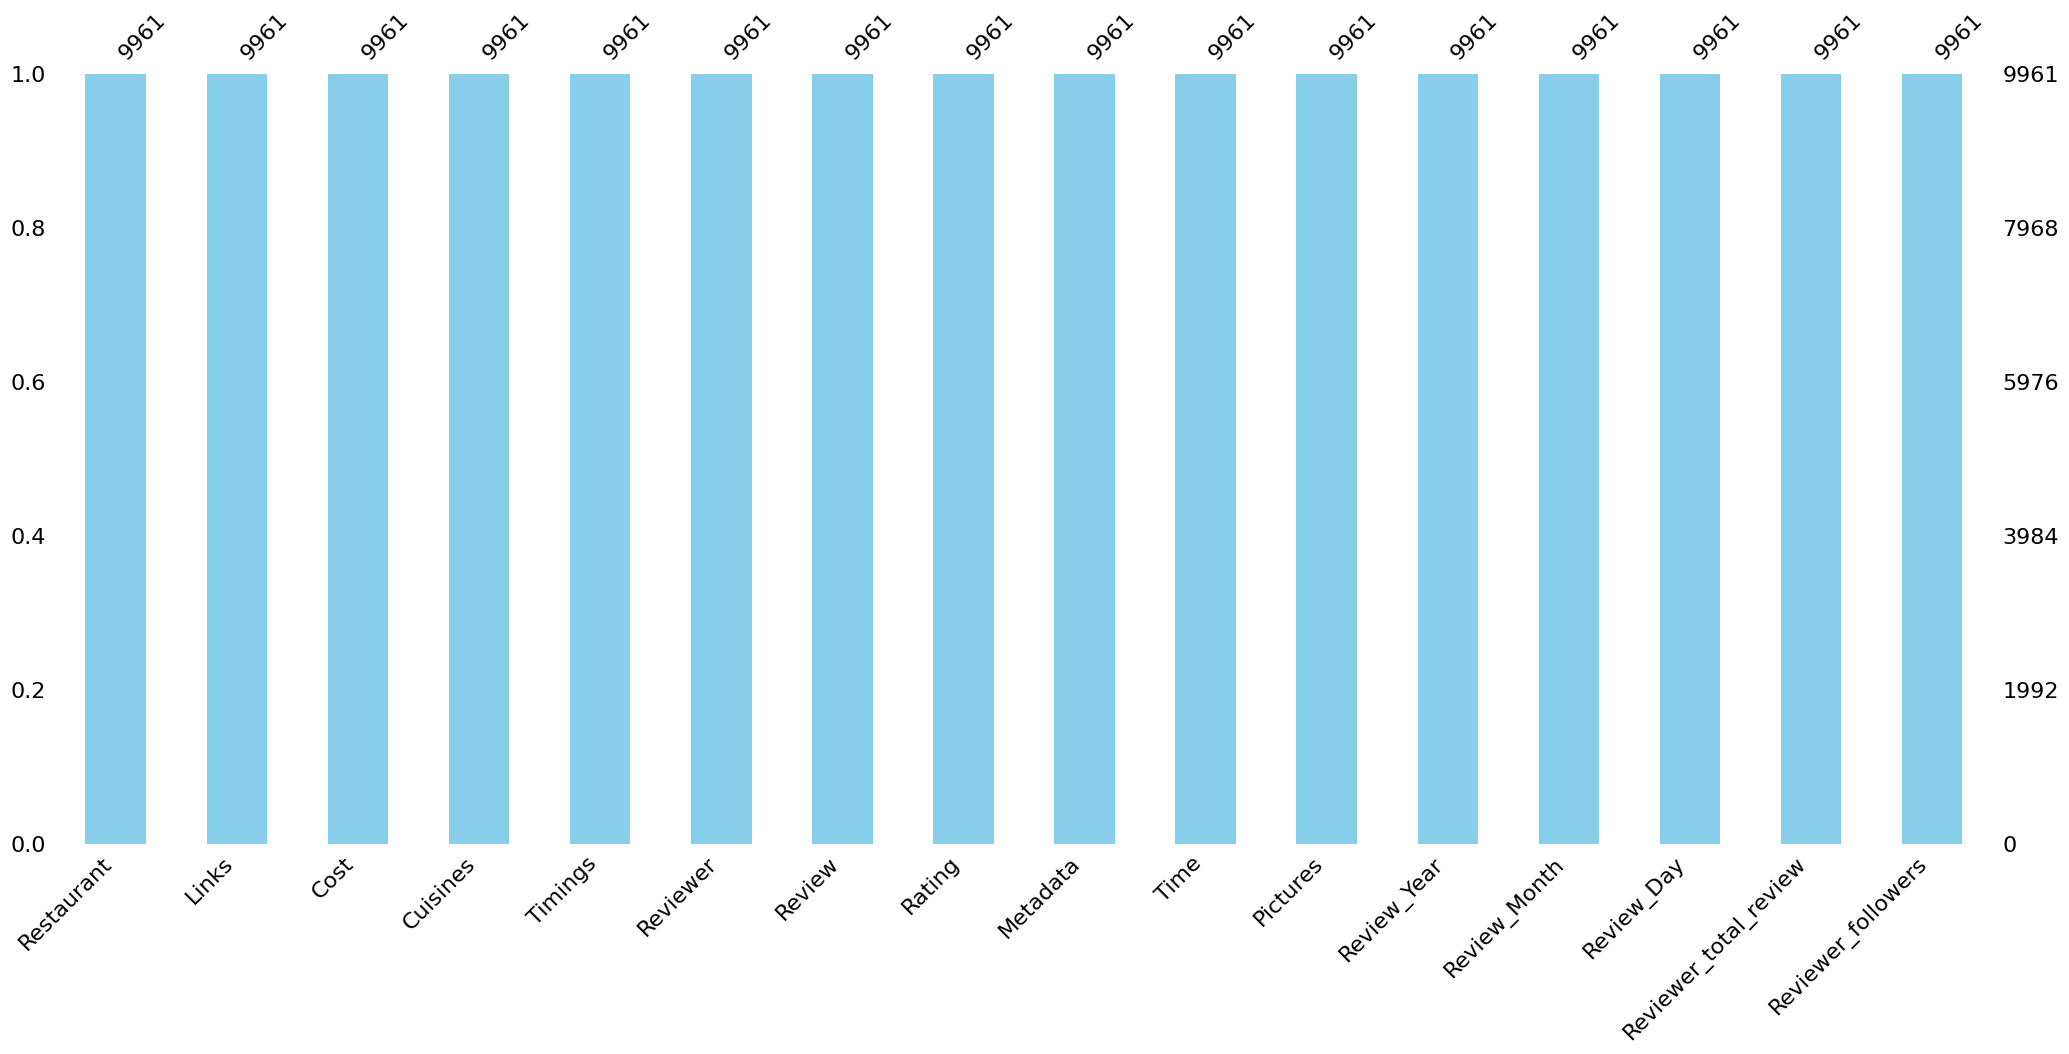

time: 7.12 s (started: 2023-08-03 11:32:09 +00:00)


In [1116]:
# Check the null value and plot the missing number
missing_func(df_inner)

We have to decide the two type of the columns list one list have contain the object datatype of the feature and other contain the numerical datatype feature.

In [1117]:
# Create list of columns
object_features = [i for i in df_inner.columns if df_inner[i].dtypes == 'object']
numerical_features = [i for i in df_inner.columns if i not in object_features]
print(object_features)
print(numerical_features)

['Restaurant', 'Links', 'Cuisines', 'Timings', 'Reviewer', 'Review', 'Metadata', 'Time']
['Cost', 'Rating', 'Pictures', 'Review_Year', 'Review_Month', 'Review_Day', 'Reviewer_total_review', 'Reviewer_followers']
time: 22.4 ms (started: 2023-08-03 11:32:16 +00:00)


In [1118]:
# Check the total number of different type of the data present in the features
for i in df_inner.columns:
  print(f'Total number of unique value in {i} is {df_inner[i].nunique()}.')

Total number of unique value in Restaurant is 100.
Total number of unique value in Links is 100.
Total number of unique value in Cost is 28.
Total number of unique value in Cuisines is 89.
Total number of unique value in Timings is 74.
Total number of unique value in Reviewer is 7446.
Total number of unique value in Review is 9364.
Total number of unique value in Rating is 9.
Total number of unique value in Metadata is 2477.
Total number of unique value in Time is 9781.
Total number of unique value in Pictures is 36.
Total number of unique value in Review_Year is 4.
Total number of unique value in Review_Month is 12.
Total number of unique value in Review_Day is 31.
Total number of unique value in Reviewer_total_review is 234.
Total number of unique value in Reviewer_followers is 751.
time: 106 ms (started: 2023-08-03 11:32:16 +00:00)


#### **Outliers Detection**

We have to check that outliers in the numerical features

In [1119]:
# function of the outliers detection
def outliers_detection(df):
  df = sorted(df)
  q1 = np.percentile(df,25)
  q3 = np.percentile(df,75)
  print(f'Q1 : {q1} \n Q3 : {q3}')
  iqr = q3 - q1
  print(f'Inter Quartile Range : {iqr}')
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  print(f'Lower Bound : {lower_bound} \n Upper Bound : {upper_bound}')
  outliers = [i for i in df if i < lower_bound or i > upper_bound]
  print('Length of the otliers :',len(outliers))
  percentage_of_outliers = (100*(len(outliers))/len(df))
  print(f'Percentage of outliers : {round(percentage_of_outliers,2)}%')


time: 3.54 ms (started: 2023-08-03 11:32:16 +00:00)


In [1120]:
# Find the outliers in the numerical features of the dataframe
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 200
Percentage of outliers : 2.01%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 1983
Percentage of outliers : 19.91%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 43
Percentage of outliers : 0.43%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0


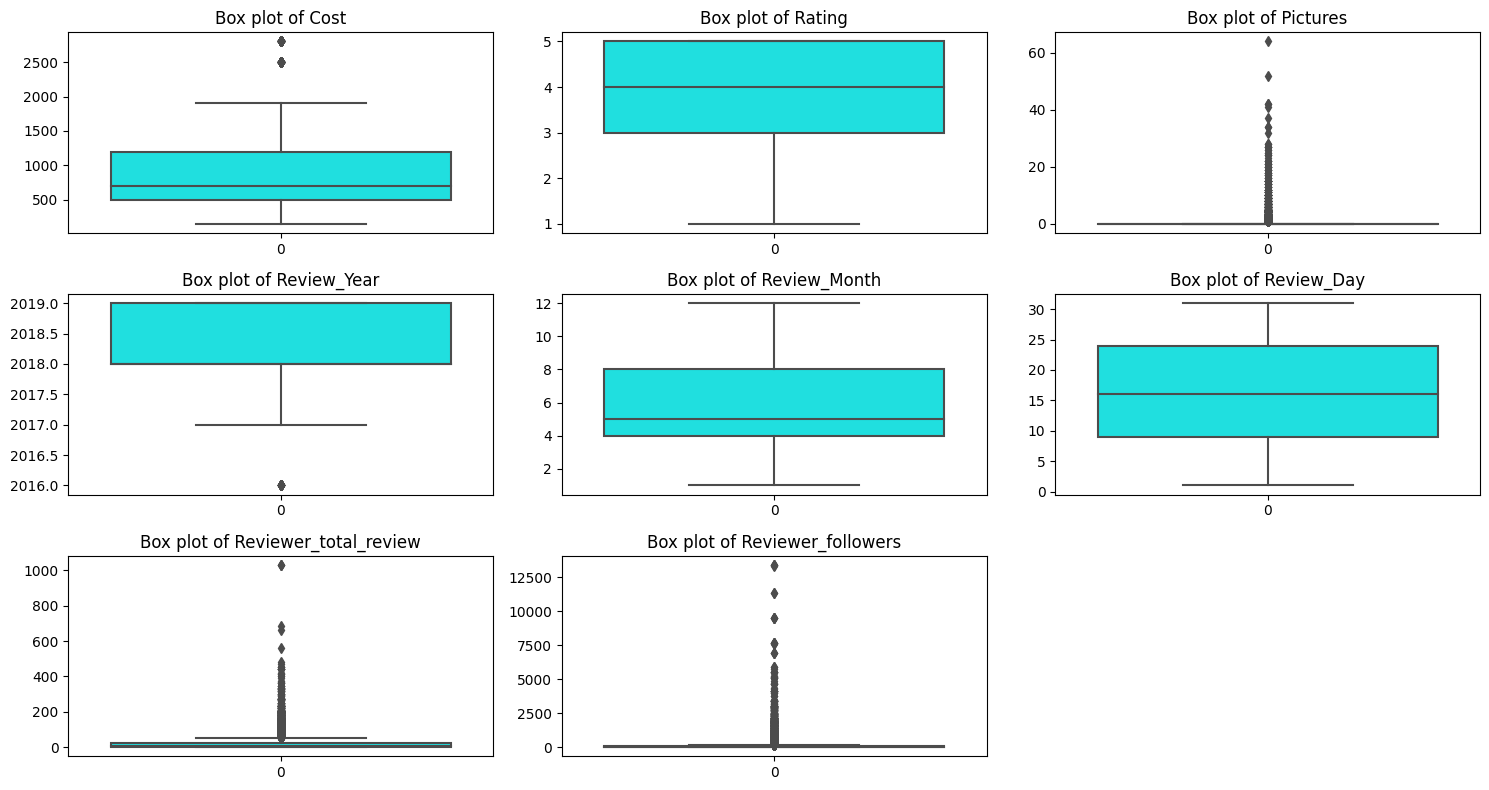

time: 5.83 s (started: 2023-08-03 11:32:17 +00:00)


In [1121]:
# Boxplot of the numerical feature to visualize the outliers
plt.figure(figsize= (15,8))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/3 + 1),3,num+1)
  sns.boxplot(df_inner[col],color = 'cyan').set(title= f'Box plot of {col}')
  plt.tight_layout()


### What all manipulations have you done and insights you found?

* We have to convert **Cost** string type to int datatype feature in Restaurant datatype.
* We have to manupulate new feature like **Review_Year**, **Review_Month**, and **Review_Day** from date feature from review dataset.
* We have to manupulate new feature like **Reviewer_total_review** and **Reviewer_follower** from metadata in review datatype.
* In restaurant dataset collections having more than 50% null value so we drop it from dataset and fill the null value with mode value in time feature.
* In review dataet:

     1.   We have to fill null value in **Review** feature with **no_review** and **Review_followers** with **0** from the dataset.
     2.   We have to fill the null value with it's feature mode value of the following feature, Rating, Metadata, Time, Review_Year, Review_Month, Review_Day, Review_total_review.


* **Merging Dataset :**  We have to merge Restaurant and Review dataset, So we have to wondering to use the best join for the good result & we got to know with our R&D that inner join gives the same shape of the dataset with no **NULL** values then we decide to **inner join**. We can't comperise the quantity and quality of our dataset in order to get best accuracy of the **Mechine Learning** model.


* **Outliers :** On the above code, we have to found that percentace of outliers on the following features:
   1. Percentage of outliers present in the **Cost** feature : 2.01%
   2. Percentage of outliers present in the **Picture** feature : 19.91%
   3. Percentage of outliers present in the **Review_Year** feature : 0.43%
   4. Percentage of outliers present in the **Reviewer_total_Review** feature: 14.02%
   5. Percentage of outliers present in the **Reviewer_follower** feature : 15.84%


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In order to visualize each chart properly we will do data visualization in a structured way following ' UBM ' rule:

*   Univariate Analysis
*   Bivariate Analysis

*   Multivariate Analysis

### **Univariate Analysis**

#### Chart - 1

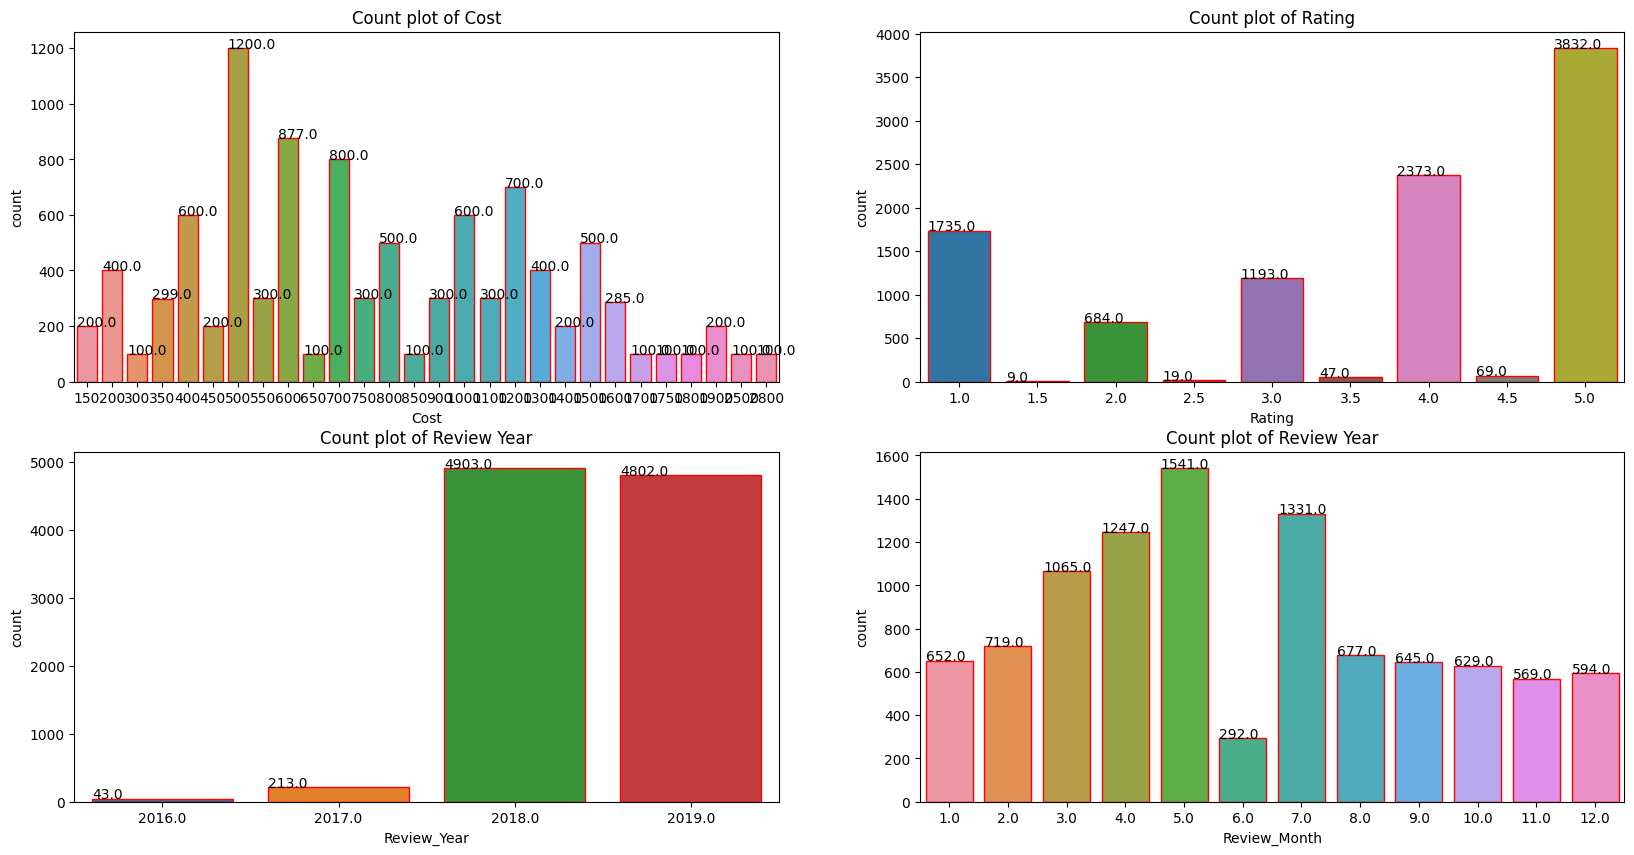

time: 2.72 s (started: 2023-08-03 05:11:22 +00:00)


In [ ]:
# Chart - 1 visualization code
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
ax = sns.countplot(x = 'Cost', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Cost')

plt.subplot(2,2,2)
ax = sns.countplot(x = 'Rating', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Rating')

plt.subplot(2,2,3)
ax = sns.countplot(x = 'Review_Year', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')

plt.subplot(2,2,4)
ax = sns.countplot(x = 'Review_Month', data = df_inner,edgecolor = 'red')
for p in ax.patches:
  ax.annotate(str(p.get_height()),(p.get_x(),p.get_height()))
plt.title ('Count plot of Review Year')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

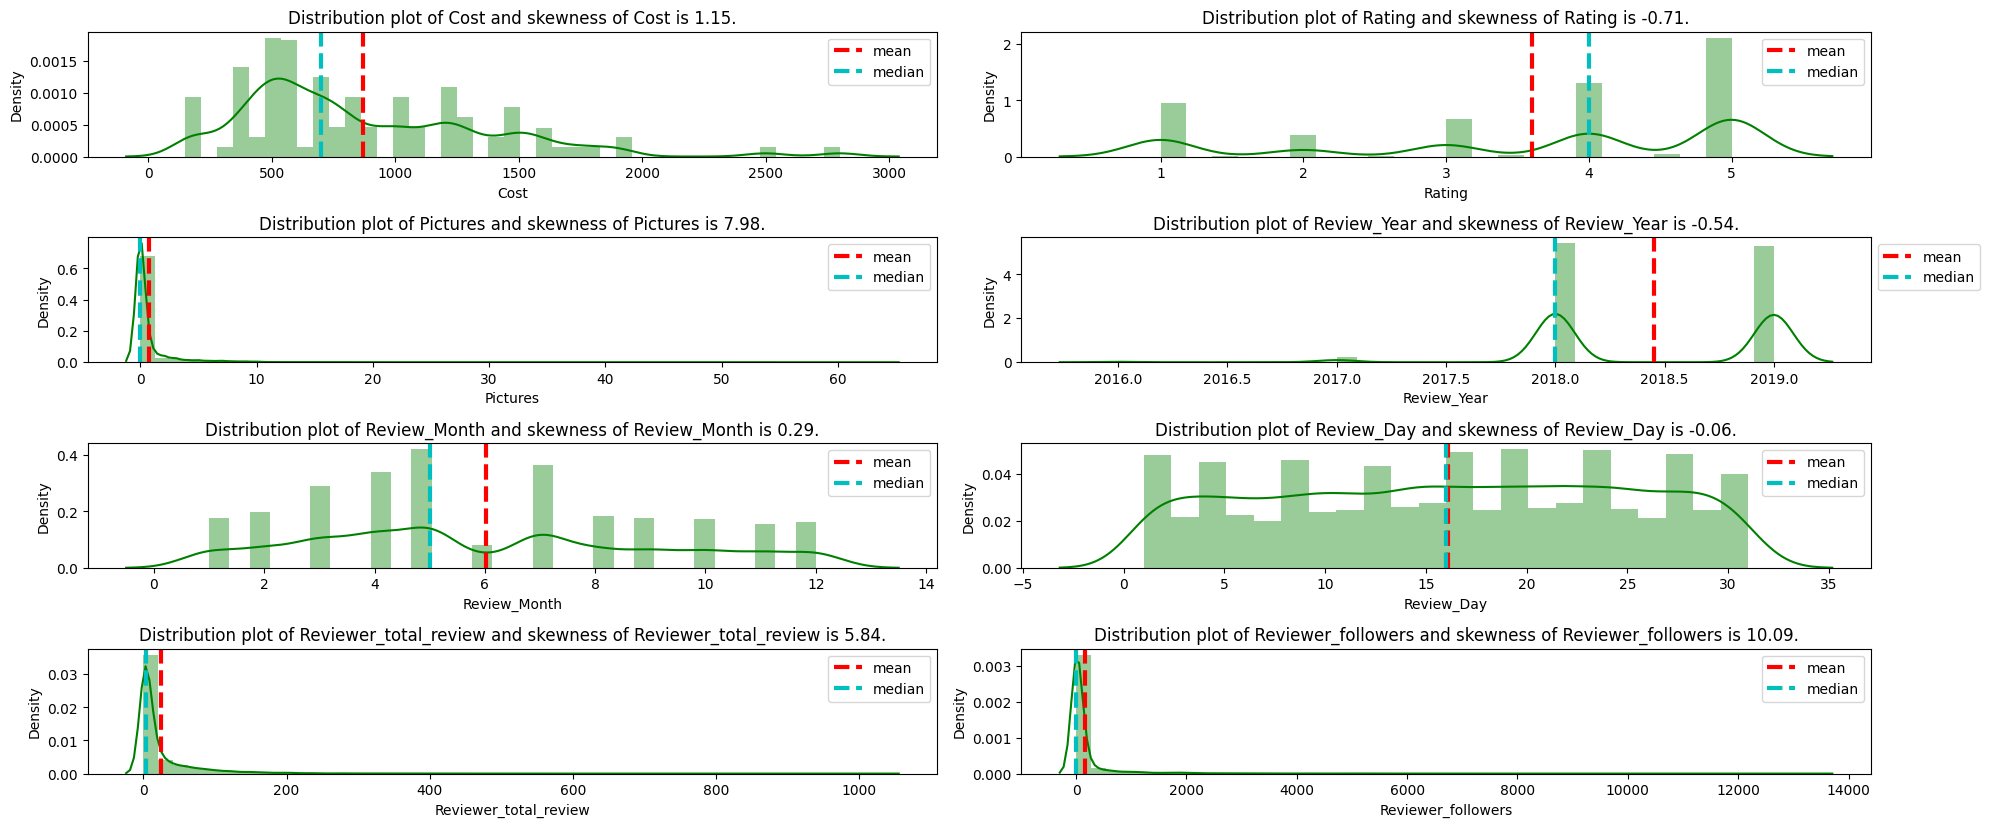

time: 13.4 s (started: 2023-08-03 05:11:25 +00:00)


In [ ]:
# Chart - 2 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  plot = sns.distplot(df_inner[i],color = 'g').set(title= f'Distribution plot of {i} and skewness of {i} is {round(df_inner[i].skew(),2)}.')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

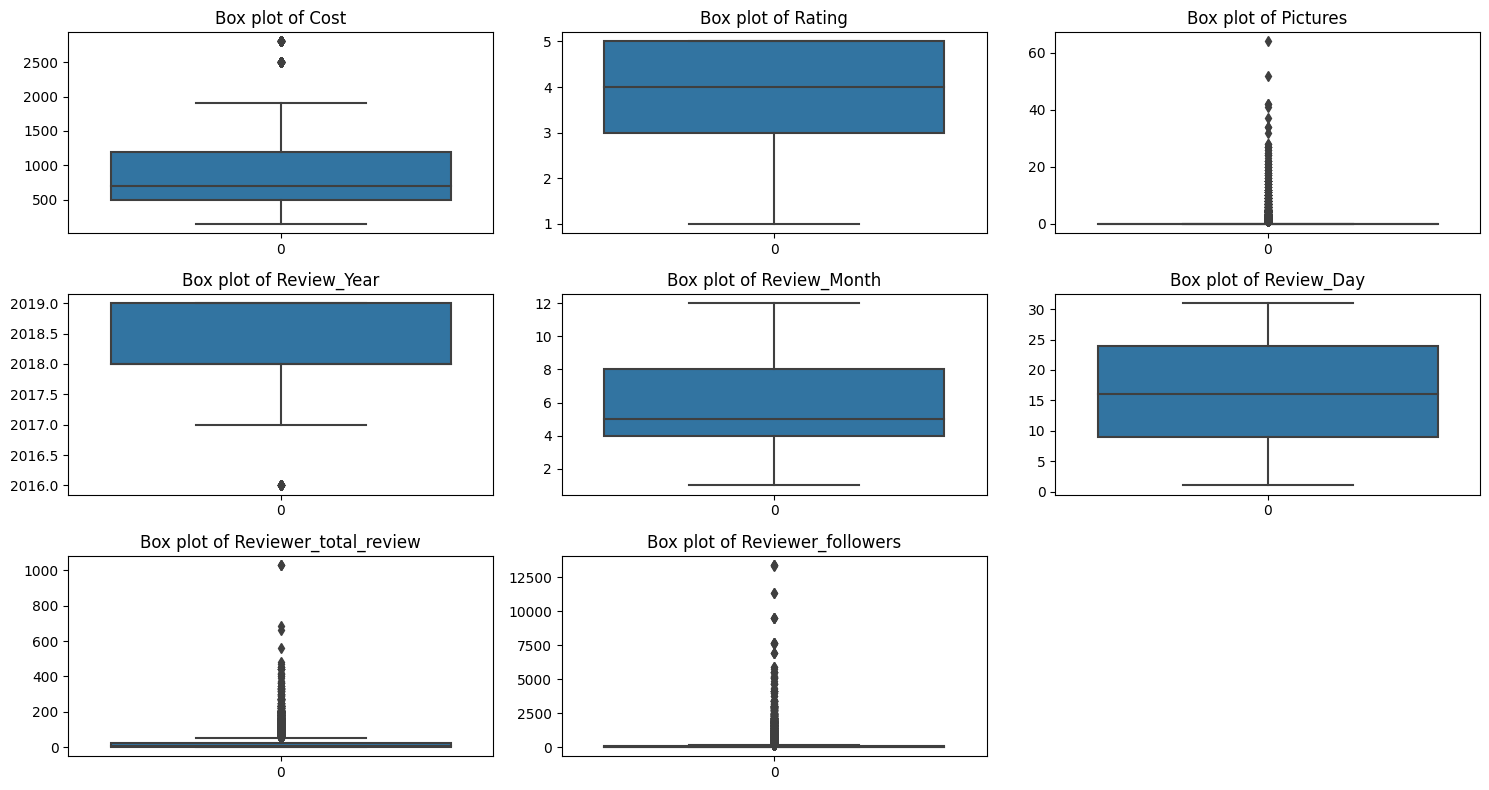

time: 4.5 s (started: 2023-08-03 05:11:39 +00:00)


In [ ]:
# Chart - 3 visualization code
plt.figure(figsize= (15,8))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/3 + 1),3,num+1)
  sns.boxplot(df_inner[col]).set(title= f'Box plot of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

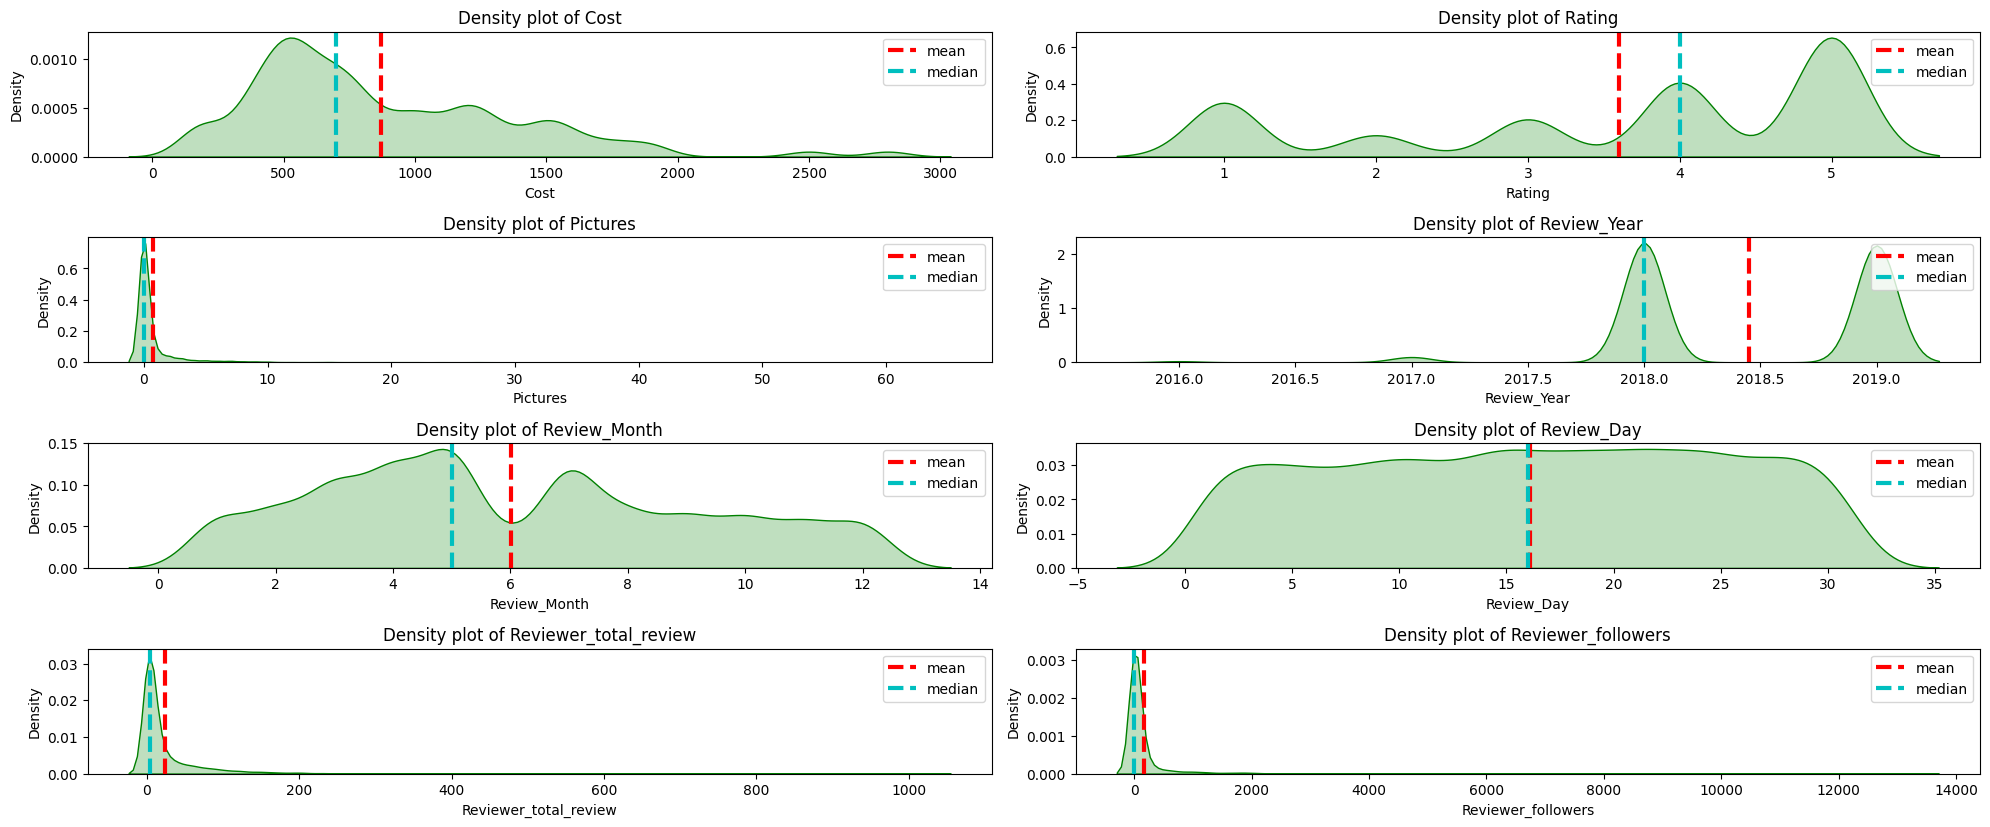

time: 10.7 s (started: 2023-08-03 05:11:43 +00:00)


In [ ]:
# Chart - 4 visualization code
plt.figure(figsize= (20,10))
for n,i in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  plot = sns.kdeplot(df_inner[i],color = 'g',shade = True).set(title= f'Density plot of {i}')
  feature = df_inner[i]
  plt.axvline(feature.mean(), color='r', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='c', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

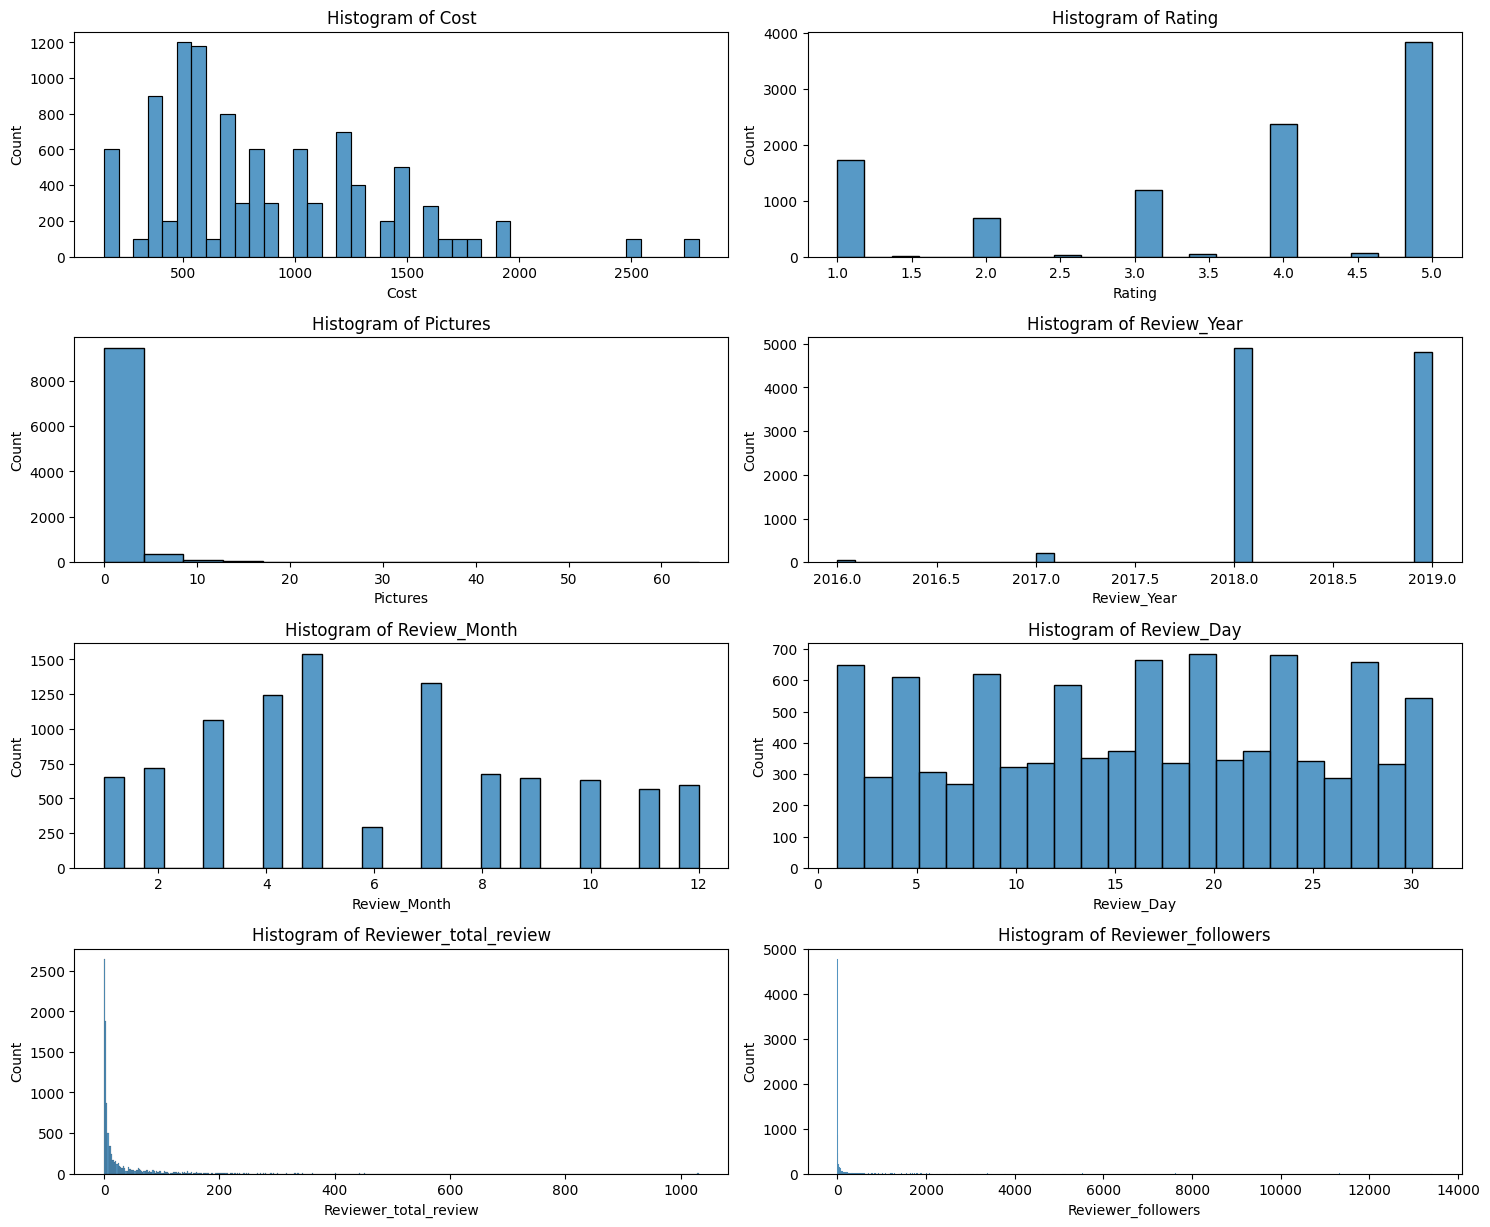

time: 15.4 s (started: 2023-08-03 05:11:54 +00:00)


In [ ]:
# Chart - 5 visualization code
plt.figure(figsize= (15,15))
for num,col in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,num + 1)
  sns.histplot(df_inner[col]).set(title= f'Histogram of {col}')
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

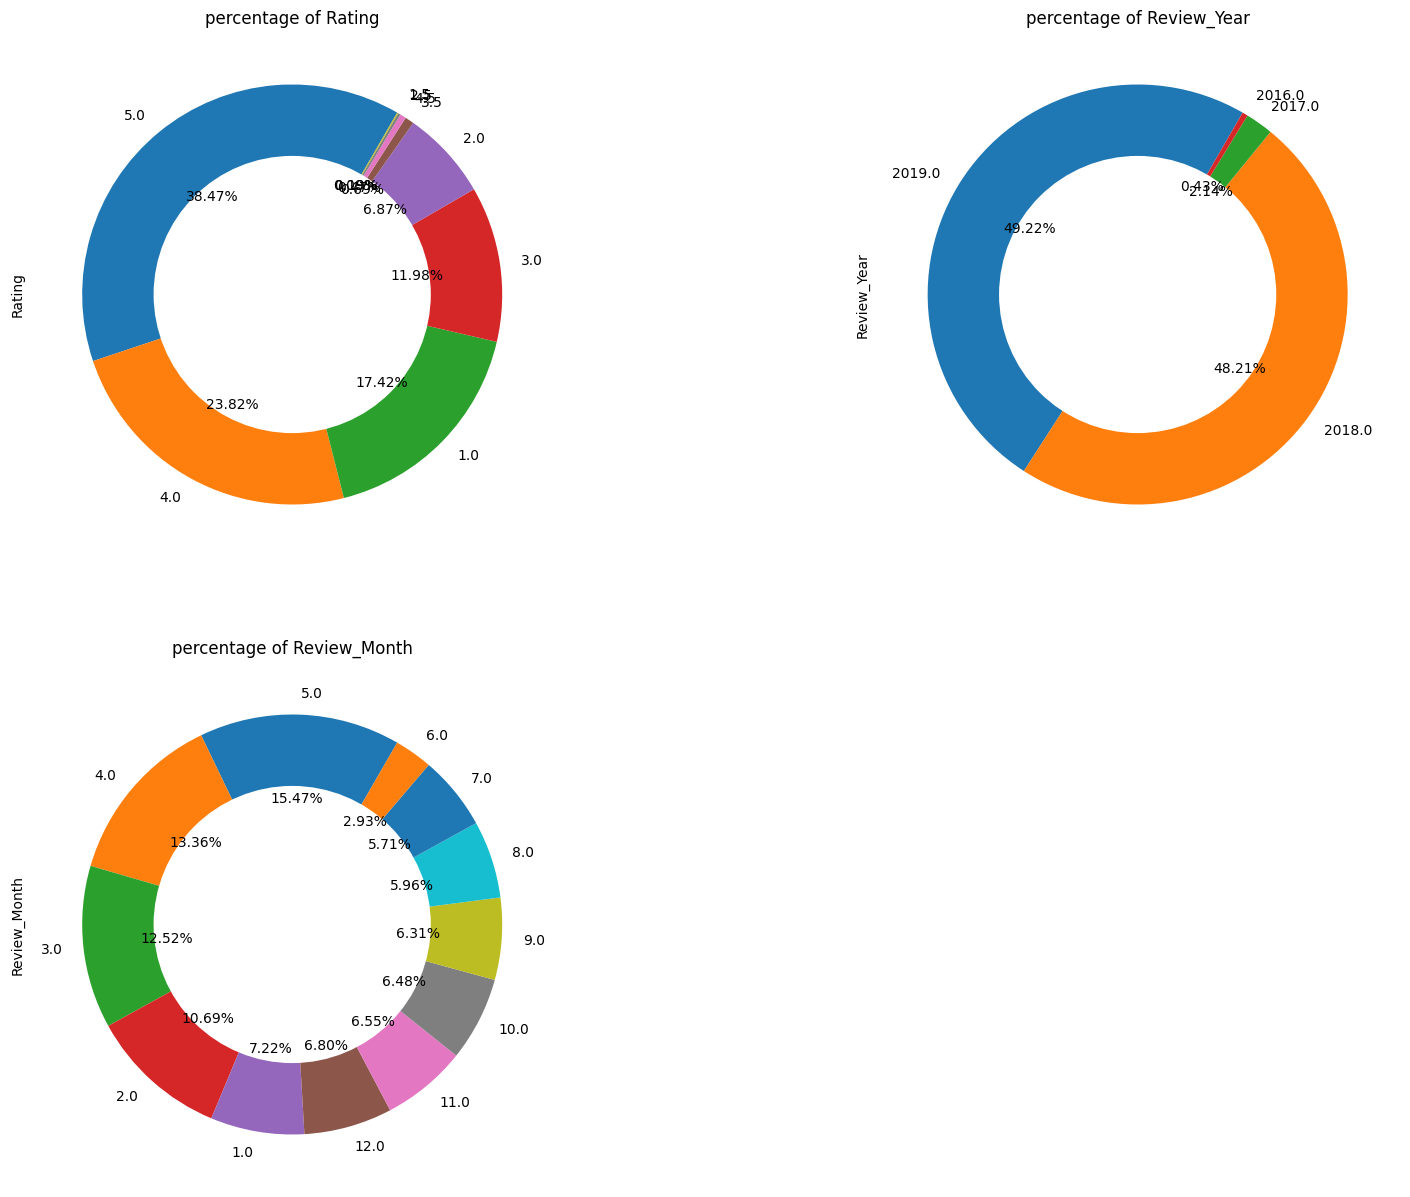

time: 1.01 s (started: 2023-08-03 05:12:09 +00:00)


In [ ]:
# Chart - 6 visualization code
col = ['Rating','Review_Year','Review_Month']
plt.figure(figsize = (20,15))
for n,i in enumerate(col):
  plt.subplot(2,2,n+1)
  df_inner[i].value_counts().plot(kind='pie',
                               autopct="%1.2f%%",
                               startangle= 60,
                               shadow=False,
                               labels=df_inner[i].unique(),
                              # colors=['yellow','red'],
                               explode=[0 for i in range(len(df_inner[i].unique()))],
                               title = f'percentage of {i}'
                              )
  centre_circle = plt.Circle((0, 0), 0.66, fc='white')
  fig = plt.gcf()
  fig.gca().add_artist(centre_circle)
  plt.tight_layout

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Bivariate Analysis**

#### Chart - 7

In [ ]:
#Price point of restaurants
cost_point = df_inner.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index()

time: 10.5 ms (started: 2023-08-03 05:12:10 +00:00)


In [ ]:
#geting the top 10 hotel that show maximum engagement
most_engaged_hotel = cost_point.sort_values('Rating', ascending = False)

time: 5.03 ms (started: 2023-08-03 05:12:10 +00:00)


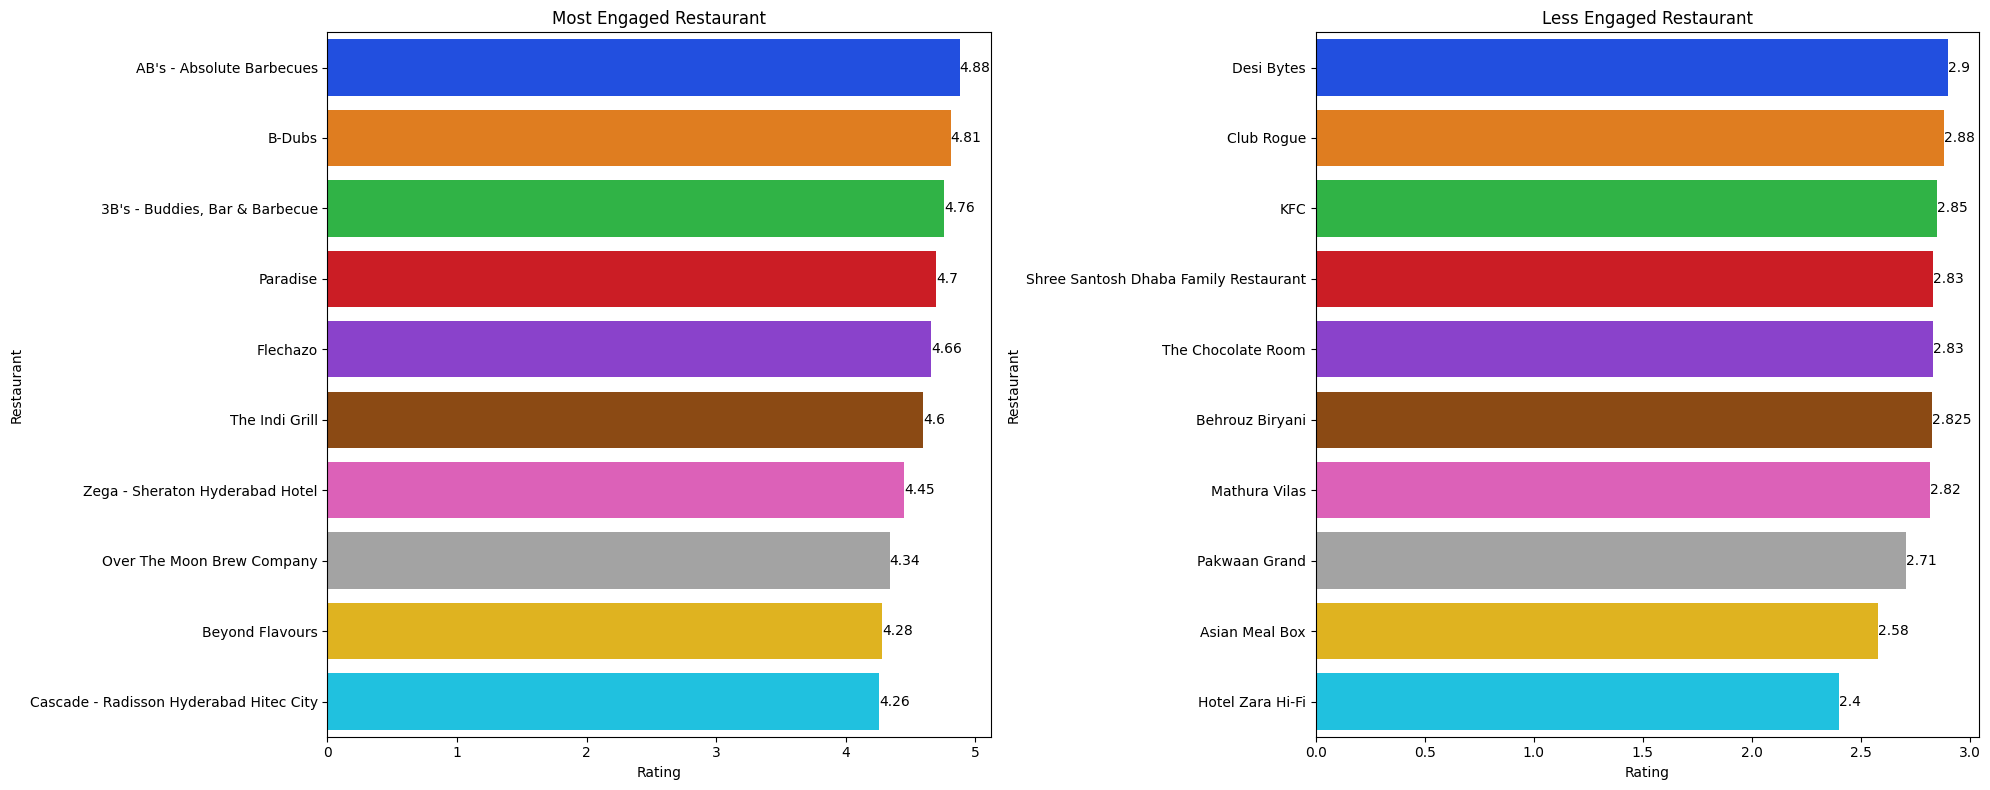

time: 1.29 s (started: 2023-08-03 05:12:10 +00:00)


In [ ]:
# Chart - 7- visualization code for most liked
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plot = sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant',palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Most Engaged Restaurant')
plt.subplot(1,2,2)
plot = sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant',palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Less Engaged Restaurant')
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Extract the restaurant name and its cost
cost_of_restaurant = df_restaurant.sort_values('Cost',ascending= False)[['Restaurant','Cost']]

time: 7.18 ms (started: 2023-08-03 05:12:12 +00:00)


In [ ]:
# Chart - 8 visualization code
plt.figure(figsize= (20,10))
plt.subplot(1,2,1)
plot = sns.barplot(x='Cost',y= 'Restaurant',data= cost_of_restaurant[:10],palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Top 10 Restaurant with High Price',size = 20)
plt.subplot(1,2,2)
plot = sns.barplot(x='Cost',y= 'Restaurant',data= cost_of_restaurant[-10:],palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Top 10 Restaurant with Low Price',size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_restaurant_rating.merge(df_restaurant[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_review'] * expected_revenue['Cost']

In [ ]:
# Chart - 9 visualization code
fig = plt.figure(figsize=[20,10])
data = expected_revenue.sort_values('Cost', ascending  = False)
plt.subplot(1,2,1)
plot = sns.barplot(data= data[:10], x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plot.bar_label(plot.containers[0])
plt.title("Top 10 Expected_Revenue from each Restaurant", size = 20)
plt.xlabel('Restaurant Name', size = 20)
plt.xticks(rotation=45)
plt.ylabel('Expected_Revenue', size = 20)
plt.subplot(1,2,2)
plot = sns.barplot(data= data[-10:], x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plot.bar_label(plot.containers[0])
plt.title("Least 10 Expected_Revenue from each Restaurant", size = 20)
plt.xlabel('Restaurant Name', size = 20)
plt.xticks(rotation=45)
plt.ylabel('Expected_Revenue', size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
most_followed_reviewer.columns

In [ ]:
# Chart - 10 visualization code
plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_total_review',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Reviewer given Maximum Review',size = 20)
plt.subplot(2,2,2)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_followers',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Most followed reviewer',size = 20)
plt.subplot(2,2,3)
plot = sns.barplot(data = most_followed_reviewer[:10], x = 'Average Rating',y = 'Reviewer', palette='bright')
plot.bar_label(plot.containers[0])
plt.title('Average Ratings given by Most followed Reviewer',size = 20)
plt.tight_layout()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code
data = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Number of Restaurant'].tolist()[:5]
labels = df_collection.sort_values('Number of Restaurant',ascending = False)['Tags'].tolist()[:5]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[:5]

#create ring chart
plt.figure(figsize = (15,12))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =20)
centre_circle = plt.Circle((0, 0), 0.66, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code pie chart for top 5 mpst selling cuisine
data = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Number of Restaurant'].tolist()[:5]
labels = df_cuisine.sort_values('Number of Restaurant', ascending = False)['Cuisine'].tolist()[:5]

#define Seaborn color palette to use
colors = sns.color_palette('bright')[4:9]

#create ring chart
plt.figure(figsize = (15,12))
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =20)
centre_circle = plt.Circle((0, 0), 0.66, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

### **Multivariate Analysis**

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(df_inner.corr(),annot = True,fmt='0.1f',annot_kws={'size':10},vmax =1,cmap= plt.cm.CMRmap)
plt.title('Correlation Heatmap for Zamato')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df_inner)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

We define the three hypothetical statements & performed the needed tests for the same:

Statement-1:

* Null Hypothesis: There is no relationship between Cost and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cost and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis


Statement-2:

* Null Hypothesis: There is no relationship between Reviewer_followers and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Reviewer_follower and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis


Statement-3:

* Null Hypothesis: There is no relationship between Cuisines and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cuisines and Rating.(H0: 𝛽1 > 0)
* Test: Chi-Squared Test.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.



* Null Hypothesis: There is no relationship between Cost and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cost and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [1122]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df_inner['Cost']
second_sample= df_inner['Rating']
stat, p_value = pearsonr(first_sample,second_sample)
print(f'Correlation between Cost & Rating: {round(stat,2)}')
print(f'P_Value : {round(p_value,2)}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Correlation between Cost & Rating: 0.14
P_Value : 0.0


Reject the Null Hypothesis


time: 32.9 ms (started: 2023-08-03 11:32:22 +00:00)


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Cost and Rating features we got Correlation coefficient as 0.14 which implies that theses two features are having weak positve correlation between them.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null Hypothesis: There is no relationship between Reviewer_followers and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Reviewer_follower and Rating.(H0: 𝛽1 > 0)
* Test: Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [1123]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import pearsonr
first_sample = df_inner['Reviewer_followers']
second_sample= df_inner['Rating']
stat, p_value = pearsonr(first_sample,second_sample)
print(f'Correlation between Reviewer_followers & Rating: {round(stat,2)}')
print(f'P_Value : {round(p_value,2)}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Correlation between Reviewer_followers & Rating: 0.04
P_Value : 0.0


Reject the Null Hypothesis


time: 19.5 ms (started: 2023-08-03 11:32:22 +00:00)


##### Which statistical test have you done to obtain P-Value?

We have used Pearson Correlation test to obtain P-Value along with Pearson Correlation coefficient value.It is a measure of linear correlation between two sets of data.

##### Why did you choose the specific statistical test?

We want to check the relationship between two features if they are positively or negatively correlated.P-value and Pearson Correlation coefficient will always have a value between -1 and 1.Here we can see that after applying test on Reviewer_followers and Rating features we got Correlation coefficient as 0.04 which implies that theses two features are having weak positve correlation between them.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


* Null Hypothesis: There is no relationship between Cuisines and Rating.(H0: 𝛽1 = 0)
* Alternate Hypothesis: There is a relationship between Cuisines and Rating.(H0: 𝛽1 > 0)
* Test: Chi-Squared Test.

#### 2. Perform an appropriate statistical test.

In [1124]:
pd.crosstab(df_inner['Cuisines'], df_inner['Rating'])

Rating                                              1.0  1.5  2.0  2.5  3.0  \
Cuisines                                                                      
American                                              1    0    1    0    2   
American, Chinese, North Indian, Kebab, South I...   18    0    4    0   14   
American, Fast Food, Salad, Burger                   10    0    4    0    6   
American, Wraps, Desserts                            14    0    7    0   19   
Andhra, Biryani, Hyderabadi, North Indian            24    0    8    0    8   
...                                                 ...  ...  ...  ...  ...   
North Indian, South Indian                           23    0    4    0    6   
Seafood, Goan, North Indian, Continental, Asian       5    0    5    0    5   
South Indian, North Indian, Chinese                  44    0   13    0   26   
Street Food, Arabian                                 36    0   12    0    7   
Street Food, North Indian, Fast Food                 24    0    6    0   15   

Rating                                              3.5  4.0  4.5  5.0  
Cuisines                                                                
American                                              0    8    0   88  
American, Chinese, North Indian, Kebab, South I...    0   24    0   40  
American, Fast Food, Salad, Burger                    0   15    0   42  
American, Wraps, Desserts                             0   27    0   33  
Andhra, Biryani, Hyderabadi, North Indian             0   17    0   43  
...                                                 ...  ...  ...  ...  
North Indian, South Indian                            0   10    0   57  
Seafood, Goan, North Indian, Continental, Asian       0   33    0   52  
South Indian, North Indian, Chinese                   0   48    0   69  
Street Food, Arabian                                  0    7    0   38  
Street Food, North Indian, Fast Food                  0   31    0   24  

[89 rows x 9 columns]

time: 156 ms (started: 2023-08-03 11:32:23 +00:00)


In [1125]:
# Perform Statistical Test to obtain P-Value
# Import liberary
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(df_inner['Cuisines'], df_inner['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)
print(f'Chi-Squqred value between Cost & Rating: {round(chi2,2)}')
print(f'P_Value : {round(p_value,2)}')
print(f'Degree of freedom : {dof}')
print(f'Expected value : {expected[0]}')
print('\n')
if p_value > 0.05:
  print('Accept the Null Hypothesis')
else:
  print('Reject the Null Hypothesis')

print('\n')

Chi-Squqred value between Cost & Rating: 3984.03
P_Value : 0.0
Degree of freedom : 704
Expected value : [17.41792993  0.09035237  6.86678044  0.1907439  11.97670917  0.47184018
 23.82290935  0.69270154 38.47003313]


Reject the Null Hypothesis


time: 57.4 ms (started: 2023-08-03 11:32:23 +00:00)


##### Which statistical test have you done to obtain P-Value?

For the third hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

 I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

missing_value  % of missing values Data_Type
Restaurant                         0                  0.0    object
Links                              0                  0.0    object
Cost                               0                  0.0     int64
Cuisines                           0                  0.0    object
Timings                            0                  0.0    object
Reviewer                           0                  0.0    object
Review                             0                  0.0    object
Rating                             0                  0.0   float64
Metadata                           0                  0.0    object
Time                               0                  0.0    object
Pictures                           0                  0.0     int64
Review_Year                        0                  0.0   float64
Review_Month                       0                  0.0   float64
Review_Day                         0                  0.0   float64
Reviewer_total_review              0                  0.0   float64
Reviewer_followers                 0                  0.0   float64

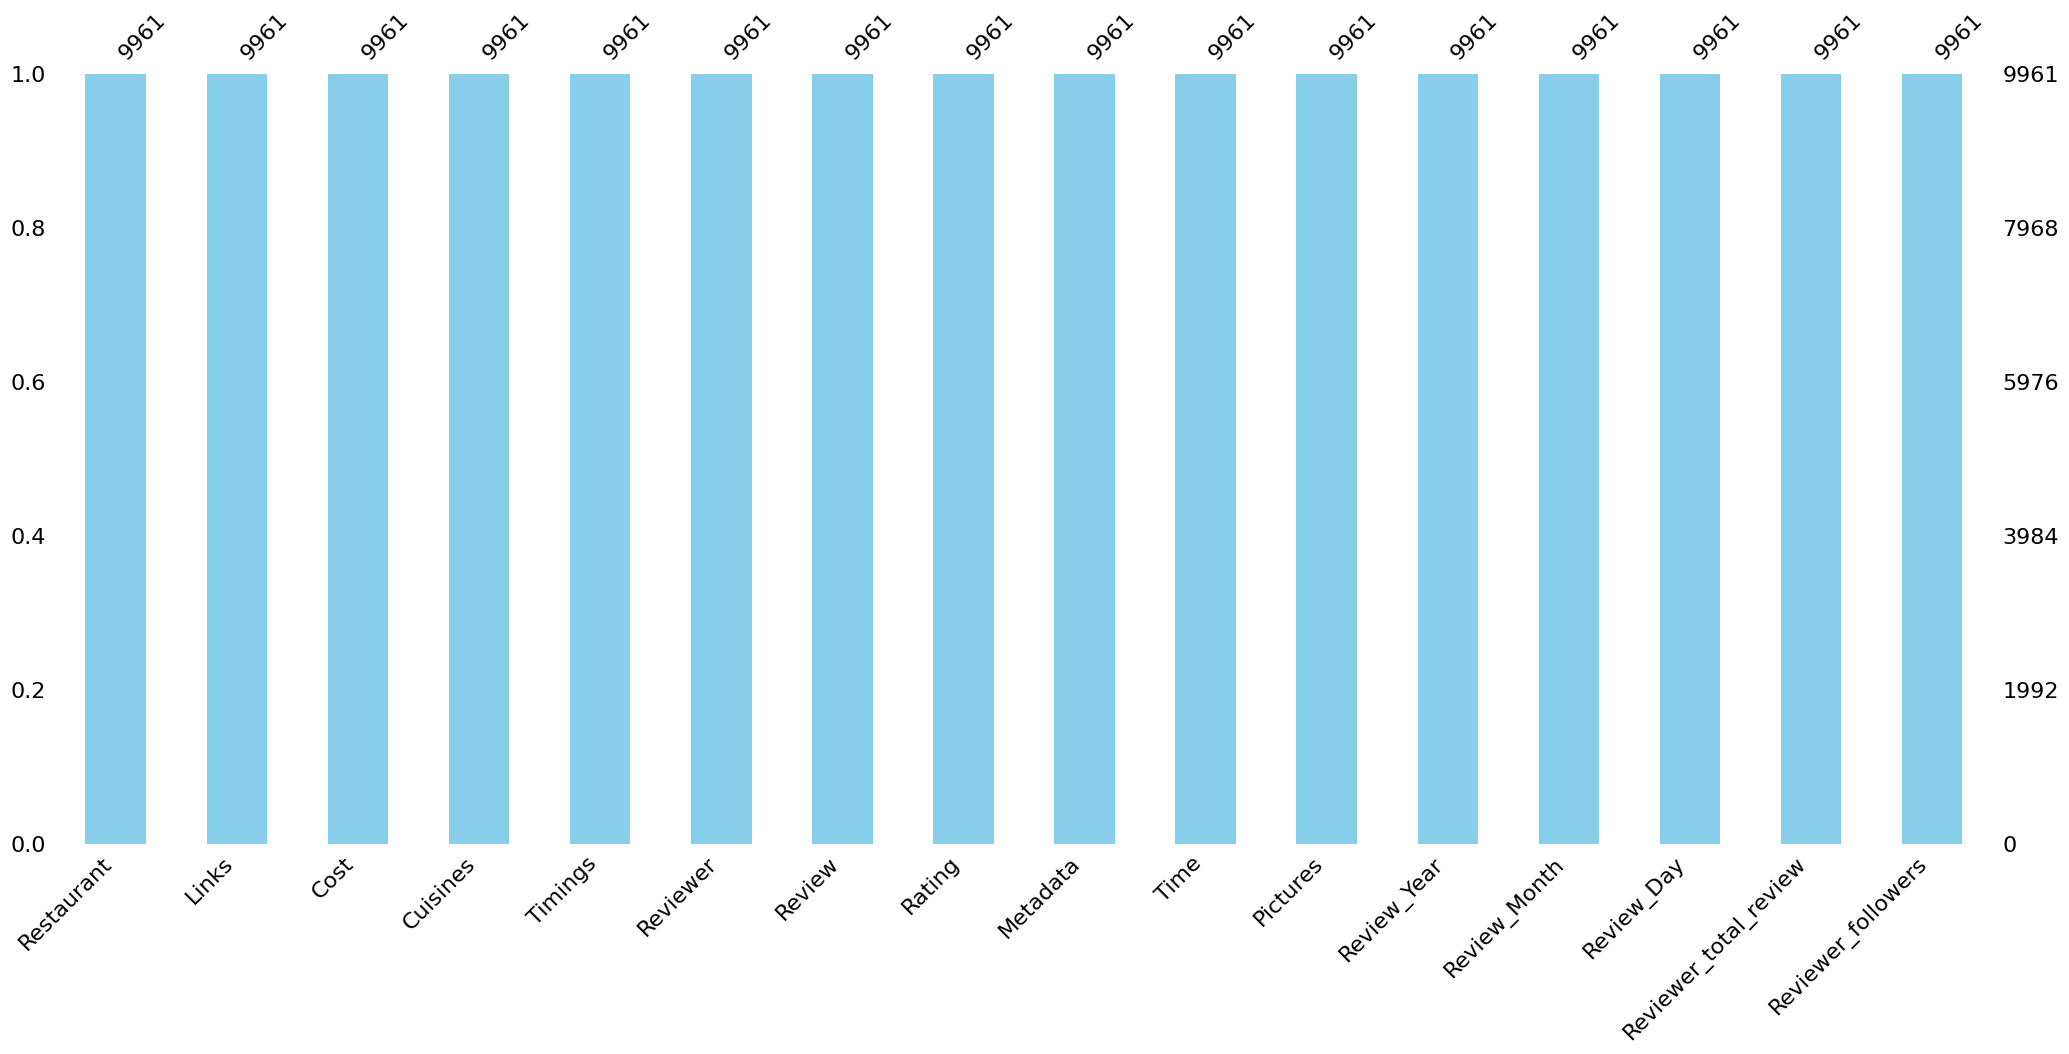

time: 4.02 s (started: 2023-08-03 11:32:23 +00:00)


In [1126]:
# Handling Missing Values & Missing Value Imputation
missing_func(df_inner)

#### What all missing value imputation techniques have you used and why did you use those techniques?

As we have already treated null values so we do not have any more missing/null/duplicate values in our dataset and our dataset is good to go. In this dataset there is no null value preset in the dataset so there is no any method used to fill the NULL value.

### 2. Handling Outliers

#### **Anmoly Detection**

In [1127]:
#Anamoly detection
# Import Isolation Forest liberary
from sklearn.ensemble import IsolationForest
#checking for normal distribution
def normal_distribution(df):
  numerical_features = [i for i in df.columns if df[i].dtypes != 'object']
  for i in numerical_features:
    print(f'Skewness of {i} : {round(df[i].skew(),2)}')
    print(f'Kurtosis of {i} : {round(df[i].kurt(),2)}')
    print('\n')


time: 12.6 ms (started: 2023-08-03 11:32:27 +00:00)


In [1128]:
# Check the normal distribution of dataset
normal_distribution(df_inner)

Skewness of Cost : 1.15
Kurtosis of Cost : 1.57


Skewness of Rating : -0.71
Kurtosis of Rating : -0.95


Skewness of Pictures : 7.98
Kurtosis of Pictures : 105.55


Skewness of Review_Year : -0.54
Kurtosis of Review_Year : 0.15


Skewness of Review_Month : 0.29
Kurtosis of Review_Month : -0.94


Skewness of Review_Day : -0.06
Kurtosis of Review_Day : -1.16


Skewness of Reviewer_total_review : 5.84
Kurtosis of Reviewer_total_review : 67.22


Skewness of Reviewer_followers : 10.09
Kurtosis of Reviewer_followers : 151.31


time: 51.4 ms (started: 2023-08-03 11:32:27 +00:00)


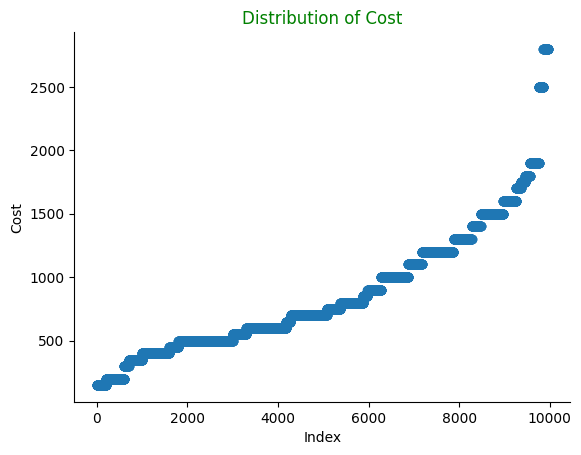

time: 1.35 s (started: 2023-08-03 11:32:27 +00:00)


In [1129]:
# Ploting of the Cost
plt.scatter(range(df_inner.shape[0]), np.sort(df_inner['Cost'].values))
plt.xlabel('Index')
plt.ylabel('Cost')
plt.title('Distribution of Cost',color = 'green')
sns.despine()

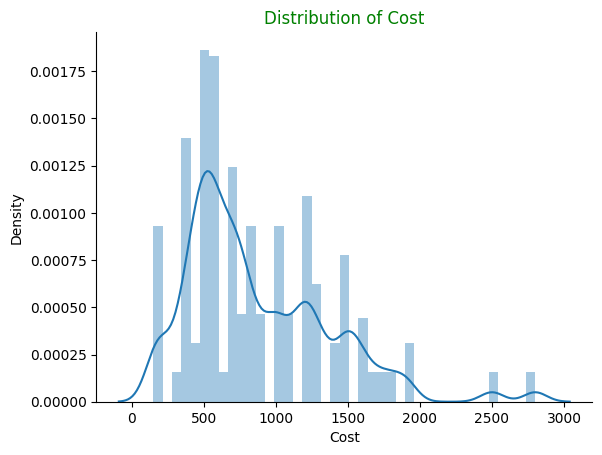

time: 2.08 s (started: 2023-08-03 11:32:29 +00:00)


In [1130]:
# Distribution plot of Cost
sns.distplot(df_inner['Cost'])
plt.title('Distribution of Cost',color = 'green')
sns.despine()

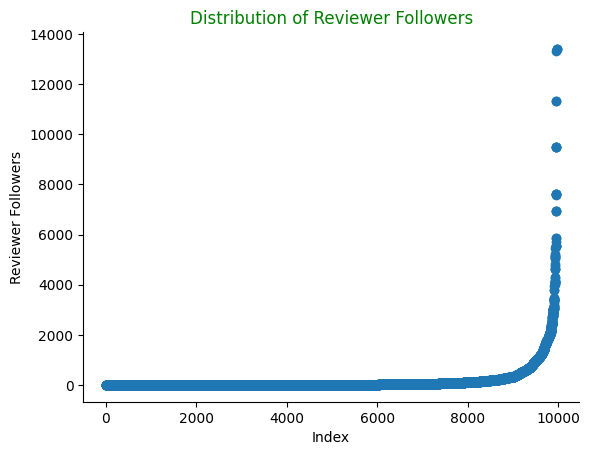

time: 1.39 s (started: 2023-08-03 11:32:31 +00:00)


In [1131]:
# Ploting of the Reviewer_followers
plt.scatter(range(df_inner.shape[0]), np.sort(df_inner['Reviewer_followers'].values))
plt.xlabel('Index')
plt.ylabel('Reviewer Followers')
plt.title('Distribution of Reviewer Followers',color = 'green')
sns.despine()

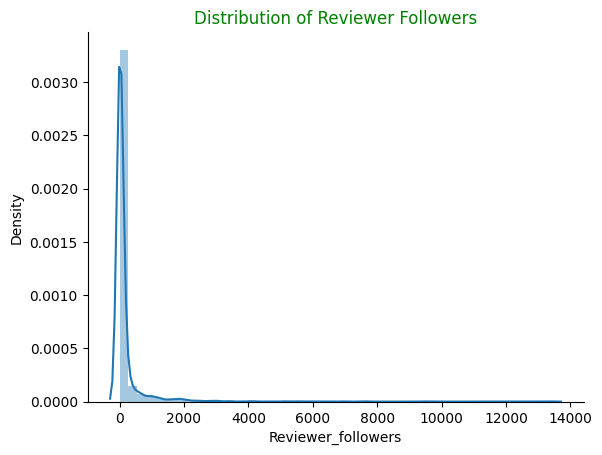

time: 1.99 s (started: 2023-08-03 11:32:32 +00:00)


In [1132]:
# Distribution plot of Reviewer Followers
sns.distplot(df_inner['Reviewer_followers'])
plt.title('Distribution of Reviewer Followers',color = 'green')
sns.despine()

In [1133]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df_inner['Cost'].values.reshape(-1, 1))
df_inner['anomaly_score_univariate_Cost'] = isolation_forest.decision_function(df_inner['Cost'].values.reshape(-1, 1))
df_inner['outlier_univariate_Cost'] = isolation_forest.predict(df_inner['Cost'].values.reshape(-1, 1))

time: 2.72 s (started: 2023-08-03 11:32:34 +00:00)


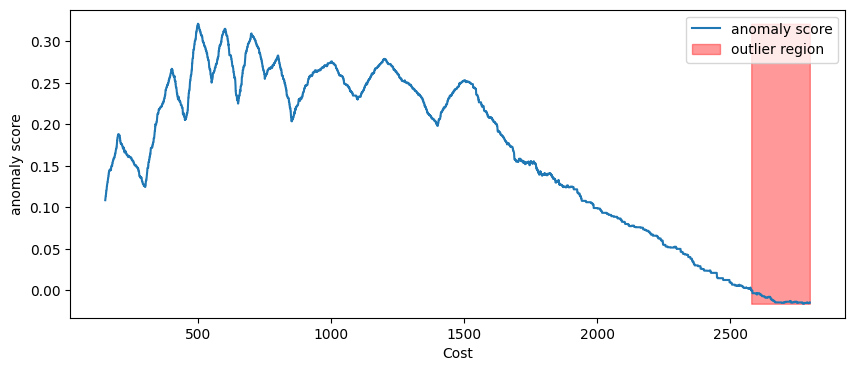

time: 1.37 s (started: 2023-08-03 11:32:37 +00:00)


In [1134]:
#chart to visualize outliers
xx = np.linspace(df_inner['Cost'].min(), df_inner['Cost'].max(), len(df_inner)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [1135]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(df_inner['Cost'].values.reshape(-1, 1))
df_inner['anomaly_score_univariate_followers'] = isolation_forest.decision_function(df_inner['Reviewer_followers'].values.reshape(-1, 1))
df_inner['outlier_univariate_followers'] = isolation_forest.predict(df_inner['Reviewer_followers'].values.reshape(-1, 1))

time: 1.67 s (started: 2023-08-03 11:32:38 +00:00)


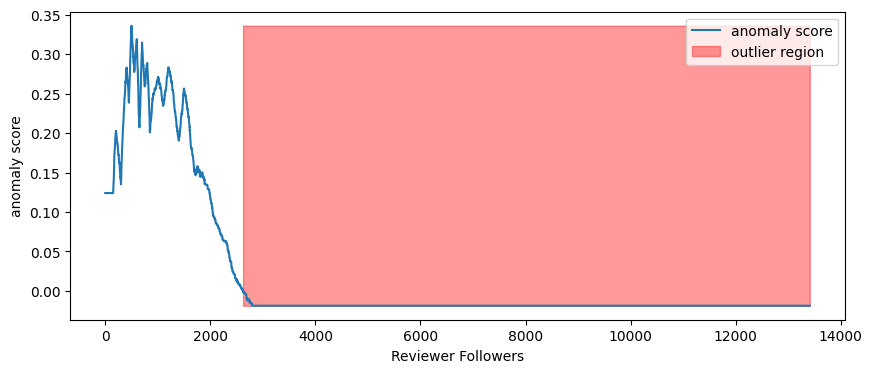

time: 1.02 s (started: 2023-08-03 11:32:40 +00:00)


In [1136]:
#chart to visualize outliers
xx = np.linspace(df_inner['Reviewer_followers'].min(), df_inner['Reviewer_followers'].max(), len(df_inner)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer Followers')
plt.show();

#### **Outliers Treatment**

In [1137]:
# Check the information of merged dataset
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Restaurant                          9961 non-null   object 
 1   Links                               9961 non-null   object 
 2   Cost                                9961 non-null   int64  
 3   Cuisines                            9961 non-null   object 
 4   Timings                             9961 non-null   object 
 5   Reviewer                            9961 non-null   object 
 6   Review                              9961 non-null   object 
 7   Rating                              9961 non-null   float64
 8   Metadata                            9961 non-null   object 
 9   Time                                9961 non-null   object 
 10  Pictures                            9961 non-null   int64  
 11  Review_Year                         9961 no

On the basis of the dataset info we can split the data into two parts:
* Object_features : Columns having containg the object datatype.
* Numerical_features : Columns having containing the int and float datatype.

In [1138]:
# List of columns having contain the object data type
object_features

['Restaurant',
 'Links',
 'Cuisines',
 'Timings',
 'Reviewer',
 'Review',
 'Metadata',
 'Time']

time: 13.8 ms (started: 2023-08-03 11:32:41 +00:00)


In [1139]:
# List of columns having numerical data type
numerical_features

['Cost',
 'Rating',
 'Pictures',
 'Review_Year',
 'Review_Month',
 'Review_Day',
 'Reviewer_total_review',
 'Reviewer_followers']

time: 10.5 ms (started: 2023-08-03 11:32:41 +00:00)


* In object features, there are no outliers are present in any features.
* Hence we have to treated outliers only continuous features.

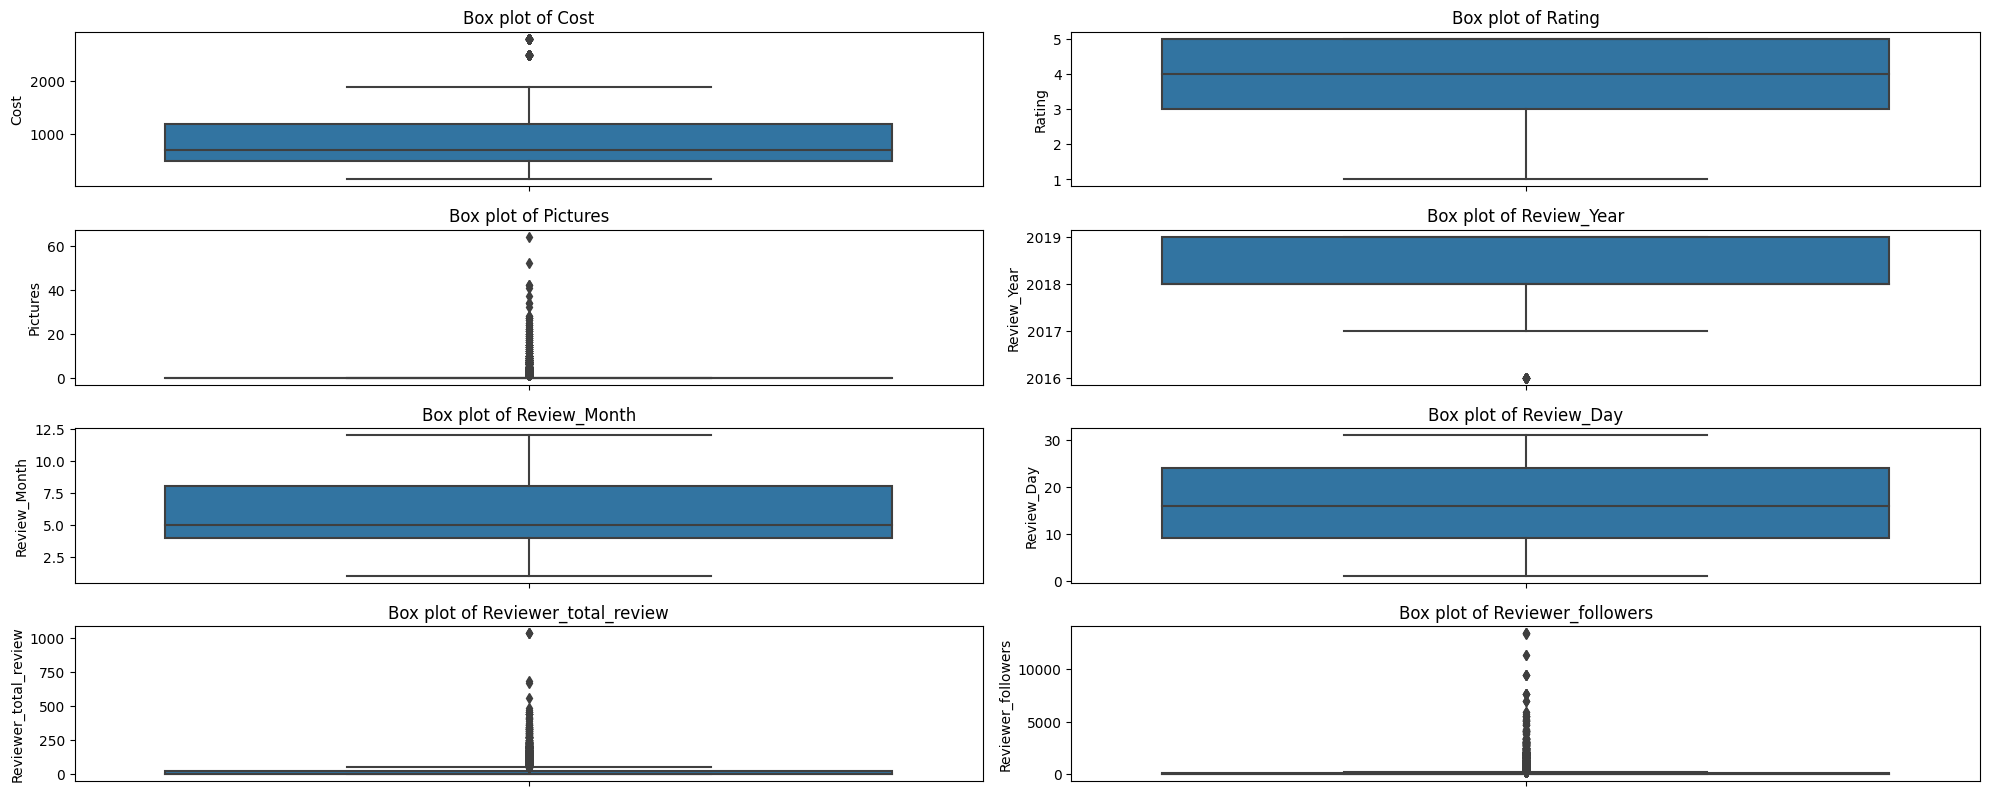

time: 3.83 s (started: 2023-08-03 11:32:41 +00:00)


In [1140]:
# To cheack the outliers using boxplot
plt.figure(figsize= (20,10))
for n, c in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  sns.boxplot(y= c ,data= df_inner)
  plt.title(f'Box plot of {c}')
  plt.tight_layout()

In [1141]:
# Detect the outliers present in the dataset
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 200
Percentage of outliers : 2.01%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 1983
Percentage of outliers : 19.91%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 43
Percentage of outliers : 0.43%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0


In [1142]:
# Outlier treatments
def outliers_treatment(df):
  # Calculation of first and third percentile
  q1 = np.percentile(df,25)
  q3 = np.percentile(df,75)
  # Defining the inter quartile range(IQR)
  iqr = q3 - q1
  lower_bound = q1 - 1.5*iqr
  upper_bound = q3 + 1.5*iqr
  # Treated the outliers
  treated_data = []
  for i in df:
    if i < lower_bound:
      treated_data.append(q1)
    elif i > upper_bound:
      treated_data.append(q3)
    else:
      treated_data.append(i)
  return treated_data

time: 1.25 ms (started: 2023-08-03 11:32:45 +00:00)


In [1143]:
#Passing all the feature one by one from the list of continous_value_feature in our above defined function for outlier treatment
for feature in numerical_features:
  df_inner[feature] = outliers_treatment(df_inner[feature])

time: 123 ms (started: 2023-08-03 11:32:45 +00:00)


In [1144]:
# Detect the outliers present in the dataset
for i in numerical_features:
  print(i)
  outliers_detection(df_inner[i])
  print('\n')

Cost
Q1 : 500.0 
 Q3 : 1200.0
Inter Quartile Range : 700.0
Lower Bound : -550.0 
 Upper Bound : 2250.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Rating
Q1 : 3.0 
 Q3 : 5.0
Inter Quartile Range : 2.0
Lower Bound : 0.0 
 Upper Bound : 8.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Pictures
Q1 : 0.0 
 Q3 : 0.0
Inter Quartile Range : 0.0
Lower Bound : 0.0 
 Upper Bound : 0.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Year
Q1 : 2018.0 
 Q3 : 2019.0
Inter Quartile Range : 1.0
Lower Bound : 2016.5 
 Upper Bound : 2020.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Month
Q1 : 4.0 
 Q3 : 8.0
Inter Quartile Range : 4.0
Lower Bound : -2.0 
 Upper Bound : 14.0
Length of the otliers : 0
Percentage of outliers : 0.0%


Review_Day
Q1 : 9.0 
 Q3 : 24.0
Inter Quartile Range : 15.0
Lower Bound : -13.5 
 Upper Bound : 46.5
Length of the otliers : 0
Percentage of outliers : 0.0%


Reviewer_total_review
Q1 : 1.0 
 Q3 : 22.0
Inter Quar

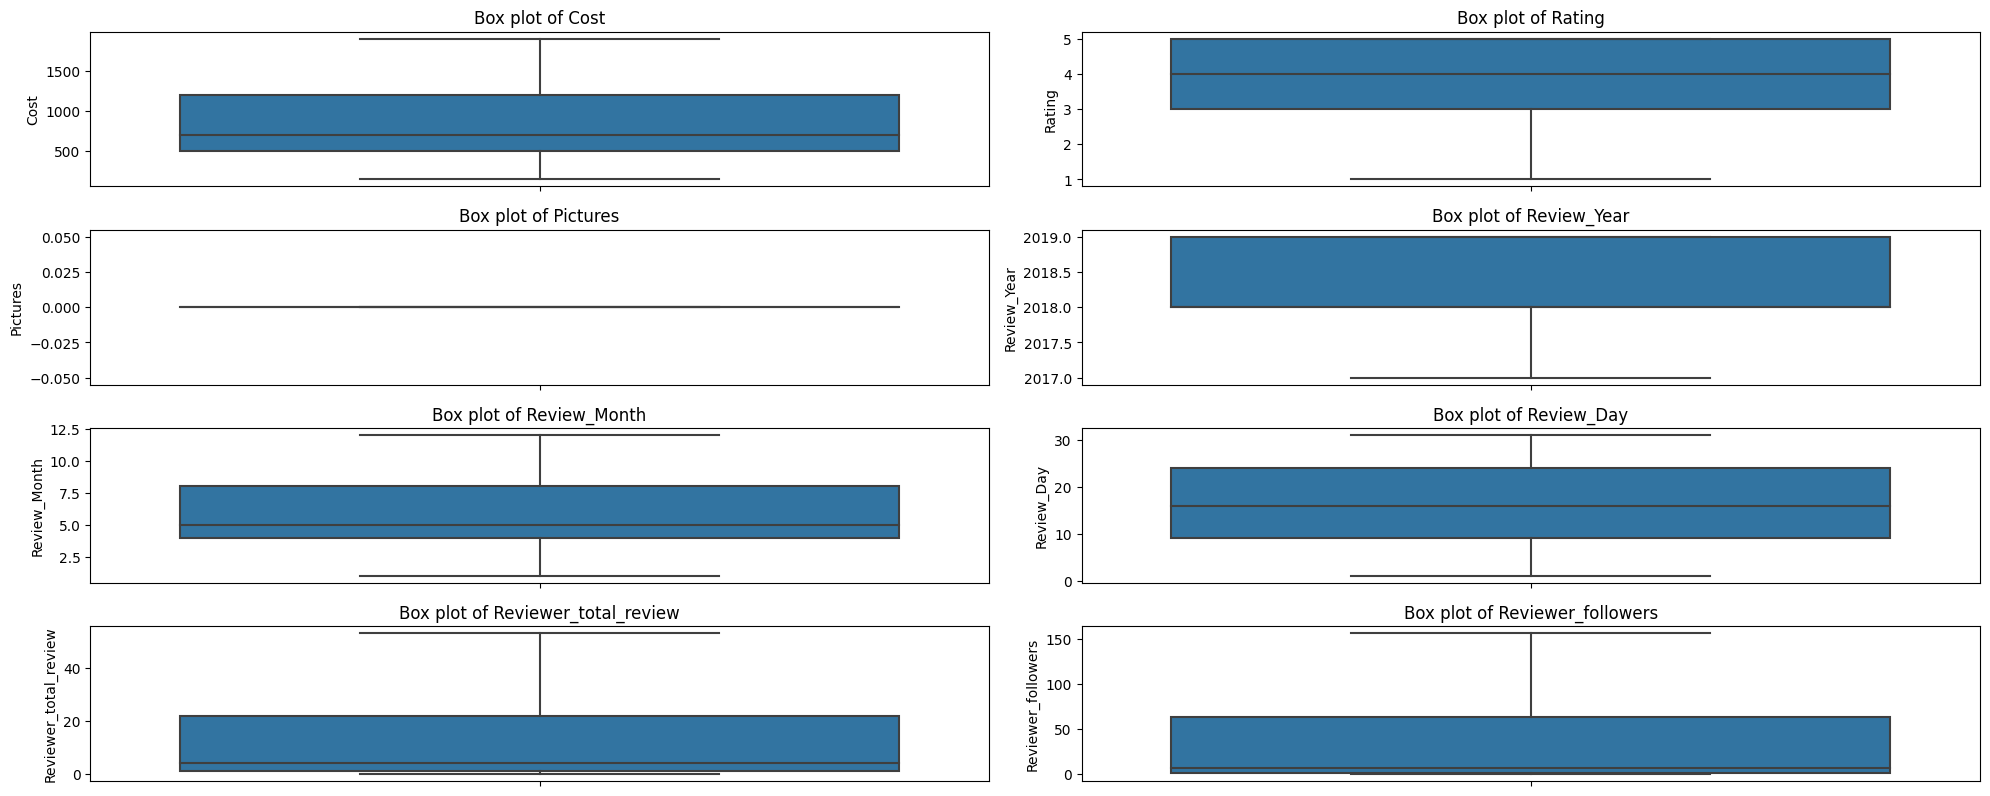

time: 11.9 s (started: 2023-08-03 11:32:46 +00:00)


In [1145]:
# To cheack the outliers using boxplot
plt.figure(figsize= (20,10))
for n, c in enumerate(numerical_features):
  plt.subplot(int(len(numerical_features)/2 + 1),2,n+1)
  sns.boxplot(y= c ,data= df_inner)
  plt.title(f'Box plot of {c}')
  plt.tight_layout()

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [1146]:
# Dataset Information
df_inner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9961 entries, 0 to 9960
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Restaurant                          9961 non-null   object 
 1   Links                               9961 non-null   object 
 2   Cost                                9961 non-null   float64
 3   Cuisines                            9961 non-null   object 
 4   Timings                             9961 non-null   object 
 5   Reviewer                            9961 non-null   object 
 6   Review                              9961 non-null   object 
 7   Rating                              9961 non-null   float64
 8   Metadata                            9961 non-null   object 
 9   Time                                9961 non-null   object 
 10  Pictures                            9961 non-null   float64
 11  Review_Year                         9961 no

In [1147]:
# Encode your categorical columns
#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = df_restaurant[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])
#checking if the values are correct
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]
#replacing cuisines_ from columns name - for better understanding run seperatly
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()
cluster_dummy

Restaurant  American  Andhra  Arabian  Asian  \
0                        10 Downing Street         0       0        0      0   
1                                 13 Dhaba         0       0        0      0   
2           3B's - Buddies, Bar & Barbecue         0       0        0      0   
3                AB's - Absolute Barbecues         0       0        0      0   
4                        Absolute Sizzlers         1       0        0      0   
..                                     ...       ...     ...      ...    ...   
100                            Wich Please         0       0        0      0   
101  Yum Yum Tree - The Arabian Food Court         0       0        0      0   
102        Zega - Sheraton Hyderabad Hotel         0       0        0      1   
103               Zing's Northeast Kitchen         0       0        0      0   
104                                eat.fit         0       0        0      0   

     BBQ  Bakery  Beverages  Biryani  Burger  ...  North Indian  Pizza  Salad  \
0      0       0          0        0       0  ...             1      0      0   
1      0       0          0        0       0  ...             1      0      0   
2      0       0          0        0       0  ...             1      0      0   
3      0       0          0        0       0  ...             1      0      0   
4      0       0          0        0       0  ...             0      0      0   
..   ...     ...        ...      ...     ...  ...           ...    ...    ...   
100    0       0          0        0       0  ...             0      0      0   
101    0       0          0        0       0  ...             1      0      0   
102    0       0          0        0       0  ...             0      0      0   
103    0       0          0        0       0  ...             0      0      0   
104    0       0          0        0       0  ...             1      0      0   

     Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0          0             0        0            0      0     0      0  
1          0             0        0            0      0     0      0  
2          0             0        0            0      0     0      0  
3          0             0        0            0      0     0      0  
4          0             0        0            0      0     0      0  
..       ...           ...      ...          ...    ...   ...    ...  
100        0             0        0            0      0     0      0  
101        0             0        0            0      0     0      0  
102        0             0        0            0      1     0      0  
103        0             0        0            0      0     0      0  
104        0             1        0            0      0     0      0  

[105 rows x 45 columns]

time: 54.2 ms (started: 2023-08-03 11:32:58 +00:00)


In [1148]:
#total cuisine count
df_restaurant['Total_Cuisine_Count'] = df_restaurant['Cuisines'].apply(lambda x : len(x.split(',')))

time: 6.63 ms (started: 2023-08-03 11:32:58 +00:00)


In [1149]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_restaurant_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
df_restaurant = df_restaurant.merge(avg_restaurant_rating, on = 'Restaurant')
df_restaurant.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                               Links  Cost  \
0  https://www.zomato.com/hyderabad/beyond-flavou...   800   
1  https://www.zomato.com/hyderabad/paradise-gach...   800   
2  https://www.zomato.com/hyderabad/flechazo-gach...  1300   
3  https://www.zomato.com/hyderabad/shah-ghouse-h...   800   
4  https://www.zomato.com/hyderabad/over-the-moon...  1200   

                                            Cuisines  \
0  Chinese, Continental, Kebab, European, South I...   
1                     Biryani, North Indian, Chinese   
2       Asian, Mediterranean, North Indian, Desserts   
3  Biryani, North Indian, Chinese, Seafood, Bever...   
4  Asian, Continental, North Indian, Chinese, Med...   

                                             Timings  Total_Cuisine_Count  \
0      12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)                    6   
1                                     11 AM to 11 PM                    3   
2              11:30 AM to 4:30 PM, 6:30 PM to 11 PM                    4   
3                                    12 Noon to 2 AM                    5   
4  12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...                    5   

   Average_Rating  Total_review  
0            4.28           100  
1            4.70           100  
2            4.66           100  
3            3.21           100  
4            4.34           100

time: 36 ms (started: 2023-08-03 11:32:58 +00:00)


In [1150]:
#adding cost column to the new dataset
cluster_dummy = df_restaurant[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

time: 12.3 ms (started: 2023-08-03 11:32:58 +00:00)


In [1151]:
# First look of the cluster_dummy dataset
cluster_dummy.head()

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
0                 Beyond Flavours   800            4.28                    6   
1                        Paradise   800            4.70                    3   
2                        Flechazo  1300            4.66                    4   
3  Shah Ghouse Hotel & Restaurant   800            3.21                    5   
4      Over The Moon Brew Company  1200            4.34                    5   

   American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
0         0       0        0      0    0       0  ...             1      0   
1         0       0        0      0    0       0  ...             1      0   
2         0       0        0      1    0       0  ...             1      0   
3         0       0        0      0    0       0  ...             1      0   
4         0       0        0      1    0       0  ...             1      0   

   Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0      0        0             1        0            0      0     0      0  
1      0        0             0        0            0      0     0      0  
2      0        0             0        0            0      0     0      0  
3      0        1             0        0            0      0     0      0  
4      0        0             0        0            0      0     0      0  

[5 rows x 48 columns]

time: 36.5 ms (started: 2023-08-03 11:32:58 +00:00)


In [1152]:
# Encode your categorical columns

time: 402 µs (started: 2023-08-03 11:32:58 +00:00)


In [1153]:
#creating data frame for categorial encoding
cluster_df = df_restaurant[['Restaurant','Cuisines','Cost','Average_Rating','Total_Cuisine_Count']]

time: 2.44 ms (started: 2023-08-03 11:32:58 +00:00)


In [1154]:
#creating new dataframe for clustering
cluster_df = pd.concat([cluster_df,pd.DataFrame(columns=list(cuisine_dict.keys()))])

time: 8.74 ms (started: 2023-08-03 11:32:58 +00:00)


In [1155]:
#creating categorial feature for cuisine
#iterate over every row in the dataframe
for i, row in cluster_df.iterrows():
  # iterate over the new columns
  for column in list(cluster_df.columns):
      if column not in ['Restaurant','Cost','Cuisines','Average_Rating','Total_Cuisine_Count']:
        # checking if the column is in the list of cuisines available for that row
        if column in row['Cuisines']:
          #assign it as 1 else 0
          cluster_df.loc[i,column] = 1
        else:
          cluster_df.loc[i,column] = 0

time: 1.17 s (started: 2023-08-03 11:32:58 +00:00)


In [1156]:
#result from encoding
cluster_df

Restaurant  \
0                   Beyond Flavours   
1                          Paradise   
2                          Flechazo   
3    Shah Ghouse Hotel & Restaurant   
4        Over The Moon Brew Company   
..                              ...   
95                       Desi Bytes   
96                Hyderabadi Daawat   
97  Zega - Sheraton Hyderabad Hotel   
98                         Triptify   
99                 Chinese Pavilion   

                                             Cuisines    Cost  Average_Rating  \
0   Chinese, Continental, Kebab, European, South I...   800.0           4.280   
1                      Biryani, North Indian, Chinese   800.0           4.700   
2        Asian, Mediterranean, North Indian, Desserts  1300.0           4.660   
3   Biryani, North Indian, Chinese, Seafood, Bever...   800.0           3.210   
4   Asian, Continental, North Indian, Chinese, Med...  1200.0           4.340   
..                                                ...     ...             ...   
95                              North Indian, Chinese   400.0           2.900   
96                       Hyderabadi, Chinese, Mughlai   600.0           3.830   
97                                       Asian, Sushi  1750.0           4.450   
98                                       North Indian   400.0           3.550   
99                                   Chinese, Seafood  1000.0           3.745   

    Total_Cuisine_Count Chinese Continental Kebab European South Indian  ...  \
0                   6.0       1           1     1        1            1  ...   
1                   3.0       1           0     0        0            0  ...   
2                   4.0       0           0     0        0            0  ...   
3                   5.0       1           0     0        0            0  ...   
4                   5.0       1           1     0        0            0  ...   
..                  ...     ...         ...   ...      ...          ...  ...   
95                  2.0       1           0     0        0            0  ...   
96                  3.0       1           0     0        0            0  ...   
97                  2.0       0           0     0        0            0  ...   
98                  1.0       0           0     0        0            0  ...   
99                  2.0       1           0     0        0            0  ...   

   Spanish Wraps Thai Indonesian Modern Indian Momos Pizza North Eastern  \
0        0     0    0          0             0     0     0             0   
1        0     0    0          0             0     0     0             0   
2        0     0    0          0             0     0     0             0   
3        0     0    0          0             0     0     0             0   
4        0     0    0          0             0     0     0             0   
..     ...   ...  ...        ...           ...   ...   ...           ...   
95       0     0    0          0             0     0     0             0   
96       0     0    0          0             0     0     0             0   
97       0     0    0          0             0     0     0             0   
98       0     0    0          0             0     0     0             0   
99       0     0    0          0             0     0     0             0   

   Mithai Malaysian  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0  
..    ...       ...  
95      0         0  
96      0         0  
97      0         0  
98      0         0  
99      0         0  

[100 rows x 49 columns]

time: 44.5 ms (started: 2023-08-03 11:32:59 +00:00)


#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [1157]:
#creating new df for text processing of sentiment analysis
sentiment_df = df_review[['Reviewer','Restaurant','Rating','Review']]
#setting index
sentiment_df = sentiment_df.reset_index()
sentiment_df['index'] = sentiment_df.index
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     The ambience was good, food was quite good . h...  
1     Ambience is too good for a pleasant evening. S...  
2     A must try.. great food great ambience. Thnx f...  
3     Soumen das and Arun was a great guy. Only beca...  
4     Food is good.we ordered Kodi drumsticks and ba...  
...                                                 ...  
9957  Madhumathi Mahajan Well to start with nice cou...  
9958  This place has never disappointed us.. The foo...  
9959  Bad rating is mainly because of "Chicken Bone ...  
9960  I personally love and prefer Chinese Food. Had...  
9961  Checked in here to try some delicious chinese ...  

[9962 rows x 5 columns]

time: 32.6 ms (started: 2023-08-03 11:32:59 +00:00)


In [1158]:
# Information of sentiment dataframe
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9962 non-null   int64  
 1   Reviewer    9962 non-null   object 
 2   Restaurant  9962 non-null   object 
 3   Rating      9962 non-null   float64
 4   Review      9962 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 389.3+ KB
time: 63.8 ms (started: 2023-08-03 11:32:59 +00:00)


In [1159]:
#importing contraction
!pip install contractions

time: 8.36 s (started: 2023-08-03 11:32:59 +00:00)


time: 8.37 s (started: 2023-08-03 11:32:59 +00:00)


In [1160]:
# Expand Contraction
import contractions
import string
# applying fuction for contracting text
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: str(x))
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x: x.lower())
sentiment_df['Review']=sentiment_df['Review'].apply(lambda x:contractions.fix(x))

time: 449 ms (started: 2023-08-03 11:33:08 +00:00)


#### 2. Lower Casing

In [1161]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

time: 26.9 ms (started: 2023-08-03 11:33:08 +00:00)


time: 42.6 ms (started: 2023-08-03 11:33:08 +00:00)


#### 3. Removing Punctuations

In [1162]:
# Remove Punctuations
import string
def remove_punctuation(text):
  '''a function for removing punctuation'''

  # replacing the punctuations with no space,
  # which in effect deletes the punctuation marks
  translator = str.maketrans('', '', string.punctuation)
  # return the text stripped of punctuation marks
  return text.translate(translator)

time: 887 µs (started: 2023-08-03 11:33:08 +00:00)


In [1163]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     the ambience was good food was quite good  had...  
1     ambience is too good for a pleasant evening se...  
2     a must try great food great ambience thnx for ...  
3     soumen das and arun was a great guy only becau...  
4     food is goodwe ordered kodi drumsticks and bas...  
...                                                 ...  
9957  madhumathi mahajan well to start with nice cou...  
9958  this place has never disappointed us the food ...  
9959  bad rating is mainly because of chicken bone f...  
9960  i personally love and prefer chinese food had ...  
9961  checked in here to try some delicious chinese ...  

[9962 rows x 5 columns]

time: 193 ms (started: 2023-08-03 11:33:08 +00:00)


#### 4. Removing URLs & Removing words and digits contain digits.

In [1164]:
# Remove URLs & Remove words and digits contain digits
import re

# Remove links
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"http\S+", "", x))

# Remove digits
sentiment_df["Review"] = sentiment_df["Review"].apply(lambda x: re.sub(r"\d+", "", x))

time: 176 ms (started: 2023-08-03 11:33:09 +00:00)


In [1165]:
# First view of sentiment dataframe
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     the ambience was good food was quite good  had...  
1     ambience is too good for a pleasant evening se...  
2     a must try great food great ambience thnx for ...  
3     soumen das and arun was a great guy only becau...  
4     food is goodwe ordered kodi drumsticks and bas...  
...                                                 ...  
9957  madhumathi mahajan well to start with nice cou...  
9958  this place has never disappointed us the food ...  
9959  bad rating is mainly because of chicken bone f...  
9960  i personally love and prefer chinese food had ...  
9961  checked in here to try some delicious chinese ...  

[9962 rows x 5 columns]

time: 25.1 ms (started: 2023-08-03 11:33:09 +00:00)


In [1166]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

time: 750 µs (started: 2023-08-03 11:33:09 +00:00)


In [1167]:
#create a location feature
df_restaurant['Location'] = df_restaurant['Links'].apply(get_location)
df_restaurant.sample(2)

Restaurant  \
92  Collage - Hyatt Hyderabad Gachibowli   
84                               T Grill   

                                                Links  Cost  \
92  https://www.zomato.com/hyderabad/collage-hyatt...  2800   
84  https://www.zomato.com/hyderabad/t-grill-gachi...   700   

                                             Cuisines  \
92  Continental, Italian, North Indian, Chinese, A...   
84             North Indian, Andhra, Biryani, Chinese   

                               Timings  Total_Cuisine_Count  Average_Rating  \
92                  24 Hours (Mon-Sun)                    5            3.41   
84  12:30 PM to 3:30 PM, 7 PM to 11 PM                    4            3.17   

    Total_review   Location  
92           100  hyderabad  
84           100  hyderabad

time: 25.9 ms (started: 2023-08-03 11:33:09 +00:00)


#### 5. Removing Stopwords & Removing White spaces

In [1168]:
#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

time: 1.98 ms (started: 2023-08-03 11:33:09 +00:00)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [1169]:
# Remove Stopwords
sw = stopwords.words('english')

time: 1.1 ms (started: 2023-08-03 11:33:09 +00:00)


In [1170]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

time: 804 µs (started: 2023-08-03 11:33:09 +00:00)


In [1171]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

time: 2.61 s (started: 2023-08-03 11:33:09 +00:00)


In [1172]:
# Remove White spaces
sentiment_df['Review'] =sentiment_df['Review'].apply(lambda x: " ".join(x.split()))

time: 69.1 ms (started: 2023-08-03 11:33:12 +00:00)


In [1173]:
# First view of sentiment dataframe
sentiment_df

index              Reviewer        Restaurant  Rating  \
0         0     Rusha Chakraborty   Beyond Flavours     5.0   
1         1  Anusha Tirumalaneedi   Beyond Flavours     5.0   
2         2       Ashok Shekhawat   Beyond Flavours     5.0   
3         3        Swapnil Sarkar   Beyond Flavours     5.0   
4         4                Dileep   Beyond Flavours     5.0   
...     ...                   ...               ...     ...   
9957   9957      Abhishek Mahajan  Chinese Pavilion     3.0   
9958   9958        Sharad Agrawal  Chinese Pavilion     4.5   
9959   9959             Ramandeep  Chinese Pavilion     1.5   
9960   9960       Nayana Shanbhag  Chinese Pavilion     4.0   
9961   9961      Bhargava Krishna  Chinese Pavilion     3.5   

                                                 Review  
0     ambience good food quite good saturday lunch c...  
1     ambience good pleasant evening service prompt ...  
2     must try great food great ambience thnx servic...  
3     soumen das arun great guy behavior sincerety g...  
4     food goodwe ordered kodi drumsticks basket mut...  
...                                                 ...  
9957  madhumathi mahajan well start nice courteous s...  
9958  place never disappointed us food courteous sta...  
9959  bad rating mainly chicken bone found veg food ...  
9960  personally love prefer chinese food couple tim...  
9961  checked try delicious chinese food seen nonveg...  

[9962 rows x 5 columns]

time: 26.2 ms (started: 2023-08-03 11:33:12 +00:00)


#### 6. Rephrase Text

In [1174]:
# Rephrase Text
# Not use in the project

time: 435 µs (started: 2023-08-03 11:33:12 +00:00)


#### 7. Tokenization

In [1175]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

time: 2.47 s (started: 2023-08-03 11:33:12 +00:00)


In [1176]:
# First 5 rows of sentiment dataframe
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  [ambience, good, food, quite, good, saturday, ...  
1  [ambience, good, pleasant, evening, service, p...  
2  [must, try, great, food, great, ambience, thnx...  
3  [soumen, das, arun, great, guy, behavior, sinc...  
4  [food, goodwe, ordered, kodi, drumsticks, bask...

time: 21.4 ms (started: 2023-08-03 11:33:14 +00:00)


#### 8. Text Normalization

In [1177]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


time: 1.26 s (started: 2023-08-03 11:33:14 +00:00)


In [1178]:
# First 5 rows of sentiment dataframe
sentiment_df.head()

index              Reviewer       Restaurant  Rating  \
0      0     Rusha Chakraborty  Beyond Flavours     5.0   
1      1  Anusha Tirumalaneedi  Beyond Flavours     5.0   
2      2       Ashok Shekhawat  Beyond Flavours     5.0   
3      3        Swapnil Sarkar  Beyond Flavours     5.0   
4      4                Dileep  Beyond Flavours     5.0   

                                              Review  
0  [ambience, good, food, quite, good, saturday, ...  
1  [ambience, good, pleasant, evening, service, p...  
2  [must, try, great, food, great, ambience, thnx...  
3  [soumen, da, arun, great, guy, behavior, since...  
4  [food, goodwe, ordered, kodi, drumstick, baske...

time: 11.5 ms (started: 2023-08-03 11:33:15 +00:00)


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [1179]:
# POS Taging

time: 424 µs (started: 2023-08-03 11:33:15 +00:00)


#### 10. Text Vectorization

In [1180]:
#importing contraction
!pip install gensim
import gensim
from gensim import corpora

time: 5.23 s (started: 2023-08-03 11:33:16 +00:00)


In [1181]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)
X_tfidf

<9962x17327 sparse matrix of type '<class 'numpy.float64'>'
	with 232298 stored elements in Compressed Sparse Row format>

time: 899 ms (started: 2023-08-03 11:33:21 +00:00)


In [1182]:
#Bag of Words
tokenized_text = []
for token in sentiment_df['Review']:
    tokenized_text.append(token)

#creating token dict
tokens_dict = gensim.corpora.Dictionary(tokenized_text)

time: 888 ms (started: 2023-08-03 11:33:22 +00:00)


In [1183]:
#using tokens_dict.doc2bow() to generate BoW features for each tokenized course
texts_bow = [tokens_dict.doc2bow(text) for text in tokenized_text]

#creating a new text_bow dataframe based on the extracted BoW features
tokens = []
bow_values = []
doc_indices = []
doc_ids = []
for text_idx, text_bow in enumerate(texts_bow):
    for token_index, token_bow in text_bow:
        token = tokens_dict.get(token_index)
        tokens.append(token)
        bow_values.append(token_bow)
        doc_indices.append(text_idx)
        doc_ids.append(sentiment_df["Restaurant"][text_idx])

bow_dict = {"doc_index": doc_indices,
            "doc_id": doc_ids,
            "token": tokens,
            "bow": bow_values,
            }
bows_df = pd.DataFrame(bow_dict)
bows_df

doc_index            doc_id     token  bow
0               0   Beyond Flavours      also    1
1               0   Beyond Flavours  ambience    1
2               0   Beyond Flavours    brunch    1
3               0   Beyond Flavours     chill    1
4               0   Beyond Flavours      cost    1
...           ...               ...       ...  ...
232293       9961  Chinese Pavilion       tax    1
232294       9961  Chinese Pavilion    kimchi    1
232295       9961  Chinese Pavilion        an    1
232296       9961  Chinese Pavilion  luncheon    2
232297       9961  Chinese Pavilion     wolly    1

[232298 rows x 4 columns]

time: 3.84 s (started: 2023-08-03 11:33:23 +00:00)


##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

##### **Restaurant Dataset**

In [1184]:
# Restaurent Dataset shape
df_restaurant.shape

(100, 9)

time: 8.48 ms (started: 2023-08-03 11:33:26 +00:00)


In [1185]:
# Columns of the Restaurant dataset
df_restaurant.columns

Index(['Restaurant', 'Links', 'Cost', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Total_review', 'Location'],
      dtype='object')

time: 13.4 ms (started: 2023-08-03 11:33:26 +00:00)


In [1186]:
# Drop the Links and Locations columns in the restaurant dataset
df_restaurant = df_restaurant.drop(columns = ['Links','Location'],axis = 1)

time: 8.74 ms (started: 2023-08-03 11:33:26 +00:00)


In [1187]:
# New shape of the restaurant dataset
df_restaurant.shape

(100, 7)

time: 10.3 ms (started: 2023-08-03 11:33:27 +00:00)


##### **Review Dataset**

In [1188]:
# Shape of the review dataset
df_review.shape

(9962, 12)

time: 9.31 ms (started: 2023-08-03 11:33:27 +00:00)


In [1189]:
# Columns of the review dataset
df_review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Review_Year', 'Review_Month', 'Review_Day',
       'Reviewer_total_review', 'Reviewer_followers'],
      dtype='object')

time: 9.33 ms (started: 2023-08-03 11:33:27 +00:00)


##### **Cluster Dataset**

In [1190]:
# Shape of the Cluster DataFrame
cluster_df.shape

(100, 49)

time: 9.87 ms (started: 2023-08-03 11:33:27 +00:00)


In [1191]:
# Columns of the Cluster Dataset
cluster_df.columns

Index(['Restaurant', 'Cuisines', 'Cost', 'Average_Rating',
       'Total_Cuisine_Count', 'Chinese', 'Continental', 'Kebab', 'European',
       'South Indian', 'North Indian', 'Biryani', 'Asian', 'Mediterranean',
       'Desserts', 'Seafood', 'Beverages', 'Goan', 'Healthy Food', 'Lebanese',
       'American', 'Ice Cream', 'Street Food', 'Fast Food', 'BBQ', 'Italian',
       'Finger Food', 'Burger', 'Japanese', 'Salad', 'Sushi', 'Mexican',
       'Mughlai', 'Andhra', 'Bakery', 'Juices', 'Arabian', 'Hyderabadi',
       'Cafe', 'Spanish', 'Wraps', 'Thai', 'Indonesian', 'Modern Indian',
       'Momos', 'Pizza', 'North Eastern', 'Mithai', 'Malaysian'],
      dtype='object')

time: 10.7 ms (started: 2023-08-03 11:33:27 +00:00)


In [1192]:
# Information of the cluster dummy dataset
cluster_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           100 non-null    object 
 1   Cost                 100 non-null    int64  
 2   Average_Rating       100 non-null    float64
 3   Total_Cuisine_Count  100 non-null    int64  
 4   American             100 non-null    uint8  
 5   Andhra               100 non-null    uint8  
 6   Arabian              100 non-null    uint8  
 7   Asian                100 non-null    uint8  
 8   BBQ                  100 non-null    uint8  
 9   Bakery               100 non-null    uint8  
 10  Beverages            100 non-null    uint8  
 11  Biryani              100 non-null    uint8  
 12  Burger               100 non-null    uint8  
 13  Cafe                 100 non-null    uint8  
 14  Chinese              100 non-null    uint8  
 15  Continental          100 non-null    uint

In [1193]:
# Drop the Links and Locations columns in the restaurant dataset
cluster_df = cluster_df.drop(columns = ['Restaurant','Cuisines'],axis = 1)

time: 3.36 ms (started: 2023-08-03 11:33:27 +00:00)


In [1194]:
# Shape of the Cluster DataFrame
cluster_df.shape

(100, 47)

time: 11.9 ms (started: 2023-08-03 11:33:27 +00:00)


In [1195]:
# Type casting of the cluster dataframe
for i in cluster_df.columns:
  cluster_df[i] = cluster_df[i].astype(int)

time: 53.2 ms (started: 2023-08-03 11:33:27 +00:00)


In [1196]:
# Shape of the cluster dummy
cluster_dummy.shape

(100, 48)

time: 10.3 ms (started: 2023-08-03 11:33:27 +00:00)


In [1197]:
# Columns of the cluster dummy
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

time: 6.06 ms (started: 2023-08-03 11:33:27 +00:00)


In [1198]:
# Information of cluster dummy dataset
cluster_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           100 non-null    object 
 1   Cost                 100 non-null    int64  
 2   Average_Rating       100 non-null    float64
 3   Total_Cuisine_Count  100 non-null    int64  
 4   American             100 non-null    uint8  
 5   Andhra               100 non-null    uint8  
 6   Arabian              100 non-null    uint8  
 7   Asian                100 non-null    uint8  
 8   BBQ                  100 non-null    uint8  
 9   Bakery               100 non-null    uint8  
 10  Beverages            100 non-null    uint8  
 11  Biryani              100 non-null    uint8  
 12  Burger               100 non-null    uint8  
 13  Cafe                 100 non-null    uint8  
 14  Chinese              100 non-null    uint8  
 15  Continental          100 non-null    uint

In [1199]:
# Shape of the sentiment dataset
sentiment_df.shape

(9962, 5)

time: 4.54 ms (started: 2023-08-03 11:33:27 +00:00)


In [1200]:
# Columns of the sentiment dataset
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review'], dtype='object')

time: 9.12 ms (started: 2023-08-03 11:33:27 +00:00)


In [1201]:
#creating new binary feature called sentiment based on rating which has 1 = positive and 0 = negative
sentiment_df['sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x >=sentiment_df['Rating'].mean() else 0)

time: 1.57 s (started: 2023-08-03 11:33:27 +00:00)


In [1202]:
# Information of sentiment dataset
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9962 entries, 0 to 9961
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       9962 non-null   int64  
 1   Reviewer    9962 non-null   object 
 2   Restaurant  9962 non-null   object 
 3   Rating      9962 non-null   float64
 4   Review      9962 non-null   object 
 5   sentiment   9962 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 467.1+ KB
time: 24.4 ms (started: 2023-08-03 11:33:29 +00:00)


#### 2. Feature Selection

##### **Restaurant Dataset**

In [1203]:
# Dataset information
df_restaurant.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Restaurant           100 non-null    object 
 1   Cost                 100 non-null    int64  
 2   Cuisines             100 non-null    object 
 3   Timings              100 non-null    object 
 4   Total_Cuisine_Count  100 non-null    int64  
 5   Average_Rating       100 non-null    float64
 6   Total_review         100 non-null    int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 6.2+ KB
time: 13.2 ms (started: 2023-08-03 11:33:29 +00:00)


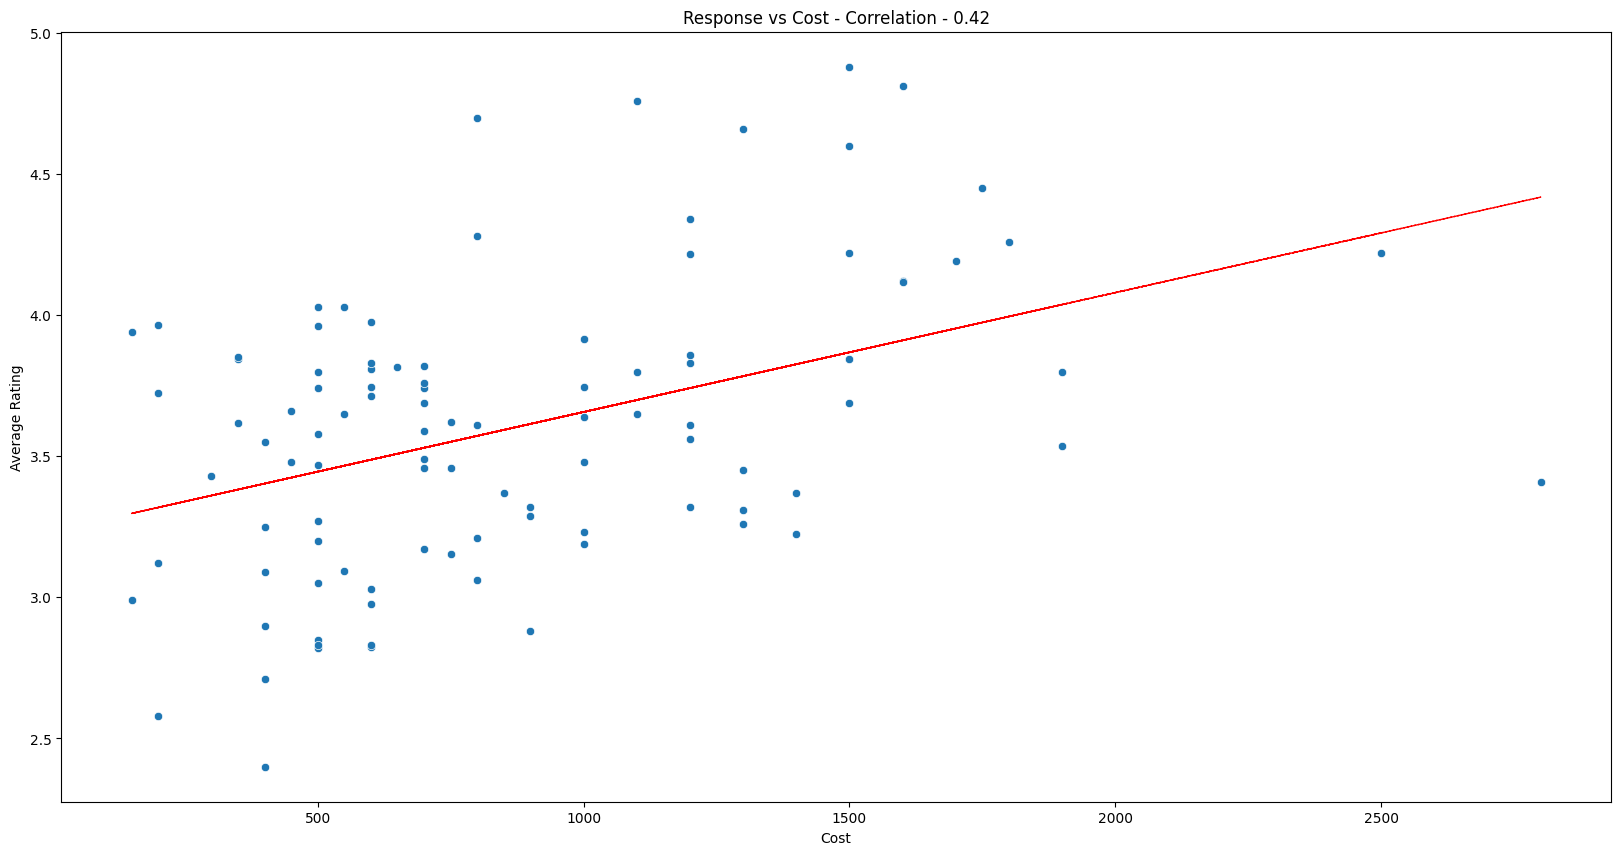

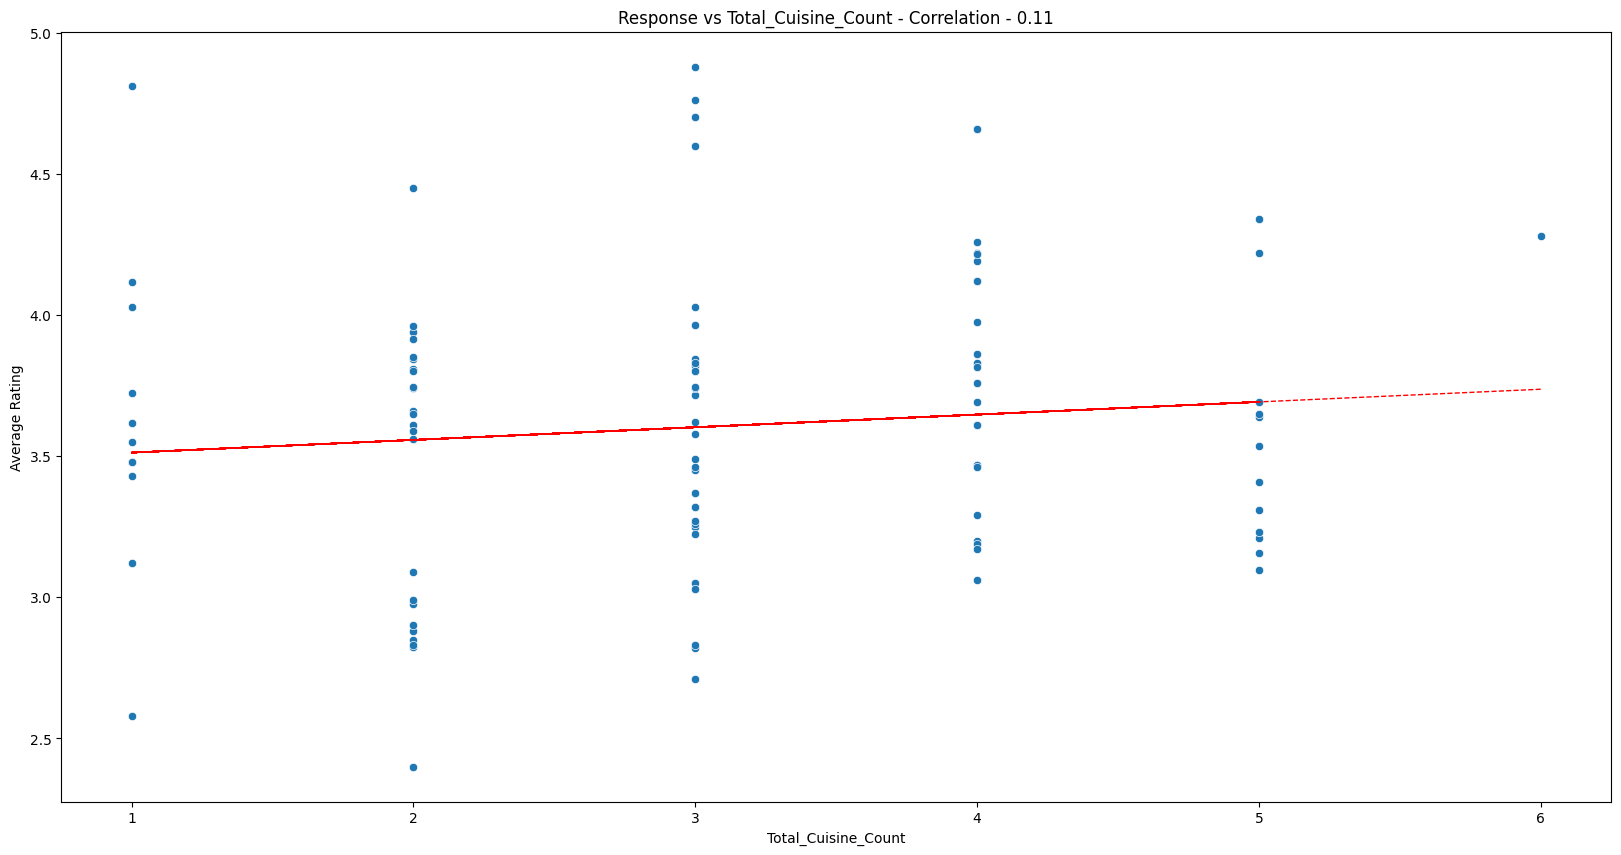

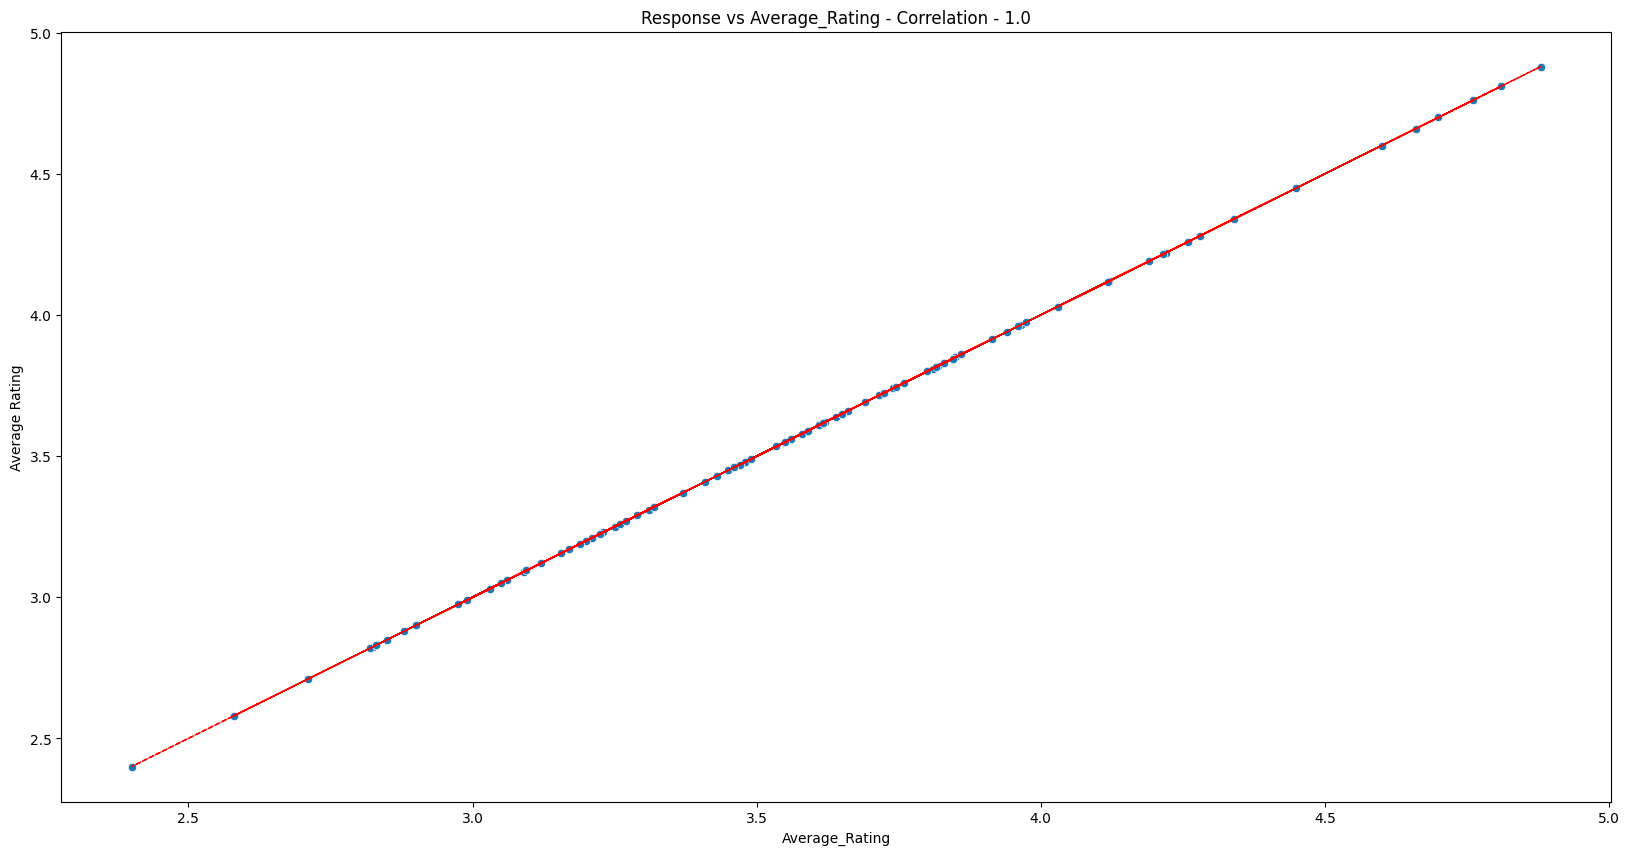

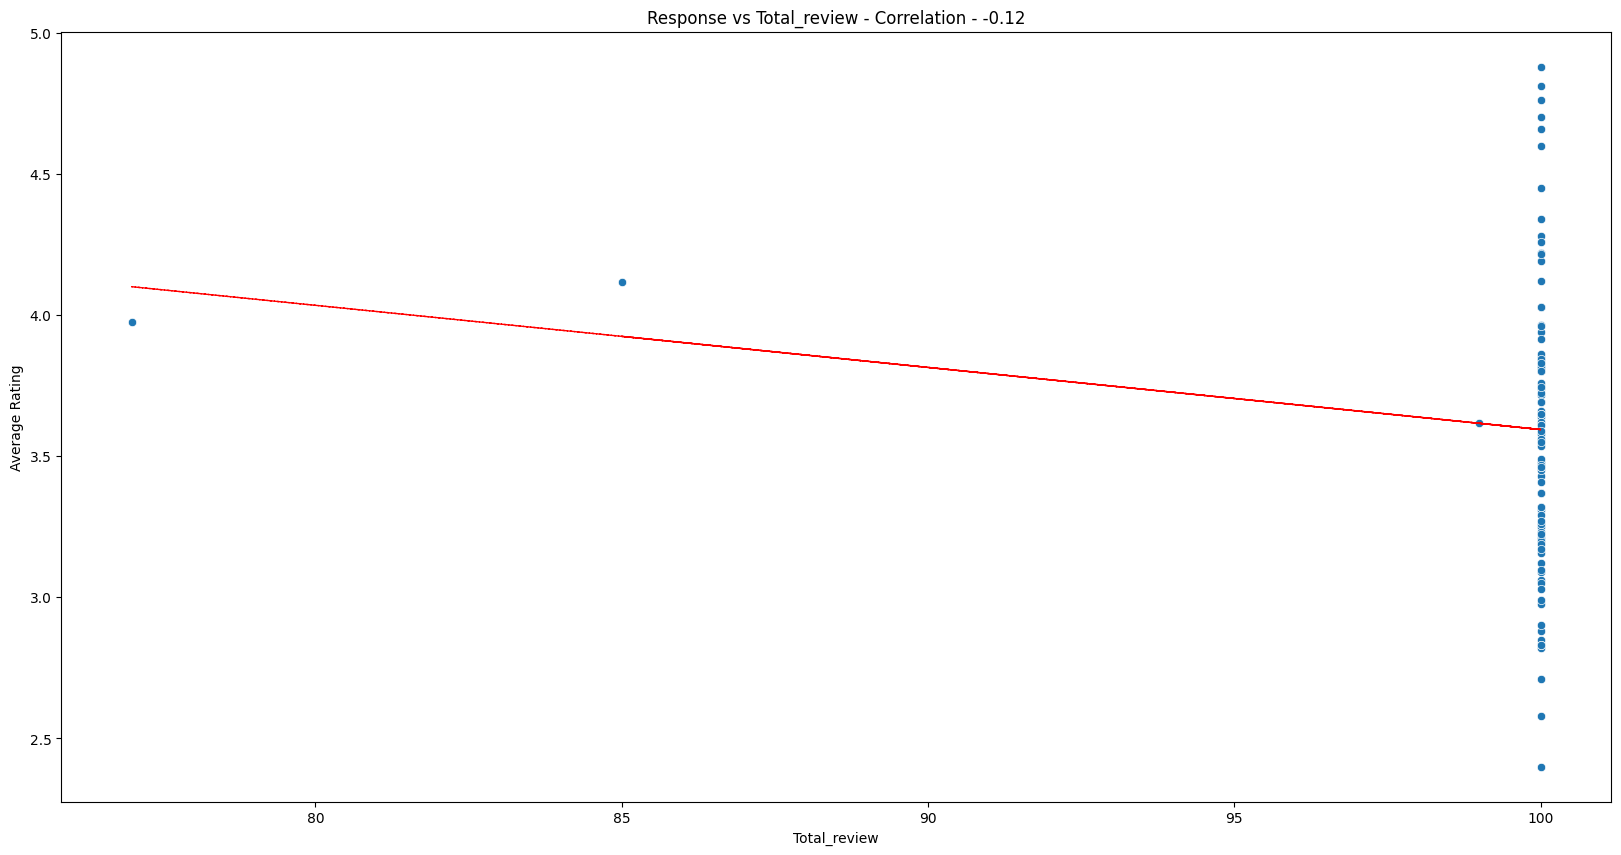

time: 2.3 s (started: 2023-08-03 11:33:29 +00:00)


In [1204]:
# Let's see how to relation between sales and other features
for i in [i for i in df_restaurant.columns if df_restaurant[i].dtypes != 'object']:
  fig = plt.figure(figsize= (20,10))
  fig = fig.gca()
  feature = df_restaurant[i]
  label = df_restaurant['Average_Rating']
  corr = feature.corr(label)
  sns.scatterplot(x= feature, y= label)
  plt.xlabel(i)
  plt.ylabel('Average Rating')
  plt.title('Response vs '+i+' - Correlation - ' + str(round(corr,2)))
  z = np.polyfit(df_restaurant[i], df_restaurant['Average_Rating'], 1)
  y_hat = np.poly1d(z)(df_restaurant[i])
  plt.plot(df_restaurant[i], y_hat, "r--", lw=1)
  plt.show()

<Axes: >

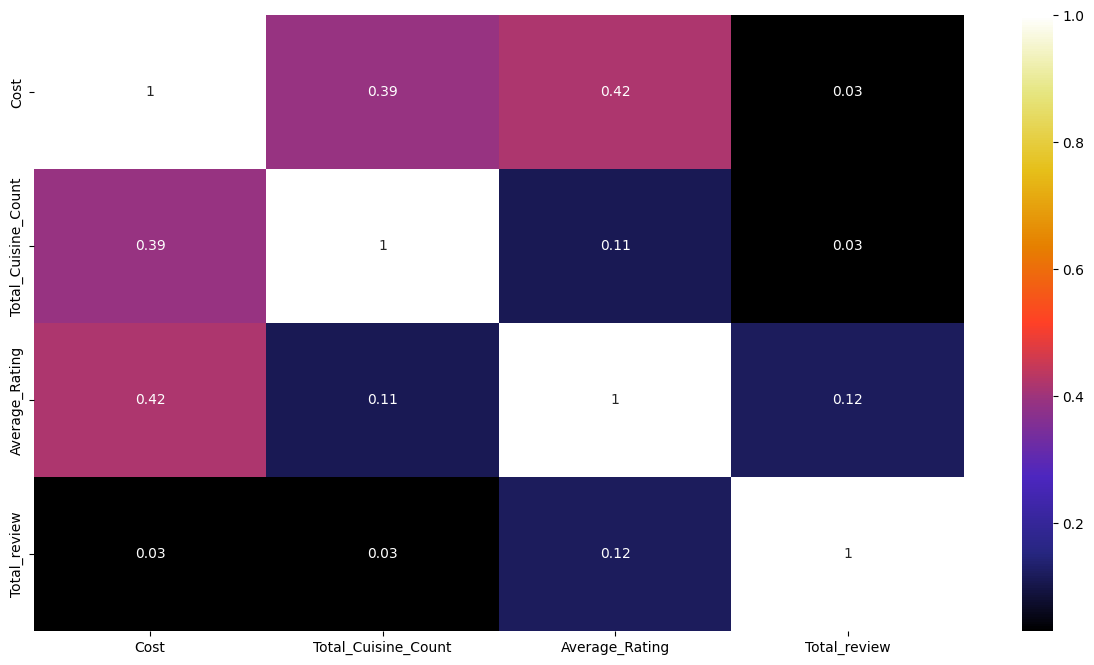

time: 647 ms (started: 2023-08-03 11:33:31 +00:00)


In [1205]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (15,8))
sns.heatmap(abs(round(df_restaurant.corr(),2)), annot = True, cmap= plt.cm.CMRmap)

In [1206]:
# Import  VIF factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

time: 690 µs (started: 2023-08-03 11:33:32 +00:00)


In [1207]:
# Defining the function variance_inflation_factor
def vif_func(data):
  vif = pd.DataFrame()
  vif['var'] = data.columns
  vif['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
  return vif

time: 989 µs (started: 2023-08-03 11:33:32 +00:00)


In [1208]:
# calculating the vif by excluding some features
vif_func(df_restaurant[[i for i in df_restaurant.describe().columns]])

var        VIF
0                 Cost   5.668285
1  Total_Cuisine_Count   8.585178
2       Average_Rating  58.451380
3         Total_review  55.115141

time: 42.7 ms (started: 2023-08-03 11:33:32 +00:00)


##### **Review Dataset**

In [1209]:
# Information of review dataset
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9962 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Restaurant             9962 non-null   object 
 1   Reviewer               9962 non-null   object 
 2   Review                 9962 non-null   object 
 3   Rating                 9962 non-null   float64
 4   Metadata               9962 non-null   object 
 5   Time                   9962 non-null   object 
 6   Pictures               9962 non-null   int64  
 7   Review_Year            9962 non-null   float64
 8   Review_Month           9962 non-null   float64
 9   Review_Day             9962 non-null   float64
 10  Reviewer_total_review  9962 non-null   float64
 11  Reviewer_followers     9962 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 1011.8+ KB
time: 43.2 ms (started: 2023-08-03 11:33:32 +00:00)


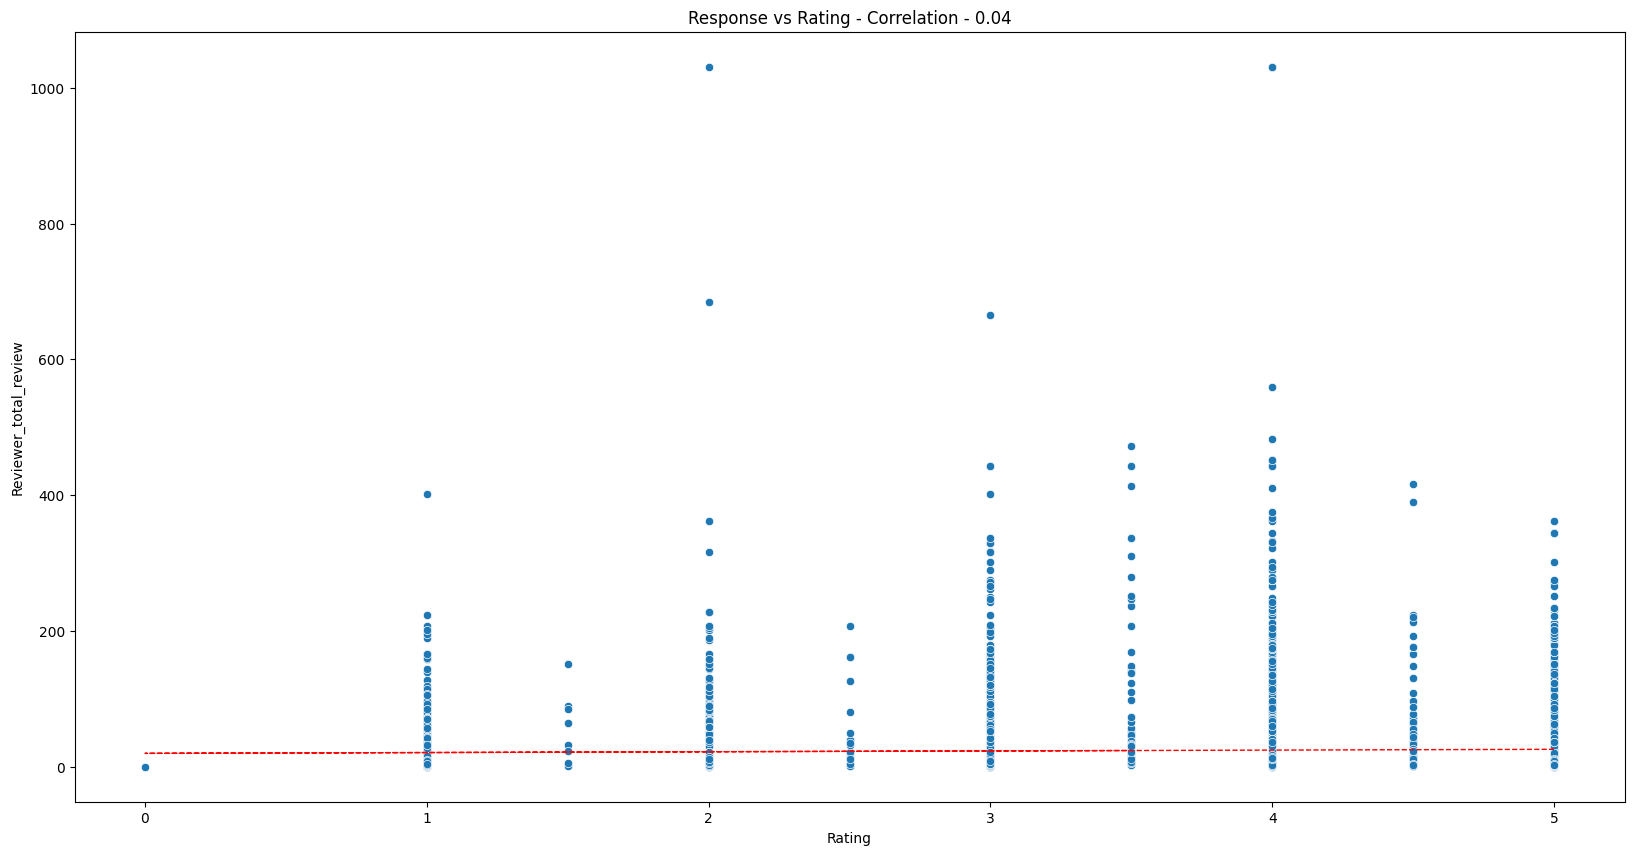

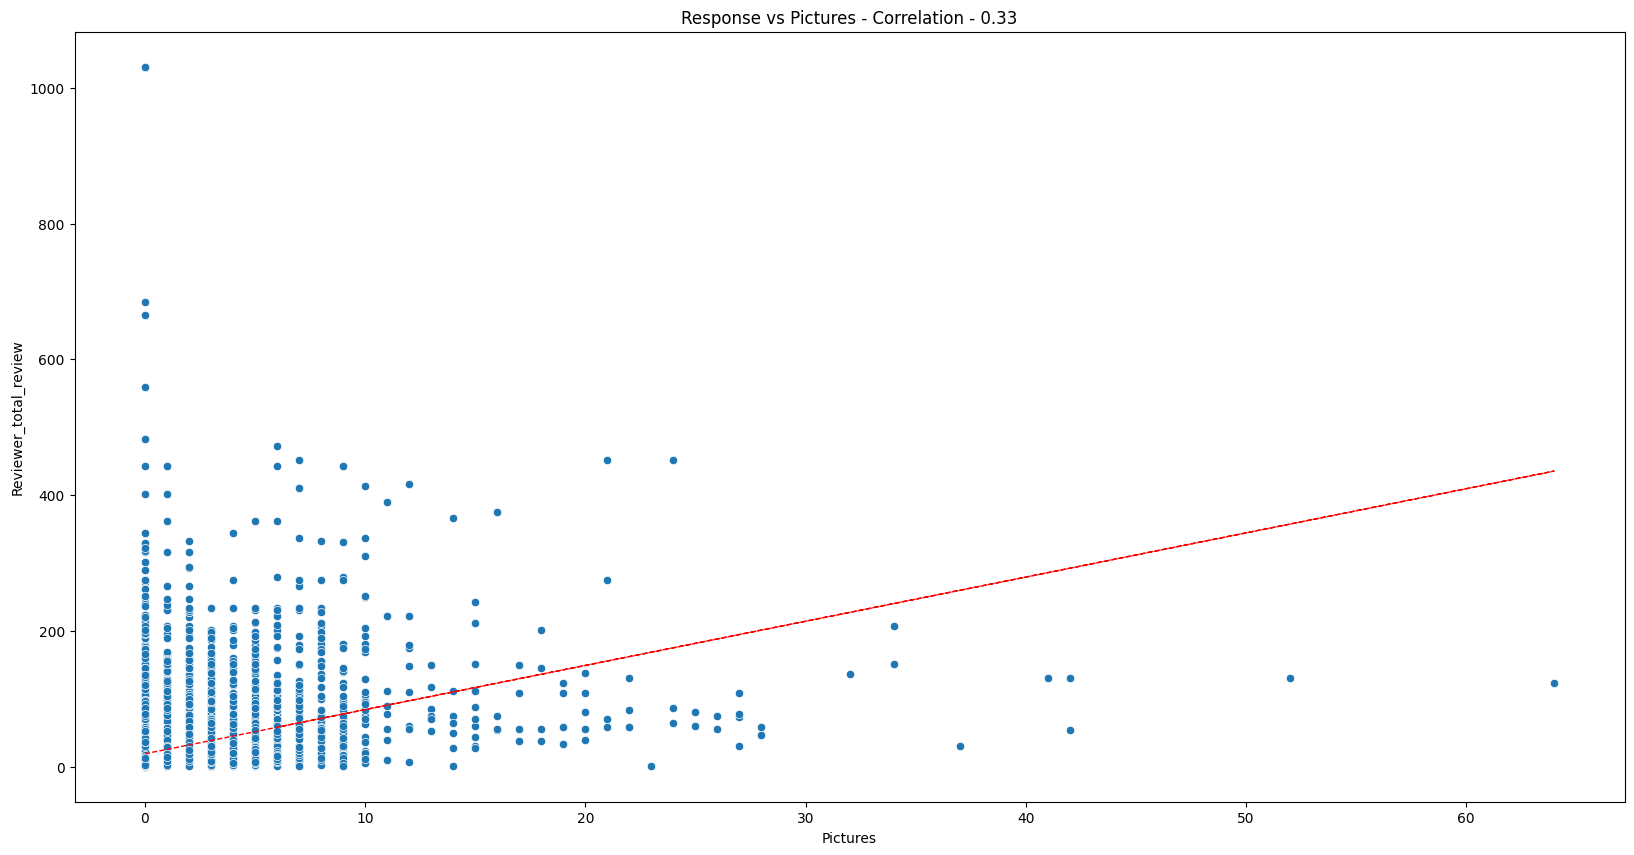

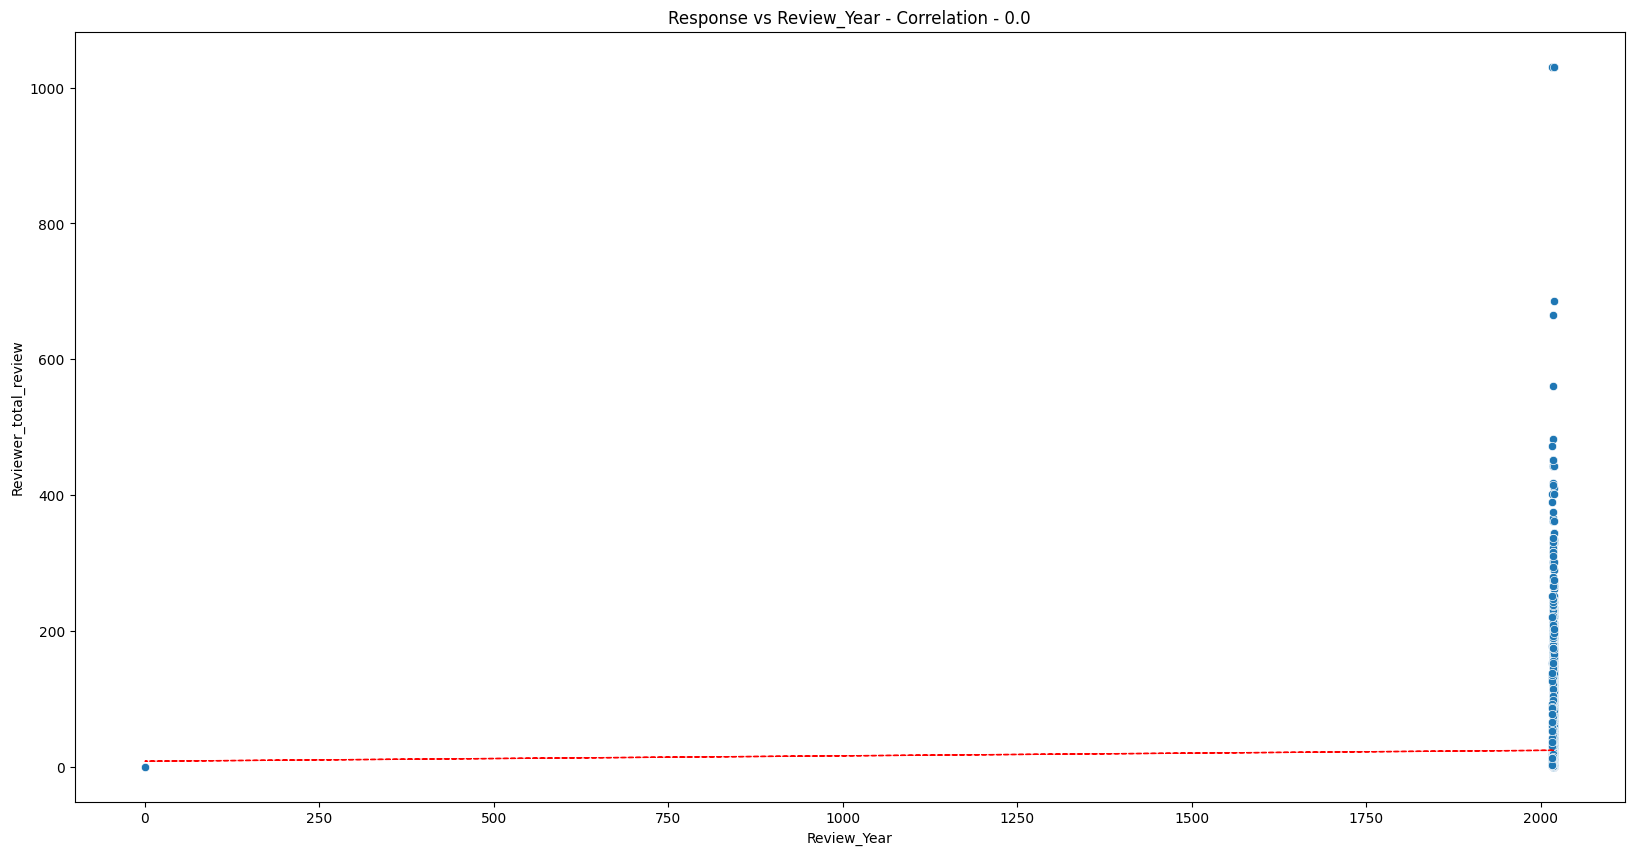

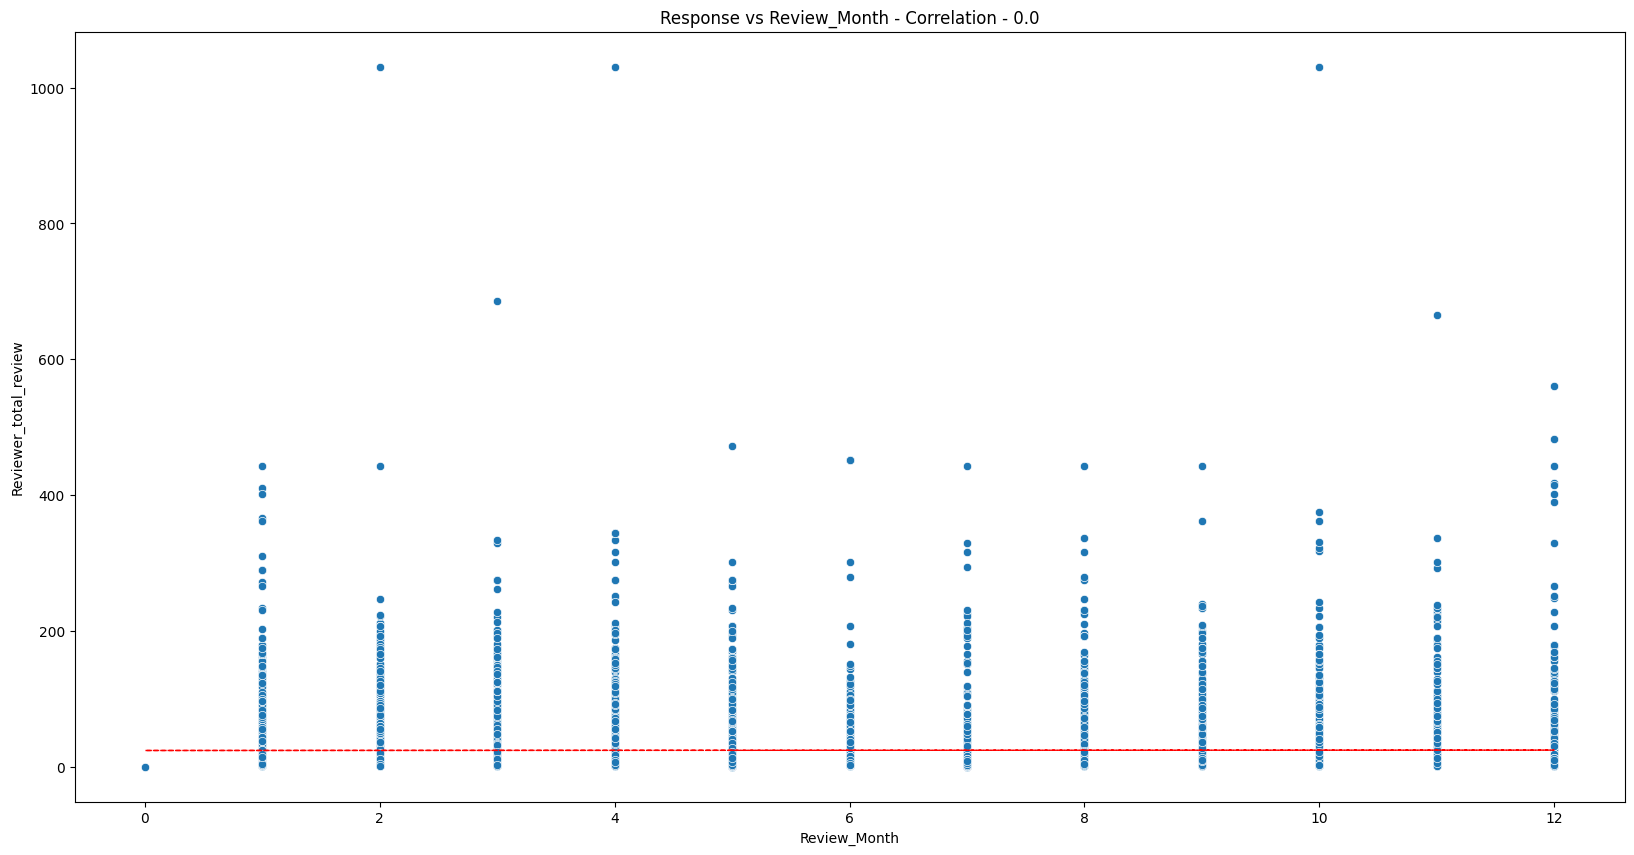

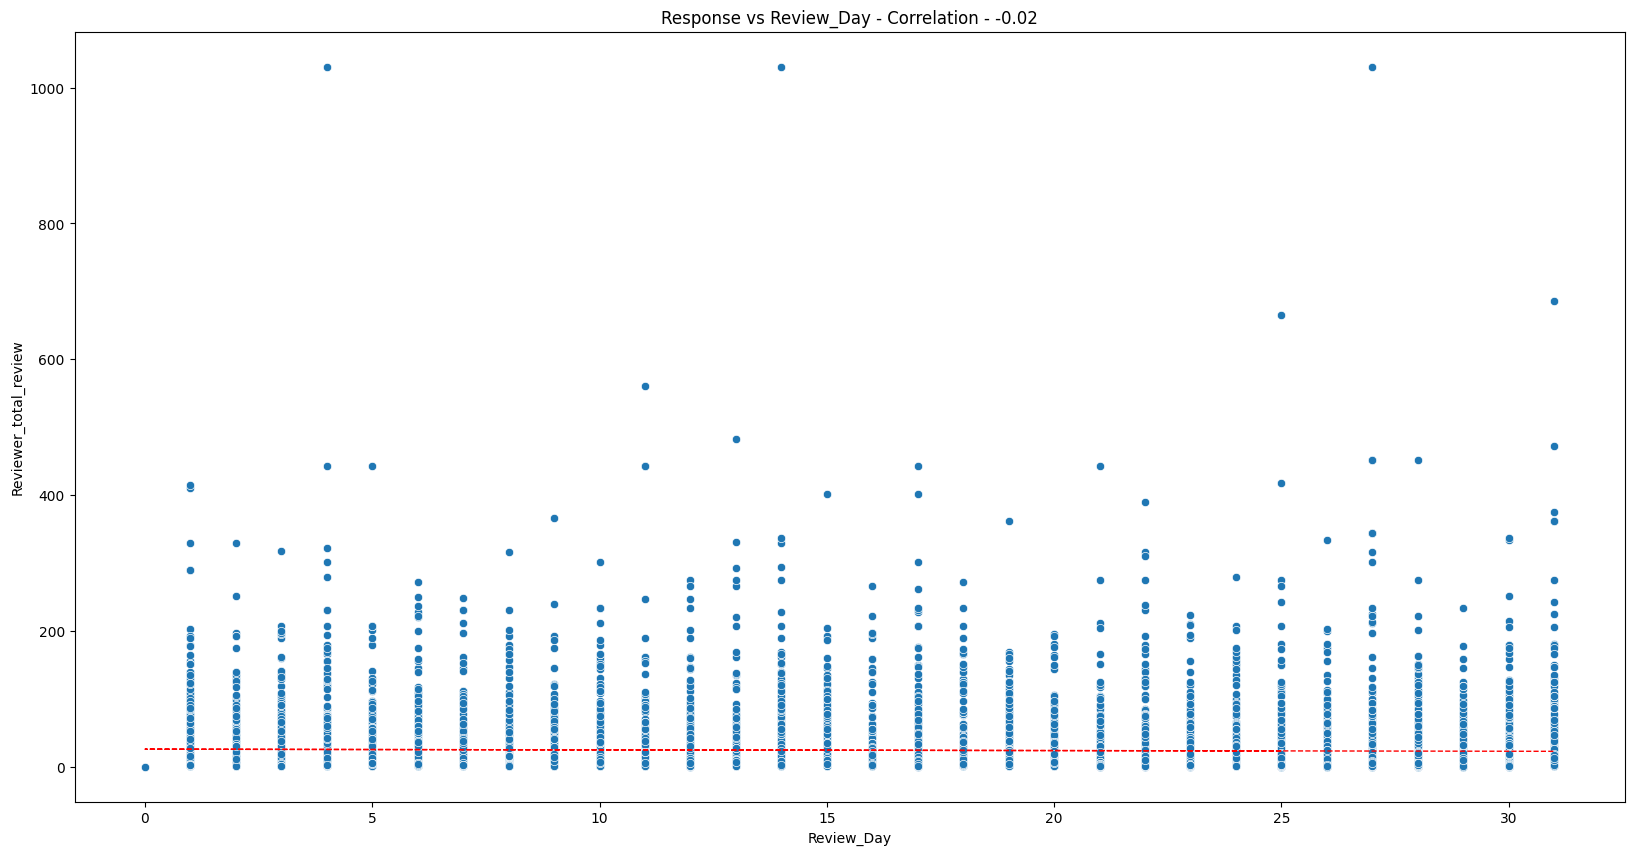

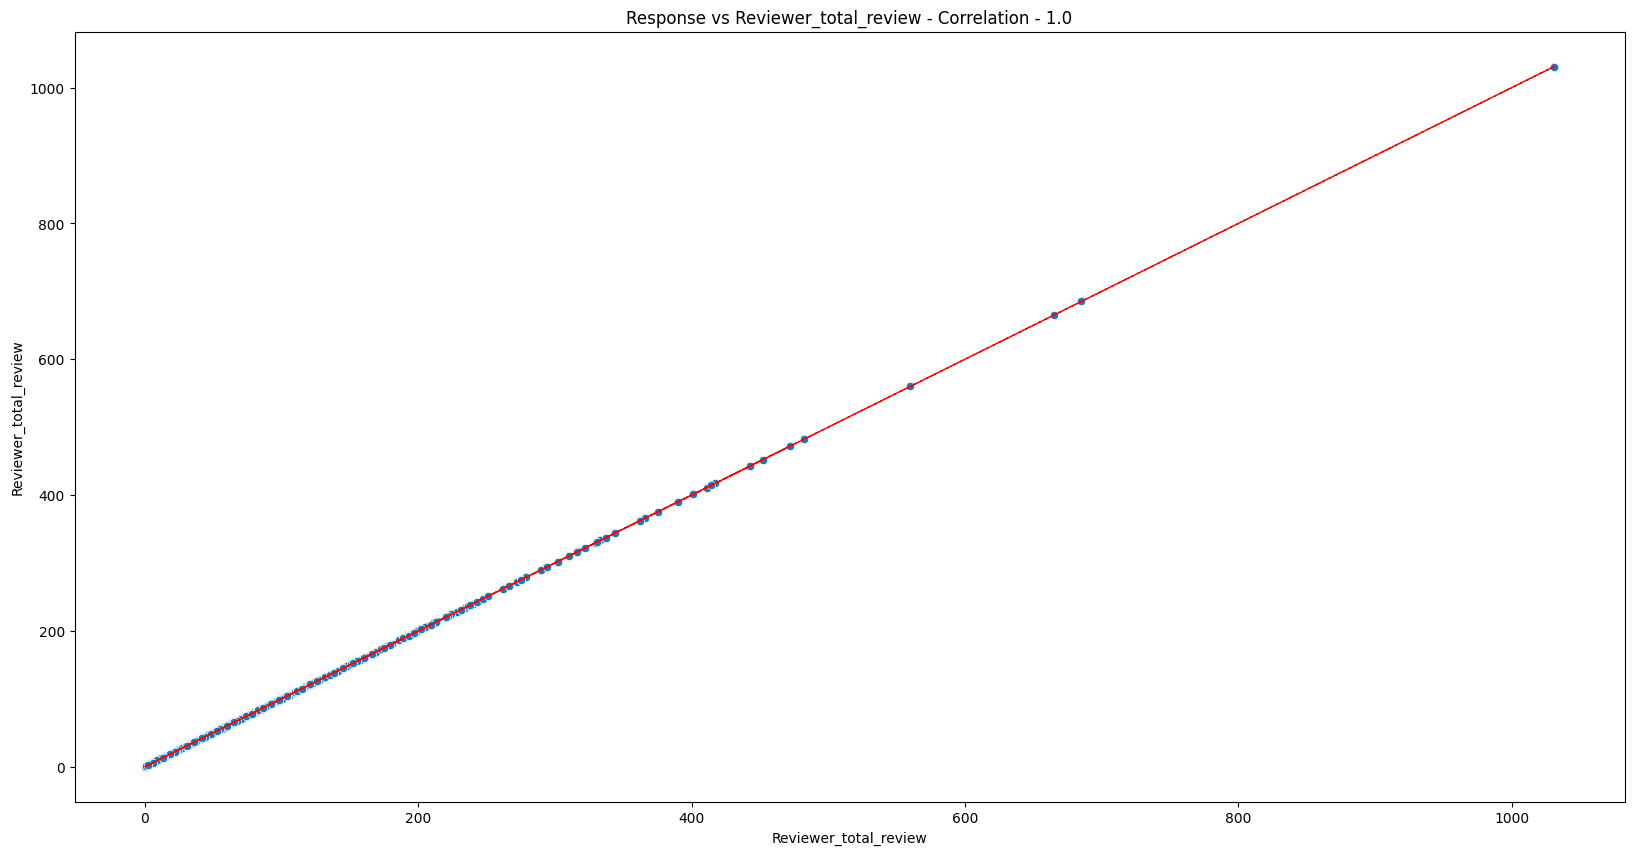

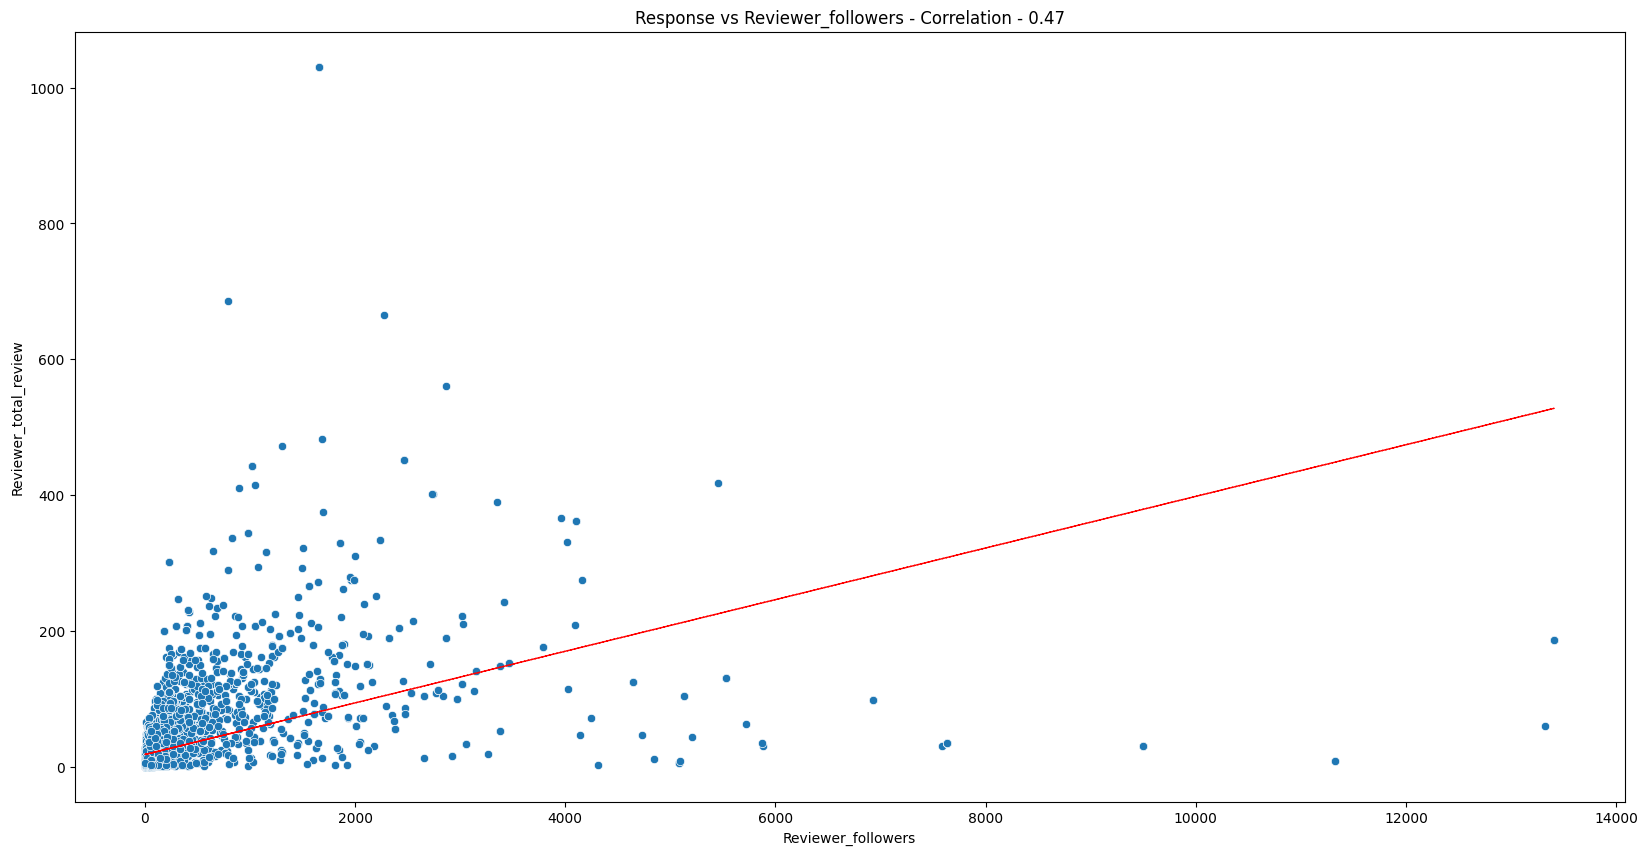

time: 2.72 s (started: 2023-08-03 11:33:32 +00:00)


In [1210]:
# Let's see how to relation between sales and other features
for i in [i for i in df_review.columns if df_review[i].dtypes != 'object']:
  fig = plt.figure(figsize= (20,10))
  fig = fig.gca()
  feature = df_review[i]
  label = df_review['Reviewer_total_review']
  corr = feature.corr(label)
  sns.scatterplot(x= feature, y= label)
  plt.xlabel(i)
  plt.ylabel('Reviewer_total_review')
  plt.title('Response vs '+i+' - Correlation - ' + str(round(corr,2)))
  z = np.polyfit(df_review[i], df_review['Reviewer_total_review'], 1)
  y_hat = np.poly1d(z)(df_review[i])
  plt.plot(df_review[i], y_hat, "r--", lw=1)
  plt.show()

<Axes: >

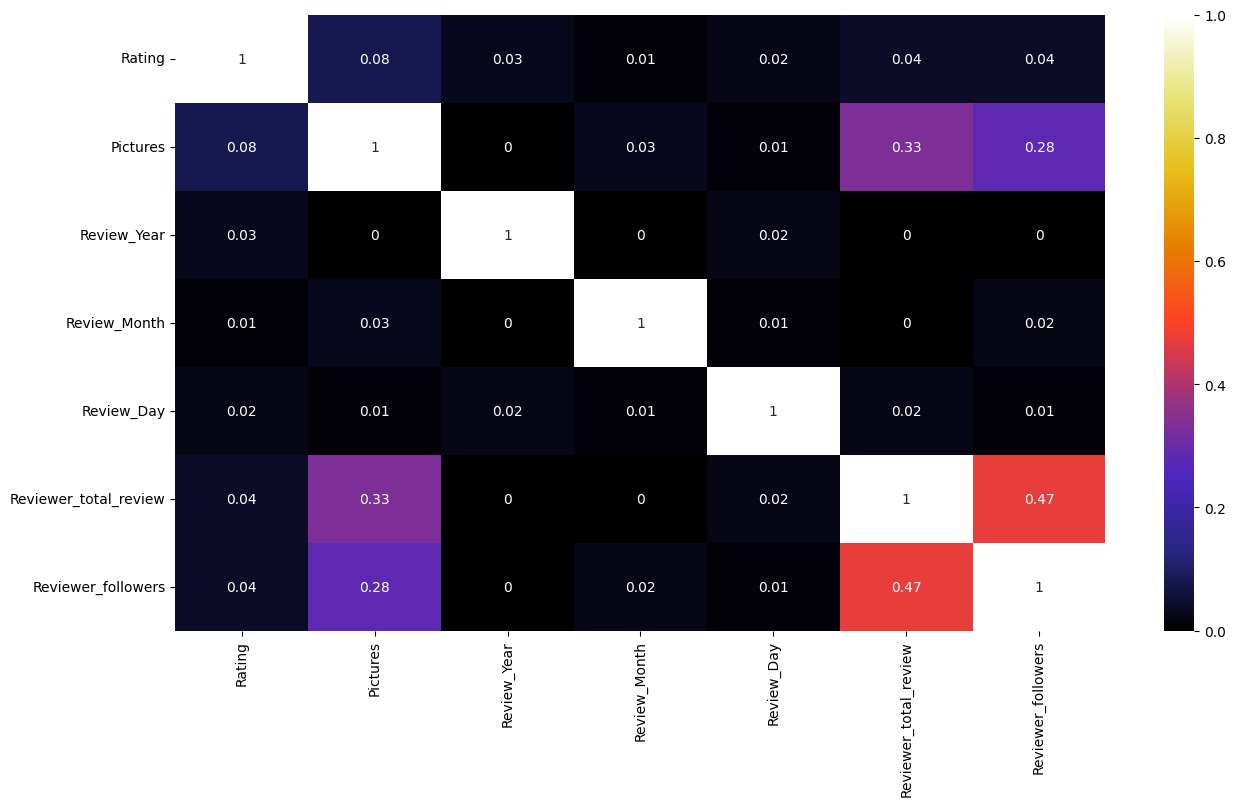

time: 556 ms (started: 2023-08-03 11:33:34 +00:00)


In [1211]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (15,8))
sns.heatmap(abs(round(df_review.corr(),2)), annot = True, cmap= plt.cm.CMRmap)

In [1212]:
# calculating the vif by excluding some features
vif_func(df_review[[i for i in df_review.describe().columns]])

var        VIF
0                 Rating   6.947463
1               Pictures   1.257779
2            Review_Year  13.889626
3           Review_Month   4.634561
4             Review_Day   4.369152
5  Reviewer_total_review   1.654539
6     Reviewer_followers   1.400371

time: 101 ms (started: 2023-08-03 11:33:35 +00:00)


##### **Cluster Dataset**

In [1213]:
cluster_df

Cost  Average_Rating  Total_Cuisine_Count  Chinese  Continental  Kebab  \
0    800               4                    6        1            1      1   
1    800               4                    3        1            0      0   
2   1300               4                    4        0            0      0   
3    800               3                    5        1            0      0   
4   1200               4                    5        1            1      0   
..   ...             ...                  ...      ...          ...    ...   
95   400               2                    2        1            0      0   
96   600               3                    3        1            0      0   
97  1750               4                    2        0            0      0   
98   400               3                    1        0            0      0   
99  1000               3                    2        1            0      0   

    European  South Indian  North Indian  Biryani  ...  Spanish  Wraps  Thai  \
0          1             1             1        0  ...        0      0     0   
1          0             0             1        1  ...        0      0     0   
2          0             0             1        0  ...        0      0     0   
3          0             0             1        1  ...        0      0     0   
4          0             0             1        0  ...        0      0     0   
..       ...           ...           ...      ...  ...      ...    ...   ...   
95         0             0             1        0  ...        0      0     0   
96         0             0             0        0  ...        0      0     0   
97         0             0             0        0  ...        0      0     0   
98         0             0             1        0  ...        0      0     0   
99         0             0             0        0  ...        0      0     0   

    Indonesian  Modern Indian  Momos  Pizza  North Eastern  Mithai  Malaysian  
0            0              0      0      0              0       0          0  
1            0              0      0      0              0       0          0  
2            0              0      0      0              0       0          0  
3            0              0      0      0              0       0          0  
4            0              0      0      0              0       0          0  
..         ...            ...    ...    ...            ...     ...        ...  
95           0              0      0      0              0       0          0  
96           0              0      0      0              0       0          0  
97           0              0      0      0              0       0          0  
98           0              0      0      0              0       0          0  
99           0              0      0      0              0       0          0  

[100 rows x 47 columns]

time: 44 ms (started: 2023-08-03 11:33:35 +00:00)


In [1214]:
# Information of cluster dataset
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Cost                 100 non-null    int64
 1   Average_Rating       100 non-null    int64
 2   Total_Cuisine_Count  100 non-null    int64
 3   Chinese              100 non-null    int64
 4   Continental          100 non-null    int64
 5   Kebab                100 non-null    int64
 6   European             100 non-null    int64
 7   South Indian         100 non-null    int64
 8   North Indian         100 non-null    int64
 9   Biryani              100 non-null    int64
 10  Asian                100 non-null    int64
 11  Mediterranean        100 non-null    int64
 12  Desserts             100 non-null    int64
 13  Seafood              100 non-null    int64
 14  Beverages            100 non-null    int64
 15  Goan                 100 non-null    int64
 16  Healthy Food         100 no

<Axes: >

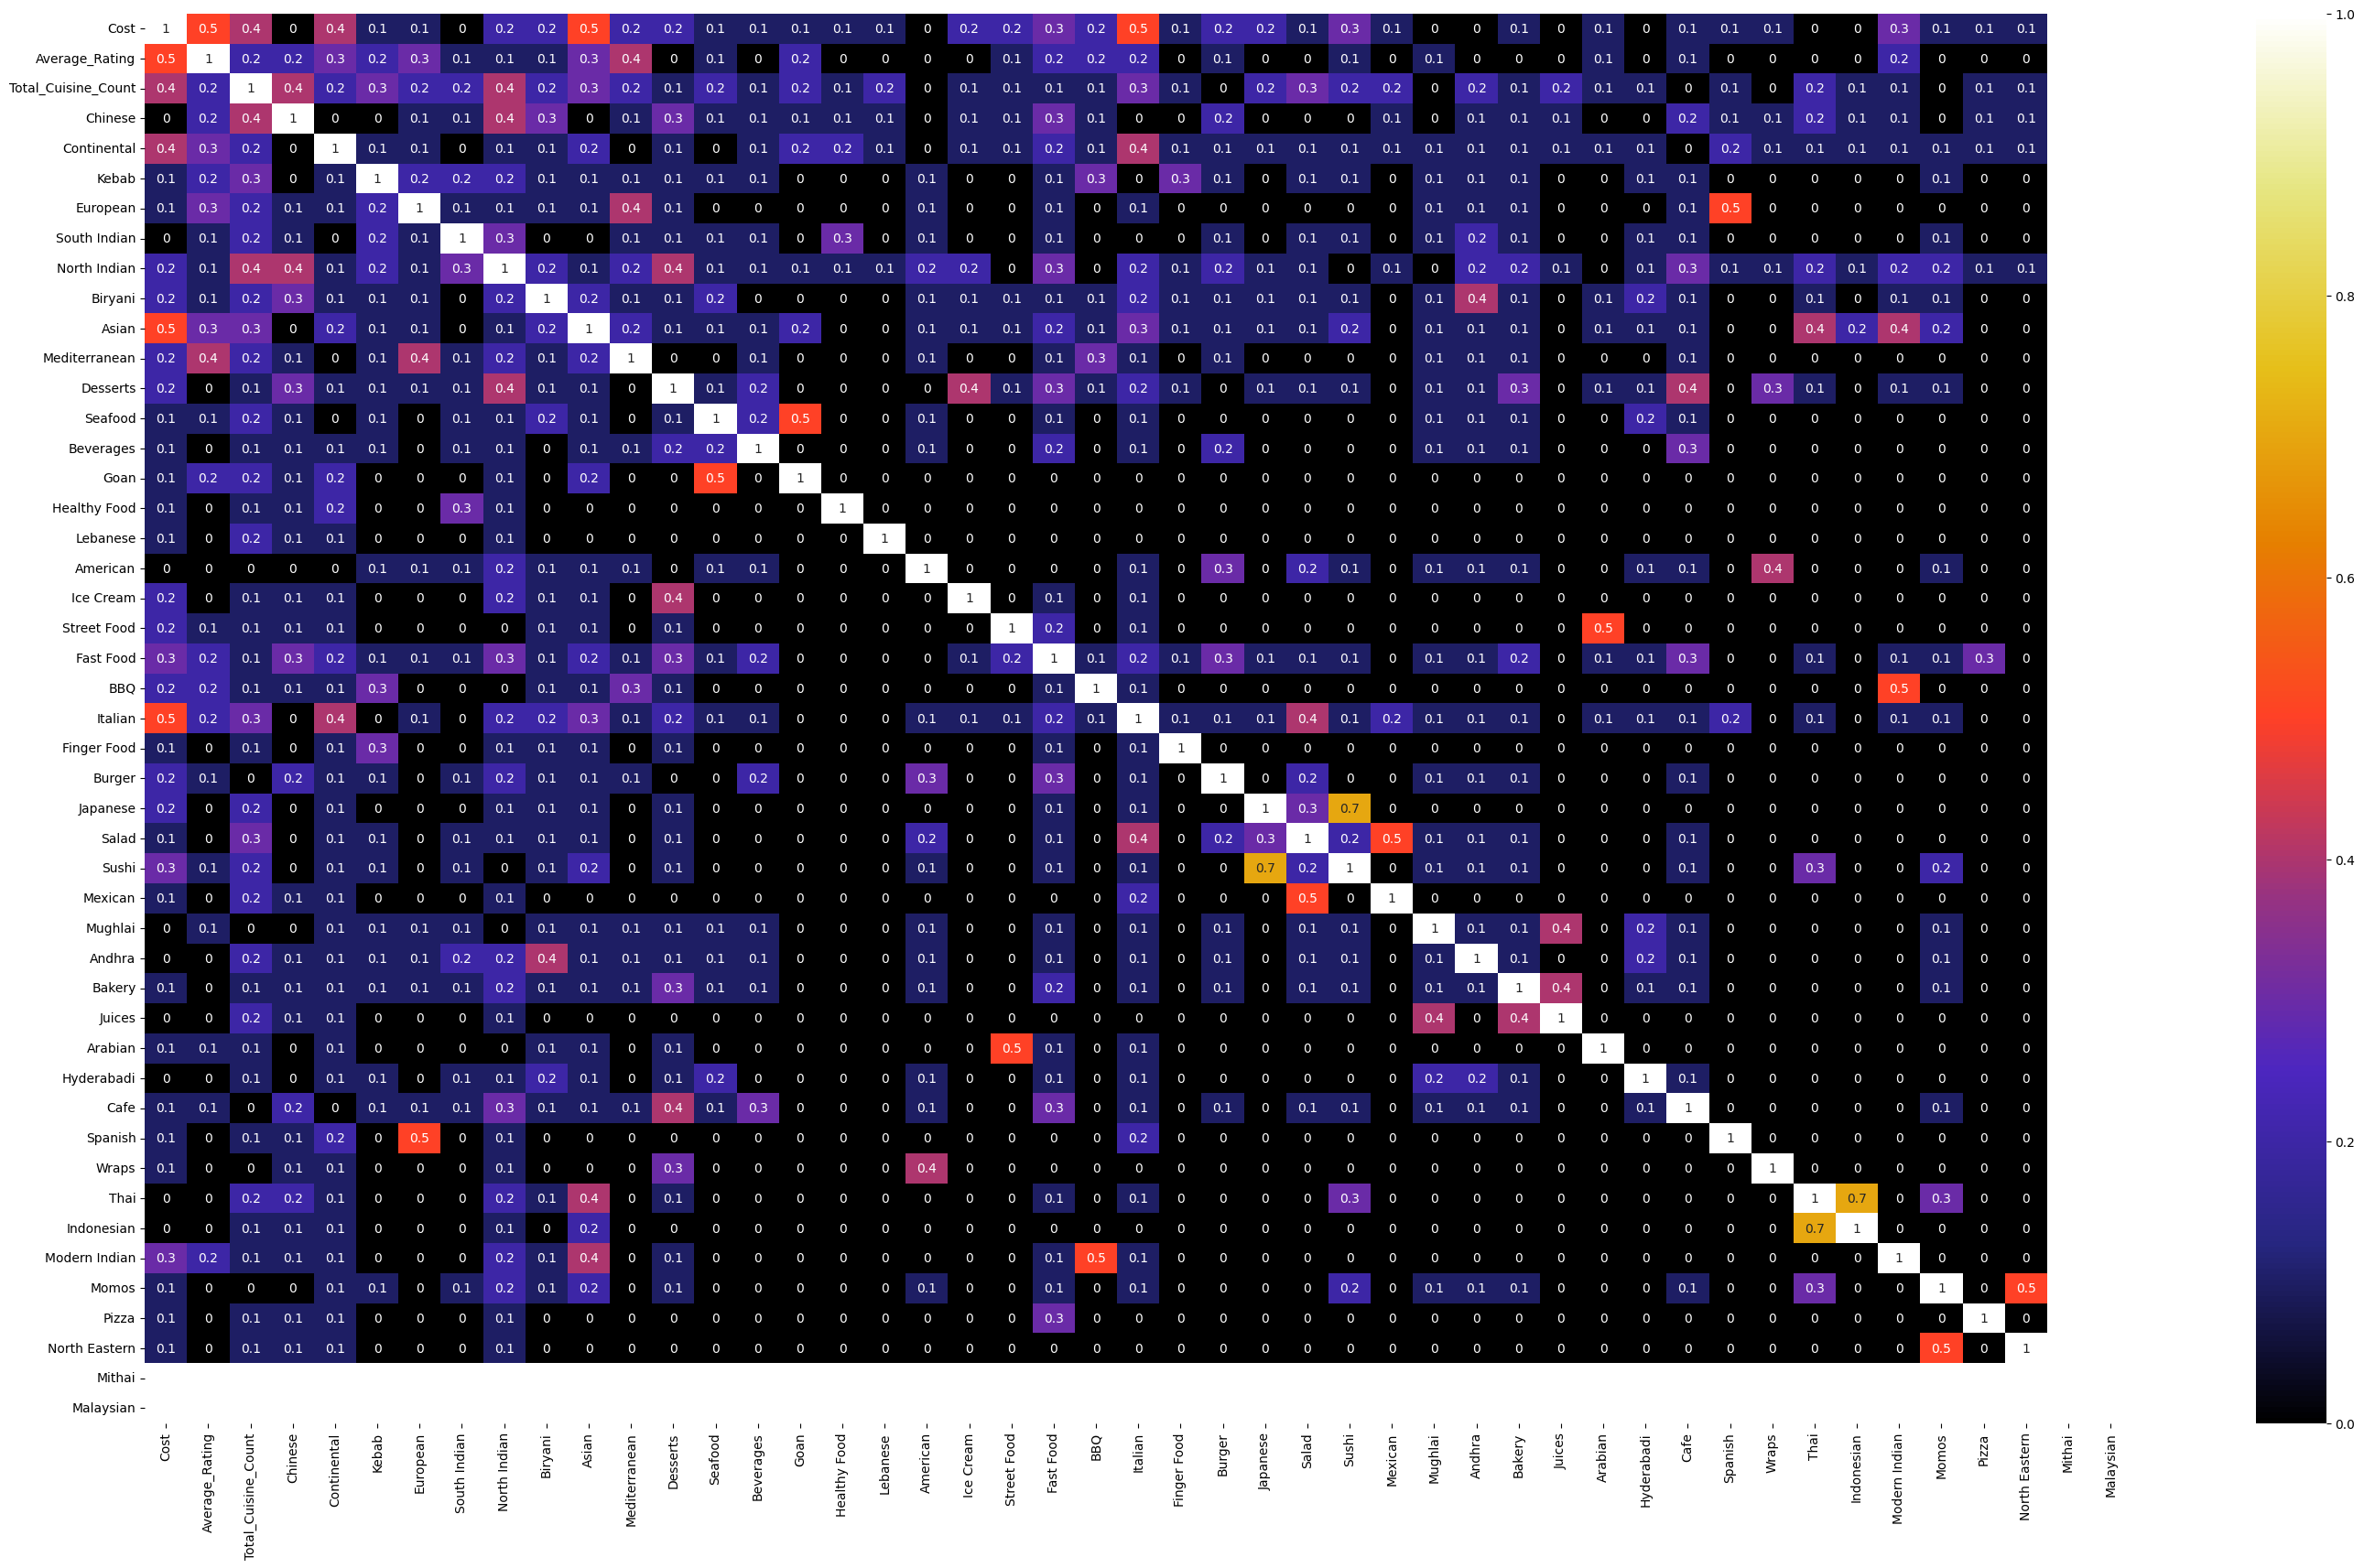

time: 5.77 s (started: 2023-08-03 11:33:35 +00:00)


In [1215]:
# Select your features wisely to avoid overfitting
plt.figure(figsize = (35,20))
sns.heatmap(abs(round(cluster_df.corr(),1)), annot = True, cmap= plt.cm.CMRmap)

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [1216]:
# Numerical columns of the cluster dummy dataset
col = [i for i in cluster_dummy.columns if cluster_dummy[i].dtypes == 'int' or cluster_dummy[i].dtypes == 'float64']
col

['Cost', 'Average_Rating', 'Total_Cuisine_Count']

time: 5.81 ms (started: 2023-08-03 11:33:41 +00:00)


In [1217]:
# Typecasting of the float data type to int datatype
for i in col:
  cluster_dummy[i] = cluster_dummy[i].astype(int)

time: 7.56 ms (started: 2023-08-03 11:33:41 +00:00)


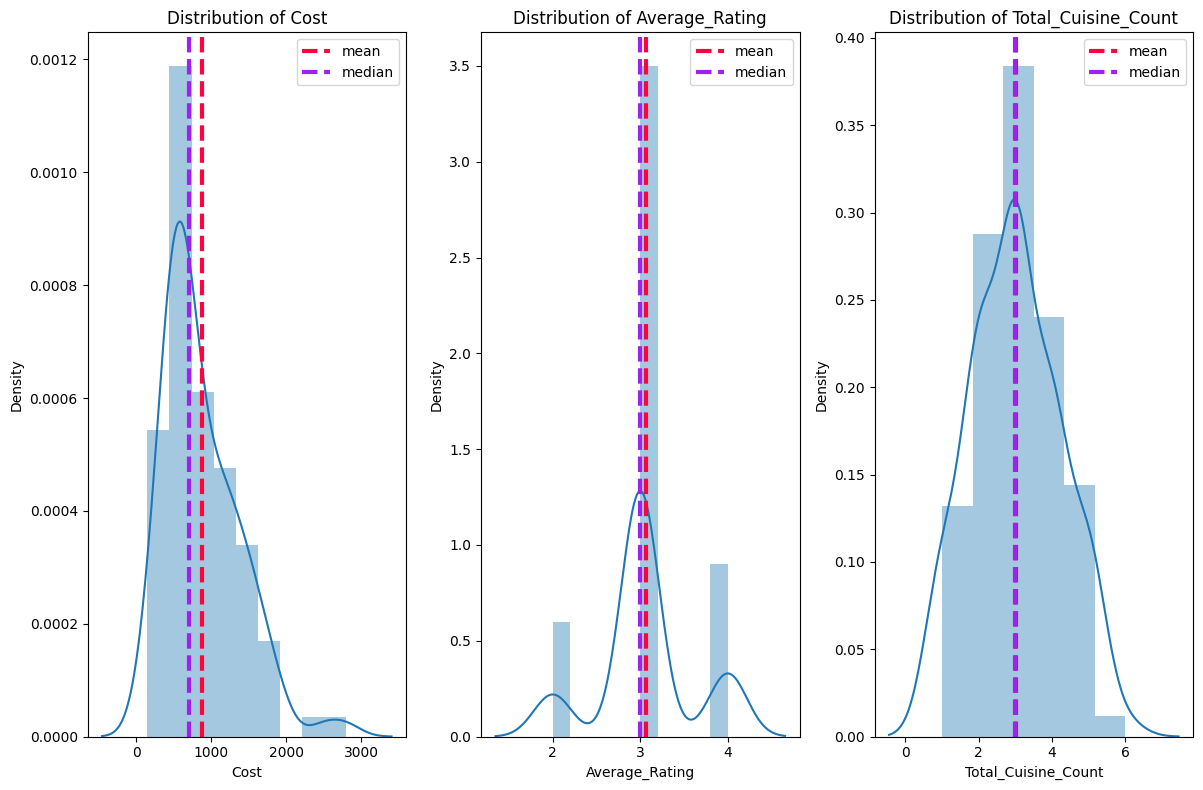

time: 1.66 s (started: 2023-08-03 11:33:41 +00:00)


In [1218]:
## Checking the distribution of each continuous feature
plt.figure(figsize= (20,8))
for n,i in enumerate(col):
  plt.subplot(1,5,n+1)
  sns.distplot(cluster_dummy[i])
  feature = cluster_dummy[i]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.title(f'Distribution of {i}')
  plt.tight_layout()

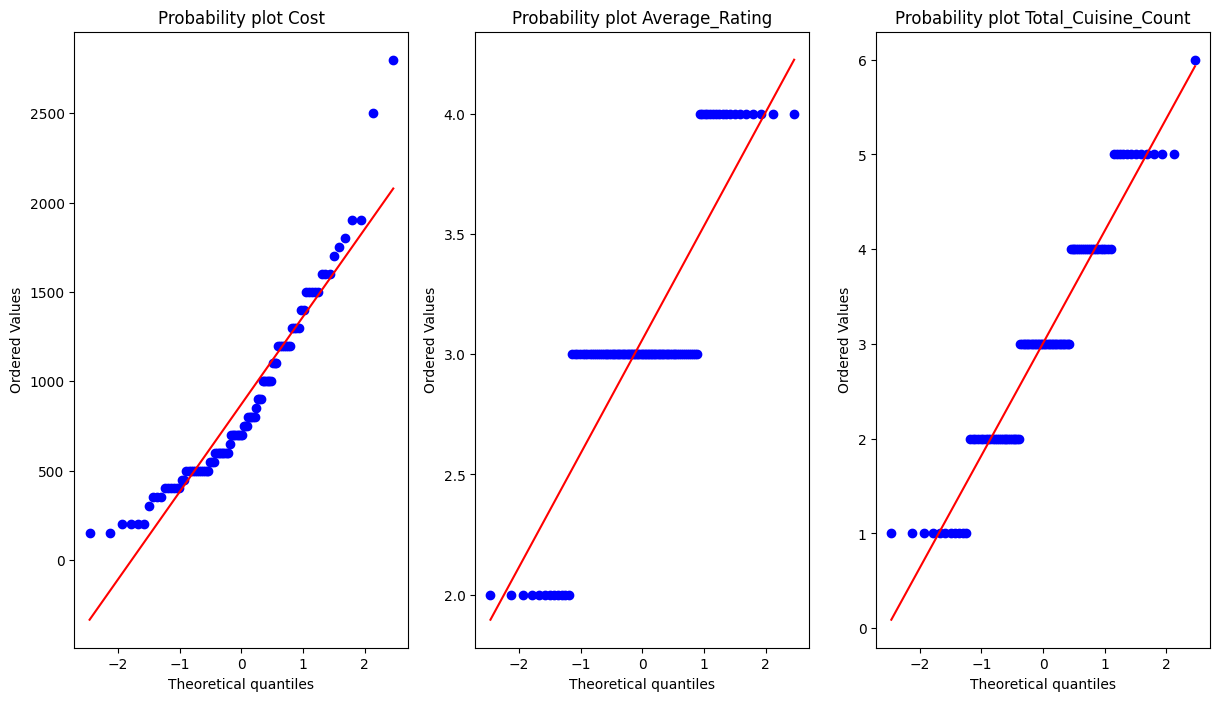

time: 975 ms (started: 2023-08-03 11:33:43 +00:00)


In [1219]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(col):
  plt.subplot(1,5,index+1)
  stat.probplot(cluster_dummy[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

In [1220]:
# Copy the final dataset into test dataset
test_df1 = cluster_dummy.copy()
test_df2 = cluster_dummy.copy()
test_df3 = cluster_dummy.copy()
test_df4 = cluster_dummy.copy()
test_df5 = cluster_dummy.copy()

time: 2.96 ms (started: 2023-08-03 11:33:44 +00:00)


#### Logrithemic transform

In [1221]:
col

['Cost', 'Average_Rating', 'Total_Cuisine_Count']

time: 6.58 ms (started: 2023-08-03 11:33:44 +00:00)


In [1222]:
# Logrithemic Transform Your data
test_df1['Cost'] = np.log(test_df1['Cost'] + 1)
test_df1['Average_Rating'] = np.log(test_df1['Average_Rating'] + 1)
test_df1['Total_Cuisine_Count'] = np.log(test_df1['Total_Cuisine_Count'] + 1)

time: 5.21 ms (started: 2023-08-03 11:33:44 +00:00)


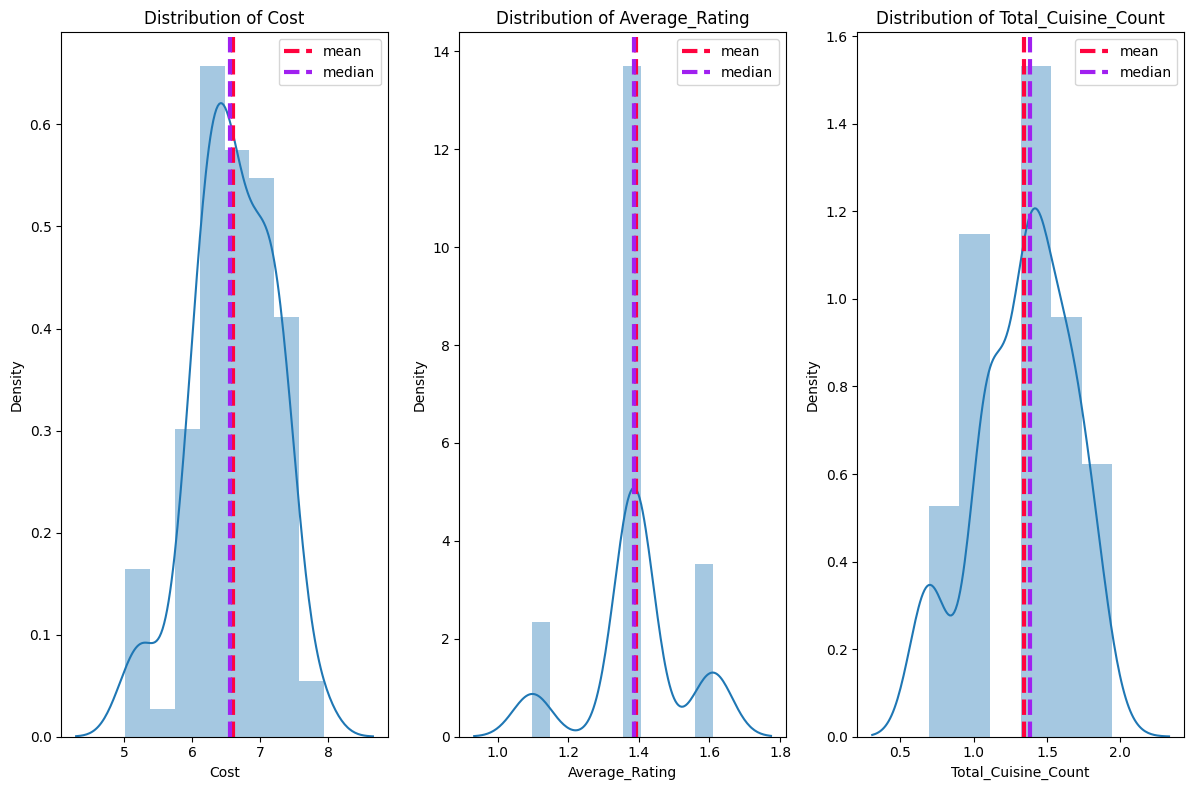

time: 2.28 s (started: 2023-08-03 11:33:44 +00:00)


In [1223]:
## Checking the distribution of each continuous feature
plt.figure(figsize= (20,8))
for n,i in enumerate(col):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df1[i])
  feature = test_df1[i]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.title(f'Distribution of {i}')
  plt.tight_layout()

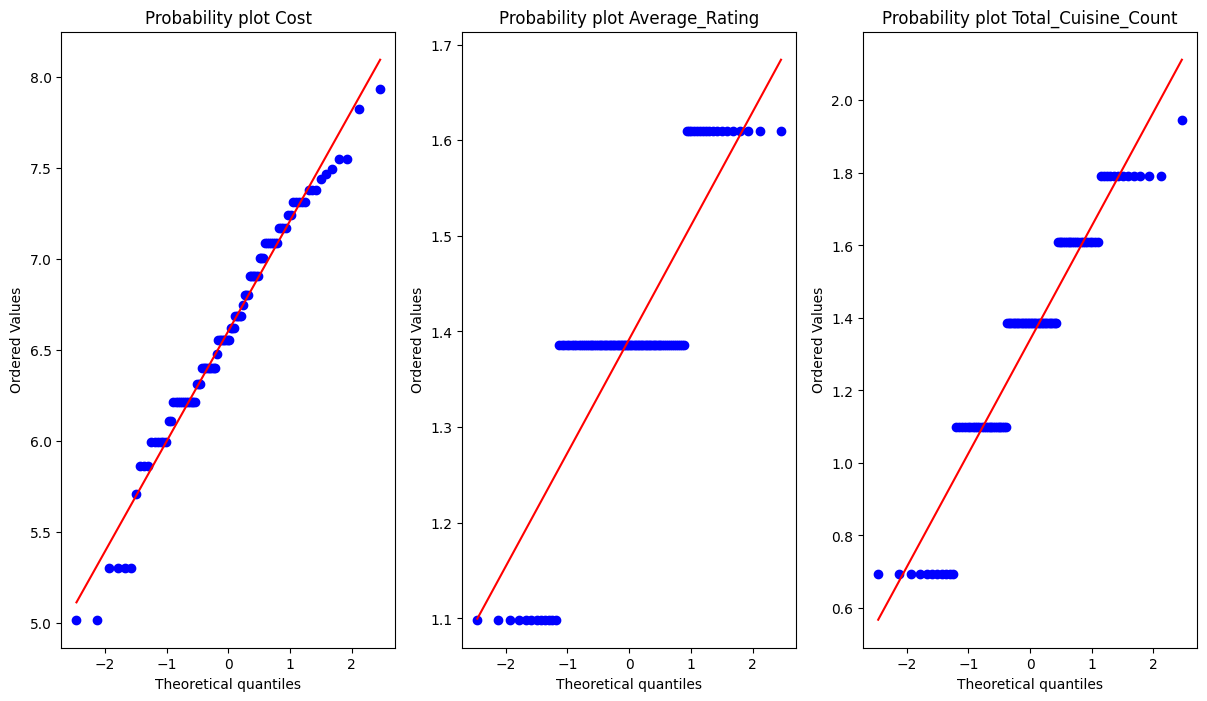

time: 1.11 s (started: 2023-08-03 11:33:46 +00:00)


In [1224]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(col):
  plt.subplot(1,5,index+1)
  stat.probplot(test_df1[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

#### Square Root transform

In [1225]:
# Convert the numerical feature datatype into in float datatype
for i in col:
  test_df3[i] = test_df3[i].astype(int)

time: 14.8 ms (started: 2023-08-03 11:33:47 +00:00)


In [1226]:
# Logrithemic Transform Your data
test_df3['Cost'] = (test_df3['Cost'])**0.5
test_df3['Average_Rating'] = (test_df3['Average_Rating'])**0.5
test_df3['Total_Cuisine_Count'] = (test_df3['Total_Cuisine_Count'])**0.5

time: 9.56 ms (started: 2023-08-03 11:33:48 +00:00)


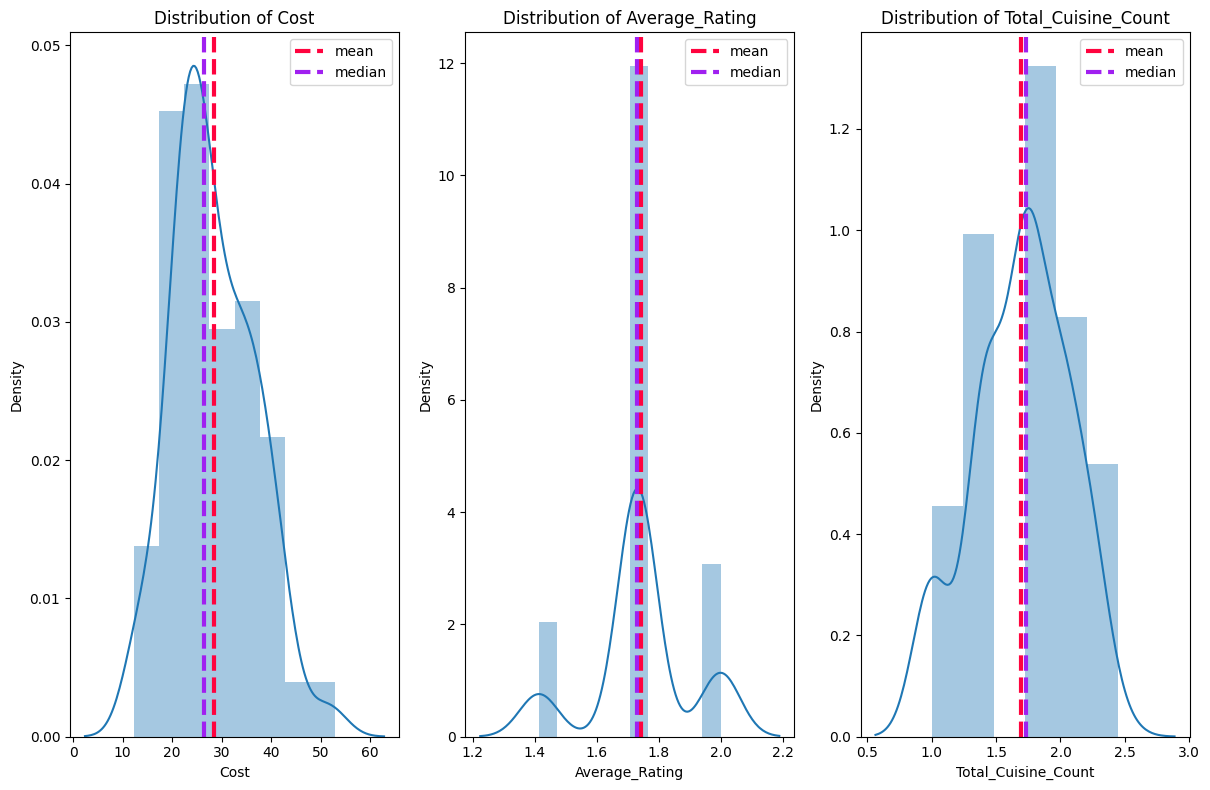

time: 5.43 s (started: 2023-08-03 11:33:48 +00:00)


In [1227]:
## Checking the distribution of each continuous feature
plt.figure(figsize= (20,8))
for n,i in enumerate(col):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df3[i])
  feature = test_df3[i]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.title(f'Distribution of {i}')
  plt.tight_layout()

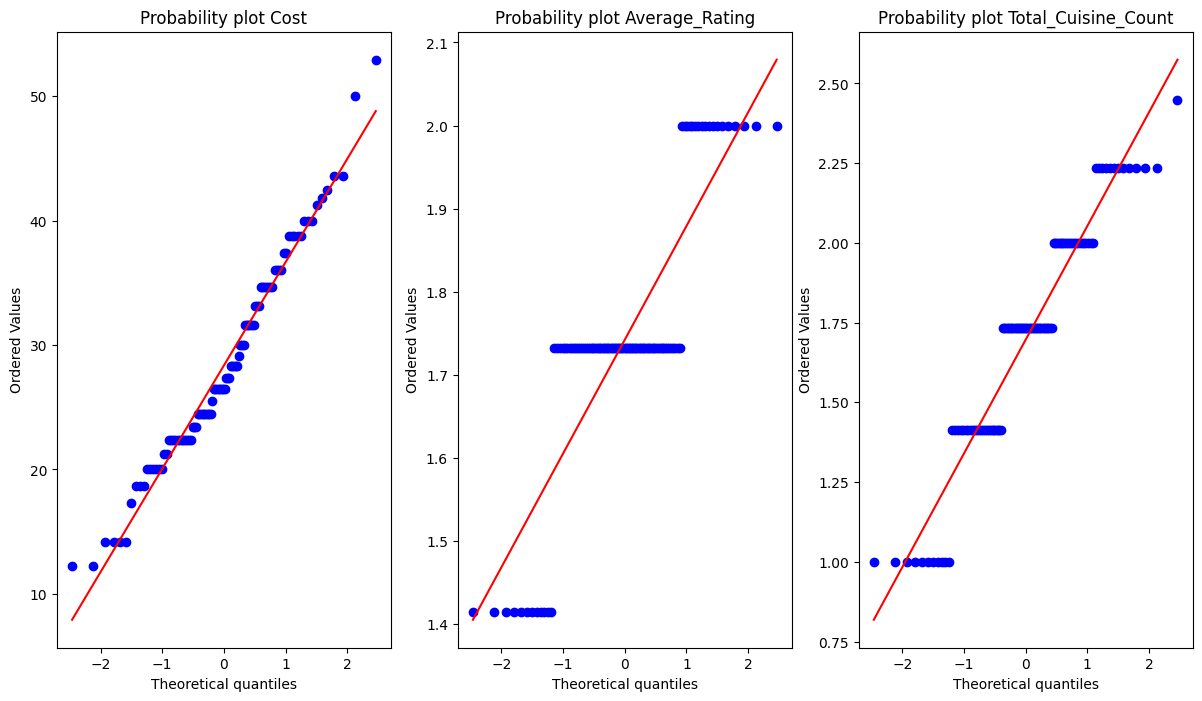

time: 849 ms (started: 2023-08-03 11:33:53 +00:00)


In [1228]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(col):
  plt.subplot(1,5,index+1)
  stat.probplot(test_df3[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

#### Reciprocal transform

In [1229]:
# Convert the numerical feature datatype into in float datatype
for i in col:
  test_df4[i] = test_df4[i].astype(int)

time: 8.3 ms (started: 2023-08-03 11:33:54 +00:00)


In [1230]:
# Logrithemic Transform Your data
test_df4['Cost'] = 1/(test_df4['Cost'])
test_df4['Average_Rating'] = 1/(test_df4['Average_Rating'])
test_df4['Total_Cuisine_Count'] = 1/(test_df4['Total_Cuisine_Count'])

time: 3.21 ms (started: 2023-08-03 11:33:54 +00:00)


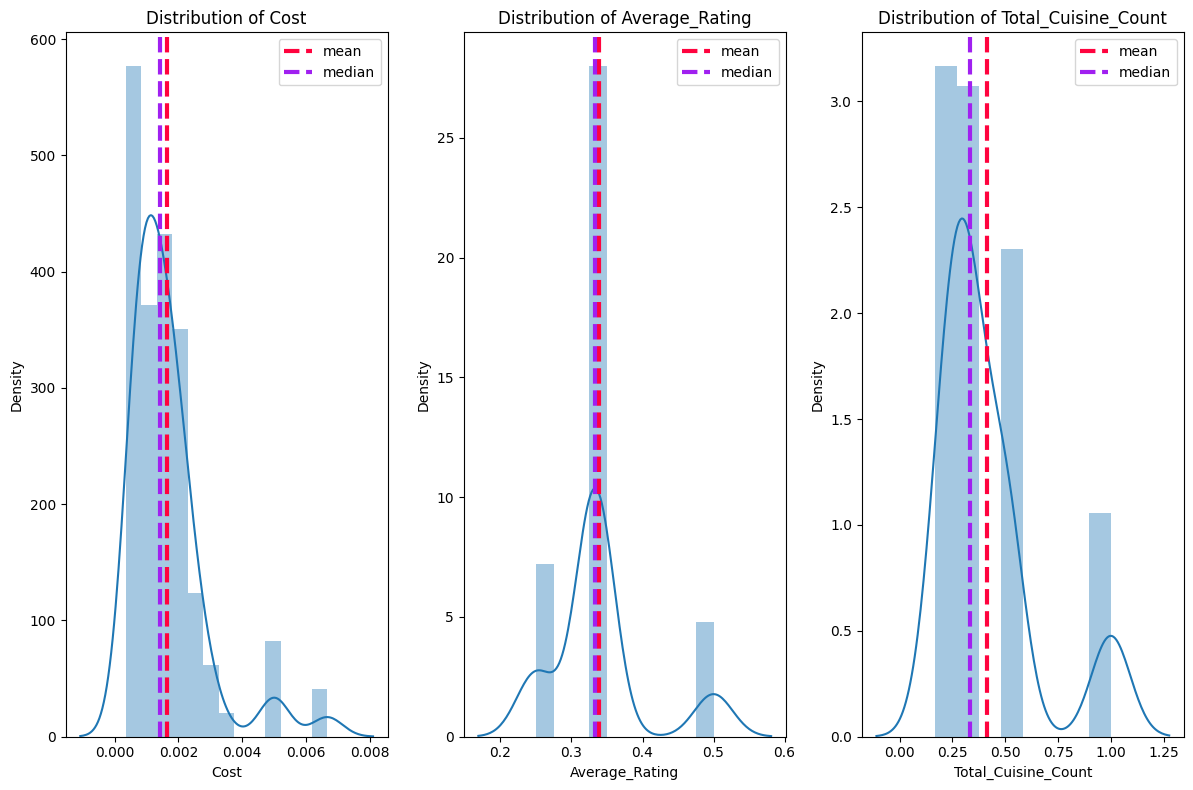

time: 1.9 s (started: 2023-08-03 11:33:54 +00:00)


In [1231]:
## Checking the distribution of each continuous feature
plt.figure(figsize= (20,8))
for n,i in enumerate(col):
  plt.subplot(1,5,n+1)
  sns.distplot(test_df4[i])
  feature = test_df4[i]
  plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
  plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
  plt.legend(bbox_to_anchor = (1.0, 1))
  plt.title(f'Distribution of {i}')
  plt.tight_layout()

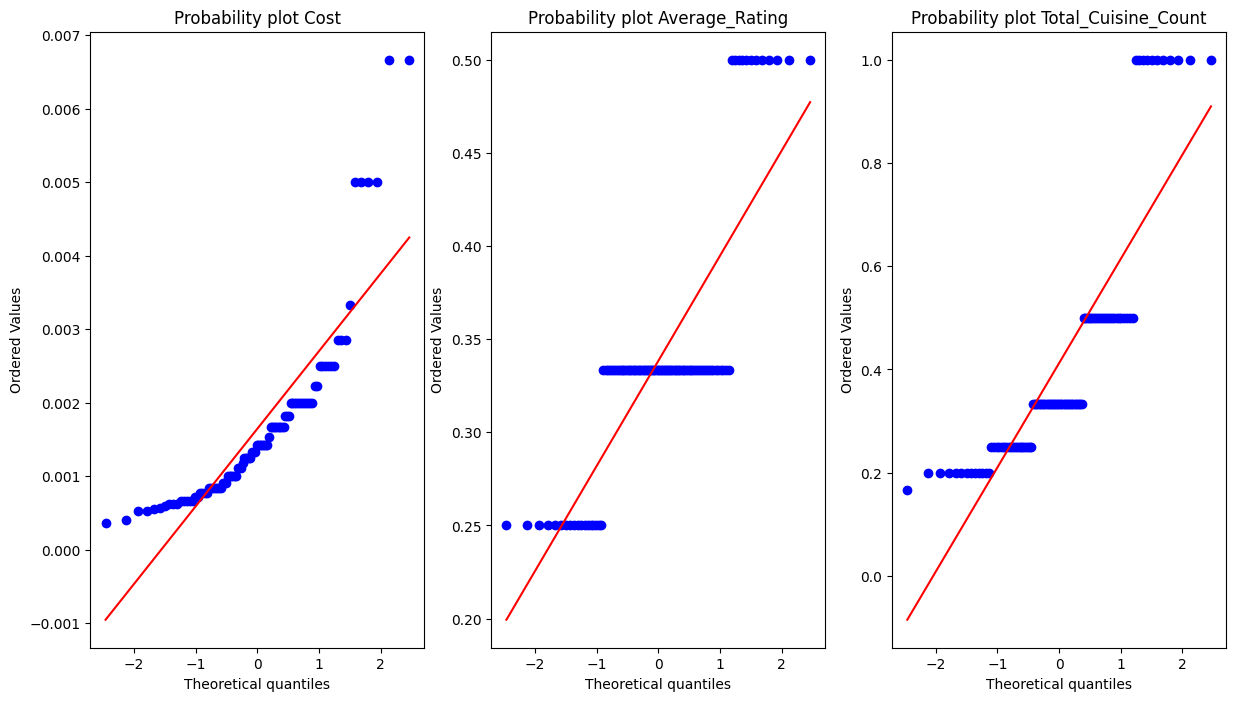

time: 996 ms (started: 2023-08-03 11:33:56 +00:00)


In [1232]:
# Import liberary for statics
import scipy.stats as stat
import pylab
# Q-Q ploting before transforming
plt.figure(figsize= (25,8))
for index,column in enumerate(col):
  plt.subplot(1,5,index+1)
  stat.probplot(test_df4[column],dist= 'norm',plot= pylab)
  plt.title(f'Probability plot {column}')
plt.show()

### 6. Data Scaling

In [1233]:
# Select 5 randomly data in the cluster dataframe
cluster_dummy.sample(5)

Restaurant  Cost  Average_Rating  Total_Cuisine_Count  \
93    Zing's Northeast Kitchen   550               3                    2   
58                    Tempteys   350               3                    2   
4   Over The Moon Brew Company  1200               4                    5   
45                 Owm Nom Nom   900               3                    4   
26      Mustang Terrace Lounge  1300               3                    5   

    American  Andhra  Arabian  Asian  BBQ  Bakery  ...  North Indian  Pizza  \
93         0       0        0      0    0       0  ...             0      0   
58         0       0        0      0    0       0  ...             0      0   
4          0       0        0      1    0       0  ...             1      0   
45         0       1        0      0    0       0  ...             1      0   
26         0       0        0      0    0       0  ...             1      0   

    Salad  Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
93      0        0             0        0            0      0     0      0  
58      0        0             0        0            0      0     0      0  
4       0        0             0        0            0      0     0      0  
45      0        0             0        0            0      0     0      0  
26      1        0             0        0            0      0     0      0  

[5 rows x 48 columns]

time: 37.4 ms (started: 2023-08-03 11:33:57 +00:00)


In [1234]:
# Import Scaling liberary
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

time: 770 µs (started: 2023-08-03 11:33:57 +00:00)


In [1235]:
# Scaling your data
scaler.fit(cluster_dummy[col])
scaled_df = cluster_dummy.copy()
scaled_df[col] = scaler.transform(cluster_dummy[col])

time: 9.62 ms (started: 2023-08-03 11:33:57 +00:00)


In [1236]:
# First view of scaled dataset
scaled_df

Restaurant      Cost  Average_Rating  \
0                   Beyond Flavours -0.143026        1.726588   
1                          Paradise -0.143026        1.726588   
2                          Flechazo  0.850211        1.726588   
3    Shah Ghouse Hotel & Restaurant -0.143026       -0.110208   
4        Over The Moon Brew Company  0.651564        1.726588   
..                              ...       ...             ...   
95                       Desi Bytes -0.937616       -1.947004   
96                Hyderabadi Daawat -0.540321       -0.110208   
97  Zega - Sheraton Hyderabad Hotel  1.744125        1.726588   
98                         Triptify -0.937616       -0.110208   
99                 Chinese Pavilion  0.254269       -0.110208   

    Total_Cuisine_Count  American  Andhra  Arabian  Asian  BBQ  Bakery  ...  \
0              2.483145         0       0        0      0    0       0  ...   
1             -0.008305         0       0        0      0    0       0  ...   
2              0.822179         0       0        0      1    0       0  ...   
3              1.652662         0       0        0      0    0       0  ...   
4              1.652662         0       0        0      1    0       0  ...   
..                  ...       ...     ...      ...    ...  ...     ...  ...   
95            -0.838788         0       0        0      0    0       0  ...   
96            -0.008305         0       0        0      0    0       0  ...   
97            -0.838788         0       0        0      1    0       0  ...   
98            -1.669272         0       0        0      0    0       0  ...   
99            -0.838788         0       0        0      0    0       0  ...   

    North Indian  Pizza  Salad  Seafood  South Indian  Spanish  Street Food  \
0              1      0      0        0             1        0            0   
1              1      0      0        0             0        0            0   
2              1      0      0        0             0        0            0   
3              1      0      0        1             0        0            0   
4              1      0      0        0             0        0            0   
..           ...    ...    ...      ...           ...      ...          ...   
95             1      0      0        0             0        0            0   
96             0      0      0        0             0        0            0   
97             0      0      0        0             0        0            0   
98             1      0      0        0             0        0            0   
99             0      0      0        1             0        0            0   

    Sushi  Thai  Wraps  
0       0     0      0  
1       0     0      0  
2       0     0      0  
3       0     0      0  
4       0     0      0  
..    ...   ...    ...  
95      0     0      0  
96      0     0      0  
97      1     0      0  
98      0     0      0  
99      0     0      0  

[100 rows x 48 columns]

time: 53 ms (started: 2023-08-03 11:33:57 +00:00)


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [1237]:
# import principal component analysis liberary
from sklearn.decomposition import PCA
pca = PCA()

time: 799 µs (started: 2023-08-03 11:33:57 +00:00)


In [1238]:
# DImensionality Reduction (If needed)
scaled_df.set_index(['Restaurant'],inplace = True)
pca.fit(scaled_df)

PCA()

time: 34.8 ms (started: 2023-08-03 11:33:57 +00:00)


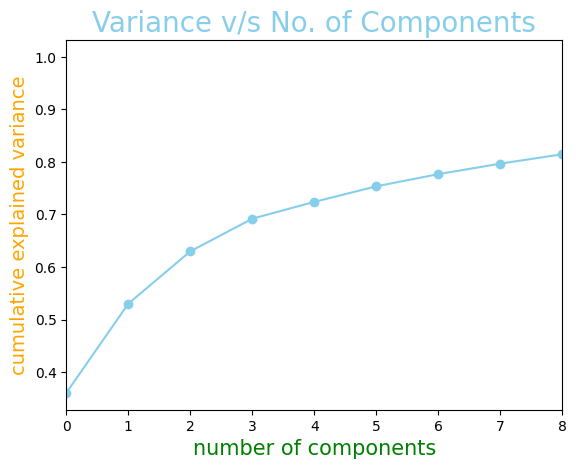

time: 486 ms (started: 2023-08-03 11:33:57 +00:00)


In [1239]:
#explained variance v/s number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color= 'skyblue')
plt.xlabel('number of components',size = 15, color = 'green')
plt.ylabel('cumulative explained variance',size = 14, color = 'orange')
plt.title('Variance v/s No. of Components',size = 20, color = 'skyblue')
plt.xlim([0, 8])
plt.show()

In [1240]:
# using n_component = 5
pca = PCA(n_components = 5)

# fit PCA on feature
pca.fit(scaled_df)

# Explained varience ratio of each pricipal componenet
print(f'Explained variation per principal component: {pca.explained_variance_ratio_}')
# Variance explained by five componenet
print(f'Cumulative variance explained by 5 principal components: {round(np.sum(pca.explained_variance_ratio_),2)}')
# transform data to principal component space
df_pca = pca.transform(scaled_df)

Explained variation per principal component: [0.36028996 0.16978646 0.09973793 0.06220322 0.03200214]
Cumulative variance explained by 5 principal components: 0.72
time: 32.7 ms (started: 2023-08-03 11:33:58 +00:00)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [1241]:
# Split your data to train and test. Choose Splitting ratio wisely.
X = X_tfidf
y = sentiment_df['sentiment']

time: 840 µs (started: 2023-08-03 11:33:58 +00:00)


In [1242]:
# Import liberary
from sklearn.model_selection import train_test_split
x_tr,x_tst,y_tr,y_tst = train_test_split(X,y)

time: 12.9 ms (started: 2023-08-03 11:33:58 +00:00)


In [1243]:
# Describe the shape of the train and test dataset
print('Shape of the X train dataset : ',x_tr.shape)
print('Shape of the X test dataset :  ',x_tst.shape)
print('Shape of the y train dataset : ',y_tr.shape)
print('Shape of the y test dataset :  ',y_tst.shape)

Shape of the X train dataset :  (7471, 17327)
Shape of the X test dataset :   (2491, 17327)
Shape of the y train dataset :  (7471,)
Shape of the y test dataset :   (2491,)
time: 16.6 ms (started: 2023-08-03 11:33:58 +00:00)


##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [1244]:
# Handling Imbalanced Dataset (If needed)
a = sentiment_df.sentiment.value_counts().reset_index()
a.columns = ['Sentiment','Counts']

time: 7.22 ms (started: 2023-08-03 11:33:58 +00:00)


In [1245]:
# Defining the majority and minority value
majority_class = sentiment_df[sentiment_df['sentiment'] == 1].shape[0]
minority_class = sentiment_df[sentiment_df['sentiment'] == 0].shape[0]

time: 6.1 ms (started: 2023-08-03 11:33:58 +00:00)


In [1246]:
# Checking the value of the CIR to reach the problem that Class is inbalance or not
CIR = majority_class / minority_class
print(round(CIR,2))
print('\n')

1.7


time: 6.95 ms (started: 2023-08-03 11:33:58 +00:00)


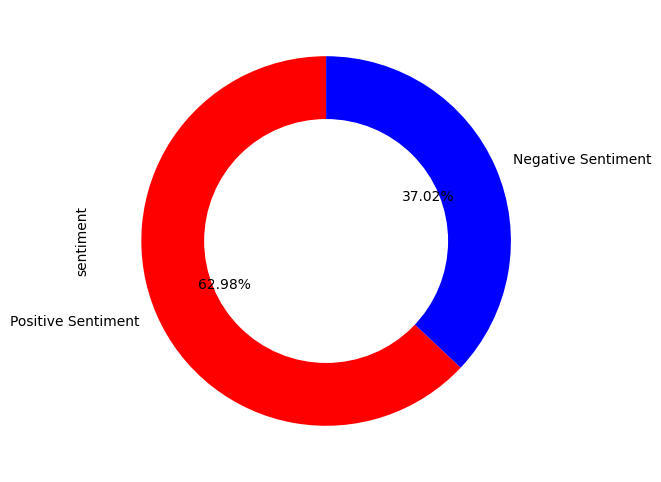

time: 206 ms (started: 2023-08-03 11:33:58 +00:00)


In [1247]:
# Dependant Variable Column Visualization
sentiment_df['sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.2f%%",
                               startangle= 90,
                               shadow=False,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               colors=['red','blue'],
                               explode=[0,0]
                              )
centre_circle = plt.Circle((0, 0), 0.66, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1 (Cluster Analysis)

K-Means Clustering is an Unsupervised Learning algorithm.The algorithm takes the unlabeled dataset as input, divides the dataset into k-number of clusters, and repeats the process until it does not find the best clusters. The value of k should be predetermined in this algorithm.

It is a centroid-based algorithm, where each cluster is associated with a centroid. The main aim of this algorithm is to minimize the sum of distances between the data point and their corresponding clusters.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

**ELBOW METHOD**

> This method uses the concept of WCSS value. WCSS stands for Within Cluster Sum of Squares, which defines the total variations within a cluster.

**SILHOUETTE METHOD**

> The silhouette coefficient or silhouette score kmeans is a measure of how similar a data point is within-cluster (cohesion) compared to other clusters (separation).

In [1248]:
# Import K-Means Liberary
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

time: 710 µs (started: 2023-08-03 11:33:58 +00:00)


In [1249]:
#Within Cluster Sum of Squared Errors(CSSE) for different values of k
csse=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,random_state = 20)
    km.fit(df_pca)
    csse.append(km.inertia_)

time: 215 ms (started: 2023-08-03 11:33:58 +00:00)


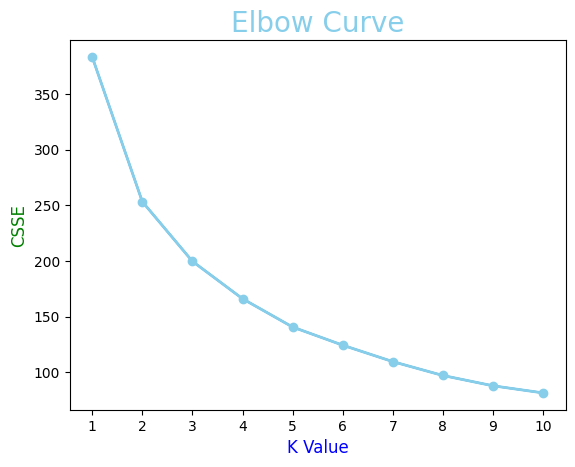

time: 286 ms (started: 2023-08-03 11:33:58 +00:00)


In [1250]:
#elbow curve
plt.plot(range(1,11),csse)
plt.plot(range(1,11),csse, linewidth=2, color="skyblue", marker ="o")
plt.xlabel("K Value", size = 12, color = 'blue')
plt.xticks(np.arange(1,11,1))
plt.ylabel("CSSE", size = 12, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'skyblue')
plt.show()

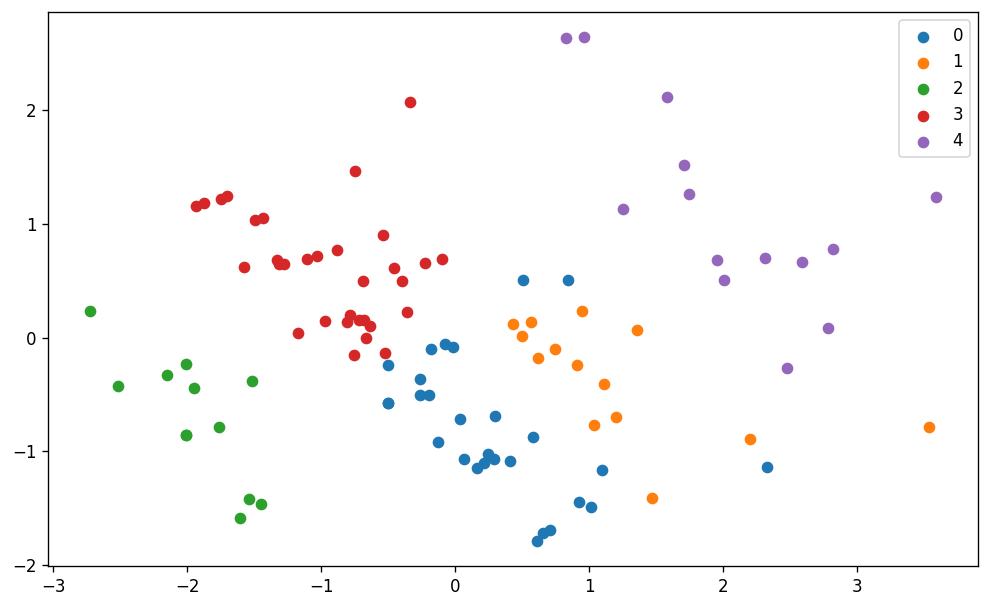

time: 402 ms (started: 2023-08-03 11:33:59 +00:00)


In [1251]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 5, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)

#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)
plt.legend()
plt.show()

In [1252]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(5)

PC1       PC2       PC3       PC4       PC5  label
Restaurant                                                                    
The Fisherman's Wharf  2.781409  0.084753 -0.522480  0.317012 -0.055196      4
Olive Garden           0.290829 -1.067411 -0.358766 -0.462586  0.100144      0
eat.fit                0.033403 -0.720385 -0.620415  0.040950 -0.921287      0
GD's                  -1.103947  0.688703 -0.250994  0.301978  0.055410      3
Tempteys              -1.317683  0.650820 -0.541817  0.550750  0.063189      3

time: 22 ms (started: 2023-08-03 11:33:59 +00:00)


In [1253]:
#joining the cluster labels to names dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(5)

Cost  Average_Rating  \
Restaurant                                                   
Behrouz Biryani                        600               2   
Marsala Food Company                   700               3   
Frio Bistro                           1200               3   
Mohammedia Shawarma                    150               2   
Collage - Hyatt Hyderabad Gachibowli  2800               3   

                                      Total_Cuisine_Count  American  Andhra  \
Restaurant                                                                    
Behrouz Biryani                                         2         0       0   
Marsala Food Company                                    3         0       0   
Frio Bistro                                             4         0       0   
Mohammedia Shawarma                                     2         0       0   
Collage - Hyatt Hyderabad Gachibowli                    5         0       0   

                                      Arabian  Asian  BBQ  Bakery  Beverages  \
Restaurant                                                                     
Behrouz Biryani                             0      0    0       0          0   
Marsala Food Company                        1      0    0       0          0   
Frio Bistro                                 0      0    0       0          0   
Mohammedia Shawarma                         1      0    0       0          0   
Collage - Hyatt Hyderabad Gachibowli        0      1    0       0          0   

                                      ...  Pizza  Salad  Seafood  \
Restaurant                            ...                          
Behrouz Biryani                       ...      0      0        0   
Marsala Food Company                  ...      0      0        0   
Frio Bistro                           ...      0      0        0   
Mohammedia Shawarma                   ...      0      0        0   
Collage - Hyatt Hyderabad Gachibowli  ...      0      0        0   

                                      South Indian  Spanish  Street Food  \
Restaurant                                                                 
Behrouz Biryani                                  0        0            0   
Marsala Food Company                             0        0            0   
Frio Bistro                                      0        1            0   
Mohammedia Shawarma                              0        0            1   
Collage - Hyatt Hyderabad Gachibowli             0        0            0   

                                      Sushi  Thai  Wraps  label  
Restaurant                                                       
Behrouz Biryani                           0     0      0      2  
Marsala Food Company                      0     0      0      0  
Frio Bistro                               0     0      0      1  
Mohammedia Shawarma                       0     0      0      2  
Collage - Hyatt Hyderabad Gachibowli      0     0      0      1  

[5 rows x 48 columns]

time: 36.7 ms (started: 2023-08-03 11:33:59 +00:00)


In [1254]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = df_restaurant[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

Restaurant  \
0                 Beyond Flavours   
1                        Paradise   
2                        Flechazo   
3  Shah Ghouse Hotel & Restaurant   
4      Over The Moon Brew Company   

                                            Cuisines  Cost  Average_Rating  \
0  Chinese, Continental, Kebab, European, South I...   800               4   
1                     Biryani, North Indian, Chinese   800               4   
2       Asian, Mediterranean, North Indian, Desserts  1300               4   
3  Biryani, North Indian, Chinese, Seafood, Bever...   800               3   
4  Asian, Continental, North Indian, Chinese, Med...  1200               4   

   Total_Cuisine_Count  label  
0                    6      0  
1                    3      0  
2                    4      4  
3                    5      0  
4                    5      4

time: 17.9 ms (started: 2023-08-03 11:33:59 +00:00)


In [1255]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

label  Total_Restaurant
4      2                12
2      4                14
3      1                14
1      0                28
0      3                32

time: 13 ms (started: 2023-08-03 11:33:59 +00:00)


In [1256]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

Restaurant      Cuisines  Cost  Average_Rating  \
84                     T Grill       Biryani   700               3   
71           Eat India Company  North Indian  1300               3   
70  Urban Asia - Kitchen & Bar         Asian  1100               3   
9                  Cream Stone     Ice Cream   350               3   
40                 Frio Bistro       Spanish  1200               3   

    Total_Cuisine_Count  label  
84                    4      0  
71                    3      1  
70                    5      0  
9                     2      3  
40                    4      1

time: 19.8 ms (started: 2023-08-03 11:33:59 +00:00)


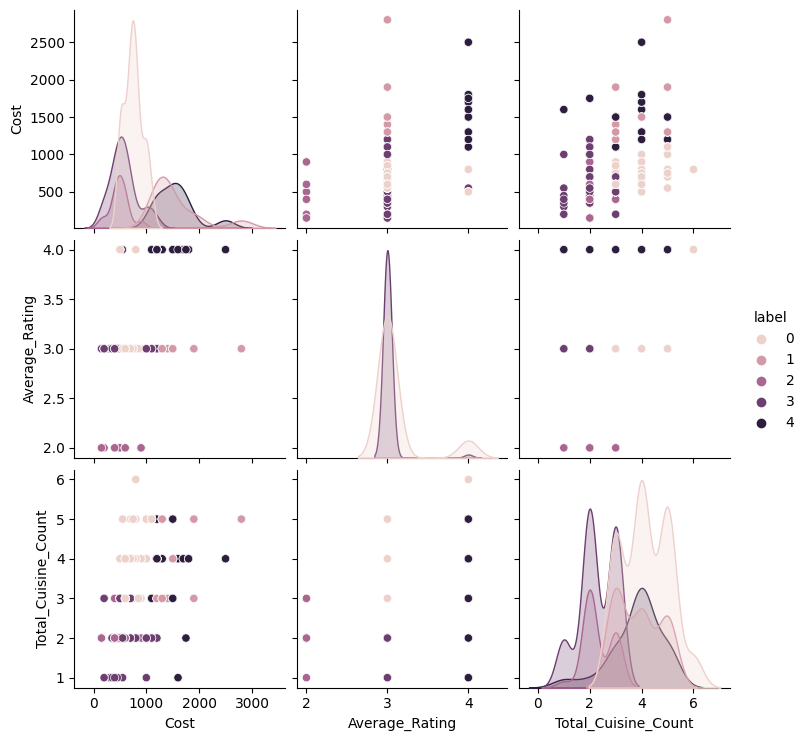

time: 5.86 s (started: 2023-08-03 11:33:59 +00:00)


In [1257]:
sns.pairplot(new_cluster_df,diag_kind = 'kde', hue='label')

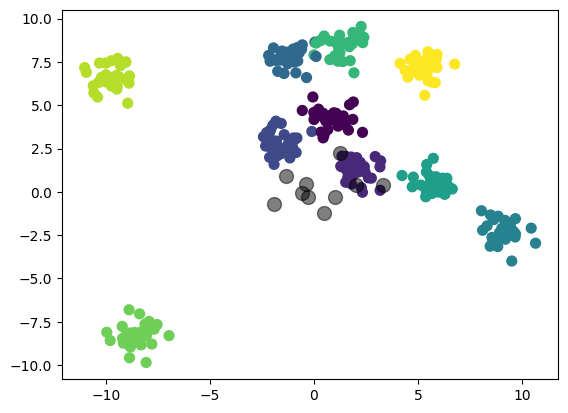

time: 479 ms (started: 2023-08-03 11:34:05 +00:00)


In [1258]:
for i in range(1,20):
    points = np.array(new_cluster_df.loc[new_cluster_df['label'] == i])

points

#from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=10,
                       cluster_std=0.60, random_state=0)
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y_true, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

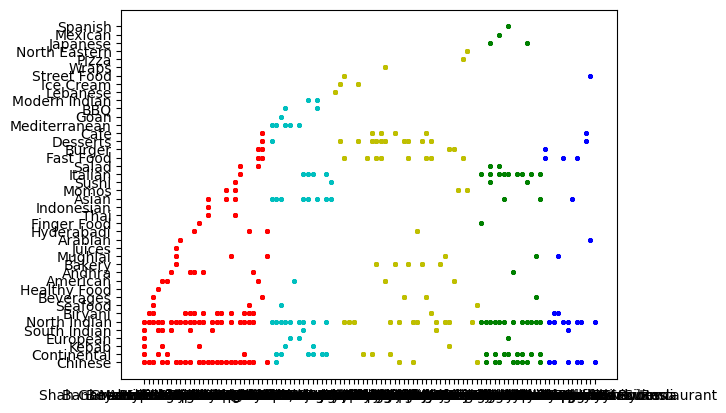

time: 3.97 s (started: 2023-08-03 11:34:06 +00:00)


In [1259]:
colors = ['r', 'g', 'b', 'y', 'c']
fig, ax = plt.subplots()
c = np.array([3,3])

for i in label:
        points = np.array(new_cluster_df.loc[new_cluster_df['label'] == i])
        #c[i] = np.mean(points, axis=0)
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])

In [1260]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('='*120)

Cuisine List for Cluster : 0 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Biryani' 'Seafood' 'Beverages' 'Healthy Food' 'American' 'Andhra'
 'Bakery' 'Mughlai' 'Juices' 'Arabian' 'Hyderabadi' 'Finger Food' 'Thai'
 'Indonesian' 'Asian' 'Momos' 'Sushi' 'Italian' 'Salad' 'Fast Food'
 'Burger' 'Desserts' 'Cafe'] 

Cuisine List for Cluster : 4 

['Asian' 'Mediterranean' 'North Indian' 'Desserts' 'Continental' 'Chinese'
 'Seafood' 'Goan' 'Kebab' 'BBQ' 'European' 'American' 'Italian'
 'South Indian' 'Modern Indian' 'Sushi'] 

Cuisine List for Cluster : 3 

['Lebanese' 'Ice Cream' 'Desserts' 'Street Food' 'North Indian'
 'Fast Food' 'Continental' 'Cafe' 'Bakery' 'American' 'Wraps' 'Chinese'
 'Beverages' 'Hyderabadi' 'Biryani' 'South Indian' 'Mughlai' 'Burger'
 'Kebab' 'Momos' 'Pizza' 'North Eastern' 'Seafood'] 

Cuisine List for Cluster : 1 

['North Indian' 'Italian' 'Finger Food' 'Chinese' 'Continental' 'Japanese'
 'Salad' 'Sushi' 'Mexican' 'Asian' 'European'

For n_clusters = 2 average silhouette_score is : 0.2971178700222362
For n_clusters = 3 average silhouette_score is : 0.27099365756216526
For n_clusters = 4 average silhouette_score is : 0.29571080398869015
For n_clusters = 5 average silhouette_score is : 0.30940576619002574
For n_clusters = 6 average silhouette_score is : 0.308291102354189
For n_clusters = 7 average silhouette_score is : 0.29856369856530024
For n_clusters = 8 average silhouette_score is : 0.31891370536512087
For n_clusters = 9 average silhouette_score is : 0.3327552631781031


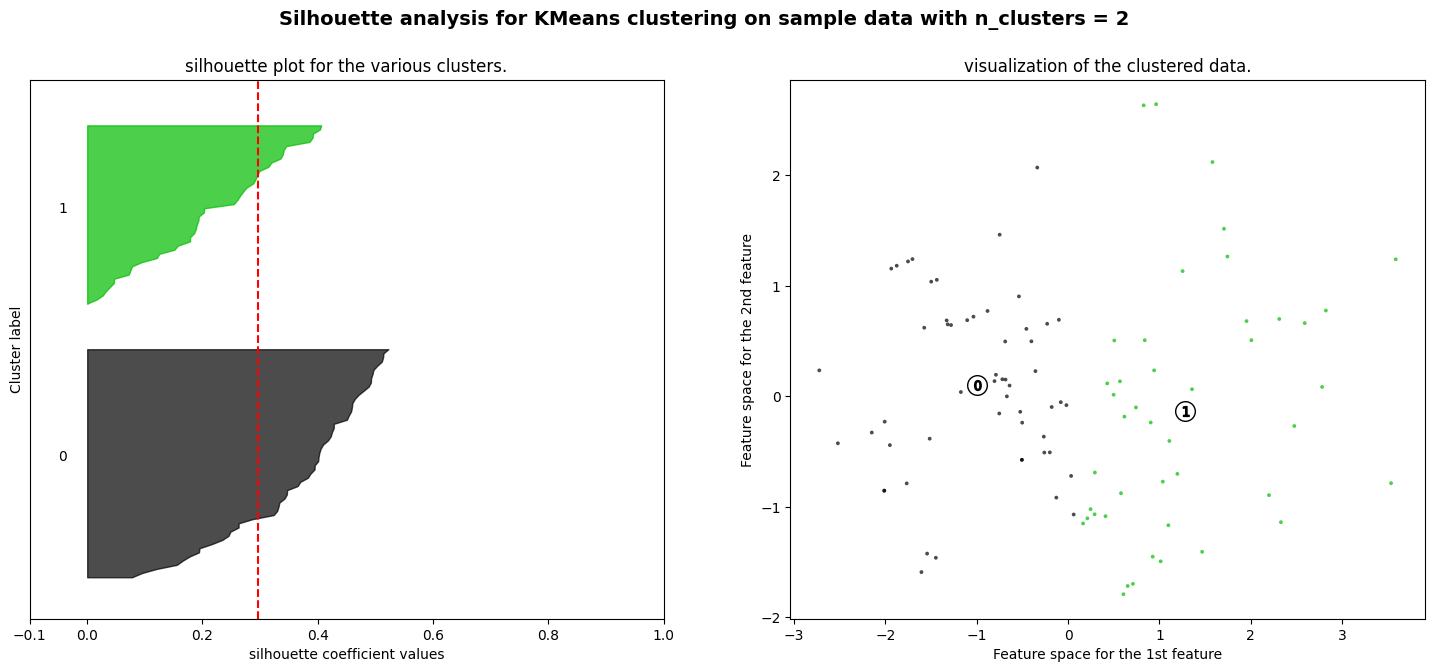

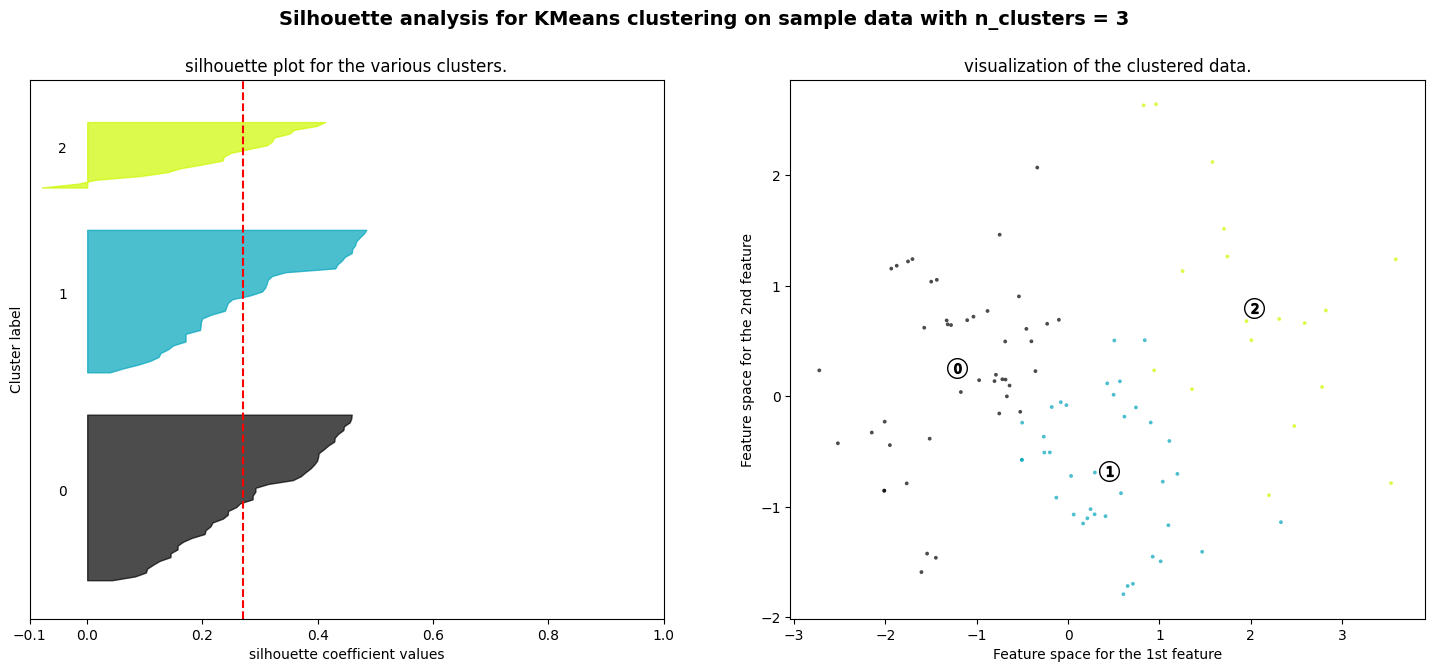

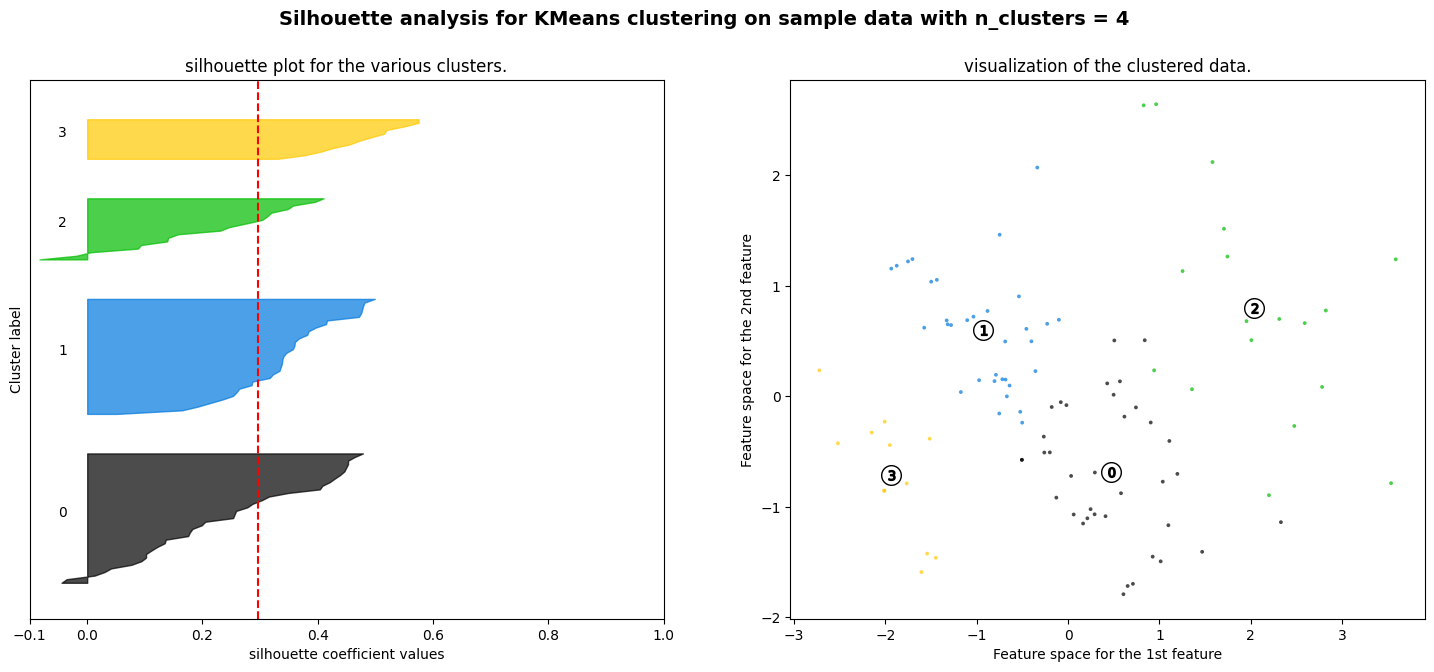

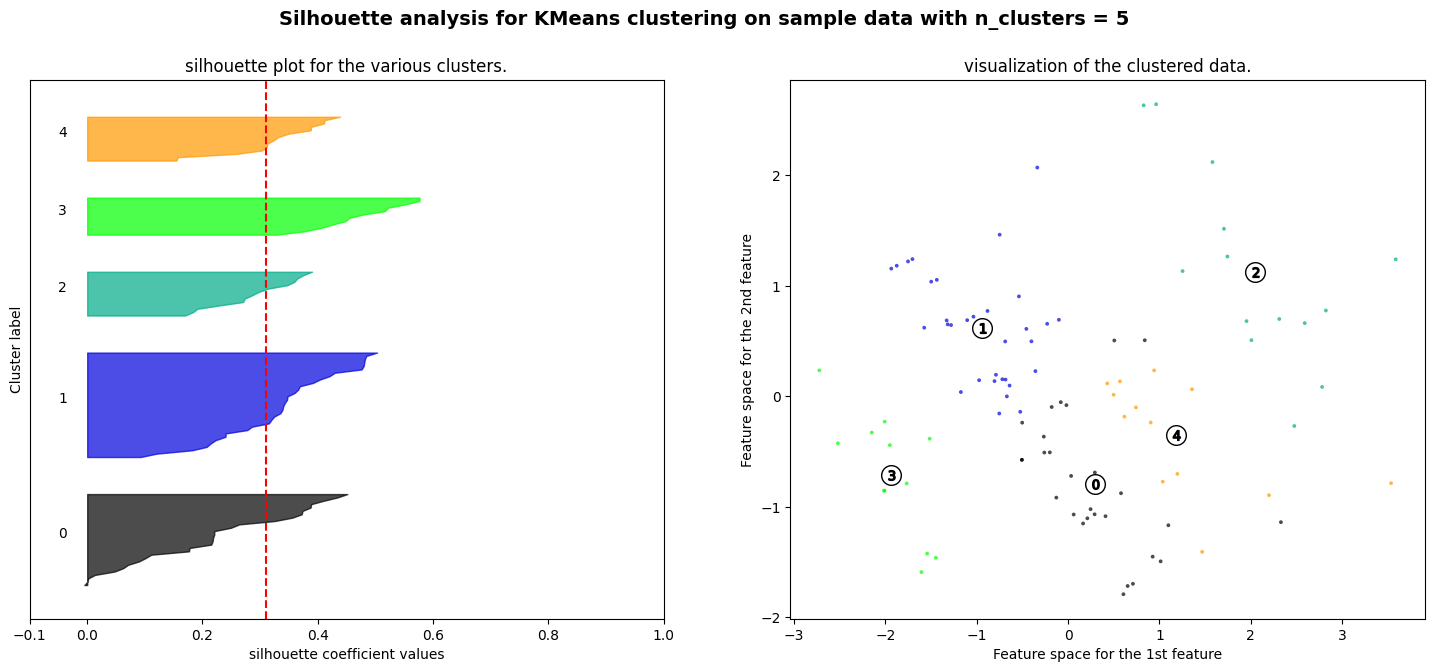

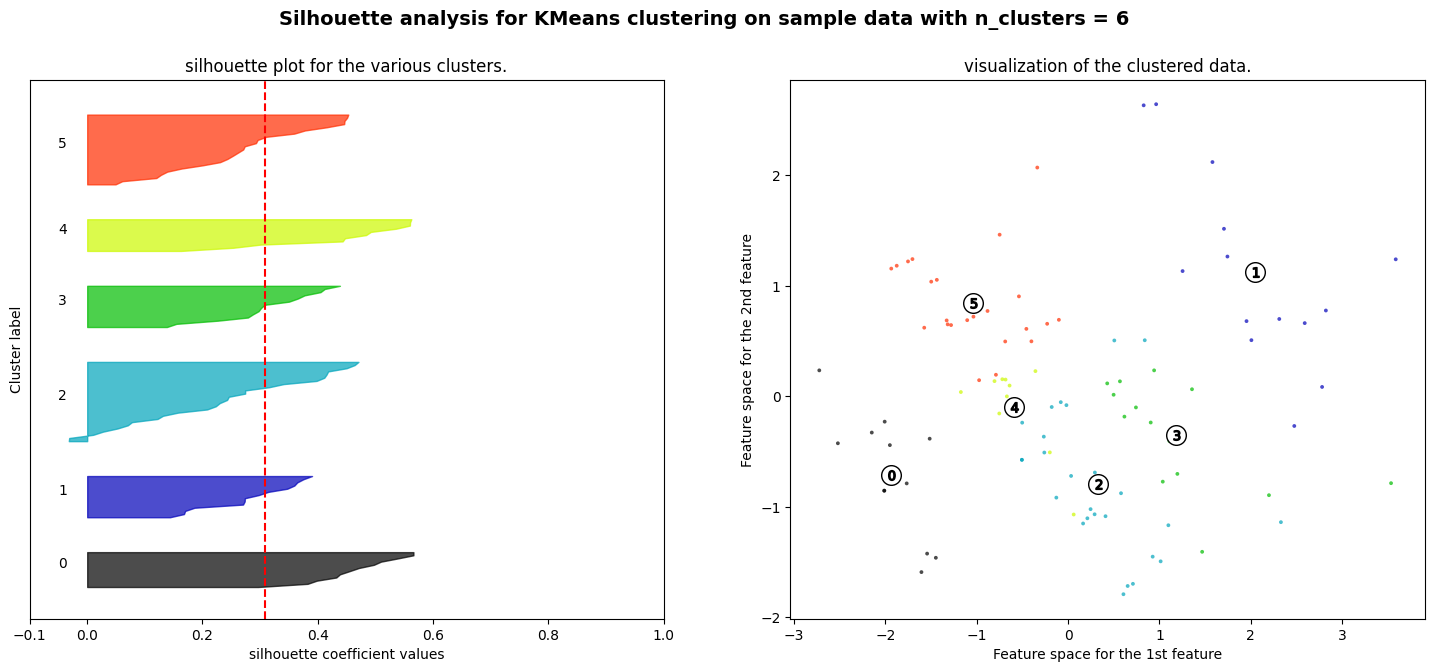

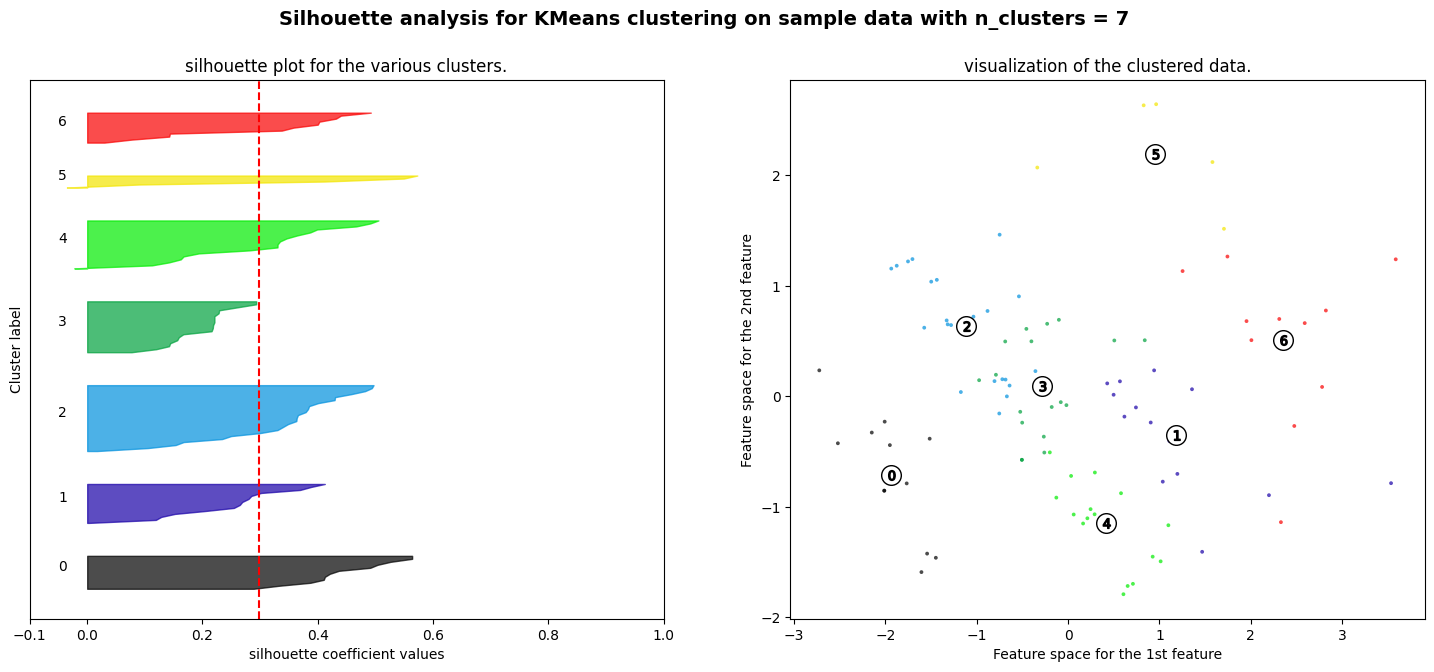

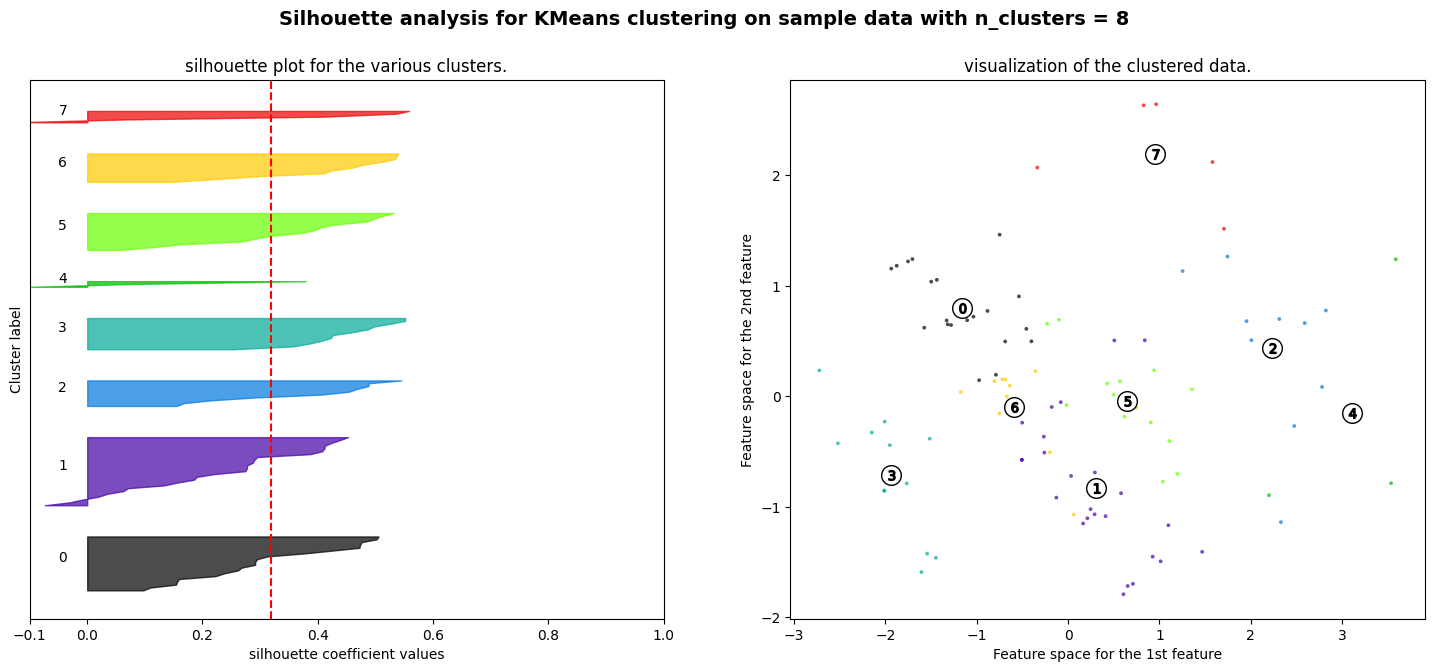

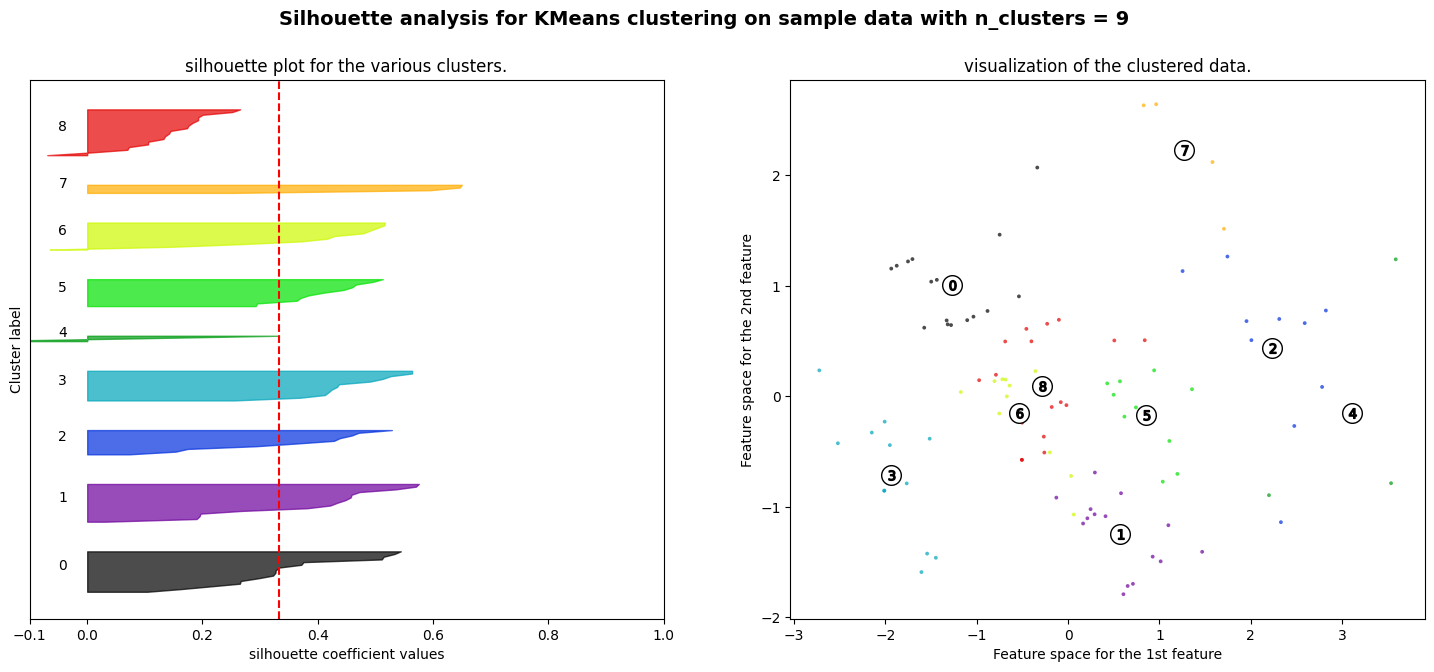

time: 5.67 s (started: 2023-08-03 11:34:10 +00:00)


In [1261]:
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
# candidates for the number of cluster
parameters = list(range(2,10))
#parameters
parameter_grid = ParameterGrid({'n_clusters': parameters})
best_score = -1
#visualizing Silhouette Score for individual clusters and the clusters made
for n_clusters in parameters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # 1st subplot is the silhouette plot
    # silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("silhouette plot for the various clusters.")
    ax1.set_xlabel("silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_pca[:, 0], df_pca[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    #marker='$%d$' % i will give numer in cluster in 2 plot
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

####Agglomerative Hierarchical Clustering

Hierarchial clustering algorithms group similar objects into groups called clusters. There are two types of hierarchical clustering algorithms:

Agglomerative — Bottom up approach. Start with many small clusters and merge them together to create bigger clusters. Divisive — Top down approach. Start with a single cluster than break it up into smaller clusters.

**Agglomerative hierarchical clustering**
> The agglomerative hierarchical clustering algorithm is a popular example of HCA. To group the datasets into clusters, it follows the bottom-up approach. It means, this algorithm considers each dataset as a single cluster at the beginning, and then start combining the closest pair of clusters together. It does this until all the clusters are merged into a single cluster that contains all the datasets. This hierarchy of clusters is represented in the form of the dendrogram.

**Dendrogram in Hierarchical clustering**

> The dendrogram is a tree-like structure that is mainly used to store each step as a memory that the HC algorithm performs. In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, and the x-axis shows all the data points of the given dataset.

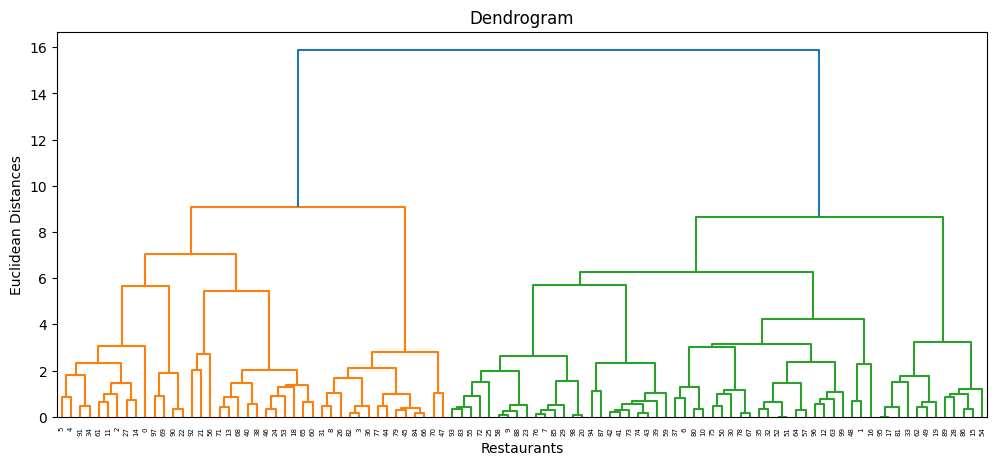

time: 1.3 s (started: 2023-08-03 11:34:15 +00:00)


In [1262]:
#importing module for hierarchial clustering and vizualizing dendograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,5))
dendrogram = sch.dendrogram(sch.linkage(df_pca, method = 'ward'),orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')

plt.show()

In [1263]:
#Checking the Silhouette score for 15 clusters
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    hc = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
    y_hc = hc.fit_predict(df_pca)
    score = silhouette_score(df_pca, y_hc)
    print(f"For n_clusters = {n_clusters}, silhouette score is {round(score,2)}")

For n_clusters = 2, silhouette score is 0.29
For n_clusters = 3, silhouette score is 0.23
For n_clusters = 4, silhouette score is 0.25
For n_clusters = 5, silhouette score is 0.28
For n_clusters = 6, silhouette score is 0.27
For n_clusters = 7, silhouette score is 0.29
For n_clusters = 8, silhouette score is 0.31
For n_clusters = 9, silhouette score is 0.33
For n_clusters = 10, silhouette score is 0.34
For n_clusters = 11, silhouette score is 0.34
For n_clusters = 12, silhouette score is 0.35
For n_clusters = 13, silhouette score is 0.34
For n_clusters = 14, silhouette score is 0.34
For n_clusters = 15, silhouette score is 0.34
time: 65.2 ms (started: 2023-08-03 11:34:17 +00:00)


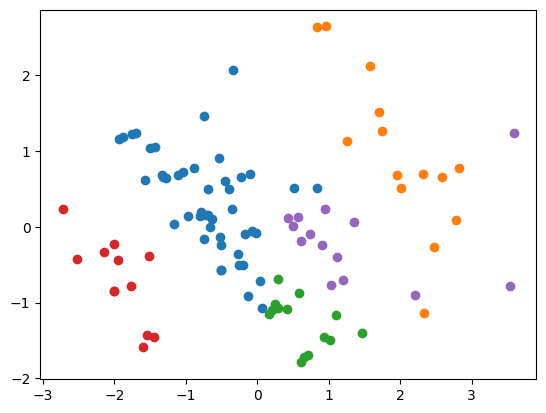

Silhouette Coefficient: 0.278
davies_bouldin_score 1.167
time: 285 ms (started: 2023-08-03 11:34:17 +00:00)


In [1264]:
# agglomerative clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

# define the model
model = AgglomerativeClustering(n_clusters = 5)      #n_clusters=5
# fit model and predict clusters
y_hc = model.fit_predict(df_pca)
# retrieve unique clusters
clusters = unique(y_hc)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(y_hc == cluster)
	# create scatter of these samples
	plt.scatter(df_pca[row_ix, 0], df_pca[row_ix, 1])
# show the plot
plt.show()
#Evaluation

#Silhouette Coefficient
print("Silhouette Coefficient: %0.3f"%silhouette_score(df_pca,y_hc, metric='euclidean'))

#davies_bouldin_score of our clusters
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(df_pca, y_hc)
print("davies_bouldin_score %0.3f"%davies_bouldin_score(df_pca, y_hc))

In [1265]:
#creating new colummn for predicting cluster using hierarcial clsutering
clustering_result['label_hr'] = y_hc
clustering_result.sample(5)

Restaurant  \
55                Cafe Eclat   
79              Olive Garden   
1                   Paradise   
6                    eat.fit   
93  Zing's Northeast Kitchen   

                                             Cuisines  Cost  Average_Rating  \
55                                       Cafe, Bakery   700               3   
79        North Indian, Chinese, Continental, Biryani   700               3   
1                      Biryani, North Indian, Chinese   800               4   
6   Healthy Food, North Indian, Continental, South...   500               3   
93                               North Eastern, Momos   550               3   

    Total_Cuisine_Count  label  label_hr  
55                    2      3         0  
79                    4      0         2  
1                     3      0         0  
6                     4      0         0  
93                    2      3         0

time: 16.8 ms (started: 2023-08-03 11:34:17 +00:00)


 **K-means** and **hierarchical clustering** are two different methods for grouping data points into clusters. K-means is a centroid-based method, where each cluster is defined by the mean of the data points assigned to it. Hierarchical clustering, on the other hand, is a linkage-based method, where clusters are defined by the similarity of data points. Because these methods use different criteria to define clusters, the labels they assign to data points can be different. Additionally, the number of clusters and initialization of the algorithm can also affect the outcome, which can cause the labels to differ.

#### 2. Cross- Validation & Hyperparameter Tuning

In [1266]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 441 µs (started: 2023-08-03 11:34:17 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2 (Sentiment Analysis)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Install and import LDA
!pip install pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
#calculating silhouette score for n_component
'''from sklearn.metrics import silhouette_score

topic_range = range(2, 11)
silhouette_scores = []

for n_components in topic_range:
    lda = LatentDirichletAllocation(n_components=n_components)
    lda.fit(X)
    labels = lda.transform(X).argmax(axis=1)
    silhouette_scores.append(silhouette_score(X, labels))
'''

In [ ]:
#plotting silhouette score
'''plt.plot(topic_range, silhouette_scores, marker ='o', color='red')
plt.xlabel('Number of Topics', size = 15, color = 'green')
plt.ylabel('Silhouette Score', size = 15, color = 'blue')
plt.show()'''

In [ ]:
# LDA model
'''lda = LatentDirichletAllocation(n_components=4)
lda.fit(X)'''

In [ ]:
#using pyldavis to visualise
'''import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
'''

In [ ]:
# ploting the clusters top 30 terms
'''lda_pyLDAvis = pyLDAvis.sklearn.prepare(lda, X, vectorizer, mds='tsne')
lda_pyLDAvis
'''

#### Supervised Sentiment Analysis

Let's apply different Machine Learning Models to our data set and see how each of them performs. Firstly, We will tune the hyper-parameters of those models and then we will compare and choose the best model among them, based on Elapsed Time and Evaluation Metrics of the best parameters.

List of **Machine Learning Models** we are going to train and evaluate our data set on:

- Logistic Regression
- Decision Tree
- Random Forest Tree
- XGBoost Classifier
- KNN Classifier
- SVM classifier
- Naive Bayes Classifier
- LightGBM Classifier

**Hyper-Parameter Tuning Methods:**

We have tried different hyper-parameter tuning methods. Every method gave the same result but **GridSearchCV** and **RandomizedSearchCV** took a huge amount of time to train the models. **HalvingRandomizedSearchCV** took the least time to train the models and predict the output. That's why we highly ***recommend*** you to keep the Tuning_Method as Halving_Randomized_Search_CV from the drop-down menu below.

We have also added some results of the model tuning with GridSearchCV and RandomizedSearchCV, just for performance comparison.

 **Tuning Methods:**
- HalvingRandomizedSearchCV
- GridSearchCV
- RandomizedSearchCV

 **Evaluation Metrics:**
- Accuracy Score
- Precision
- Recall
- F1 Score
- ROC AUC Score
- Log Loss

 **Plots:**

At the end of every model's hyper-parameter tuning, there is one **ROC Curve** which shows the ROC Scores and **Parallel Coordinates Plot** which shows all the combinations of hyper-parameters used for tuning the model to get the best parameters.


In [315]:
# For feature engineering ans selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2  #feature selection for classification
from sklearn.metrics import recall_score    #to measure model performance

# Machine learning model selection and implementation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Importing classification metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import make_scorer, recall_score, f1_score

# To create table
from prettytable import PrettyTable

# importing missingo library which helps us to visualize the missing values
import missingno as msno

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

time: 4.15 ms (started: 2023-08-03 08:45:45 +00:00)


In [316]:
# Defining a function to train the input model and print evaluation matrics such as classification report, confusion matrix and AUC-ROC curve in visualize format
def analyse_model(model, x_train, x_test, y_train, y_test):

  '''Takes classifier model, train-set and test-set as input and prints the evaluation matrices in visualize format and returns the model'''

  # Fitting the model
  model.fit(x_train,y_train)

  # Finding best parameters
  try:
    print(f"The best parameters are: {model.best_params_}")
  except:
    pass

  # Plotting Evaluation Metrics for train and test dataset
  for x, act, label in ((x_train, y_train, 'Train-Set'),(x_test, y_test, "Test-Set")):

    # Getting required metrics
    pred = model.predict(x)
    pred_proba = model.predict_proba(x)[:,1]
    report = pd.DataFrame(classification_report(y_pred=pred, y_true=act, output_dict=True))
    fpr, tpr, thresholds = roc_curve(act, pred_proba)

    # Classification report
    plt.figure(figsize=(18,3))
    plt.subplot(1,3,1)
    sns.heatmap(report.iloc[:-1, :-2].T, annot=True, cmap=sns.color_palette("crest", as_cmap=True),fmt=".2f",annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Classification Report')

    # Confusion Matrix
    plt.subplot(1,3,2)
    matrix= confusion_matrix(y_true=act, y_pred=pred)
    sns.heatmap(matrix, annot=True, cmap=sns.color_palette("flare", as_cmap=True),fmt=".2f", annot_kws={"fontsize":14, "fontweight":"bold"},linewidths=1.0)
    plt.title(f'{label} Confusion Matrix')
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')

    # AUC_ROC Curve
    plt.subplot(1,3,3)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=f'AUC = {np.round(np.trapz(tpr,fpr),3)}')
    plt.legend(loc=4)
    plt.title(f'{label} AUC_ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.tight_layout()

  plt.show()

  return model

time: 7.63 ms (started: 2023-08-03 08:45:50 +00:00)


##### Logistic Regression

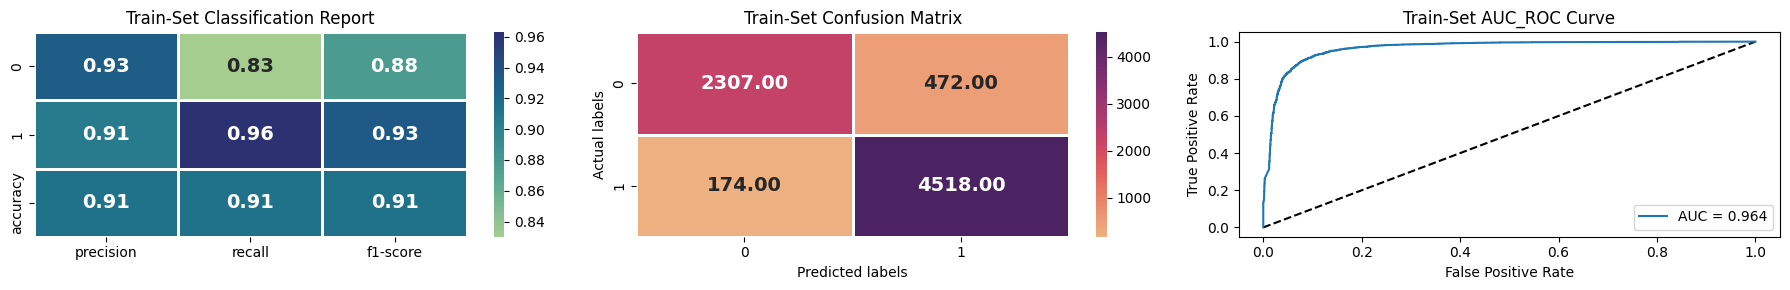

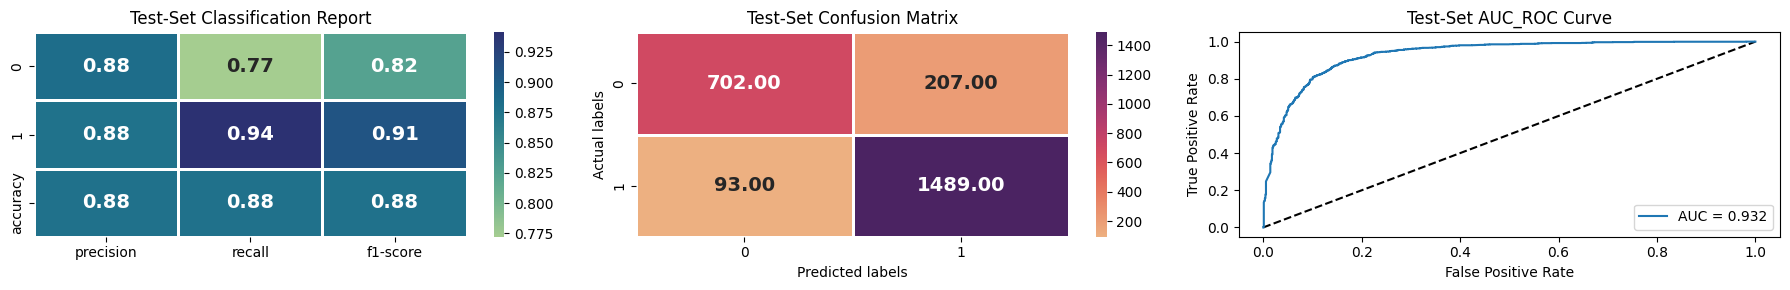

LogisticRegression(max_iter=20000, random_state=0)

time: 2.26 s (started: 2023-08-03 08:46:02 +00:00)


In [317]:
# Importing LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression

# Fitting Logistic Regression Model and Visualizing evaluation Metric Score chart
logistic_classifier = LogisticRegression(fit_intercept=True, penalty='l2',max_iter=20000,random_state= 0)
analyse_model(logistic_classifier, x_tr, x_tst, y_tr, y_tst)

We have tried the very basic and least complex model used for binary classification i.e Logistic Regression. Since, our task is to predict the customer that have higher possibility to be infected in future so we have more emphasised on recall in our analysis (to maximise the recall we have to minimise the values of FN which are 93 in our case).
After implimenting this model we have achieved the recall of 0.96 on the train set and 0.94 on the test set along with auc-roc score of 93%  for test dataset and accuracy of 88%.

Out of 2491 customers which are in our test dataset our model is predicting 2191 customers correctly predicted and other 300 are wrongly predicted and we have to minimize the wrongly predicted (specially the ones who have the higher chances of infection)

We are getting good results but still it is the analysis of zamato restaurant so we have to push the limits harder in order to save maximum response and for this we have implimented various models and compared the various metrics.

#### Decision Tree

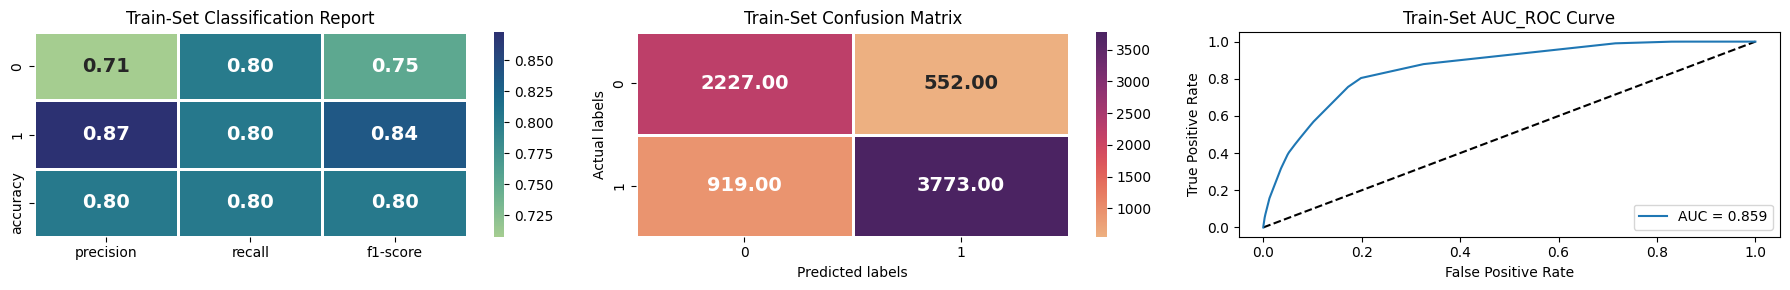

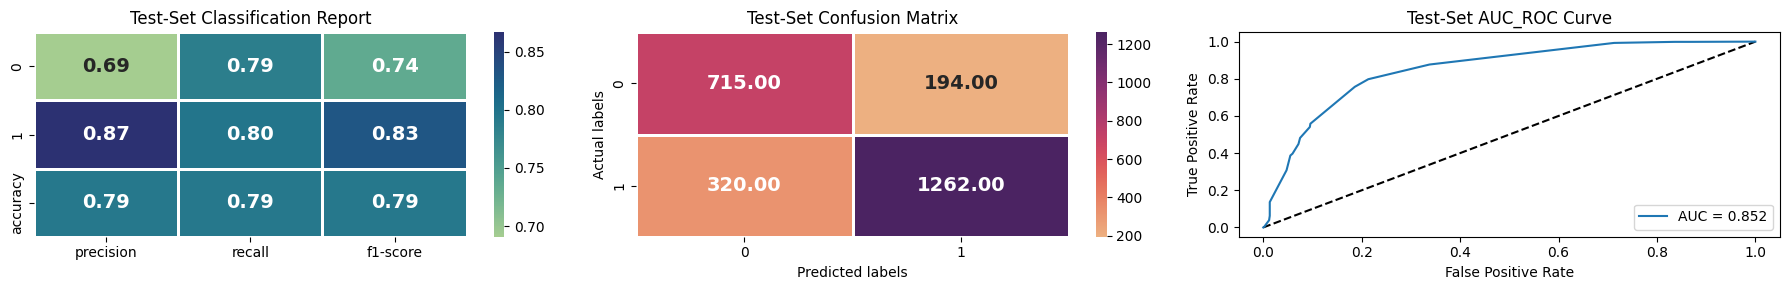

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)

time: 3.45 s (started: 2023-08-03 08:46:13 +00:00)


In [318]:
# Visualizing evaluation Metric Score chart
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=20, random_state=0)
analyse_model(decision_tree_classifier, x_tr, x_tst, y_tr, y_tst)

##### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'max_depth': 18, 'min_samples_leaf': 10, 'min_samples_split': 2}


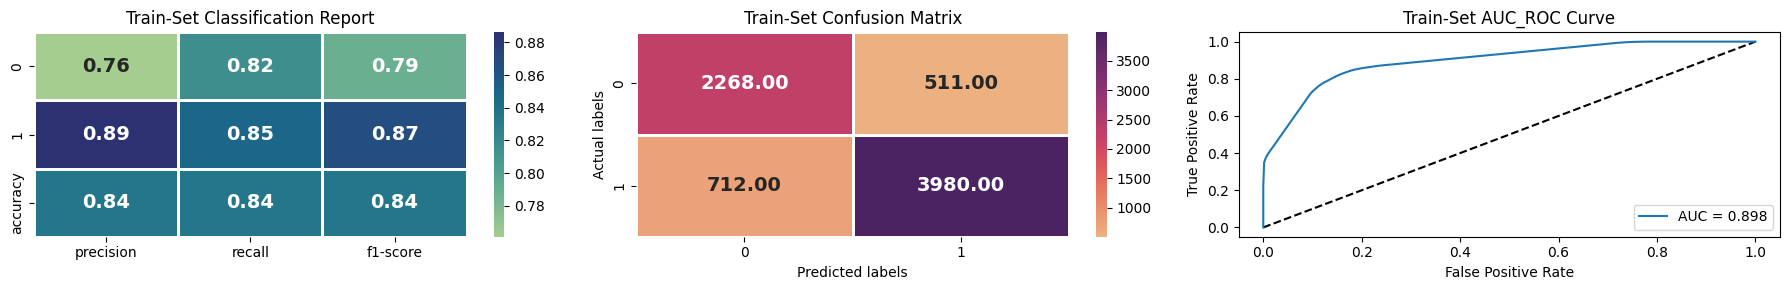

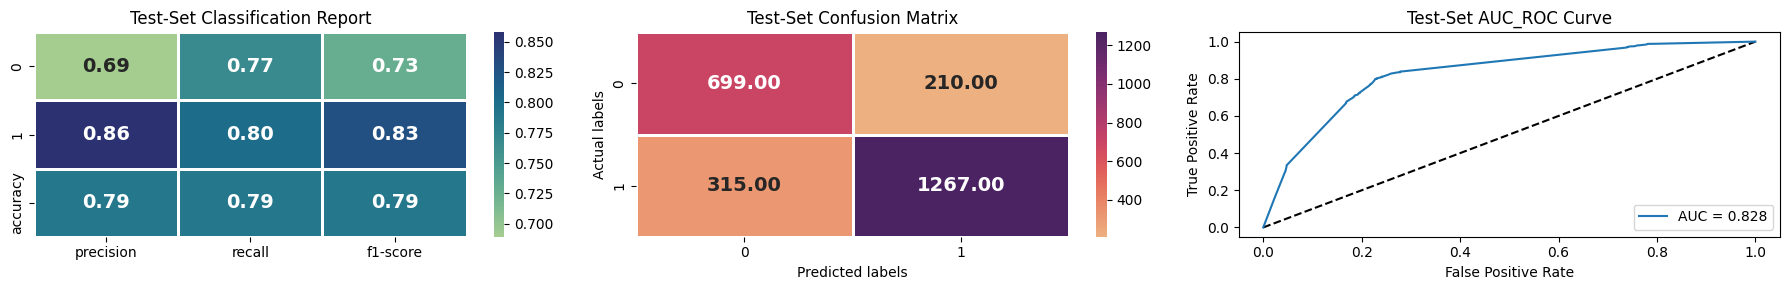

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [14, 15, 16, 17, 18, 19, 20],
                         'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [1, 2, 4]},
             scoring='neg_mean_squared_error')

time: 2min 27s (started: 2023-08-03 08:46:17 +00:00)


In [319]:
# Import Liberary
from sklearn.model_selection import GridSearchCV

# Creating Ridge instance
decision_tree= DecisionTreeClassifier()

# Defining parameters
parameters_decision_tree = {'max_depth': [14,15,16,17,18,19,20], 'min_samples_leaf': [3,4,5,6,7,8,9,10], 'min_samples_split': [1,2,4]}

# Train the model
decision_tree_classifier = GridSearchCV(decision_tree, parameters_decision_tree, scoring='neg_mean_squared_error', cv=3)
analyse_model(decision_tree_classifier, x_tr, x_tst, y_tr, y_tst)

We have the options to use Decision tree as our base model but to get the significantly good results we have used the ensemble technique of Decision tree i.e the capability of minimizing the error by taking different trees with different subsets.

In decision tree classification we have got the recall of 0.80 for class 1 in test dataset and the auc-roc will be 82% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.73 for class 0 and 0.83 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### Randomforest decision tree

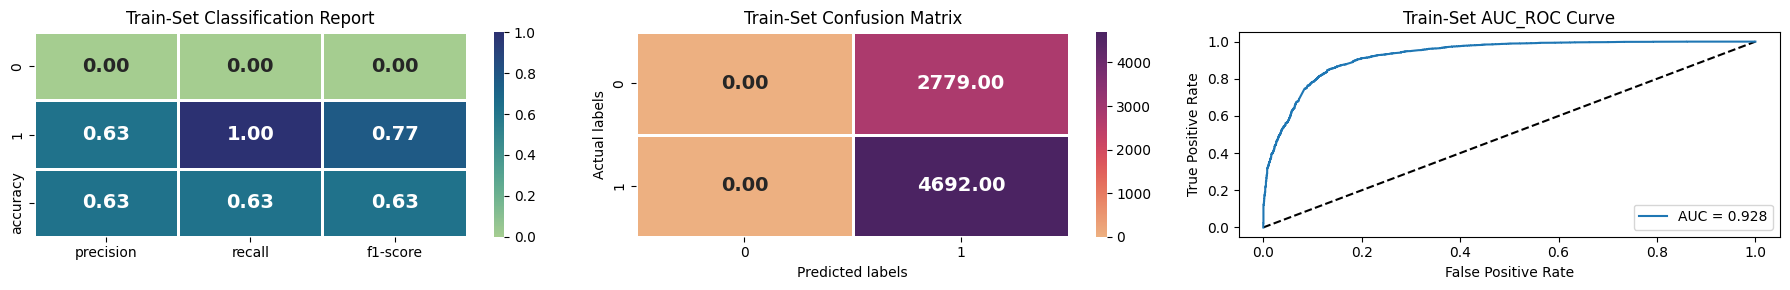

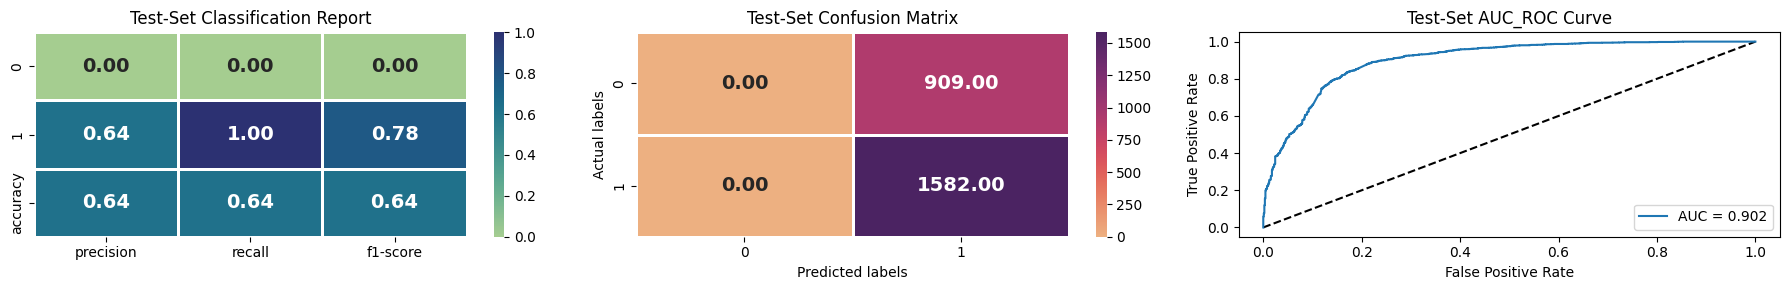

RandomForestClassifier(max_depth=3, n_estimators=500, n_jobs=-1, random_state=0)

time: 6.7 s (started: 2023-08-03 08:48:45 +00:00)


In [320]:
# ML Model - 3 Implementation
# Importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Fitting RandomForestClassifier Model
random_forest_tree_classifier = RandomForestClassifier(n_estimators=500,max_depth=3,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(random_forest_tree_classifier,x_tr, x_tst, y_tr, y_tst)

##### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'max_depth': 10, 'n_estimators': 350}


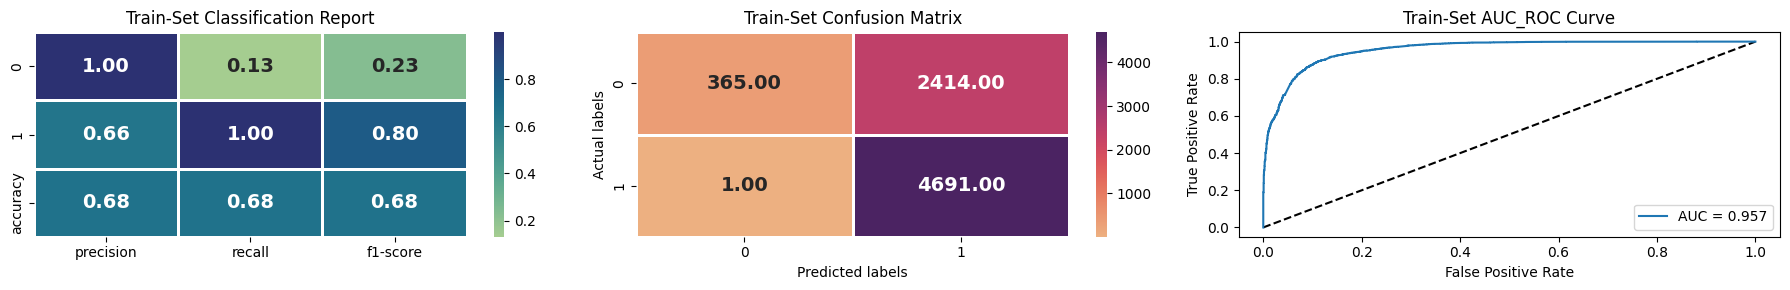

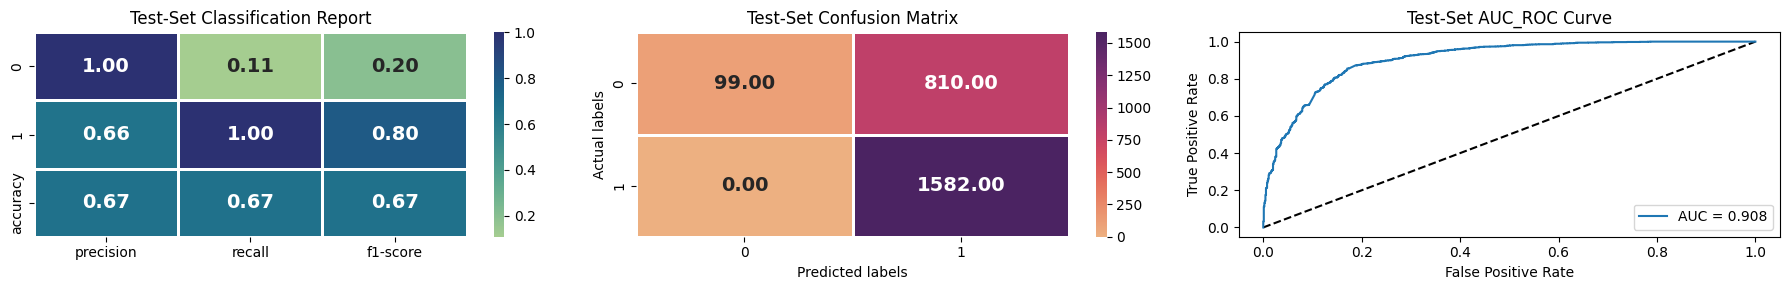

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [7, 8, 10],
                         'n_estimators': [150, 250, 300, 350]},
             scoring='roc_auc')

time: 4min 39s (started: 2023-08-03 08:48:51 +00:00)


In [321]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= RandomForestClassifier(random_state=0)

# Defining parameters
grid_values = {'n_estimators':[150,250,300,350], 'max_depth':[7,8,10]}

# Fitting RandomForestClassifier Model with GridSearchCV
random_forest_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=5)

# Analysing the model
analyse_model(random_forest_grid_classifier, x_tr, x_tst, y_tr, y_tst)

We have the options to use Random Forest tree as our base model but to get the significantly good results we have used the ensemble technique of Random Forest tree i.e the capability of minimizing the error by taking different trees with different subsets.

In random forest tree classification we have got the recall of 0.80 for class 1 in test dataset and the auc-roc will be 82% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.73 for class 0 and 0.83 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### XGBoost

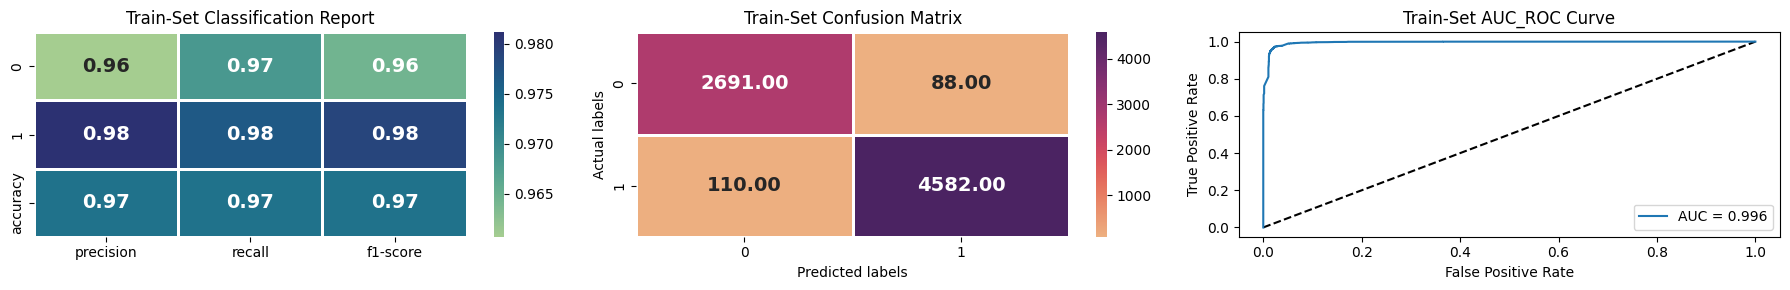

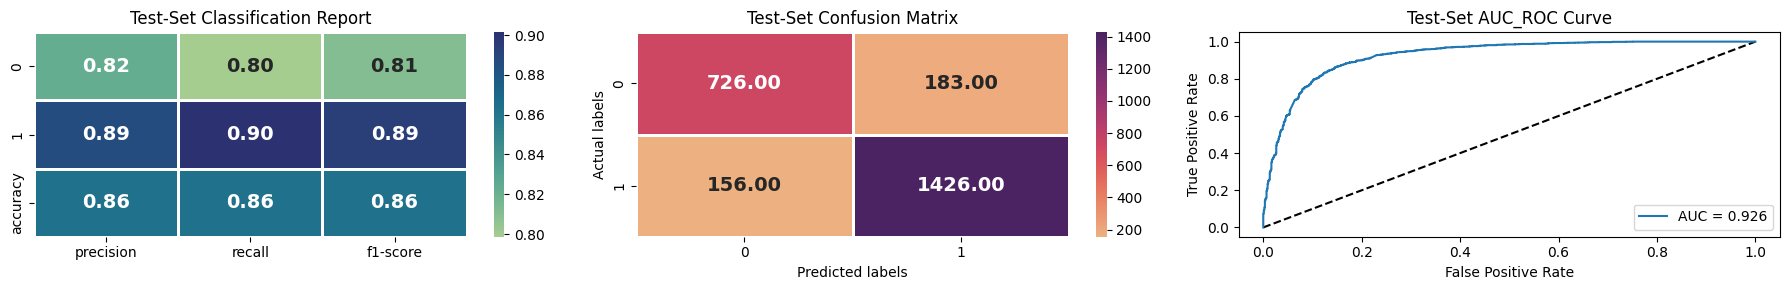

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=350, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

time: 53.4 s (started: 2023-08-03 08:53:31 +00:00)


In [322]:
# Importing RandomForestClassifier
from xgboost import XGBClassifier

# Fitting XGBClassifier Model
XGB_classifier = XGBClassifier(n_estimators=350,max_depth=5,n_jobs=-1,random_state=0)

# Analysing the model and Visualizing evaluation Metric Score chart
analyse_model(XGB_classifier, x_tr, x_tst, y_tr, y_tst)

##### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 350}


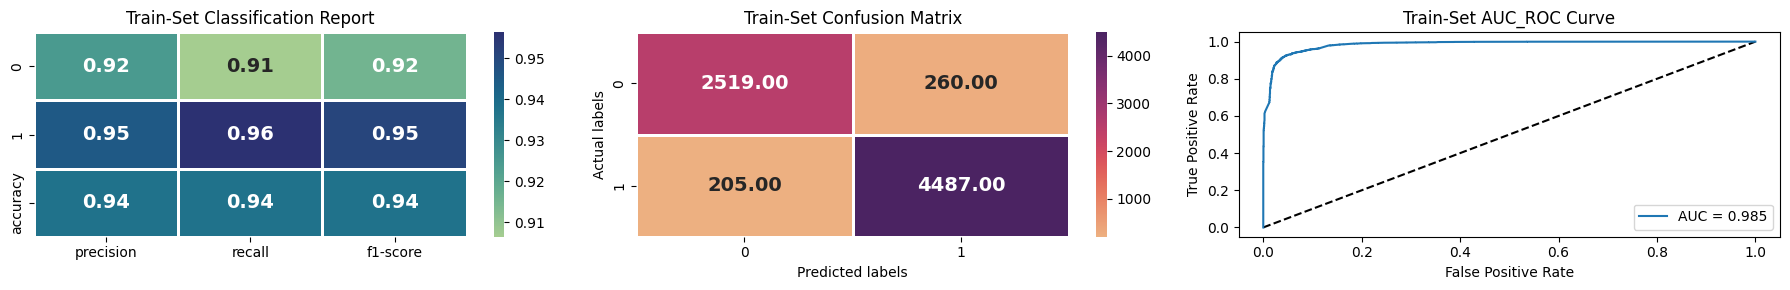

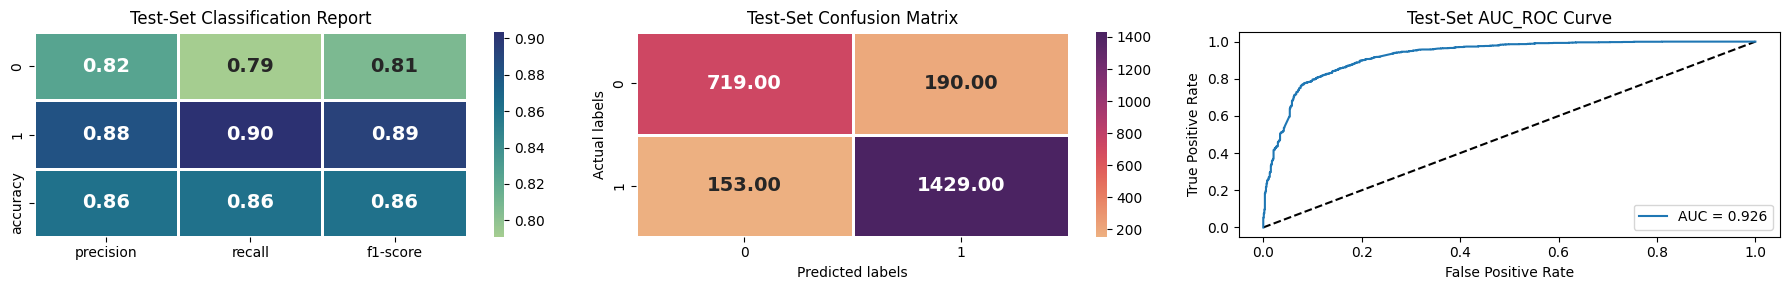

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [2, 3, 4, 5],
                         'n_estimators': [250, 300, 350]},
             scoring='roc_auc')

time: 25min 30s (started: 2023-08-03 05:22:45 +00:00)


In [ ]:
# Importing GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Defining classifier instance
classifier= XGBClassifier(random_state=0)

# Defining parameters
grid_values = {'learning_rate':[0.01, 0.1,1],'n_estimators':[250,300,350], 'max_depth':[2,3,4,5]}

# Fitting RandomForestClassifier Model with GridSearchCV
XGB_grid_classifier = GridSearchCV(classifier, param_grid = grid_values, scoring = 'roc_auc', cv=3)

# Analysing the model
analyse_model(XGB_grid_classifier, x_tr, x_tst, y_tr, y_tst)

We have the options to use XGBoost as our base model but to get the significantly good results we have used the ensemble technique of XGBoost i.e the capability of minimizing the error by taking different trees with different subsets.

In XGBoost classifier we have got the recall of 0.90 for class 1 in test dataset and the auc-roc will be 92% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.81 for class 0 and 0.89 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

#### LightGBM

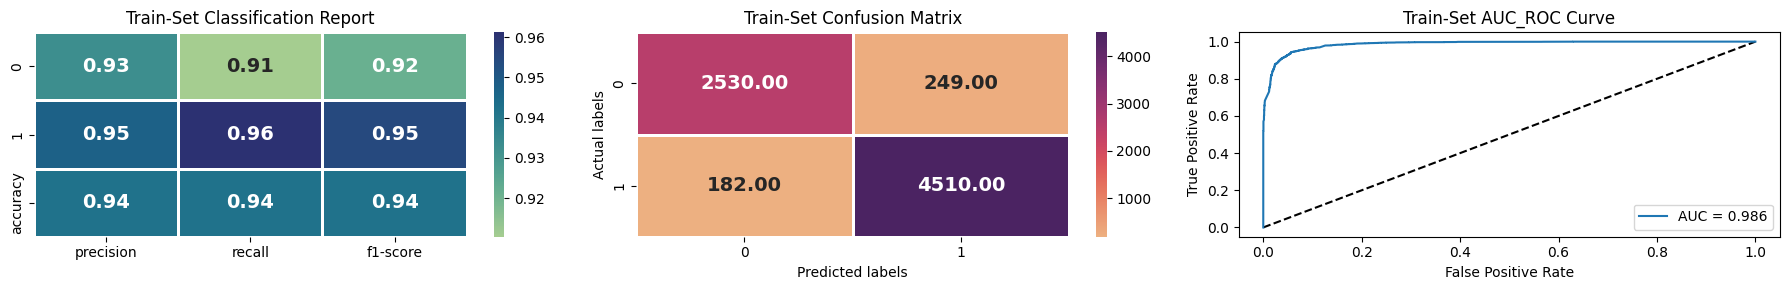

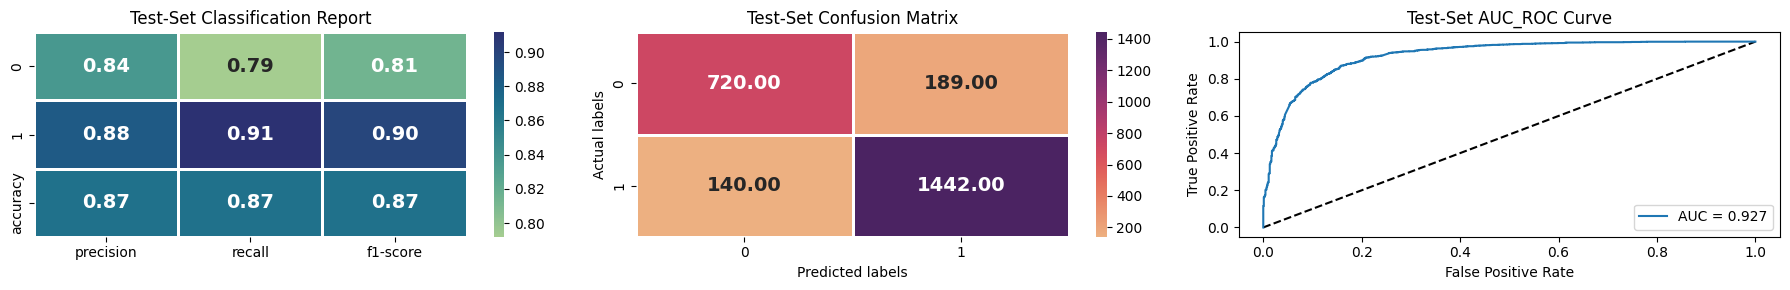

LGBMClassifier()

time: 10.1 s (started: 2023-08-03 05:48:16 +00:00)


In [ ]:
# Importing LightGBM
import lightgbm as lgb
LGBM_classifier = lgb.LGBMClassifier()
# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(LGBM_classifier, x_tr, x_tst, y_tr, y_tst)

##### 2. Cross- Validation & Hyperparameter Tuning

The best parameters are: {'learning_rate': 0.01, 'max_depth': 120, 'n_estimators': 600}


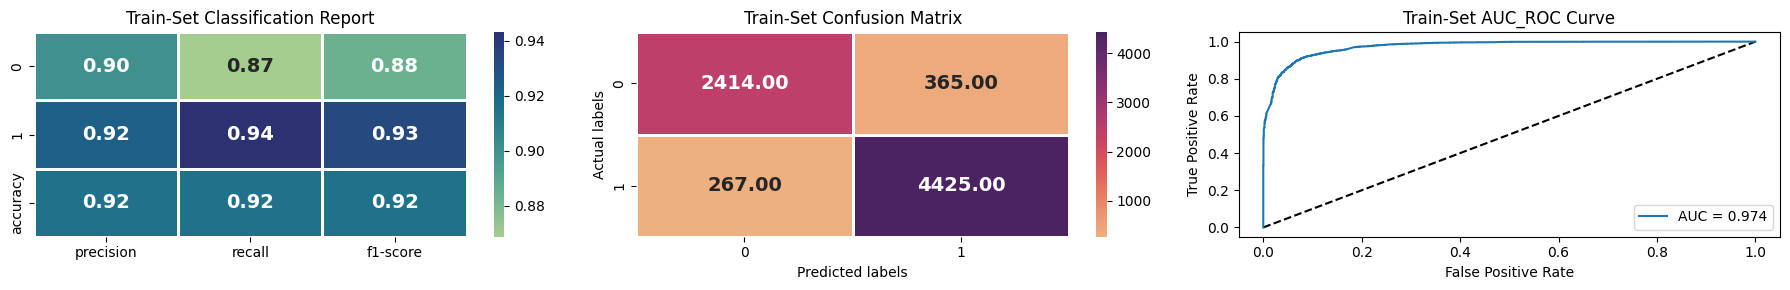

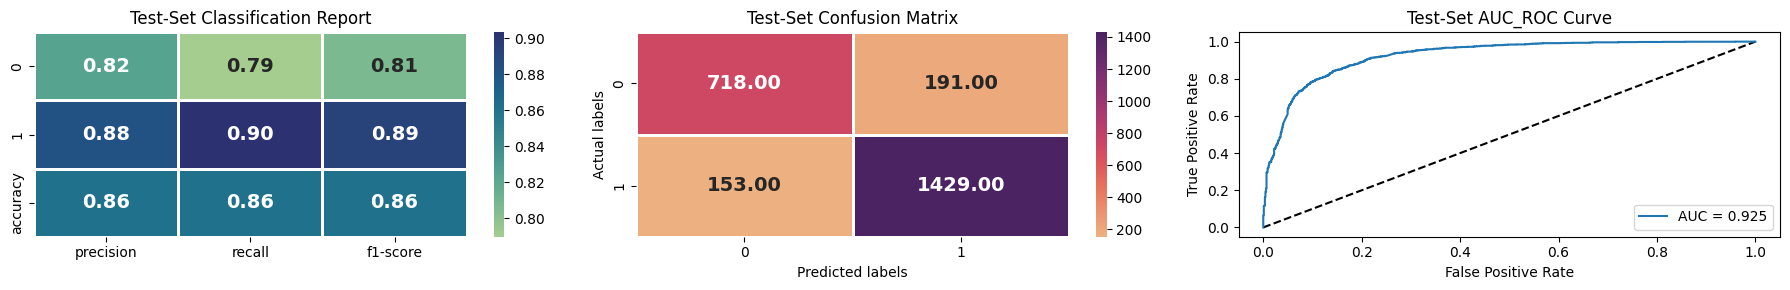

GridSearchCV(cv=3, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [120, 125, 150],
                         'n_estimators': [500, 600]},
             scoring='roc_auc')

time: 7min 39s (started: 2023-08-03 05:48:26 +00:00)


In [ ]:
# import ridge regression from sklearn library and RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

LGBM_classifier = lgb.LGBMClassifier()

# Defining parameters
parameters={"learning_rate":[0.01,0.1],"max_depth":[120,125,150],"n_estimators":[500,600]}
# Fitting RandomForestClassifier Model with GridSearchCV
LGBM_classifier = GridSearchCV(LGBM_classifier, param_grid = parameters, scoring = 'roc_auc', cv=3)

# Analysing the model Visualizing evaluation Metric Score chart
analyse_model(LGBM_classifier, x_tr, x_tst, y_tr, y_tst)

We have the options to use LightGBM as our base model but to get the significantly good results we have used the ensemble technique of LightGBM i.e the capability of minimizing the error by taking different trees with different subsets.

In LightGBM classifier we have got the recall of 0.90 for class 1 in test dataset and the auc-roc will be 92% this means that our model is actually bifurcating the either of the two categories of the target variable.

We have also observed the f1-score of 0.81 for class 0 and 0.89 for class 1 in test set that means we are actually maintaining the trade between the precision and recall.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [324]:
# Storing different regression metrics in order to make dataframe and compare them
models = ['Logistic_classification','Decision_Tree','Random_Forest_tree','XGboost','LightGBM']
Precision = [0.88, 0.86, 0.66, 0.88, 0.88]
Recall = [0.94, 0.80, 1.00, 0.90, 0.90]
F1_Score= [0.91, 0.87, 0.80, 0.89, 0.89]
Accuracy = [0.88, 0.84, 0.67, 0.86, 0.86]
AUCROC = [0.93, 0.82, 0.90, 0.92, 0.92]

# Create dataframe from the lists
data = {'Models': models,
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_classification       0.88    0.94      0.91      0.88    0.93
1            Decision_Tree       0.86    0.80      0.87      0.84    0.82
2       Random_Forest_tree       0.66    1.00      0.80      0.67    0.90
3                  XGboost       0.88    0.90      0.89      0.86    0.92
4                 LightGBM       0.88    0.90      0.89      0.86    0.92

time: 119 ms (started: 2023-08-03 09:15:09 +00:00)


#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

I have used these metrices for evaluation of the model and their impact on business are as follows:

Accuracy: This metric indicates the percentage of correctly classified instances out of the total number of instances. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions. A high accuracy score would have a positive impact on the business, as it would indicate a high level of confidence in the model's predictions.

Precision: This metric indicates the proportion of true positive predictions out of all positive predictions made by the model. In a business setting, this would indicate the level of confidence in the model's ability to identify positive instances correctly. A high precision score would have a positive impact on the business, as it would indicate that the model is not making false positive predictions.

Recall: This metric indicates the proportion of true positive predictions out of all actual positive instances. In a business setting, this would indicate the model's ability to identify all positive instances. A high recall score would have a positive impact on the business, as it would indicate that the model is not missing any positive instances.

F1 Score: This metric is a combination of precision and recall and is used to balance the trade-off between the two. In a business setting, this would indicate the overall effectiveness of the model in making correct predictions while also avoiding false positives and false negatives. A high F1 score would have a positive impact on the business, as it would indicate that the model is making accurate predictions while also being able to identify all positive instances.

ROC AUC: This metric indicates the ability of the model to distinguish between positive and negative instances. In a business setting, this would indicate the model's ability to correctly classify instances as positive or negative. A high ROC AUC score would have a positive impact on the business, as it would indicate that the model is able to correctly classify instances.

The XgBoost Classifier can be considered as an efficient model for the business, especially when it achieves high scores in all of these evaluation metrics, which would indicate that it can accurately predict outcomes, identify all positive instances, and correctly classify instances as positive or negative.

### ML Model - 3

##### Recommendation based on user profile and restaurant genre

In [1267]:
#creating variable that contain restaurant cuisine details
restaurant_df = cluster_dummy.copy()
restaurant_df = restaurant_df.reset_index()
restaurant_df = restaurant_df.drop(columns = ['Cost',	'Average_Rating',	'Total_Cuisine_Count','label'], axis =1)
restaurant_df.head()

Restaurant  American  Andhra  Arabian  Asian  BBQ  \
0                 Beyond Flavours         0       0        0      0    0   
1                        Paradise         0       0        0      0    0   
2                        Flechazo         0       0        0      1    0   
3  Shah Ghouse Hotel & Restaurant         0       0        0      0    0   
4      Over The Moon Brew Company         0       0        0      1    0   

   Bakery  Beverages  Biryani  Burger  ...  North Indian  Pizza  Salad  \
0       0          0        0       0  ...             1      0      0   
1       0          0        1       0  ...             1      0      0   
2       0          0        0       0  ...             1      0      0   
3       0          1        1       0  ...             1      0      0   
4       0          0        0       0  ...             1      0      0   

   Seafood  South Indian  Spanish  Street Food  Sushi  Thai  Wraps  
0        0             1        0            0      0     0      0  
1        0             0        0            0      0     0      0  
2        0             0        0            0      0     0      0  
3        1             0        0            0      0     0      0  
4        0             0        0            0      0     0      0  

[5 rows x 45 columns]

time: 32.1 ms (started: 2023-08-03 11:34:17 +00:00)


In [1268]:
#shape
restaurant_df.shape

(100, 45)

time: 4.5 ms (started: 2023-08-03 11:34:17 +00:00)


In [1269]:
#restaurant matrix
rest_genre = restaurant_df.loc[:, restaurant_df.columns != 'Restaurant']
rest_matrix = rest_genre.values
rest_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

time: 7.15 ms (started: 2023-08-03 11:34:17 +00:00)


In [1270]:
#matrix shape
rest_matrix.shape

(100, 44)

time: 6.59 ms (started: 2023-08-03 11:34:17 +00:00)


In [1271]:
#creating user or reviewer profile
user_df = sentiment_df[['Reviewer',	'Restaurant',	'Rating']].copy()
user_df.head()

Reviewer       Restaurant  Rating
0     Rusha Chakraborty  Beyond Flavours     5.0
1  Anusha Tirumalaneedi  Beyond Flavours     5.0
2       Ashok Shekhawat  Beyond Flavours     5.0
3        Swapnil Sarkar  Beyond Flavours     5.0
4                Dileep  Beyond Flavours     5.0

time: 15 ms (started: 2023-08-03 11:34:17 +00:00)


In [1272]:
#shape
user_df.shape

(9962, 3)

time: 3.6 ms (started: 2023-08-03 11:34:17 +00:00)


In [1273]:
# grouping the data by the 'user' column
grouped_data = user_df.groupby('Reviewer')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Rating': row['Rating']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
user_rating = grouped_data.apply(create_new_column)
user_rating = user_rating.reset_index().rename(columns ={0:'Rated_Restaurant'})
user_rating.head()

Reviewer                                   Rated_Restaurant
0                    0                 [{'Restaurant': 0, 'Rating': 0.0}]
1            #FOODPORN  [{'Restaurant': 'Zega - Sheraton Hyderabad Hot...
2  #chloesviews // CAH         [{'Restaurant': 'eat.fit', 'Rating': 5.0}]
3                 $ign           [{'Restaurant': 'SKYHY', 'Rating': 4.0}]
4             4mybanti      [{'Restaurant': 'Ulavacharu', 'Rating': 2.0}]

time: 1.89 s (started: 2023-08-03 11:34:17 +00:00)


In [1274]:
#shape
user_rating.shape

(7447, 2)

time: 3.57 ms (started: 2023-08-03 11:34:19 +00:00)


In [1275]:
#iterating over user rating df such that it end up making an array which had same shape as restaurant df
user_rated_restaurant = {}
for index, row in user_rating.iterrows():
    user_rated_restaurant[row['Reviewer']] = {}
    for i in range(len(row['Rated_Restaurant'])):
        user_rated_restaurant[row['Reviewer']][row['Rated_Restaurant'][i][
            'Restaurant']] = row['Rated_Restaurant'][i]['Rating']

# creating an empty user preference vector for each user
user_preference_vector = pd.DataFrame(np.zeros((len(user_rating), len(restaurant_df))),
                      columns=restaurant_df.Restaurant, index=user_rating['Reviewer'])

# Iterate through the user rating dataframe
for index, row in user_rating.iterrows():
    for i in range(len(row['Rated_Restaurant'])):
        restaurant = row['Rated_Restaurant'][i]['Restaurant']
        rating = row['Rated_Restaurant'][i]['Rating']
        user_preference_vector.loc[row['Reviewer'], restaurant] = rating

#reset index
user_preference_vector = user_preference_vector.reset_index()

time: 5.55 s (started: 2023-08-03 11:34:19 +00:00)


In [1276]:
#getting output
user_preference_vector.sample(5)

Restaurant               Reviewer  Beyond Flavours  Paradise  Flechazo  \
6921         Vaishnavi Pamulapati              0.0       0.0       0.0   
3133              Manoj.ramprit07              0.0       0.0       0.0   
3429        Nadeem Hussain Shaikh              0.0       0.0       0.0   
5462              Satishrajput773              0.0       0.0       0.0   
6332                   Subro.matt              0.0       0.0       0.0   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
6921                                   0.0                         0.0   
3133                                   0.0                         0.0   
3429                                   0.0                         0.0   
5462                                   0.0                         0.0   
6332                                   0.0                         0.0   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
6921                          0.0      0.0                       0.0   
3133                          0.0      0.0                       0.0   
3429                          0.0      0.0                       0.0   
5462                          0.0      0.0                       0.0   
6332                          0.0      0.0                       0.0   

Restaurant  Hyper Local  ...  Cascade - Radisson Hyderabad Hitec City  \
6921                0.0  ...                                      0.0   
3133                0.0  ...                                      0.0   
3429                0.0  ...                                      0.0   
5462                0.0  ...                                      0.0   
6332                0.0  ...                                      0.0   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
6921                                         0.0                       0.0   
3133                                         0.0                       0.0   
3429                                         0.0                       0.0   
5462                                         0.0                       0.0   
6332                                         0.0                       0.0   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
6921                   1.0         0.0                0.0   
3133                   0.0         0.0                0.0   
3429                   0.0         0.0                0.0   
5462                   0.0         0.0                0.0   
6332                   0.0         0.0                0.0   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion   0  
6921                                    0.0       0.0               0.0 NaN  
3133                                    0.0       0.0               0.0 NaN  
3429                                    0.0       0.0               0.0 NaN  
5462                                    0.0       0.0               0.0 NaN  
6332                                    0.0       0.0               0.0 NaN  

[5 rows x 102 columns]

time: 44.3 ms (started: 2023-08-03 11:34:25 +00:00)


In [1277]:
# Drop the column 0 whose contains tha null value
user_preference_vector.drop(columns = 0, inplace = True)

time: 7.16 ms (started: 2023-08-03 11:34:25 +00:00)


In [1278]:
#getting output
user_preference_vector.sample(5)

Restaurant            Reviewer  Beyond Flavours  Paradise  Flechazo  \
2389               Joel Coelho              0.0       0.0       0.0   
3523         Naresh Rayabarapu              0.0       0.0       0.0   
680               Anmol Bansal              0.0       0.0       0.0   
5208        Saketh Goundagouni              0.0       0.0       0.0   
5804          Shreyoshi Mandal              0.0       0.0       0.0   

Restaurant  Shah Ghouse Hotel & Restaurant  Over The Moon Brew Company  \
2389                                   0.0                         5.0   
3523                                   1.0                         0.0   
680                                    0.0                         1.0   
5208                                   0.0                         0.0   
5804                                   0.0                         0.0   

Restaurant  The Fisherman's Wharf  eat.fit  Shah Ghouse Spl Shawarma  \
2389                          0.0      0.0                       0.0   
3523                          0.0      0.0                       0.0   
680                           0.0      0.0                       0.0   
5208                          0.0      0.0                       0.0   
5804                          0.0      0.0                       0.0   

Restaurant  Hyper Local  ...  Arena Eleven  \
2389                0.0  ...           0.0   
3523                0.0  ...           0.0   
680                 0.0  ...           0.0   
5208                0.0  ...           0.0   
5804                0.0  ...           0.0   

Restaurant  Cascade - Radisson Hyderabad Hitec City  \
2389                                            0.0   
3523                                            0.0   
680                                             0.0   
5208                                            0.0   
5804                                            0.0   

Restaurant  Collage - Hyatt Hyderabad Gachibowli  Zing's Northeast Kitchen  \
2389                                         0.0                       0.0   
3523                                         0.0                       0.0   
680                                          0.0                       0.0   
5208                                         0.0                       0.0   
5804                                         0.0                       0.0   

Restaurant  Dunkin' Donuts  Desi Bytes  Hyderabadi Daawat  \
2389                   0.0         0.0                0.0   
3523                   0.0         0.0                0.0   
680                    0.0         0.0                0.0   
5208                   0.0         0.0                0.0   
5804                   0.0         0.0                0.0   

Restaurant  Zega - Sheraton Hyderabad Hotel  Triptify  Chinese Pavilion  
2389                                    0.0       0.0               0.0  
3523                                    0.0       0.0               0.0  
680                                     0.0       0.0               0.0  
5208                                    0.0       0.0               0.0  
5804                                    0.0       4.0               0.0  

[5 rows x 101 columns]

time: 45 ms (started: 2023-08-03 11:34:25 +00:00)


In [1279]:
#using dot multiplication to find score or weight for each reviewer
result_df = pd.DataFrame(columns = rest_genre.columns)
for index, row in user_preference_vector.iterrows():
    user_preference_vector_array = row[1:].values.reshape(1,-1)
    dot_product = np.dot(user_preference_vector_array, rest_matrix)
    result_df = result_df.append(pd.DataFrame(dot_product, columns = rest_genre.columns, index = [row['Reviewer']]))

result_df = result_df.reset_index().rename(columns ={'index':'Reviewer'})

time: 41.6 s (started: 2023-08-03 11:34:25 +00:00)


In [1280]:
#getting output
result_df

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages  \
0                       0      0.0    0.0     0.0   0.0  0.0    0.0       0.0   
1               #FOODPORN      0.0    0.0     0.0   5.0  0.0    0.0       0.0   
2     #chloesviews // CAH      0.0    0.0     0.0   0.0  0.0    0.0       0.0   
3                    $ign      0.0    0.0     0.0   0.0  0.0    0.0       0.0   
4                4mybanti      0.0    2.0     0.0   0.0  0.0    0.0       0.0   
...                   ...      ...    ...     ...   ...  ...    ...       ...   
7442       ಅಭಿಷೇಕ್ ಉಪಾಧ್ಯ      0.0    0.0     0.0   0.0  0.0    0.0       0.0   
7443         ᴀɴ.ᴏᴛʜᴇʀ.sᴇɴ      0.0    2.0     0.0   0.0  0.0    0.0       0.0   
7444        ✌️✌️Reddy 🥂🍽️      0.0    0.0     0.0   0.0  0.0    0.0       0.0   
7445              ✔️ Sonu      0.0    0.0     0.0   0.0  0.0    0.0       5.0   
7446                  🍛🍲🥗      0.0    0.0     0.0   0.0  0.0    0.0       0.0   

     Biryani Burger  ... North Indian Pizza Salad Seafood South Indian  \
0        0.0    0.0  ...          0.0   0.0   0.0     0.0          0.0   
1        0.0    0.0  ...          0.0   0.0   0.0     0.0          0.0   
2        0.0    0.0  ...          5.0   0.0   0.0     0.0          5.0   
3        0.0    0.0  ...          4.0   0.0   0.0     0.0          0.0   
4        0.0    0.0  ...          2.0   0.0   0.0     0.0          0.0   
...      ...    ...  ...          ...   ...   ...     ...          ...   
7442     0.0    0.0  ...          4.0   0.0   4.0     0.0          0.0   
7443     2.0    0.0  ...          2.0   0.0   0.0     0.0          0.0   
7444     0.0    0.0  ...          4.0   0.0   4.0     0.0          0.0   
7445     5.0    0.0  ...          5.0   0.0   0.0     5.0          0.0   
7446     7.0    0.0  ...          3.0   0.0   0.0     0.0          0.0   

     Spanish Street Food Sushi Thai Wraps  
0        0.0         0.0   0.0  0.0   0.0  
1        0.0         0.0   5.0  0.0   0.0  
2        0.0         0.0   0.0  0.0   0.0  
3        0.0         0.0   0.0  0.0   0.0  
4        0.0         0.0   0.0  0.0   0.0  
...      ...         ...   ...  ...   ...  
7442     0.0         0.0   0.0  0.0   0.0  
7443     0.0         0.0   0.0  0.0   0.0  
7444     0.0         0.0   4.0  0.0   0.0  
7445     0.0         0.0   0.0  0.0   0.0  
7446     0.0         0.0   0.0  0.0   0.0  

[7447 rows x 45 columns]

time: 31.4 ms (started: 2023-08-03 11:35:07 +00:00)


In [1281]:
#creating test user
test_user_ids = user_rating.copy()
test_user_ids['Rated_Restaurant_Count'] = test_user_ids['Rated_Restaurant'].apply(lambda x: len(x))

#taking 1000 user who atleast rating 2 restaurant as they show repeatition
test_user_ids = test_user_ids.sort_values('Rated_Restaurant_Count', ascending = False)[:1000]
test_user_ids.head()

Reviewer                                   Rated_Restaurant  \
3859   Parijat Ray  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
656         Ankita  [{'Restaurant': 'Hyper Local', 'Rating': 4.0},...   
2655         Kiran  [{'Restaurant': 'Shah Ghouse Hotel & Restauran...   
7014  Vedant Killa  [{'Restaurant': 'Barbeque Nation', 'Rating': 5...   
2314     Jay Mehta  [{'Restaurant': 'NorFest - The Dhaba', 'Rating...   

      Rated_Restaurant_Count  
3859                      13  
656                       13  
2655                      12  
7014                      11  
2314                      11

time: 48.7 ms (started: 2023-08-03 11:35:07 +00:00)


In [1282]:
#creating list for all reviewer in test ids
test_user_ids = test_user_ids['Reviewer'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000
time: 1.27 ms (started: 2023-08-03 11:35:07 +00:00)


In [1283]:
#test user profile
test_user_profile = result_df[result_df['Reviewer']=='Ankita']
test_user_profile

Reviewer American Andhra Arabian Asian  BBQ Bakery Beverages Biryani  \
656   Ankita     12.0   12.0     0.0   0.0  0.0    4.0       0.0     8.0   

    Burger  ... North Indian Pizza Salad Seafood South Indian Spanish  \
656    0.0  ...         36.0   0.0   4.0     0.0         13.0     0.0   

    Street Food Sushi Thai Wraps  
656         0.0   4.0  0.0   4.0  

[1 rows x 45 columns]

time: 25.1 ms (started: 2023-08-03 11:35:07 +00:00)


In [1284]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([12.0, 12.0, 0.0, 0.0, 0.0, 4.0, 0.0, 8.0, 0.0, 0.0, 26.0, 12.0,
       8.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 0.0, 0.0, 8.0, 4.0, 0.0, 4.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 36.0, 0.0, 4.0, 0.0,
       13.0, 0.0, 0.0, 4.0, 0.0, 4.0], dtype=object)

time: 4.47 ms (started: 2023-08-03 11:35:07 +00:00)


In [1285]:
#let test reviewer or user be 'Ankita'
liked_restaurant = user_df[user_df['Reviewer'] == 'Ankita']['Restaurant'].to_list()
liked_restaurant = set(liked_restaurant)
liked_restaurant

{'Absolute Sizzlers',
 'Arena Eleven',
 'Banana Leaf Multicuisine Restaurant',
 'Hyper Local',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'KS Bakers',
 'Kritunga Restaurant',
 'SKYHY',
 'The Foodie Monster Kitchen',
 'The Lal Street - Bar Exchange',
 'Triptify',
 "Udipi's Upahar",
 'Ulavacharu'}

time: 6.21 ms (started: 2023-08-03 11:35:07 +00:00)


In [1286]:
#getting values for all restaurant
all_restaurant = set(restaurant_df['Restaurant'].values)

time: 838 µs (started: 2023-08-03 11:35:07 +00:00)


In [1287]:
#getting unknown restaurants
unknown_restaurant = all_restaurant.difference(liked_restaurant)

time: 632 µs (started: 2023-08-03 11:35:07 +00:00)


In [1288]:
#getting unknown restaurant genre
unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
#getting the restaurant matrix by excluding `Restaurant' columns:
restaurant_matrix = unknown_restaurant_genres.iloc[:, 1:].values
restaurant_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

time: 7.61 ms (started: 2023-08-03 11:35:07 +00:00)


In [1289]:
#recommendation score
score = np.dot(restaurant_matrix[1], test_user_vector)
print(score)
print('\n')

70.0


time: 3.61 ms (started: 2023-08-03 11:35:07 +00:00)


In [1290]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0
# score_threshold = 20.0
res_dict = {}

time: 696 µs (started: 2023-08-03 11:35:07 +00:00)


In [1291]:
def generate_recommendation_scores():
    users = []
    restaurant = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = result_df[result_df['Reviewer'] == user_id]
        # get user vector for the current user id
        test_user_vector = test_user_profile.iloc[0, 1:].values


        # get the unknown restaurant ids for the current user id
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        all_restaurant = set(restaurant_df['Restaurant'].values)
        unknown_restautant = all_restaurant.difference(liked_restaurant)
        unknown_restaurant_genres = restaurant_df[restaurant_df['Restaurant'].isin(unknown_restaurant)]
        unknown_restaurant_ids = unknown_restaurant_genres.iloc[:, :1].values

        # user np.dot() to get the recommendation scores for each restaurant
        recommendation_scores = np.dot(unknown_restaurant_genres.iloc[:, 1:].values, test_user_vector)

        # Append the results into the users, restaurant, and scores list
        for i in range(0, len(unknown_restaurant_ids)):
            score = recommendation_scores[i]
            # Only keep the restaurant with high recommendation score
            if score >= score_threshold:
              users.append(user_id)
              restaurant.append(unknown_restaurant_ids[i])
              scores.append(recommendation_scores[i])

    return users, restaurant, scores

time: 1.64 ms (started: 2023-08-03 11:35:07 +00:00)


In [1292]:
# Return users, courses, and scores lists for the dataframe
users, restaurant, scores = generate_recommendation_scores()
res_dict['User'] = users
res_dict['Restaurant'] = restaurant
res_dict['Score'] = scores
res_df = pd.DataFrame(res_dict, columns=['User', 'Restaurant', 'Score'])
res_df['Restaurant'] = res_df['Restaurant'].apply(lambda x: str(x[0]))
res_df

User                               Restaurant  Score
0      Parijat Ray                          Beyond Flavours   60.0
1      Parijat Ray                                 Paradise   44.0
2      Parijat Ray                                 Flechazo   32.5
3      Parijat Ray           Shah Ghouse Hotel & Restaurant   44.0
4      Parijat Ray               Over The Moon Brew Company   49.0
...            ...                                      ...    ...
28081      Imteja7                       Al Saba Restaurant   15.0
28082      Imteja7                                  T Grill   15.0
28083      Imteja7  Cascade - Radisson Hyderabad Hitec City   25.0
28084      Imteja7     Collage - Hyatt Hyderabad Gachibowli   30.0
28085      Imteja7                               Desi Bytes   15.0

[28086 rows x 3 columns]

time: 5.79 s (started: 2023-08-03 11:35:07 +00:00)


In [1293]:
#most recommended restaurant
recom_rest = res_df.groupby('Restaurant')['User'].count().reset_index().sort_values('User', ascending = False)
recom_rest[:10]

Restaurant  User
19   Collage - Hyatt Hyderabad Gachibowli   692
57             Over The Moon Brew Company   672
63                             PourHouse7   666
13                        Beyond Flavours   663
56                           Olive Garden   635
0                       10 Downing Street   617
54                 Mustang Terrace Lounge   598
70                     Squeeze @ The Lime   598
67         Shah Ghouse Hotel & Restaurant   575
69  Shree Santosh Dhaba Family Restaurant   574

time: 21.4 ms (started: 2023-08-03 11:35:13 +00:00)


In [1294]:
#least recommended restaurant
recom_rest[-10:]

Restaurant  User
34                           GD's    33
15                     Cafe Eclat    31
26                 Domino's Pizza    19
8                  Asian Meal Box    13
39             Hunger Maggi Point    12
84       Zing's Northeast Kitchen    11
9                          B-Dubs     6
52            Mohammedia Shawarma     3
78  The Old Madras Baking Company     2
53                  Momos Delight     1

time: 16.5 ms (started: 2023-08-03 11:35:13 +00:00)


In [1295]:
# grouping the data by the 'user' column
grouped_data = res_df.groupby('User')

# defining a function to create the new dataframe
def create_new_column(data):
    return [{'Restaurant': row['Restaurant'], 'Score': row['Score']} for _, row in data.iterrows()]
    #variable _ is used to store the index value, which is not used in the loop

# applying the function to the grouped data and creating a new dataframe
recommendation = grouped_data.apply(create_new_column)
recommendation = recommendation.reset_index().rename(columns ={0:'Recommended_Restaurant'})
recommendation.head()

User                             Recommended_Restaurant
0    ABDUL MAJEED  [{'Restaurant': 'Pista House', 'Score': 10.0},...
1              AJ  [{'Restaurant': 'Flechazo', 'Score': 17.0}, {'...
2          ASH&B2  [{'Restaurant': 'Beyond Flavours', 'Score': 18...
3     Aamir Nawaz  [{'Restaurant': 'Beyond Flavours', 'Score': 11...
4  Aanchal Khemka  [{'Restaurant': 'Beyond Flavours', 'Score': 18...

time: 2.08 s (started: 2023-08-03 11:35:13 +00:00)


In [1296]:
#creating column for total recommendation count for each user
recommendation['Total_Recommendation'] = recommendation['Recommended_Restaurant'].apply(
    lambda x: len(x))

#top 10 user who get most recommendation
recommendation.sort_values('Total_Recommendation', ascending= False)[:10]

User                             Recommended_Restaurant  \
59        Anusha Sinha  [{'Restaurant': 'Beyond Flavours', 'Score': 50...   
319              Kiran  [{'Restaurant': 'Beyond Flavours', 'Score': 42...   
424              Nillu  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
33        Aman Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 35...   
51              Ankita  [{'Restaurant': 'Beyond Flavours', 'Score': 91...   
734         Siva Kumar  [{'Restaurant': 'Beyond Flavours', 'Score': 46...   
763            Sravani  [{'Restaurant': 'Beyond Flavours', 'Score': 57...   
393      Namit Agarwal  [{'Restaurant': 'Beyond Flavours', 'Score': 25...   
476  Prachita Jayaswal  [{'Restaurant': 'Beyond Flavours', 'Score': 38...   
450        Parijat Ray  [{'Restaurant': 'Beyond Flavours', 'Score': 60...   

     Total_Recommendation  
59                     72  
319                    71  
424                    71  
33                     69  
51                     69  
734                    69  
763                    68  
393                    68  
476                    67  
450                    67

time: 188 ms (started: 2023-08-03 11:35:15 +00:00)


In [1297]:
# creating new dataframe for recommendation for test user
for i in recommendation[recommendation['User']=='Ankita']['Recommended_Restaurant']:
    # creating the dataframe
    vis = pd.DataFrame(i, columns = ['Restaurant', 'Score'])
vis.sort_values('Score', ascending = False)

Restaurant  Score
0                        Beyond Flavours   91.0
31                           Owm Nom Nom   82.0
56                          Olive Garden   82.0
64  Collage - Hyatt Hyderabad Gachibowli   82.0
40                            PourHouse7   82.0
..                                   ...    ...
60                                  GD's   12.0
51                               Labonel   12.0
65                        Dunkin' Donuts   12.0
29                          Karachi Cafe   12.0
16                            Tiki Shack   12.0

[69 rows x 2 columns]

time: 16.6 ms (started: 2023-08-03 11:35:15 +00:00)


#####Recommendation based on Restaurant Similarity on Reviews

Calculating similarity based recommendations using reviews can be a valid approach, but it is important to ensure that the reviews used are reliable and unbiased, and that the similarity calculation algorithm is appropriate for the task.

Reviews can provide valuable information about the characteristics and quality of products or services, and this information can be used to identify similar items.

In [1298]:
#bag of word with doc index as these index will be used for finding similarity later
bows_df

doc_index            doc_id     token  bow
0               0   Beyond Flavours      also    1
1               0   Beyond Flavours  ambience    1
2               0   Beyond Flavours    brunch    1
3               0   Beyond Flavours     chill    1
4               0   Beyond Flavours      cost    1
...           ...               ...       ...  ...
232293       9961  Chinese Pavilion       tax    1
232294       9961  Chinese Pavilion    kimchi    1
232295       9961  Chinese Pavilion        an    1
232296       9961  Chinese Pavilion  luncheon    2
232297       9961  Chinese Pavilion     wolly    1

[232298 rows x 4 columns]

time: 13 ms (started: 2023-08-03 11:35:15 +00:00)


In [1299]:
#using extracted bag of words
bow_df = bows_df.drop(columns = ['doc_index'], axis =1)
bow_df

doc_id     token  bow
0        Beyond Flavours      also    1
1        Beyond Flavours  ambience    1
2        Beyond Flavours    brunch    1
3        Beyond Flavours     chill    1
4        Beyond Flavours      cost    1
...                  ...       ...  ...
232293  Chinese Pavilion       tax    1
232294  Chinese Pavilion    kimchi    1
232295  Chinese Pavilion        an    1
232296  Chinese Pavilion  luncheon    2
232297  Chinese Pavilion     wolly    1

[232298 rows x 3 columns]

time: 22.8 ms (started: 2023-08-03 11:35:15 +00:00)


In [1300]:
#Restaurant and review
rest_review = sentiment_df[['Restaurant','Review']].copy()
rest_review

Restaurant                                             Review
0      Beyond Flavours  [ambience, good, food, quite, good, saturday, ...
1      Beyond Flavours  [ambience, good, pleasant, evening, service, p...
2      Beyond Flavours  [must, try, great, food, great, ambience, thnx...
3      Beyond Flavours  [soumen, da, arun, great, guy, behavior, since...
4      Beyond Flavours  [food, goodwe, ordered, kodi, drumstick, baske...
...                ...                                                ...
9957  Chinese Pavilion  [madhumathi, mahajan, well, start, nice, court...
9958  Chinese Pavilion  [place, never, disappointed, u, food, courteou...
9959  Chinese Pavilion  [bad, rating, mainly, chicken, bone, found, ve...
9960  Chinese Pavilion  [personally, love, prefer, chinese, food, coup...
9961  Chinese Pavilion  [checked, try, delicious, chinese, food, seen,...

[9962 rows x 2 columns]

time: 17.6 ms (started: 2023-08-03 11:35:15 +00:00)


In [1301]:
#bag of words for restaurant 'Asian Meal Box'
rest_bow = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest_bow.head(10)

doc_id    token  bow
125518  Asian Meal Box     also    1
125519  Asian Meal Box     good    2
125520  Asian Meal Box  overall    1
125521  Asian Meal Box    spicy    2
125522  Asian Meal Box     even    1
125523  Asian Meal Box    taste    1
125524  Asian Meal Box   option    1
125525  Asian Meal Box     much    1
125526  Asian Meal Box     soft    1
125527  Asian Meal Box   noodle    1

time: 29 ms (started: 2023-08-03 11:35:15 +00:00)


In [1302]:
#converting bow to horizontal format using pivot
rest_bowT = rest_bow.pivot_table(index=['doc_id'], columns=['token'],aggfunc='sum').reset_index(level=[0])
rest_bowT

doc_id    bow                                              \
token                 absent absolutely across action actually add added   
0      Asian Meal Box      1          3      1      1        1   1     1   

                            ...                                              \
token addictivethis adjust  ... worst worstthe worth would wow year yes yum   
0                 1      1  ...     8        1     2     9   2    3   1   1   

                 
token zomato  😃  
0          5  1  

[1 rows x 698 columns]

time: 40.7 ms (started: 2023-08-03 11:35:15 +00:00)


In [1303]:
#using union set to compare two restaurant set of tokens
def pivot_of_two_bows(basedoc, comparedoc):
    base = basedoc.copy()
    base['type'] = 'base'
    compare = comparedoc.copy()
    compare['type'] = 'compare'
    # append the two token sets vertically
    join = base.append(compare)
    # pivot the two joined courses
    joinT = join.pivot_table(index=['doc_id', 'type'], columns='token',aggfunc='sum').fillna(0).reset_index(level=[0, 1])
    # assign columns
    joinT.columns = ['doc_id', 'type'] + [t[1] for t in joinT.columns][2:]
    return joinT

time: 1.17 ms (started: 2023-08-03 11:35:15 +00:00)


In [1304]:
#creating two test restaurant
rest1 = bow_df[bow_df['doc_id'] == 'Asian Meal Box']
rest2 = bow_df[bow_df['doc_id'] == 'Biryanis And More']

time: 38.1 ms (started: 2023-08-03 11:35:15 +00:00)


In [1305]:
# compare the restaurat1 and restaurant2
bow_vectors = pivot_of_two_bows(rest1, rest2)
bow_vectors

doc_id     type  absent  absolutely  accessible  across  action  \
0     Asian Meal Box     base     1.0         3.0         0.0     1.0     1.0   
1  Biryanis And More  compare     0.0         3.0         1.0     1.0     0.0   

   actual  actually  add  ...   👌🏻   👍🏻  😀😀😀😀😀😀😀😀    😂  😂the    😃    😍   😍😍  \
0     0.0       1.0  1.0  ...  0.0  0.0       0.0  0.0   0.0  1.0  0.0  0.0   
1     1.0       1.0  1.0  ...  1.0  1.0       1.0  1.0   1.0  0.0  4.0  1.0   

     😕  😪😪😪😪  
0  0.0   0.0  
1  1.0   1.0  

[2 rows x 1334 columns]

time: 59.9 ms (started: 2023-08-03 11:35:15 +00:00)


In [1306]:
from scipy.spatial.distance import cosine
#calculating similarity between two restaurant
similarity = 1 - cosine(bow_vectors.iloc[0, 2:], bow_vectors.iloc[1, 2:])

similarity

0.5338412612763059

time: 14.8 ms (started: 2023-08-03 11:35:15 +00:00)


In [1307]:
#creating function for mapping
# Create restaurant id to index and index to id mappings
def get_doc_dicts(bow_df):
    grouped_df = bow_df.groupby(['doc_id']).max().reset_index(drop=False)
    idx_id_dict = grouped_df[['doc_id']].to_dict()['doc_id']
    id_idx_dict = {v: k for k, v in idx_id_dict.items()}
    del grouped_df
    return idx_id_dict, id_idx_dict

time: 691 µs (started: 2023-08-03 11:35:15 +00:00)


In [1308]:
#two test subject
rest1 = rest_review[rest_review['Restaurant'] == "Beyond Flavours"]
rest2 = rest_review[rest_review['Restaurant'] == "Paradise"]

time: 6.29 ms (started: 2023-08-03 11:35:16 +00:00)


In [1309]:
#with restaurant name finding index for similarity
idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
idx1 = id_idx_dict["Beyond Flavours"]
idx2 = id_idx_dict["Paradise"]
print(f"Restaurant 1's index is {idx1} and Restaurant 2's index is {idx2}")

Restaurant 1's index is 16 and Restaurant 2's index is 67
time: 93.6 ms (started: 2023-08-03 11:35:16 +00:00)


In [1310]:
#locating in the similarti df
sim_matrix = df_similarities.to_numpy()

#similarity between the two restaurant
sim = sim_matrix[idx1][idx2]
sim

nan

time: 5.25 ms (started: 2023-08-03 11:35:16 +00:00)


In [1311]:
#function to recommend restaurant based on similarity
def generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix):
    # Create a dictionary to store your recommendation results
    res = {}
    threshold = 0.6
    for liked_rest in liked_restaurant:
        for unselect_rest in unknown_restaurant:
            if liked_rest in id_idx_dict and unselect_rest in id_idx_dict:
                sim = 0
                idx1 = id_idx_dict[liked_rest]
                idx2 = id_idx_dict[unselect_rest]

                # Find the similarity value from the sim_matrix
                sim = sim_matrix[idx1][idx2]
                if sim > threshold:
                    if unselect_rest not in res:
                        res[unselect_rest] = sim
                    else:
                        if sim >= res[unselect_rest]:
                            res[unselect_rest] = sim

    # Sort the results by similarity
    res = {k: v for k, v in sorted(res.items(), key=lambda item: item[1], reverse=True)}
    return res

time: 960 µs (started: 2023-08-03 11:35:16 +00:00)


In [1312]:
#function to calculate recommendation for all Reviewer
def generate_recommendations_for_all():
    users = []
    restaurant = []
    sim_scores = []
    idx_id_dict, id_idx_dict = get_doc_dicts(bows_df)
    sim_matrix = df_similarities.to_numpy()
    all_restaurant = set(restaurant_df['Restaurant'])
    for user_id in test_user_ids:
        liked_restaurant = user_df[user_df['Reviewer'] == user_id]['Restaurant'].to_list()
        unknown_restaurant = all_restaurant.difference(liked_restaurant)
        rec = generate_recommendations_for_one_user(liked_restaurant, unknown_restaurant, id_idx_dict, sim_matrix)
        for k, v in rec.items():
            users.append(user_id)
            restaurant.append(k)
            sim_scores.append(v)

    return users, restaurant, sim_scores

time: 810 µs (started: 2023-08-03 11:35:16 +00:00)


In [1313]:
#storing recommendation for each user in dataframe
res_sim_dict = {}
users, restaurant, sim_scores = generate_recommendations_for_all()
res_sim_dict['USER'] = users
res_sim_dict['RESTAURANT'] = restaurant
res_sim_dict['SCORE'] = sim_scores
res_sim_df = pd.DataFrame(res_sim_dict, columns=['USER', 'RESTAURANT', 'SCORE'])

time: 1.52 s (started: 2023-08-03 11:35:16 +00:00)


In [1314]:
#getting the output
res_sim_df

USER                               RESTAURANT     SCORE
0               Kiran                               Pot Pourri  0.877964
1               Kiran                              Driven Cafe  0.877418
2               Kiran                      Kritunga Restaurant  0.876437
3               Kiran                     Prism Club & Kitchen  0.843088
4               Kiran           3B's - Buddies, Bar & Barbecue  0.837709
...               ...                                      ...       ...
3282  Shantanu Sharma                           Asian Meal Box  0.620955
3283  Shantanu Sharma  Cascade - Radisson Hyderabad Hitec City  0.615130
3284  Shantanu Sharma                                 Paradise  0.613612
3285  Shantanu Sharma                AB's - Absolute Barbecues  0.611007
3286  Shantanu Sharma                               Khaan Saab  0.600597

[3287 rows x 3 columns]

time: 13.2 ms (started: 2023-08-03 11:35:17 +00:00)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [1315]:
# Visualizing evaluation Metric Score chart

time: 429 µs (started: 2023-08-03 11:35:17 +00:00)


Content-based filtering is a technique used in recommendation systems to recommend items to users based on their past preferences or interactions with items. It works by analyzing the attributes of the items and user preferences, and recommending items that have similar attributes.

In content-based filtering, a user profile is created, which includes information about the user's preferences, such as the genres of restaurant they like, the types of books they read, etc. When a user wants to see recommendations, the system looks at the attributes of the items and compares them to the user's profile. Items that have attributes that match the user's preferences are recommended.

For example, in a restaurant recommendation system, a user's profile may include information about the genres of restaurant they like. If a user likes chinese or italian or indian restaurant, the system will recommend other chinese or italian or indian restaurant to them.

Content-based filtering can also be used to recommend items to new users who have not yet interacted with the system. In this case, the system will recommend items based on their attributes, rather than on the user's past preferences.

Content-based filtering can be used in conjunction with other techniques, such as collaborative filtering, to improve the accuracy of recommendations.

The machine learning model used for content-based filtering can vary depending on the type of data and attributes of the items. Some models used in content-based filtering include:

**Cosine similarity:** This is a measure of similarity between two vectors, which can be used to compare the attributes of items. Cosine similarity ranges between -1 and 1, where 1 means the vectors are identical and -1 means they are completely dissimilar.

**Nearest Neighbors:** This algorithm finds the k-nearest items to a given item based on their attributes. It is often used in recommendation systems to recommend items similar to the ones a user has interacted with in the past.

**Vector Space Model:** This algorithm represents items as vectors in a multi-dimensional space, where the dimensions represent the attributes of the items. Similarity between items is then calculated based on the distance between their vectors in this space.

#### 2. Cross- Validation & Hyperparameter Tuning
**Not Requred**

In [1316]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

time: 432 µs (started: 2023-08-03 11:35:17 +00:00)


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Since our data is of zamato restaurant so we have majorly focuses on Recall as it contains FN(Falsely-Negative) and we do not want our model to predict the customers that may be response of the health insurance. In order to avoid such cases we have emphasised much of Recall.

Also we have considered F-1 score as other evaluation metric as its is the harmonic mean of the Precision and Recall and maintains a trade-off between the two (As we also don't want our model to predict the healty customers as infected).

To determine how better our model is doing we have consider Accuracy and AUC-ROC score to get the percentage of correct predictions of either of the classes among all the predictions made by the model.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [325]:
# Storing different regression metrics in order to make dataframe and compare them
models = ['Logistic_classification','Decision_Tree','Random_Forest_tree','XGboost','LightGBM']
Precision = [0.88, 0.86, 0.66, 0.88, 0.88]
Recall = [0.94, 0.80, 1.00, 0.90, 0.90]
F1_Score= [0.91, 0.87, 0.80, 0.89, 0.89]
Accuracy = [0.88, 0.84, 0.67, 0.86, 0.86]
AUCROC = [0.93, 0.82, 0.90, 0.92, 0.92]

# Create dataframe from the lists
data = {'Models': models,
        'Precision': Precision,
        'Recall': Recall,
        'F1_Score': F1_Score,
        'Accuracy': Accuracy,
        'AUCROC': AUCROC,
       }
metric_df = pd.DataFrame(data)

# Printing dataframe
metric_df

Models  Precision  Recall  F1_Score  Accuracy  AUCROC
0  Logistic_classification       0.88    0.94      0.91      0.88    0.93
1            Decision_Tree       0.86    0.80      0.87      0.84    0.82
2       Random_Forest_tree       0.66    1.00      0.80      0.67    0.90
3                  XGboost       0.88    0.90      0.89      0.86    0.92
4                 LightGBM       0.88    0.90      0.89      0.86    0.92

time: 23.3 ms (started: 2023-08-03 09:15:33 +00:00)


XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

XGBoost (eXtreme Gradient Boosting) provides an efficient implementation of the gradient boosting framework. It is designed for both linear and tree-based models, and it is useful for large datasets. The basic idea behind XGBoost is to train a sequence of simple models, such as decision trees, and combine their predictions to create a more powerful model. Each tree is trained to correct the errors made by the previous trees in the sequence and this known as boosting.

XGBoost uses a technique called gradient boosting to optimize the parameters of the trees. It minimizes the loss function by adjusting the parameters of the trees in a way that reduces the error of the overall model. XGBoost also includes a number of other features, such as regularization, which helps to prevent overfitting, and parallel processing, which allows for faster training times.

Although tree based algorithm gives most accurate results but they have less explanability. With the help of some explanabilty tools like LIME and SHAP we can explain our model to the stakeholders.

#### Model Explainablity

We can approach Model explainablity by two methods
1. Globally - how features in the data collectively affect the result. eg. **Logistic regression**.

2. Locally- It tells us how features individually affect results eg. **Shap, LIME**Answer Here.

Text(0.5, 0, 'Relative Importance')

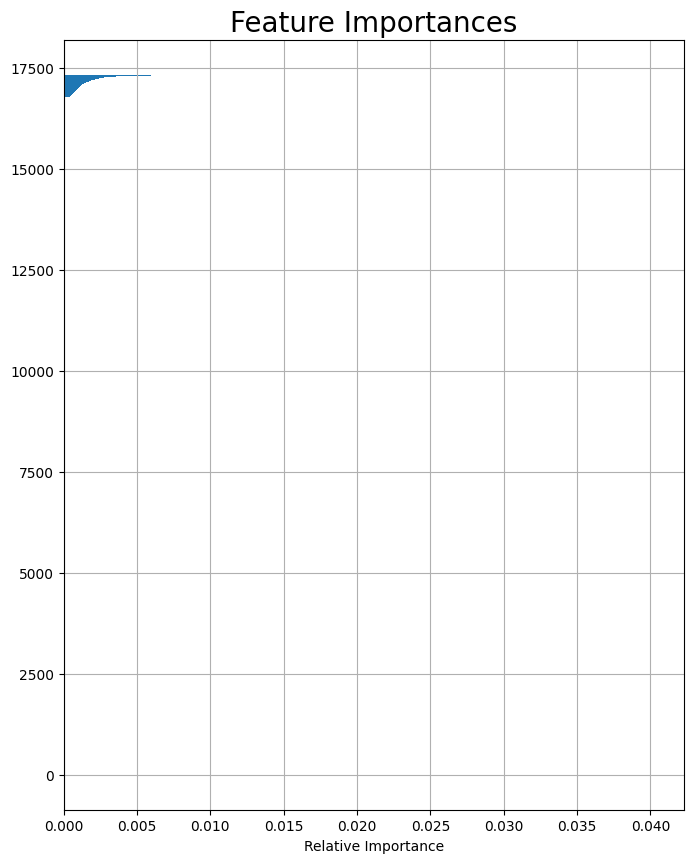

time: 36 s (started: 2023-08-03 05:56:59 +00:00)


In [ ]:
# Plotting the barplot to determine which feature is contributing the most
#features = x.columns
importances = XGB_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(8,10))
plt.grid(zorder=0)
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], align='center')
#plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [ ]:
# Instalation of shap
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 43.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.


time: 9.88 s (started: 2023-08-03 05:57:35 +00:00)


In [ ]:
# Checking the first observation
x_tst[0:1]

<1x17327 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

time: 13.8 ms (started: 2023-08-03 05:57:45 +00:00)


In [ ]:
# Import shap
import shap
#create an explainer for a tree-based model, i.e., random forest (rf)
expl = shap.TreeExplainer(XGB_classifier)
shap_values = expl.shap_values(x_tst)

In [ ]:
shap.initjs() #initialize the JavaScript visualization in the notebook environment
shap.force_plot(expl.expected_value,shap_values=shap_values[0])

In [ ]:
# Actual value of  first observation
y_tst.head(1)

In [ ]:
# Probability of each class (0 and 1)
XGB_classifier.predict_proba(x_tst[0:1])

In [ ]:
# Predicted value of  first observation
XGB_classifier.predict(x_tst[0:1])

Since, the predicted probability value of first observation of test set is more for class 1 (0.60) so every feature is cotributing and shifting the prediction towards higher side(+ve) from the base value.

In [ ]:
#pass the second test sample
shap_values = expl.shap_values(x_tst[1:2])

In [ ]:
#initialize the JavaScript visualization in the notebook environment
shap.initjs()
shap.force_plot(expl.expected_value,shap_values=shap_values[0])

In [ ]:
# Actual value of  first observation
y_tst.head(2)

In [ ]:
# Probability of each class (0 and 1)
XGB_classifier.predict_proba(x_tst[1:2])

In [ ]:
# Predicted value of  second observation
XGB_classifier.predict(x_tst[1:2])

Since, the predicted probability value of first observation of test set is more for class 0 (0.75) so every feature is cotributing and shifting the prediction towards positive side(+ve) from the base value.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
# Importing pickle module
import pickle

In [ ]:
# Save the File
filename='Zamato_Restaurant_Clustering.pkl'

# serialize process (wb=write byte)
pickle.dump(XGB_classifier,open(filename,'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# unserialize process (rb=read byte)
classification_model= pickle.load(open(filename,'rb'))

# Predicting the unseen data(test set)
classification_model.predict(x_tst)

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***